#### Imputation Method: 
One of the way to deal with missing values is to use imputation method. Imputation method is used to input value for the missing value.

Common ways to impute:
    1. Impute the mean of a column
    2. When working with categorical data, then use the mode  of the column
    3. Use knn to impute values based on features that are most similar.
    

#### Working with example

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A':[np.nan, 2, np.nan, 0, 7, 10, 15],
                   'B':[3, 4, 5, 1, 2, 3, 5],
                   'C':[np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                   'D':[np.nan, True, np.nan, False, True, False, np.nan],
                   'E':['Yes', 'No', 'Maybe', np.nan, np.nan, 'Yes', np.nan]})


In [4]:
df

,A,B,C,D,E
0,NaN,3,NaN,NaN,Yes
1,2.0,4,NaN,True,No
2,NaN,5,NaN,NaN,Maybe
3,0.0,1,NaN,False,NaN
4,7.0,2,NaN,True,NaN
5,10.0,3,NaN,False,Yes
6,15.0,5,NaN,NaN,NaN


Looking at the columns column C has to be dropped. As this column contains relatively more null value. And it is not appropriate for further process.

In [5]:
new_df = df.drop('C', axis=1)

In [22]:
fill_mean = lambda col: col.fillna(col.mean())

try:
    new_df.apply(fill_mean=0)
except: 
    print("Column E is a string")

Column E is a string


Column E is a categorical variable, so now we have to use mode to deal with categegorical variable. 

Using mode for categorical variable

In [23]:

new_df[['A', 'B']].apply(fill_mean, axis=0)
new_df

fill_mode = lambda col: col.fillna(col.mode()[0])
new_df.apply(fill_mode, axis=0)

,A,B,D,E
0,0.0,3,False,Yes
1,2.0,4,True,No
2,0.0,5,False,Maybe
3,0.0,1,False,Yes
4,7.0,2,True,Yes
5,10.0,3,False,Yes
6,15.0,5,False,Yes


### Solving question

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')

#### Question 1:
We will use CousinEducation field. Wrtie a function called get_description that takes the schema dataframe and the column as a string, and returns a string of the description for the column.

In [32]:
def get_description(column_name, schema=schema):
    """
    INPUT:
    column_name - dataframe - pandas dataframe with schema of developer survey
    schema - string - the name of the column you would like to know about
    
    OUTPUT:
    desc - string - the description of the column
    """
    
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [39]:
# checking the function
descrips = set(get_description(col) for col in df.columns)

Text(0.5, 1.0, 'Formal Education')

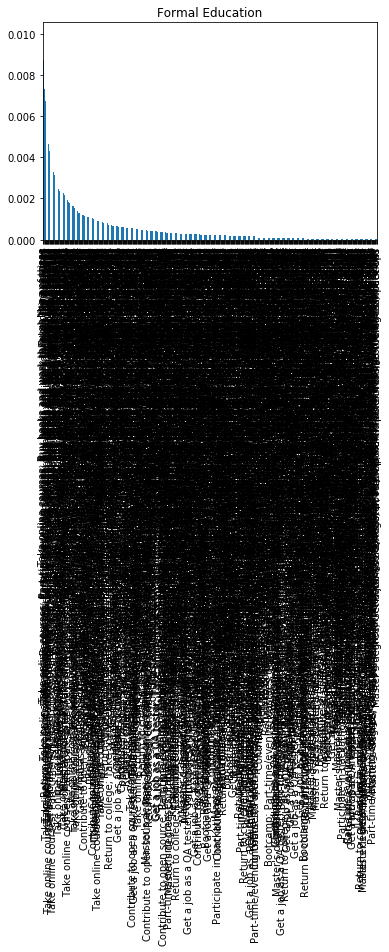

In [45]:
#### Question 2:



couns_ed_vals = df.CousinEducation.value_counts()
couns_ed_vals data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAO4CAYAAAA9WOoSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9ebxlR1Xo/119e8rYmYCM2IGEIVEmIwRwZJAgYBzwERREhB+/nz94qM/hBZ8DoiiIDxBfUKNBRg0QEKKAIAZkEJJ0EiQkoZNOp5N0ujs9j3e+t94fq9apderuc86+Q/e9nazv53M+55y9a9euadeqWmtVbUkpEQRBEAQAyxY7AUEQBMHSIYRCEARB0CGEQhAEQdAhhEIQBEHQIYRCEARB0CGEQhAEQdAhhEIQOETk/SLyx0strlne9zYR+dEjfd/goUEIhWBREJFNIjIiIgfd58zFTlc/ROSXRGSqSvOiprtJ8KSULkwpfXmRkhQc5Sxf7AQED2teklL64lwvFpHlKaXJhUxQC76RUvrBI3zPIDhixEwhWHKIyE9mFcheEfmyiDzRndskIv9TRL4NHBKR5fnYb4nIt0XkkIhcJSKPEpHPicgBEfmiiJzs4vi4iGwTkX0i8hURuXCB0v1UEbk53/OjwGp37pdE5GtV+CQi5+Xfx4jI/xaRe3O6viYix/RLr4i8DvgF4LfzjOWfXRk9L/9eJSLvFpEt+fNuEVmVz/2oiGwWkd8Qke0islVEXr0QZREcvYRQCJYUIvI44B+BXwMeAXwW+GcRWemCvRx4EXCSmyn8LPB84HHAS4DPAb8DnIa28ze66z8HnA88ErgZ+MgCpHsl8CngQ8ApwMdzmtry58D3A8/K1/82MN0vvSmlK/PvP0spHZ9SeklDvP8LuBh4CvBk4OnA77rzpwNrgLOA1wBXeAEaPPwIoRAsJp/Ks4G9IvKpfOxlwGdSSv+WUppAO8tj0M7SeE9K6f6U0og79pcppQdTSg8AXwWuTyndklIaA/4JeKoFTCm9L6V0IJ97M/BkEVnTMs0XuzTvFZG77TiwAnh3SmkipXQNcGObCEVkGfDLwK+mlB5IKU2llP4zp2++6f0F4C0ppe0ppR3AHwKvdOcn8vmJlNJngYPA41vGHTwECZtCsJj8VINN4UzgXvuTUpoWkfvRkaxxf0NcD7rfIw3/jwcQkSHgrcDPoTMRG42fBuxrkeZv9rApnAk8kLp3mLy3IVwTp6GqprvrEwuQ3q7yzL+9YXxXZZcZJpdV8PAkZgrBUmML8D32R0QEOAd4wIWZz9a+Pw9cCjwPVZustVvNI06ArcBZOb3Go93vQ8Cx9kdETnfndgKjwGPnkN5BZdFVnjlNWwZcEzyMCaEQLDU+BrxIRJ4rIiuA3wDGgP9coPhPyPHtQjvpP1mgeL8BTAJvzMbvn0H198Z/AReKyFNEZDWqBgJ0NgS8D3iniJwpIkMi8sxsEB6U3geBx/RJ1z8CvysijxCR04DfBz48n4wGD21CKARLipTSeuAVwF+iI+iXoK6r4wt0iw+iKpQHgNuBb87y+mc2rFP4gZy+nwF+CdiD2kY+aRellO4E3gJ8EbgL+FoV728Ct6J2iN3A29Hnc1B6rwIuqOwynj8G1gHfzvHfnI8FQSMSL9kJgiAIjJgpBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB2OqsVrp512Wlq7du1iJyMIguCo4aabbtqZUnpE2/BHlVBYu3Yt69atW+xkBEEQHDWISNuV9UCoj4IgCAJHCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDK6EgIpeIyHoR2SAilzecXyUiH83nrxeRtfn4qSLypby98P+prvl+Ebk1X/Oe6uUkQRAEwSIwUCjk1wFeAbwQuAB4uYhcUAV7DbAnpXQe8C50L3jQt0n9HrpXfM1fAa9DX0h+PnDJXDIQBEEQLBxtZgpPBzaklDbmF4lcjb4e0HMp8IH8+xrguSIiKaVDKaWvocKhg4icAZyYUvpGfqftB4Gfmk9GgiAIgvnTRiicRfeL0jfT/RL1rjD5JeD7gFMHxLl5QJwAiMjrRGSdiKzbsWNHi+QGQRAEc6WNUGjS9deva2sTZk7hU0pXppQuSild9IhHtN7TKQiCIJgDbYTCZuAc9/9sYEuvMCKyHFiDvme2X5xnD4gzCIIgOMK0EQo3AueLyLkishK4DLi2CnMt8Kr8+6XAdanPy59TSluBAyJycfY6+kXg07NOfRAEQbCgDNw6O6U0KSJvAD4PDAHvSyndJiJvAdallK4FrgI+JCIb0BnCZXa9iGwCTgRWishPAT+eUrod+BXg/cAxwOfyJwiCIFhEpM+Afslx0UUXpXifQhAEQXtE5KaU0kVtw8eK5iAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgw1ElFG59YN9iJyEIguAhzVElFIIgCILDSwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMroSAil4jIehHZICKXN5xfJSIfzeevF5G17tyb8vH1IvICd/zXReQ2EfmOiPyjiKxeiAwFQRAEc2egUBCRIeAK4IXABcDLReSCKthrgD0ppfOAdwFvz9deAFwGXAhcArxXRIZE5CzgjcBFKaXvBYZyuCAIgmARaTNTeDqwIaW0MaU0DlwNXFqFuRT4QP59DfBcEZF8/OqU0lhK6R5gQ44PYDlwjIgsB44FtswvK0EQBMF8aSMUzgLud/8352ONYVJKk8A+4NRe16aUHgD+HLgP2ArsSyl9oenmIvI6EVknIuumhmPr7CAIgsNJG6EgDcdSyzCNx0XkZHQWcS5wJnCciLyi6eYppStTShellC4aOnZNi+QGQRAEc6WNUNgMnOP+n81MVU8nTFYHrQF297n2ecA9KaUdKaUJ4JPAs+aSgSAIgmDhaCMUbgTOF5FzRWQlahC+tgpzLfCq/PulwHUppZSPX5a9k84FzgduQNVGF4vIsdn28FzgjvlnJwiCIJgPywcFSClNisgbgM+jXkLvSyndJiJvAdallK4FrgI+JCIb0BnCZfna20TkY8DtwCTw+pTSFHC9iFwD3JyP3wJcufDZC4IgCGaD6ID+6GDVGeensa13LXYygiAIjhpE5KaU0kVtw8eK5iAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgQwiFIAiCoEMIhSAIgqBDCIUgCIKgw1EnFNZe/pnFTkIQBMFDlqNOKARBEASHjxAKQRAEQYcQCkEQBEGHEApBEARBhxAKQRAEQYcQCkEQBEGHEApBEARBhxAKQRAEQYcQCkEQBEGHEApBEARBhxAKQRAEQYejUijE/kdBEASHh6NSKARBEASHhxAKQRAEQYcQCkEQBEGHEApBEARBhxAKQRAEQYcQCkEQBEGHEApBEARBhxAKQRAEQYcQCkEQBEGHEApBEARBhxAKQRAEQYdWQkFELhGR9SKyQUQubzi/SkQ+ms9fLyJr3bk35ePrReQF7vhJInKNiHxXRO4QkWcuRIaCIAiCuTNQKIjIEHAF8ELgAuDlInJBFew1wJ6U0nnAu4C352svAC4DLgQuAd6b4wP4C+BfU0pPAJ4M3DH/7ARBEATzoc1M4enAhpTSxpTSOHA1cGkV5lLgA/n3NcBzRUTy8atTSmMppXuADcDTReRE4IeBqwBSSuMppb3zz04QBEEwH9oIhbOA+93/zflYY5iU0iSwDzi1z7WPAXYAfy8it4jI34nIcU03F5HXicg6EVk3NbyvRXKDIAiCudJGKEjDsdQyTK/jy4GnAX+VUnoqcAiYYasASCldmVK6KKV00dCxa1okNwiCIJgrbYTCZuAc9/9sYEuvMCKyHFgD7O5z7WZgc0rp+nz8GlRIBEEQBItIG6FwI3C+iJwrIitRw/G1VZhrgVfl3y8FrksppXz8suyddC5wPnBDSmkbcL+IPD5f81zg9nnmJQiCIJgnywcFSClNisgbgM8DQ8D7Ukq3ichbgHUppWtRg/GHRGQDOkO4LF97m4h8DO3wJ4HXp5SmctT/HfhIFjQbgVcvcN6CIAiCWSI6oD86WHXG+emMV70bgE1ve9EipyYIgmDpIyI3pZQuahs+VjQHQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdQigEQRAEHY56obD28s8sdhKCIAgeMhz1QiEIgiBYOEIoBEEQBB1CKARBEAQdQigEQRAEHUIoBEEQBB1CKARBEAQdHhJCIdxSgyAIFoaHhFAIgiAIFoYQCkEQBEGHVkJBRC4RkfUiskFELm84v0pEPprPXy8ia925N+Xj60XkBdV1QyJyi4j8y3wzEgRBEMyfgUJBRIaAK4AXAhcALxeRC6pgrwH2pJTOA94FvD1fewFwGXAhcAnw3hyf8avAHfPNRBAEQbAwtJkpPB3YkFLamFIaB64GLq3CXAp8IP++BniuiEg+fnVKaSyldA+wIceHiJwNvAj4u/lnIwiCIFgI2giFs4D73f/N+VhjmJTSJLAPOHXAte8GfhuY7ndzEXmdiKwTkXVTw/taJDcIgiCYK22EgjQcSy3DNB4XkRcD21NKNw26eUrpypTSRSmli4aOXTM4tUEQBMGcaSMUNgPnuP9nA1t6hRGR5cAaYHefa58N/KSIbELVUc8RkQ/PIf1BEATBAtJGKNwInC8i54rIStRwfG0V5lrgVfn3S4HrUkopH78seyedC5wP3JBSelNK6eyU0toc33UppVcsQH6CIAiCebB8UICU0qSIvAH4PDAEvC+ldJuIvAVYl1K6FrgK+JCIbEBnCJfla28TkY8BtwOTwOtTSlOHKS9BEATBPBkoFABSSp8FPlsd+333exT4uR7XvhV4a5+4vwx8uU06giAIgsNLrGgOgiAIOoRQCIIgCDqEUAiCIAg6hFAIgiAIOoRQCIIgCDqEUAiCIAg6hFAIgiAIOoRQCIIgCDqEUAiCIAg6PCSFwtrLP7PYSQiCIDgqeUgKhSAIgmBuhFAIgiAIOjxkhUKokIIgCGbPQ1YoBEEQBLMnhEIQBEHQIYRCEARB0CGEQhAEQdAhhEIQBEHQIYRCEARB0CGEQhAEQdAhhEIQBEHQIYRCEARB0CGEQhAEQdAhhEIQBEHQIYRCEARB0CGEQhAEQdDhYSMUYtfUIAiCwTxshEIQBEEwmIeVUIjZQhAEQX8eVkIhCIIg6M/DWijEzCEIgqCbh7VQCIIgCLppJRRE5BIRWS8iG0Tk8obzq0Tko/n89SKy1p17Uz6+XkRekI+dIyJfEpE7ROQ2EfnVhcrQbInZQhAEQWGgUBCRIeAK4IXABcDLReSCKthrgD0ppfOAdwFvz9deAFwGXAhcArw3xzcJ/EZK6YnAxcDrG+IMgiAIjjBtZgpPBzaklDamlMaBq4FLqzCXAh/Iv68Bnisiko9fnVIaSyndA2wAnp5S2ppSuhkgpXQAuAM4a/7ZCYIgCOZDG6FwFnC/+7+ZmR14J0xKaRLYB5za5tqsanoqcH3TzUXkdSKyTkTWTQ3va5HcIAiCYK60EQrScCy1DNP3WhE5HvgE8Gsppf1NN08pXZlSuiildNHQsWtaJDcIgiCYK22EwmbgHPf/bGBLrzAishxYA+zud62IrEAFwkdSSp+cS+IXmjA6B0HwcKeNULgROF9EzhWRlajh+NoqzLXAq/LvlwLXpZRSPn5Z9k46FzgfuCHbG64C7kgpvXMhMhIEQRDMn4FCIdsI3gB8HjUIfyyldJuIvEVEfjIHuwo4VUQ2AP8DuDxfexvwMeB24F+B16eUpoBnA68EniMi38qfn1jgvM2JmC0EQfBwZnmbQCmlzwKfrY79vvs9Cvxcj2vfCry1OvY1mu0NS4K1l3+GTW970WInIwiC4IgTK5qDIAiCDiEUgiAIgg4hFAaw9vLPhJ0hCIKHDSEUgiAIgg4hFFoSs4UgCB4OhFAIgiAIOoRQCIIgCDqEUJgDoUoKguChSgiFIAiCoEMIhTkSrqpBEDwUCaEQBEEQdAihsEDEzCEIgocCIRQWmBAMQRAczYRQOIzE7CEIgqONEApHmBASQRAsZUIoLAIhGIIgWKqEUAiCIAg6hFBYAoTtIQiCpUIIhSVKCIkgCBaDEApLmFowhKAIguBwE0IhCIIg6BBC4SjDzxZi5hAEwUITQuEopzZSh9E6CIL5EELhIUqToAhhEQTBIEIoPExpEhIhOIIgCKEQ9CUERRA8vAihEMyaXrOMIAiOfkIoBAvGIDtGzDqCYOkTQiE44rQRHkEQLA4hFIIlSZtZRsw8gmDhWb7YCQiChcSExKa3vajnMS9IBh3z8QTBw4EQCkHQh9kIlH6CaDbHgmAxCaEQBEuM+cxseh0LQRS0pZVNQUQuEZH1IrJBRC5vOL9KRD6az18vImvduTfl4+tF5AVt4wyCIAiOPANnCiIyBFwBPB/YDNwoItemlG53wV4D7EkpnScilwFvB14mIhcAlwEXAmcCXxSRx+VrBsUZBMERYq7qroWYxTQdC7Xb4tFGffR0YENKaSOAiFwNXAr4DvxS4M359zXA/xERycevTimNAfeIyIYcHy3iDIIgaM1SFlhHSsA2xT9bJKXUP4DIS4FLUkqvzf9fCTwjpfQGF+Y7Oczm/P9u4BmooPhmSunD+fhVwOfyZX3jdHG/Dnhd/vtk4AHghCrYgUU4thj3fCik7WhL71JJx0MhvUslHUdb2uab3tNTSqtpSRubgjQcqyVJrzCzPT7zYEpXppQuSildBIwDO4HV1Wcxji2VdBxtaTva0rtU0vFQSO9SScfRlrb5pneKWdBGKGwGznH/zwa29AojIsuBNcDuPte2iTMIgiA4wrQRCjcC54vIuSKyEjUcX1uFuRZ4Vf79UuC6pHqpa4HLsnfSucD5wA0t4wyCIAiOMAMNzSmlSRF5A/B5YAh4X0rpNhF5C7AupXQtcBXwoWxI3o128uRwH0MNyJPA61NKUwBNcbZI7yeBrwI/VB1fjGNLJR1HW9qOtvQulXQ8FNK7VNJxtKVtodPbl4GG5iAIguDhQ2yIFwRBEHQIoRAEQRAUUkpL+gMcAxyXfz8W+AlguTv3+IZrlgEnAqdW174MtaM8ArgA+CngNOBjwDeAFwNnu7glx/UK4KeB41E/4A8DJwPPsvvnsMc1pOM5wBOAJwFnABdU588GXgA8JaflSS6fJwAXAc9z15yM6gj/POfxuCq+tcDfA28Ffh1YCazI+X1izv9xqIfYhcB/y/k6MR8/GXiSu9f7crw/Dfy/wAtz+Z0M/GhOr5W3xXMK8ExXhqtQB4RfAc5z9/mBfP7kXBcvQe1M3wdcl+NaBpxYlespwLOB33RleEHO+8+6sniZS88vuHSuAn7O1eOT3DVrgIuBR+f6vdDun8M+Jx97hl2LetIdg9rH3pbz+DvAU3OYJ+f7rsnpPAv4JdQ54zjgDN/mXHt9UU67lcOzcv39BdqWnk13e1mewz0633NNrl9L17PysWcCv4guNH008N/yPVeibeZi4JW5Pr+Ka3853BDwv4GNwFXu+HLgi67ch4B35O+rga/k3x/L8Z/jwki+3zMo7fh1Lm7JZXVO/m9leSpq0xwCPu/q6Un52O/kYyuAL7r0vxp9Tp5lZVv1HY/J93hxLlvf71idrkWfw9cB/wP4SK73J+e6sbL/sL9H9Sw/yZXdb+drTgF+06XnZJcPcWWwHPgo2h/8T+BvgD+bd5+72J3+AIHwM8AEsB/4AupvO50/U+jahingkPs/mc8nd97/rz9T7rfFvRH17x1x1/o4JqvrdrvfYwPuZ2kfFG6q4brxXB512DFg74D7TVfHmu5h+TpYleNkla79VVwTDXHbfSeZmSZ/bMylrynPE66srNz6ldckMOz++zyM5nMW14H8PZXLtk6//+3vO+mus7LajbbDcXfdmIunbrd1/XwY2JfTNF7dv25/Ps9N9+hV3mNV/ifdOSuPQw1x2DOWgAeB7Q1puw24n9JuJnI+xnMZWTi7diyH2YQ+Z9YGRnI9WdwjuWxHq3tOUdqdP347+ixszflJOdxETttdVb1O5vStR5/7un7qejrUI4xv0zvd/cZz2v8Q2JXL3+KwdvMdutuv1eOEOz6V47F8f47u58LuP5HL7BvA09DB4XXA97Xtd5e0oVlEDlFUXKv7BE00L4g72mibj7nmd6HKaZqFVT02xefT6s8PyoOdbwq3lNpJnZaFTNt84ppAR9WecXQW4eMdBo6tws21XSx0vUyhI/R+cfsw/Y756+13Uz7rYyZ4htx1UzlMnZ6m+MbQGW3Teeu070b3lDvW3WMSnUHsyvc7Bfgv4NyU0qm04GgRCivQwvWF07YBHu6ONggOF4st/I8GHk55nQsJ+DJwcUqpFuKNLHVD8xg63TPp7dPbNu02amwTDvovCa/jWWoSddr9bkrbfNJrU/VB8bW9x/TgILPiSNdNU/qbyn9iHnG27ezqvDZd5+P2bfxuinoEVIVVs7chDrtnHb5Xudu1o5QysWNNZdS23JqeW/97tCFd4+7YjfSvqykXdhCj7n6mDtvirvXl3K+f8fj7Hqj+e7WwxbcdnS3sycefge5G3bqvX+ozhR9EDZ2nU3TCy1D95UrUwHgqOn0aRQvtbnQnVluYZ3rUE1Fd3mbgUahB83h0lfWj8u/laOHuzffZiBqN9lMMYTal81NKYzQfP5jTNY7q99bkYydU15jAsoayPd/7JHR2dDxlpjQN3IsaBj+d8/Vs1Pj2hZzO09GHdEX+LahAbVKjTORz/4ka7LbkMjo5l/W/owbMY4HH5XSM5WvqRY8Wn8/jPlTltwzVNU/l+MeB76F7mm662HqabmkUyvT7UC6X76Dl/US0zj+AGi9X5jiOB76FGsNtH5hhtP7G8v+U03cop/H0fO0HUePdBfmeV6K67z/I+dtLsSWckeMYR/XtdwM/ltN7N+o8MJLvtQWt20+gRuRVqFF6CG2X+/P/FTntJ+cyuwk1Tp8OfD2X/7PRNjYK3IcaPVcA2yh1P+3Kzv+eymnZBTw+p8N00+LK5xDFyD0N3Iw+Ny9G6/f7choll+3unD/JaTmIPkNPqeIll9fyHM+qHH4fasD+4xz+hhz+Sblspt09Tsvp2uvq1zpIcR/cMVODUR3Hlc8O4I6cn5W5Hi5G+5btOcxOtP0tR50jHpnLIaHG8+W5Xjaibd3a/rJc5tvyNftzmUyifdDN6PP9+HyPrbmMR4F1aF91KvAZtD2cl+vjOfn+lodV+Z53A19DBcRjUkovow2LbUxuYWz+sVxRY8D1qCFpN/qQ3oA27j0uzET+vy9XgBl8dtLbMOSNSXtz5dsxM3CZUNpMMTDelf9vRh/8nTnMrlyJo1X8E7niJyjGtkMUQ1htLBzJFfsAxRBqhrGENqpDFAOhN7qZIXQM1SlaOWxGO8AJF7bO4yTwpRzOG/F2U2YMO3M6zFBs142hjX5//j+Ry2N3Du+NdLXx0JdTyvVoRrmDdNddkxHc8r8vxzGa46iNhH+a02TlZO3DG3iHKUK9dkawOrN0jNLdvvZWcU9SjNq1IXsi32uEYpw95M4dzPmxePbl6w+5OEbpbjtm4BzO53a4MrB7e+eI5O5vxl6rHztv7ak2MDcZuMddnmvDrP2+ke62eqj6b8+HGcbvAu6htAX73uPu6fOz38X5bYqTxrfy+W2Udmb1NO3i6mdwbjLoN7Vjf+y3Gu5l57e5fFrZ+XIcqeJrulf9scHCGHDHbPrcpT5TuAZ1hZxipvHL8NK+6ZjZHprCHSn8zGAhaDKIDbKxzCf/va41o9Z87jHXdNXX9cv/kUzXYtKmndWj5aXI4Sz7hW4nh5P5psdfvzOl9Ig2Fy11m8JPUEYruG+PL7TJhmPLGo7VmJTuR1vp2RRutpWbqt91nE26z1rf6/WmVPev4xuUt15lUwum2n5jvyerY59z/6UK03R90/3r8mwaGNTnRhriqfNu9+pXXr3S1KaN+BHtbK8FVZ0aNqI0vMqEKpyxsjreLx390rSQNqHx6n+vZ8VmMvYNvdPodfa97D/18fp/QvuG+piN3H37HNQe+tkmxt3x2Y7Sa9uEj8dmizdQ7EIDWepCAVQoePeyfjTlZ1DjgWIz6EWbTr02IPlG02RUsgd1mpkPor+XrQvwrGImyykP1yGKAdDHZfF442CvcvHpGuoRbkdDPD7cuAtn094JVM9fX2Pld9Bdb2n3Hme+Pps6fju2syG9x1T/TQfrMTWVYfUxUR2rOwt/716YetJUMZ5eQq3ucE5z55ZT1EX+HrUwrdtYP8bc/fs5aezucW4uqodez5aPy8rf1KTewNzUIVubHaG7bfQbJFo/41WTTZuGmmrRC6emvsffY6jhmGHXmrCpr28aRODONd3TbAvD6KLRe3tcP4Olrj76NmpQMWNWEATBbOinUjuUj7dy1ZwDY+jMzHfu4zQP6g4HiWLLug51KiGl9M5+F7V5R/Ni8kx0Rd5zUev9I1GJ611UzWPCjyb9CBdU4m9HvYCgjNJWo7aKhEp9X4Hk495Tpalh1fYLL6kn3LfpMo+hSH6/IMuMSivR0eTKnGfvoWQeQAdQryPzTLJ4JnOe2yz0OpDvYQ3UVg6vprQLS9fyHO8YxaPJ1o34UekOdAuMQXaGWq9r583byK5p8pzxMw5b0WlGzQdRT5Xlrlz6lYHVg40I6wVCw/mYecwMGtH6UWPTgiepwll9G/UMce6hlcgAACAASURBVDLHtR9tCzYbHKd7G5Z6UdQUvZ9tXx7Wvi3vTQuyzCgKahA9Ge1EzUPP0tV0j3qk26/8rIymKR5n1r4sbYPimMhp8c9gXQ+epsV39bO5CXXUuBBt2yvpniGM5PROoELmDNTzzeKwOrT4rL69sLJ7+naOy7OPw4zR5ml2L3AuZVuRIYq3YkLb7hi6uvlWWrDUZwrHoi5V29A9Rv4OdUP9LuquNY4uT78AfYAfhbrjjaL7DSWKp80ZqDuhCREreJPcgnqkjKJuXyvRgrUG/w10deA/Apfn4wfQCvsa2mBGgT8C/oHi5jeCuqnVHY55kxxEK/Z7KR20NeBb0YfwtHzuANqQreGbZ8xetCGY29sU2hi+he6/swt1s3s86s30vTmu/0DdBR9H8do6mO9l2w2cmfNWG+xNAI2j7nkrUfe7EYrHxGvRvVl253oxV87vY+a0dwTt6KxTsLqZzMfNi2YYrcuVOa6TclzeEcHinsjX7M7fP5Svs9cWHk/x3DFhZ546Z1EEugn3DTle2xLi+ykuul6QQncH7dVPn0c7j5e6NPdS1WxG2+IQcAvqkjiKluUhtJ5W5t8rKfa3Eym+6t9AXRatbdnKZBsE9SLRW7jUeRym1Jl1SOYuekL+v4LiINGrg08ujNBdLiOo2vOYnJfVOY9CcSWvbVzmTXccRfBbfLvR57lJaNigox4kWjjz5JqkuF03lVEvAbYNHaAe48La92jOnw0YrK6sg2+jyjZsS4y/TSm9seU1S14obEIfzimaK+jhRlPDP9KYoDuWw18fs3kAgvnTS9XStPVFr+sH1dfhrtN6tH2k6SVMFzrfbcv6ICqc70kp/UibiJe6ofmRlNGAUIxgMNi7wI8We2HGQm/otLj3U/zW63vUhkj7rtUI3uhcp9cbB30aplyYGhMIuxvub37z/nhtzKzz4v3CfZ4mq3CeZRSB0OStYXmrRxu10dDncyc6W6rTYJvQmdeQzfwszV69Yd4Vh9w9BnmXNKWv/rbRpsVZx+XL3LdPn5e9dPuY2/V1m/BtqKmNNV3n1w7UafPp8fj1B3dW55pWrlu7M0PoNsqMyso95WN+BXG9tgG03fi1C7so9ey9kG6s0mAbHTa1KztmarQNzGyD3hvP2sg0+pyb3v0AOrva6MJa27PnK6GLGOt0bHN5spnQPtRbzGabY1Uep/L9rFz3uHPm8FA7OPi1Dfehu9iO5ntNo7aDg+gs86PAa/LvM2jJUp8pDKMFdWY+5EfKg/zyFwpTkyz0yKNJ0lsHY14ls1lfcQidJrfhcJZdbVcBfRhW0K0/XcgZT9MGaAdR9dBcsXiso6ntBTZ69mXZq6683WK+7ajXaL4O49UvC8Viz9xq/Xy/cHO1l5ogMHuDnyVZXb8H+O8sTFnYws/jUAE5aNO62dSBzRS+DDwnpdTqeVjqM4UPoPr0KYrRz6SlPah+ZGU6+kkX7k7UFmF7rtjocsJd50dedXz+QfYj9Ang/ZQRrR9dNI3c/Mi4HsVYR+l1076jGcv5snibRsFmMK+x0ZqtigUdHdWziNnsxWIjld3oKP8A3duMWzhzWV1J6UyX0V4gTOV7WHrrmZDh47O66vcA1DOlpnKzeGxAMET34MA6Cv8M1TMu0HYrFKHYj171NzIgjJ+F2HkzSPdzyW7Ke68ZMcx0wqh/N8126tGx34Lc++fX929y262dAXpROzrUszS7v2117mcatTeSV5vZvd/IwgnHIcpg7lSa68kzaDBgH7PrfROdUbQehC3ZmYKI/AhqwL0F+BTww+gLMazzhCIkzEPmOnSfkt3otO1EdB8kKAauB/P/FWjl177rvfANvU3DHKfsq3MAne34ldn+4fUeRDBz9Gmjg7ozm0ansi9DvQv6pb2pMZnQM68Ni9v2cDLvJm908wbK2sYxG33uOMWb5ThKPa7ucb09sKYushGjNwSb58VIzo95ipjXzg5gbY/0+G1Avgm8PB+3EXeTjtifr9M8gqpAnkG3C2I9im+aaViHtS/n6dT8fw3d5W95s+sOoOqcU2meNU6hz9RjUaG5hu5O+4SGfECZLZvaz3tjWTscpnjEJdRJYhrdk8sbc82RoKnMUo7nM+i7VCyupu2mLT/L3O8hVLNwSkNYu98uug3MPi4/25xG+5Gx/H0i6khRe255IWj7so2jL5Caz2zlAGXvMzsGuuXNZ9GXRPnyXkEZ7NavGZhAX1j0gXZ3XwL7GzXsd/RydFOsDczcb2UhP9NV3OPoXko70MZzgJl7JvWKJ1E8WZpeVGKfqeoa0+HaPkJ+r542ebAR4a/mazdTXrRR74fUK91WxqPu3vapy6ltupKLy/ZMsh0c70c7vFG6X8DiXxQyjboDNu1t5H/bIqoNVR4G5dfycbBH2GG0/vdT9kUazuneS9nX57p87luUUafZEO5CbSUT+bfXS1ta7EEeo/uFQ4Pa2n7K/k1t2+c06q1n+ynZ/fegg6/76U6Tj6N+0ZL/bKW0tUGfGygqE2tX2+huY97mYXlcj76IyLQB9V5HPp0bG+Kz9G915yyOv0D3JPuWqzfr3Heiey79Ro53A9oxj6F9xTb0mdtEaX8b3D1G8uf9lOfByupL+feNlHZs+3Y1PWsmfM0OZ/Gba/ZY/n9Hzs+t+f+3j/q9j0Tk/08pvVdEvo6OtKxQoOysOIQWzNnunL1/wfz796OzAZuCn+Ruk2g3om2jM26iaV8gox4hQvN6i2nKyNBGDuYG14Y6vdvQhvNolw67tx+V2f3bzIjG0HK2fVX2oZsWgs7a2pbXoPtZ+dyNuvj2KoM6z/6/twvMBatDH/989xKaTZsahLW5I2VvO1qYbRkvZJ30w9rObOrL0jabNN4E/MOgRWvGkmw4KaX35p+noX7d70JVSDehBbgaVfvYFtMr0MJdg07V7eG1hWLLKfroPRRPhttRwWI7NkL3iNY8n+7L8diU3iS+SWfoHo1A2erX4iT/t10dv+LOT+d4t7vrbcpuLxg6CR2Z/AdFV+x39fSjOxshHXD3T+j7c/2yf7u/f4Xk+pyXD6HbNPs9ifzHrhe07E0FsQZV2T3V3Wc9M/XHVlbmeVHbeB4APp7DbUBHjOPompT73f2Tuw6KZ8soOvragHphbEPfoztM2Z22ft1q7Q20H7gip+HSfMxsO4apQuxjI+BxtE7NY8Z2QvV17u+ZKOoI2055Cl2TY/WzD7WRHUTbpI3QbfDwnRyXvcLWFm1aHVobqUeguPP1McOO2etCbaBlz4DZ7CZzmvagI9avU0bnVs92nYUdR2dU4znd/p0L1q4svLcLNNlL/KzGytZsknbO6tDbL/rZUuyY9QH1/XwbrO2Flma/K7Fhgwnr5G1dge2k/FXKrsy4sP7b4rNyMhvnDcC/ovX/z8zC6WJJCgXHsage7/nAj6OzAtNZJ7QD8tvQ2ipdy5d1qEOUhSDHUYw770Ab4PGUQt6AvoB7N1ohN6Md0mQOdwLa4E2n7RcFme5zFBVcr8/nEmW73/PysYsoDeEHKQ/BNRTd9uco7xsGXbT048DvUfT+e/P3I/Oxd+Rrb6MIRZuZvAJd1AdlO+4H0JfaW4N9bE7Lhfm3PcDX0t2BWcdiwrhemWsj+Ul05rYj//4iqqrYQxkpTVJmMbvQB+90dEPEIXRmYwv4dqGLuCbRTvIu9KXw5kJ8Y47na2h9nYfqXx+JGghttel3KfaLaXQ77Q+gD9EYRXV5bI773HzeFrh9B1Ud/T/oA2hqjnfk6+5CZzUW/l9Qe9aBHP+FwN9SBMgutPP8CmXL6z3ogkPr1I9Dn4HjUBvViZTFU8soiwKvz2EmKLPjhLYVUzE8Jce/NR/bkfNu70oYzp91qNpkDPVimcjxf4kiEFfkdNiAR/J9z0HXGdWOAMO5fM1GtMOVs9mt/pRuVdtO9B0fz8/HzJXznRRDvIW/iTJI24QOCo+hPIPL8vUmDL6DLo7dig5gTkY71G3AX6KDkO/mujmIzoBHULXSt/M9P07ZBt2Ex/tRoXg/+jx+ldJX/X4uzw3oiulRyqD3+9C2dWFOpw081wN/j7arfwfelsvpUI7DBk8jaJv8M+CWlNIf5vCtWKrqo79EC/YX0YZvag0/ZfLvjTXjVZMrml0zaOFXLyOpXW8rbkEryrbMMAFkggC636/a7369hLLpCs0IXEv5pvfj+rIZpZSN5flgPmZG11X0nn5+GvjJ6ryP34/A7D6T6IN7PEXI2siw9qiqGab3ylB/b+vMn0h3XTdNpe9HO6VafVTXcZNKqMYe9nGKmqxWB9Zp7ZePhWKEIti86ugBVHhMMnPV9JHABg0LvY1O0yK6pufa12mdbxv8zMcl+gDaF8wlf019lPUFTa7VPv2zrcMpVOC9CPhqSukxbS5aqkLhVfnnH6ES9oconaAViu0HA92jYS88/HFc2KZG5PXpTcymQuqwtieQZz5634XUkbZNRxvf77noRvtdZ2EOoiPfpjrudX3dWZg67UQG088u0Q8vdI5kJ9yUjrb10Ha1cs1C5s/bZeazxmC21HnwA7+lhreH9bIrJMrWNrY2aBgdJDy67Tual6RQMETkI2gGt6HbLS9UIzzaDHGzfQAPV/62oNPQV84jjrZ5mU+n0+uhaXufud57ruVuMy8TYrdSVEH1YKV+YP1eQYOYbdmbzedw7SJa32/QccvrdlQdWIf15d9Up3724heKzjWN/tie/LHR+A7UNbhpkHAkBgzWdgQVEHemlJ7c5sKl3jE+ER1FmO1ghGLkuin/3p7D3ovq4B+gGNcSxcBprp63ovYCvyBoPcVIZhvB+eX+/lWZXs9ZL7u31ylCmaaOo1vWmiuaxb2P0hkcAP4N3ffcjIQ2MrB333p3y1tzfs1wOkr3bGgEtSvc5dIBqqf0Lwix14ea3WCKYsQF1SXvz2naiOpHzXPJDIyp+hx0cdl9t7h02asqzeBfbx1hHZG5aVoZmQrnDroXZd2O6votvuTyYO+NmKa8x8Awo55ts/AflDr2xmB/r3GK66h/x4W9u8GeJ3MY2IHqf6G4WY6j9X1zTsMHKS98tzZnaw+g2614nztunY0v5610G2OhOy9mK/DsQNsdVdz2besNzPBtYcyGN0l5Jq3erWy8UbZ2zPAG2fUuzvolRBa3pXWKsup3L6Vzvz3f90t0P5P2ex0zt7z5mAtzp4vL9xu3UBaP1nGK+30suiGnYYtJp11YYwNFHenjs99mgPdYGdxJd9vz115Baee2sNTa/o/SkiU5UxCRlwM/D7yQMiU3fekUWqgPoqOpEykV0CR9bem4TVG9WsHbAe5AjWOrUSFkD12Tm1+tT+43CrD0m1A4gf6qkl7ULqtN9ItjCm3cx9Jtj6nVB7Wuvs2WxVY2gnZ2Z1BeHj8oXT599RYmvsxtPcaeHLeleQS1j/RzG7b9i8yWsppuI7f3AvH5svqvd+30tHUrbDo/1xFjQttSL48SK0uvzjJhUb+43gYFTQu+qK7rZZerVXmWNuuEmxY7Nj0z8x1BD2qnW1DDt2HbZtiW8b1mK8wzXU34suhnZzBsMeyvoGu4TsvX+3hst1qzNZkDwv3Ad1JKP9kmYUtVKHwP6u1xDdpZPwV9mP22u77Q/MpGwx5m34j35Xjs/QBeR91EXXF+ZWUvY6UZd57UJ4z9NwO5D9NLb96kP6yvr/Gjul6rQpto2mPG379f59B0L68GsY5oJc0PRVt1TlPZ2Opwb0c6gAp5P2LupTLwwmgPZURqArk2UtdrFOZqi7CwNlNYRfeeS01tpCnddXyHS0Xh9dvzpVe7rttQG9Vc/fzMhUEOKbOlrWqsiTofc8nXv6Auqa9KKT27zQVLUigYIvJvqLum+esfbmb7IPnwczXYNcX3bVSozAUbHcLCdgoWb0JHJMfTbuGWf8iso/PT7oXS588VW4vSa+sFaP8w1i95Mbx+t1febKuWfkKrjtN/+y1UeoVvSpdda/n/WeAqtFxMbz/IU242aa7bZ78ZgqVrFzrD3oTOaGx7ml5laS9rMtfTkxvS4d9BcYJL21bUc8uw64XyjNu6jDUunKmbbG8vWxvhtw7Zl/9Ds7PLKOUFUbOZXfv2ZYtctwGnpJSOARCRB1JKZ/WKyLPUbQpvQ/1tPwFciVbY19DKewfFeARFh5soy+a30K0HhrI17ofpfrDG6dYbev2phbnXhfG6Z+je9Mvr8bdTGozpLO+l6L29/tQagX/JtukWbUM7W1x3iwvn09rLKHkQfbgMS4vPg5WlXxth4T5F2dzN9tUxv3Q/I/F6e+hu/N4g2qT3tTgS2rgtbivb26v7+WugbNtstiF/zq6rtxhf5q4TmuNv2vSuaTT1/XS769p97Y11hrXJacreTTYzM3tCorzUx+umDT9zsesMXw++bVnZ+vTXiy7/Ae14H5mPbafUxQMujnNyHiztlt7fRdv3FnSB3WZKu7WFhZYWy7s9t1DsQDtQIQBlHcz5qNrEv8vD0r+Tsq+ZXyz3ald+Ztc5iPYBQtmu2lRsJgDs49VqVsar6BYIuHtY+9gKvDuny9rbapfn71D6L+vQj6E8L37hqdnXnp3D3p3vZS8wsq0urO+D7mcdeqsHZ7CkZwoAInIvWlBr0Eo5hGZwK9pw/UZuMHibhoQ2hJN6nN+X7+XtDXNhkH5zoUbD9qa0hZxJtU3fTvQhra+l5fVt0mBbYPeKt0kfewB9YGw9h+m5za3Ve6HUeTWjaj8dei+a7CKHg6Y0t1Wt2MzIPyf9dNtTLlyvWZB18taRmk57kHrTsHU9tW1iKQ1aB7nK1rPEts/QoHD7ULup7bV0NmpEPi2fO5XSV/nOfBQt+6+hCyBJKfkZUE+WUqF3EJF/z9+fRQvhNPQhXUlx8zqTbi+NWgfpG31X9JTXVhp+hmDLxG2HTRtV2eZfhm0vAN2VYXjvpWvofuGJPTjGzZQRjBnnRul+ID3+v71Tud5Oeye6m6J/QYz35LF038vM0b3p5220NYGu3kxVHL1URzZq8Vg57qfM6u51abaRs21RcS/a6G1WUs8wbGS2B/U6M0+XOykGWHOl9AZ+oahpfLw24oKZC//8eZ+vCfT1rHasqQO0bVH8SlfzsvlQFZ/lqZ59GeZldn91vGn2ZenzYSbQHWBtxrYfHf1bHduKa7s2obNRW/17wB27If+/nTLqNa8Yv614PatKwF+hHdxYjssP7LxKy1O3KV8+42jZbMzpfiPdXnZ2PejzfbdL742UFwbZ5xA60rbZeUJtm1Y/tk2K7TxwV0rJZjJ35Osek3//AfBTlA3vjHF0JrSF7jZtnwPoMwdaV6tRO+u70QHxJspq9OGc91vR+jyIrnC+BzWs/ytZMLRisXdE7bFL6u3Aj9C942Cqvu33JDMfJv+x43t7nPduqNO5kj/p4jXPFb9zocU53nAf3xitI/A7Qm5nZhqG3e8dDfepv0eZmefpKi4b8dqDPOnCeGE3WcXh46z3qGkqv6brxune6+W7VZlZumzqbG+/8mo2E87WkVr6zV3XynkKfbBMPbCXmfmy+0y7e5hbqd+bpr7OHk47f50rvym047gyx7kX7Qy+lcPscnVoZWgeaPZubRPaY5SdWJvcfK3svOpqyn1PU4SPFzzmwjpc1b9vG79DcYndl9M9TffutbY9xg0575soA5hr0a0XJlB1kdWDz7tvR3vRzuw/8/cw+syNoi7Uvj1NoR24CaQJSnueojsfpsqaRDtOv8NtAl7l4rb2aFtWfAdVu9yPbk1h9/Lt2Mp0iu7n3lRjoznM/fl7G9oufxrd3mJv7tu+C7yXsuPqrTn8Too61nbknUL7QsvbLaiAuC/H/wp0X6+rUPXur6Fb67wW3SPsxfmexwAnHO27pL4UfY3cj1MWqtQuikaieSptx+vz/o1clnnvVdPLS6dXfL4A7XgvN9bUkH5ob7Ct02ZqEphZNta4em23UedjEP3Kpk28Pn2DjPK9yno29zRVjlcDNtWBdRT1KL9pgVTTfetr/aivn2G5V3xN3kv3UdaHzGZX1qY2YSqktoZhqwfrqOt6s464aSVwPxVuvzbSqxz6pdH/XginD+O76P5rx9C8Sn4ujhJNnW59TVM920aJ/nW4db9Yt/HOwCalVBvcG1mS6qOU0jUppReiU907KKPKpvTWhelXNE43nDf99KCHtl5Y1cujx+tRDWs4y6pwTescYGblb2cmfndTw4Tbjuq4jYR7bd1t6ZkNWymL6IzJhnC94rWHnZwuv2Oox+rMNvzDXdcU3uONa1YHPj2+DozxhjTbJn61CqPGvJaMQ3Qbf00NZ/QagTWpIX3be7T73SQQbORc0+Sm7e/jR9s2U7KNAM2Aa04ay+juaC3NQ5SNF8forqPaQG9l4QdPU+4a/+zaTBW6HQigu57r+oWiAvN5tTRYPBso614snF8oZ8c2UWbJvi59GJsx2D1MgNoMoq5f35ckmttFk1BLdL88ydLjy3lX/m8LRt+DbrzX9lW9S1MoOH4YXaC2A9WPDaNTKCg6bpseT6MrFE0ddB/aOOzFKFbwd6BTtvXMbDBeSDQ9aN5jx6aS383Han9iw7+Y3PSatkLY48+f5tJmjfYBtHFaXL/rwngDKhQdpO+wplDbhb+flZ0/5r+hPJCjlPdU2Ha+T6BbX255qBt608Mw4f6PurBWxvXLjaBb/+qxh+Pk6n+ie08dG/F6Nrp0TLuwq2nurJsElB2706XX0tA0i/D2KS/86hXXvj5q9VE/fLlZOrxxfZn7PoiqT2x9x8/kc6YyGkNVuaZatfg30q3akhz2OrpfMmWqzvspswrfOdf1cW/+3keZfdTbgPiZvr0Y6AFK2/Grgf8gf9v73kHblrXlTS799RoXQfX45pFks+7aPmj3HXa/TT25i9K+TQ2U0H4Iio0CugcC4+6YfW7Nx+7NcRxPUc+ZOtWv40roSv2XMXiAUzK0FNVHhoi8G31B9tfRxvtD6IP3NHTZuu3Zb6PLPejUagVqNDs7X2fGWCgSfBXNG2BZA+nneWJGudOZuciraeGXXeOlfz3N7HU/P9VvCrORst/KIPXaoDT4MP3UXZaWcUr5tZl99bqv1V/T/XyevF92Gy8Pi9em4rehD+jTGu5jeB/3QaqafqpK83aajZrO767rd5f1eR2l/6ZtvdI8SGXUlM5aPdE2L/3qc9Cmc01tvJcaCprLvinOxJHbaM/TT7U56JiPA3RQdKaLr1+5GGaPeyCldGGbBC+6UXmAwXkUNcb5l8lY51P/9qP3OkwvI7SNpOpjtbGxHqVNoLOSXvFPVeF7fbzRatzFNeWOPdgnHTYK80bdukxudPlpSlNdZj79dnyM7jJOlNFKU1l7z6U6XlNXmIHVDJq2r5X97lVvPg22dUevMmj62P37xVvf2wzDE9U1pn7o17b8zMmX8yTt09tUV9Mu7jbx1Pms63x/w7GmdPQK0+SI4J0lmvLTJs9NZdcUzs57j6Gmz6aGY2MN96zr2/Z5mq6uG6nuVztlWPimfqZX/Vkd/W2ffNRtsV9bPgSc2rbfXerqo43oqPXO/L+WuObSJu5T6/HtO+Xf9gCY2sRGzlOUqZ/3PLqTmWqE5eiLW7zKxuJIFH1yvQHXNGXDKovTRi82Ol9PabgrKMZOu7fPn/l2+xGGV8UI+jKfJhuHD2Px2wZay+ie7Vh+fF4f7a7z8fhpeI3FM5TTvpKi61xNqQvvN29lajYIi9f2gvEvsTf1QD/s/t57p1Yd+vwkyj4y+yneIOT02ktsXuvSaGXi1Y3DlBW2lkdTuVgHYST327dd376FsueSD2+Yx4zF5+Nosq30e5+FXQfdi+L8fetNJqHUt1cR1SrDukO0MPa7SW9uNhBfX3b+eMq7VbwNxdJwjjtm2OzTPzv1gkCL199zJTPVtEN07ypr4c3u5+0W5lJvi22prnttQ1rJYW2RX61mNCbQgdsYcE9KqV7M1pOlrj56Oeru5juZNtPXkXxNvUDJJOxc36lr8dS0mcbNl173XuhrjjSDps1zSX/TdXOpIxNCcyl35nCdMeglTfOt1yPRXufDfNLnn/Uj2fYH3c/vy3WksHY4DaxLKV3c5qKl3DBAfYvvory/1Xtz1NJsirIYapriEmpTQ3tdo42uDD8NM3uDeV+YFN6bP16NZdjM4JA7Z1NPMyjf5sLbSHHYhT3oziXUOHWQ7vdB+8Z0az7vp7OmhplE/ZU/WZWPGbms/Gyhkflie2xxj10H6ge9NZeDzbK+RPdIzy+Qs7I5QFkcNAW8j27DnG0zYWW6lWI4s3Lxagi71q/9+HNKmdt03t71ayyr8ulHVzZjuCnn11R2NtI9yMxR2LerY5aWOyneL2YEtDZoZTmObrNsxkZ7HeYkpfOYAn7Z5XVzvt9WyujbRoyJUieJ4oRR59NmJZLz6GcSw+gs9Y9QJ4ZDOZ/vAR5H2brcyvlzuQxsXcN0zoO123oblelcLqM5noOURWdTOV9W38tcWfhR/q6cbj+r+hPKLN9mD7spM/X7cjgzcu/I6fgu+hzdl++xHd191Lbl+DDa97wbbbNbKWtPtuZwf0J5Zh+PPuu2rcUt6KK17WgbsH5nOzP7kCbWNxxr2prGP3+fQDUY48BfoztNPw99/8kZA+5XWGy7wQCbwkvd4os3oguDrkS9aL6NVswvoLsAXoU+1H+G2iHuRR+8b6F70rw6F9b1qOrjuZSVofdSGvcwpeGZN8Eo2pCupxhubLppndO+fN2t+drHox3zR9DVhabL/iLa6b4TVUVMoZ3rARfXHTkv9iAP53tPApejnhOXU/YCupPiOmd6znsoQmU6x30F5R0FP5bz/WCOewPaIdyQ/9t7h62DtMVb9mBY5/MA5f3KmygLkh7M6R1GFzgdpDyQ1glb2dqiM/9uCO/RtA8VrIdy2r6R4zKPE7/gyuppDG0nD+S076ZbHWULySZzOdxLWUT3X/n4+vzfFrANKUjLBAAAIABJREFU53v9HPr+arPp7Mznvg5cgnYUJiBHKB2sdTgb0E7V23osbXtyWg/mMjyIdlwm7Cxery+2xV3mibOB0rb+niKQd1FsL7YAql7UOerKs0l3bff+d0oH58/vzmX5WbRd7st1sc/Vge3l4wdjdi/zOrsNfXYPuvM7c379otAtFPuUH5RZm7cBjq97E4J+fy2fv/1o257KabYBnoXZRGkvfvFjbePY0RD3nTmsDepMyIzkOG0R5DbKYO+f0AVv/5rPWbwmVC0N3r4xmePYmK/9ylG9eM0jIr+Ivpx6Dd36zOPRhn0mvafafhpqXjUH0YI/g96LsYbpvwujpWG+qo2FVAMsxHTZx7FUVAwLrQZoUgn1UjdNo4OPp7VIm4/XOofZ7JvkvYPmu+9WTVP+epWrP+490egRvh/WhppUhPX9l5Kq83CnZT7xz+bag5R3RfxT/pBSqrUIXSxpoSAiv4xKOW8DmK2740JRPxizeVDapsmvGu7XKdumfZ76PdBe/WNCc67lshUVoj7PvTZPa9MR2juXve88zE4Q7aZ750e7timOpdTheNqWl+cQasg09VYTR6rTqZlL2c/m2WhTVm1Xa8PM9PYTnr7t1+Em0VnMo1wYS7P9n8sAq19e2gh1m52A9g+fB1JK6ZcbruuwFEaC/XgjZVpZF0Dt6WD0amCmh/QFZdQ2Ai8px9Bp2vurcNYx1tiGb7j7jDaEs/O1btH+96ubbzQc87uV+sVR5vXgy6XJLuK/ax7FTCHY9IA2lb2f3RlN3lDmmeVXjZoN4MEqHJTXXEL3KzPte5877z2WPN4lkB5h/H3vyb9N5WL4397jpV4hW+/tZHYAy6evl2lmtlPQAZJ1Mv68X1Fb16Pf7r0XfgvpQdhGcD4+W/Vc09TJ+t9CWZRl58yl0y90M48if623GVo4K0vfJvzmkvbtr0loG/trF7/VhXdwMTuFnx3ajNC/N6Epj3bvUcozaXtFUeXN1FJ+G3WLc48L+3XKhoYWv5XLOLpD6mbgEymlM1NKrx4kEGDpzxTuR10y/UpDa3h+fyGrsDbTZCvQegsIX3G9XrjSZlRzONQuCx1nPZowdcVCTOebRlS2d89CqNza0q8e+7EHtdk0LaDqpRKazeh0IZnvDOhIzqCss2oz2l8qqktz8FjstMynnqbQ979PpJav41zszA5iFWVbXuhOr1+y389dtT62nO4tt+swTXvm9IqLKp46jQvFQj+4Uv1usp/UAsLwfvFNIwqvr7fvR1f/B81M7NxcddnQvx7r+3h6vWdjGb07tH4CYZCXCRTjoE9TPWNtYi6CctD1ZvT2Bttes6fZILRXlfVTi8HMPZbq894Lzoy19tu2pZmm7MraC1vZXlPPSqdR9dErUOPuHnTfts+gak5/n9bbTTjm+vyPoE4XJ1JeLTuQpS4UNgEfRCt5H8Uzxabh9jL2abr3O/GN2KbottEXlAqybZzNbdC/AcqwKdkoat/wLm71lBS6O80xiofDtPuYa9whd72/bjvasMy10Xup7EenuhOoGqNfp/Ml1DMLtCzHKF4N3lPC8rODbq8fnze7v9evmmpvowt3G/og7KL7DW7QXba+07H7WLps7/laMI2hD9pnKXUyQfGiuSVfb94/vh78Pey4eY2YOqfesM2HNXXGX1PeQObb4ghlW3S7F+gzNoZ6nY2hncW+HParFJVZLajrjqB2G/aM0+3pYr+tjG12bC7dTR2h1a8NskwI+gWCvh1aXn359XKVbBJ40y4ur+70WP0aViarKHXq36Zm9Wdu1lbf/p0cT8i/l6HvP/CYR1K9mrlW81q/6dV9a1A31tPz/X4AeBFq9zqfok70XlBbUIFRP8Mpp2U76oX4FfSZt/q8D1Vlfhqt66+h/ZvtCmBpG0Jf6/sldIv0diy22+kAl9TfBP4GfYj+Eu1Eb6Ps5/5BdG+kT6G6M9sAz1yzbJ/7+3N8N6NG0525cK0RmFukdWLeXe6OfG4k39teOOLXCFhl+QZvnZs1qHobgT0U3/P6QbGHbS9llawJkwngaopLpb+uKR32e5iZD6r9n0TdGW1v+fraOt11PMPVf/9pu/2E6Vvre9f/zaV2qkc8fuM7E55N7zawgYS9hnVfdX+fbitX21TN3CTNDXccdZ/cSmlHvbax8MfM5uDbjL/ftCtbS/egcrR0WfsYp3uDul7XTFf/+22j0HS96cqtDiyOKeC3KHaYCbrz2BRf7RLeq13V7adf+vq9D2QxP3XZ15/9FMHRNj4TPpNoe70TeNpDySX1VcD/Qj1rVlBGAetRA+gwKpk3oQXyfMpmYkMU/eQuVJrbSCjRe/M1v6lYonvU5jdM64XFU1/bC2vQ9TuM7QPqb/5KdFS+Et0E77uUkc9sppi+Ma6ojlk8V6AC1871UjX4dN+FPnxPoNul0vJQG7ubytA6lXrrYJ9me+2htw81uXT+DXAZxbf90ejo6zSXPhPYe/M9/YZjoG1hiJlvYevl1mozzxPopqkM2zgV+OttM7w6roOoR9IgbyQbeR9PeW4sHf28hqwDNxVQr7Zm1/Rr903nRnJ6zJtsKbqD+neXNGFeYf757ef00uRGP8g++l9oezyT4lLf9GzZtVZnI8ANKaXn9Em/u3oJzAgGzBa+hXZOzwKegS4OejP6gvFvobul2uIiLy0n6VaX1NLULxj6fcoo0X/8qspxdDQ5wsxRilcj1NJ/jO6Xo9vo0BaYjVIWWFk8D9I8MpimvK1psjq+1/229NmirQPorGR3jt9mLU2jMLvW0mDpTzSPtizNd6GvlxyrjtcjOBvB29utTCW4kTIytpGm1aEdt9G6eWdYHInu2Z3fJM82rTuEem3ZTqmmouo360gujLWHDfSfGdUfG6X/ev6+h7LHlNVxr1HvnvzZ4cJZWdgofJuLx1Sp9saxCXrP1Hrlud+I1OKyuvFlaC+A8eqR7egz2rRBorVT26PHz5L8LL9+ruv0f53Sjm0h3xjagfoFbfX1fgHdML3LpGnG1PTc1Bve2WxtOtffqLtHnZ4tzMyjLfas72VlY+nqtyGjPUcHUPXlb7fpc4fe/OY3s1QRkZ8B/j9UELwWXZX8crTAv4A2iJ+nbMe7F5XAy1Bd3Hp01Gqdzwq0Af4Buu32cnSG8SfoAqUz0P3kfzwffz7agT0Frbi70bcwLUPVLcdRdNjHU7ZWGAH+AngmZU91W717CPgX4OPAc9DR/rEUIbEaHTEJ+kBtQRvScego7RTUI2tPDvuKHP8rgUsps6G7XFp2UN5zfTCnYU3+Xo7qLFcA70BX6p6Irog9kO9p73w9kzKqNBXdnhzvI4Anow32P3OaTsrf16CGrp05H9bxn0DRgZ6CCsc1lBG/NeodlI7dVoKemNM8RtGBm/7edqr8AtppPo7iiXRevs+enCZ7Hzf5Xl9AV2DvzGW6OdfLtpzHU3L8L0Hb2jjF9vMe4Afz70QZWY+g7ySw9SVr8v1t+4O9lBmAPcxb0bqXHH4rRZAfT5nxHp/TsI2y9uPjqO3iFHQ//UdS3l9sHdgVaPux8p7I+fgMqhdfnsvd3t6XKLOE+9D29VjKyNbOmeBbncv2TmAtRW27DDV+nkxxcFhD90h3JF93MOdrFH0OLS1fQJ+rEynP4zDaHmytiqlmp9B+wBwILI278/Uwc1Z6M/rsnYu235TD7KeM8K0ubAZZG9Ell+dqSvuyZ8let2kr+P8N3QHB3OzH83XHAW/NZbUs33s/ZVZo7+KwsttBeb425Xx+BPhZdFfnR775zW8299+eLGn1UXZJPZ0iPc1HuxdebQPd0zA/ZbNjxk66/fxN/TTIRbM+1muBzT7KSz3qtPp4eqlUBrk8JrRj/+H8f9D0uFc6m/LYdM6Mgg9Qdp1sUo00GUzrOO3a+t6zcfPcRfGuGFSWVOFqRimdoD2c/VhId1RLU7966KWa7HeND+NVc19E31Gyyp3bgD4Lp7m0QFkZ2y/uxNzKfLZh5oKtzr4bVTsLKqjOpaiZfXu192H4ND2ICti6jlJ1/WxUZ/Ohqf9JlPZoA4VjgFtTSr1W5nex1IXCAbTB1h00DH7oa/qtiGwSAm1YaP/0pkbTZMOYzTYINpoRdER6Uo/7zDZd9fF+5Vtf30uHbd9tVsXW716uzzelp66vpvqbbbsaRJPg8/edT13YyH8lJb+HczdOX+a+05wrlpf65U+zuXaSoj+3/Nv7L1ZQVv73sv/4euhly5qNIEvoYOmUHNc0ZTD778CPogJ20DY6TfHXbdO81nqVnQnq64BzU0rntbnZUndJPUTZxMsyaPTqpAZR73gJ7V9iXtO2Ujfmb7+TpV/5OuF+1/daTvPe91AMlXaNjW49fh2HTZfrB2QQQvfrA+1ePp5+PujT1f9+BtEmgdD0zup+/uM+PT5/9TVN9T6fzrRpF1Y/crRvv3rV3+8blDxMu7B+Rbz/vYJu1YQds2stDb18401/77FrTC3my88PRPw7AyyOup4HtS3Lu7mX1un26zdsFLwj/96bj+9B63UF5X3Rp6CqPnvXhRnZ6/sOVceaOte67GzHgl5lKugbH+09C/75uzj//zzd9T6NqsJ7YWHr9ruyR5qhPJ83oJuGHuoRbgZLViiIyI+gFbmdMor3Bemntv4B9PhGaQ3A4qoFjI1Y/JYDPowZrDxD7pwP5w1rUF6XaQ+S3/PH9LHQrU6q8+S3CzasYZoOHYonjhnZfJxttiGo47ZrH0UxnnkPibpMmmh69aBf/2Hp8DYBn75HMpOV7v42UqyFJHRvh9JLkNQPeKJsLW51UZf/oA7P56FuO71mec+geL9ZO1xO995fq5nZ7s1wDd3tqe78bMBgaTOvPL81i8VzG1p2NkL1BlIbnUN3W15Gdz796Nm+mzpT/8z58N7TyX6fmn/b+7htvy8LV7dHO+5nld4ovJduYX4fpXwOAq9By8ecG46n2LZs91tT31o7sbj9bDVRvJNeUqVxGepIY+GanikfJ5QdkUHtJ9Zet1H6AjP630W3EO/LkhUKqJH36ej0z7xIzPsBSuElul8+72kaEfuHyjNGeTGPdaD+gRhH9ytvupd1SlAW+9RCzBriBGW/eNw11kmCSvfP091YrQy8N5WNEpajjdXuuQc1YN9O97a65r+8geK/bg1twoWF0pgtXcfk68xga/lOOW7bX8a8iJoato/b4q87yCHUEDmd8+rXFJjfvT0MJsitfKzuvGutPQxNszAoD7fvVIUyq7Jjq3KYP0cfwKYByHKKAb4ewX0FbTsm9GyLb9CHGsrzuJJul8X6ObU6mchpX0lZz2Jp2c7MwclKut/9DCrsj6e0R6uXp6B2Bf8svJPSCY6gzgfmFbYPXdi3oUpHcudtrx+boexE7RrHU8rPD16aytjsKXYPP/ven8//F6U9eq8f0PLfRdnu/ER00eMUuiPuo135HA98IIc5kTJrH0H7JdsaZhll1b5/G54X7gdQ4+/jXf5qAWpeU7aTs+VvJ+VZO0hpL6tyOe5HnUTMZdkcap6HqvjuYzar0hfb5XSAO+rZ6MK0fblQ70BX592CPgy2j7pJROswplHvoDvydfeher7rciG/B3hbrgBr5JOol4x3YbPGZBW8Lsdh72u1Ebk1QLv2dop3gU2Bv03Zj9/iPIR6QYxW97TRhnfv8+5ydtwv1ErVZxL1upiuPj5M7QZoI/gHKe9i8Odt0Z+fDR2s0mgv8/HqLLtmzIWrXe38SPSfKB2JrR725/1nxP3e7+6zB/W8+ATFjXh/LvPNFDfEOykvQvEr5a0ObYRo5WBeQNO5Lk2wWju0MqnT2fTx9ejL2uL/pkvPWHWthT+AGk+tjiwtGygC2hY9Jrrb30J/6oV4NrO0tRv9rrV3DFgb9K7JTa6l9rt2ga7b9ULlqcmVtKk++tV1cvmyXRr8tf6ZsIWXvm94LdqnTbqw/erS2vxdwKajfvGaiLwRXZ/wSMp7TxfCeJZmEc9cDGDmHjsXbLrZz2jbC8tXk1dTP2Ybvte1bdLW9vhc8V5I8yG579nMpueTn2m0AziW/p5bdo/Zlmk/pwirR5sx2uzN2qHNRmb7LPS713yus05yth50c8E/i3cDa3vctxeD0uM74Nmmuynuun0cQgdWJ6WUHkULlrL66BGoD7Jfceu/d+fvyep4/bs23PXTgdcSci4PQZNAaJq6NaWjaUtpr2bqZyzyxkwbKdQNxvYMgjKdbmqUNiWfpmxB/eGGezYZhW0hjsfsBrWKw+i3r49nkLHMC4S2ox0rK4/pzC1/tcF1LvRqn4bfY8jUNX4WfBCtF9+W7JiPb4rm9t/rWZ+m7OdVe7lZezSVhE+7v8cBZmKz9U0N6ZstU1W66s0JH0A77In8u37eTODaqNvbtLyR20bXHn+fx1LUVx+p0gfavv1W1tBuUOa/7dp6XzNvdO8Xt6XFrt2KvqVx24B0dFiyQiGl9HtohV2PTplMb237zrw/f/vtkXeiqgDrGK1gTZeeUD3bFKpeuItuoWKLSqDsee6pVy3a9K0r6dWxPe73Dmbu/26N0XTbdsywOvIeF3bNlWgj/BeKTQDKCMHSY43pYhf3UMN5w9RiIxS3wxe6e3uBUl/vX/Rj6bbOznS+tdDycRx01/pN7WCmC6TZGmqmKVPnnfnYjnxsCzMN0t7xYD/qCeI7DltE5vFpszTf5M6PUvZTMjXldHWt1ek+4C1oJ1rfw7ZreTGq6roxp2cEnVXUM+hldG/WWHs+UeVfKG7KUHTiWxryWntXJZeOGtvP/3vormeP/X9v/vYqmnUUg+4mtE1+HX2+v0kRmMNoh7eWsk2JN8xbXifpXqRoaTIju4Xzws/UOPY82LunD6HvX7Y+SXIaVqAGcLvGdkEwtapvi3bP++h2rrD71i6rXthbGBPmXmAM5fjsVbMjqBq59aBmKauPbkF3FzTXrra0mT7WHZL3XJitOsQqd6jH+ZqmaXxCK/H4Fvf2WEczgRqd6pmN38OpH3V6rUGvYvZqrDb3sZFfk+/1XOqjDutVadN0l3e9wKdXXLvQB3w5zXvVNKnrmvA64/qevi3Yb/Pugm51kv0+hNbJoHUqvdrgBDoYOo/utmErfG2QZX7+0F+d1Qtrl7bKeLY0tZG9qIHXq/V82izPvdaB2MAPer/C18JRXWf2tNPpNtab99UwzcKxn6qrzT5qc8ULDgFGU0pP6H+JsiSFgojsQTOymv6V14a6gmdLW/1+7X5W66Nno+u0jsEWucwGry7wabLfg9QJvag7az9ynKAsvR9DR1/D6APk1SL2cC+03rdO31zCz7edtGGEsg1LG/rpjGuVipWtnZutMLcRr981wN+/3hjQFkX6AdGgOrC2tx/d4mS2L0EalC8T3l79V9dxfS/bJXcS3XX51yjunbZBnwmeWjPhhc9edFA3aFGirz9LY9130Odaf24aVd3ZAr1JynYvd1EM97cAz0gpPbkhzhksVfXRu4F3AX+KPkgfy59PA29HN4Qz1ckwxaXQOqkpiu/2CDoK2oSuKJzI5+yl1t9Et4v+N4oL2XbK+wVM7WDqGT+N83pArzf3KgmbOk6766ZQtdhdLs++k7WRz2q6VQ3bcz4+QbeO0M5P0K0LtzRYOWx2cde6YVNlbHTXmApljwsHpfHZvi4rXf5Xo84Ba/Pv5ajaw4Sk93SykVs9MvFTfts22DzLPkdZ0OjTb+6ptf7ats7eCTyb4vXxpzn++yn1VXcgVgb7KILOb4du5638zSPLv2bTq8OOcWVg6h2vaqxVCNCtsrR8Qunw7ONdhc24eCfFO8qrE+vymaYMwHzb8O1nJd0d8g05n/UCMMPK5MuUZ9M6rJOYKRD8Goq7melK2lRO9etObfBhrqN+k0tLX71+ZCU6I1wDvD5fewrd7/+2sq7Xf/iZ30nV//oZs3Zgqp47KYKm3rTQ+pADdLuN/z6lj7Jn0Po+E1iWtvPQvdx8W2vHYrud9nBF/Y38WY8+jLbLoHcJs5d8JFfQeyidh3cjHEalpRnqkjs3jW7gVrvMeRfFg3RXmnVs/sUmlr6VriKtM77QVWydZn9sPzN3ZbyWYqC1NK5z11m6vpWvv51ufbgP8x53zDr/+9x5b3yzsrH03OHSvYmymZddO4L6tdeLd4bRDcZ83dXuqIcofuP+egvnHxozrO534Sy93o3WytKXxaerep+o6n0SFSDelXIql+2tdLeBSRePCYPabbbe5dML7ym68ziNdoY+rG3ZYHHsQ/3PrUzGc7p8nkZyWfq6v52yzsOHtYFGqsJPUN6/4QWf/9R12PSpr7ORbV0mPk3WPmr7XVNcvc41pXWyuuZAy+tup9vt9TEUe4mlddTFOUZz/nql3dJfuwo3pW1XwzHfPux98v4etkHlbUe1S6qIrATehErGXrOZuUyR54rXb3qSO2ZTybnYJRYinMcMTTbasTj8xn821bbG5dNsumB/7zb5quskueNeB2sPv6kGTa0idO/zbzTde1C5NLkT19e0jbfW41sHcGJ1TdO1I5RFTlYe21GDfO1lZou3asOs/78FHQHa/0Tv943XcTflt9aFj6IDm6a6/r/svXncpVdV5/s9VZXKUJkJsyEJKjiACnJtpUVFcbw4T912+9Grn/beduC2tjatV1Ebp0YQGycaQaSZBEVklsEQhoRAEkJlrlRqSs1zvfN4znP/WPvHXs86+xnO+75JXnLv+nzO55zzPHvea6+99pq2iFXfeF+ltpTmpaT7Ko0DlB0DfXpt0hdQF5nGk6A2fC+ejukqskOY/s9ic/9W7GShOFPegEJe6aUQNU2wFvP3EpzB1r028wfS57qqqp7Zp4DNuin8Mnbr2uMpE+P1QBuieOhLjPdhkRb7wiTK05h+kg2iqZ61bDKl/F0EcCOgra5J0nSVv17wBCmO+SSXr6ylvig22Ihym6BkFNBkfdQEuxm/BrM0bm1+FR7EDYu4ixj2IbAxeOCka9PDYeDJqT3z2DrQ5iT8lKPrrZgVZImpFMS58EyD3pfogu/DbiyK8Rzw3qqqfrpPRzarTuFJ2OC9H+PGfgDzZH4D2UtZpmGS2QP8Dfk4JbmuPJ8hH8GWsHsZ7mX8EnAd2wbufwRxBNC8IZwLaaXj8EdlXTkoefVd5PsXzrk0uplqAfOM1sUxd2KinNvJIjPF+hHnIvEI7lvjsSt97yOPl+y534mN+2mX3lvG6L+/nvRCbHGcI4fS8GMgscAp1/c/Jc+XFg4un8ZfnN31mD5mBtMRHU3pFDJC9zRDPSTDIVfWEvkeBoHmazq9k75H+VcxMZiO5zrxeJ1BVPyOUrkyTz2S+n4g9ff15MteVJ7XgxzC7v1Q++cxcaLGXPb6muM9mD+J7mrw8nOBAspJRERKJxGphyXsVKP5V/8ky7+HenDGirr4c4q6qXRFfUMocaS6d12ixBVsDO/A5nvKvfsDDN9emtovsZmu5lUdvh7hgI+MHE/LEgnJz2IVeFsai4+QfXFmUv2z1G+N06lMd0pI3H0Bpnv4tpT/g9g8naauW/HicL/xqz+/is21D0vj9ZGCy8kmxr9AX3ik9QcNOgXJRiWjE7HTDWa/h11a8s0YId2HLebvIbuQn06T9VFsYziBbQK6ter2VN6dmMxtt5tATczIpZsiX/RyD1lWK7nvEnZ0m03pfy70QYg6dHm8s81R8uUYunhebRWxWMIiaUoprA3wCFlOfS59zmD6grOpzDvSWH01ttGuYEfgEaa035vG8OWpvBdhXMZ7sUtNdAmL2rKc8tyHcT53pHdXpbF+IaYUHqV6b0pppSz3uoMRJreXPFu6mgVyrKeD2I17L0xjq6slJROXBYkW0XSaM21CO7Egb0NMyfedqQ3alE6TdRLajCtsczuQxvEfgH9M43s4jdMZjLgfTmWoL1rU51Kdf5XS/wQWumUmte0ENvdelzHrvvenfn0ypf+99C1l7AyG90uYvb82vBuAP3ftP0BmtER4dT+5NkzJ3qVPWHHP30qWWc+k8hTyYyWVcX9KcwC4Pa3lfyCvxxUMF16fxu29Kf8i5n+h+jxhlE7oTRj+6GbCuVSP5nwFeDHm76FxeW2q731pHE9jTmcjzM9JcvyZ9JGuTuFS/L3m0hudJPsraA718WvV6w0UNqUiB+ATLZjF1sYitobuJePKh7B4UvvIDJXok8rW+vDztZA+78DWzasnob+bUnzkYTAY3AE8q6qq4WAwuAqL//Eb2A4oxx6Bjk7iBnSJ+mPJTktPSHmkJJUse6PFVH0gyozbQIh2HrYgJvXfeDh1MJOAThBtcuL1lg/Z4usbmNzmfpK6JhVlRdn5WkVhpXKlN9qIvnaJW5sg6uM0H01zPgmU1s9GiQQ3GkrtWk9b++LKHLYhrgDfWVVVKQx9DTar+CjCpYPB4HEYl/N0TIZ5Kn3+Q3r2ETLXIUujT5MjQ34aU2A+gA3Uh1M528icgrjEWep3465i3MPLqN+PKusacQer5HtrdSfyPuzoKe6MlP7WlO6u9Kwih+44E8rVwjov/X4r8GtkjlgnIbVrEePivemed0oaAa/DOJ5zZA7kLowb+9vUfoVRWMECCM5jXI24lT2uzFXsVCaRhDiWPdSD4nlrGxEaXaspjlVih6bot+qjjzh6kiwyWcCYgP+FcVuSxz6XvJAkLtmd6tNYnMGusxymvsoyRBYmpLGObatSG+bIIrxSCBaBxGTeS7hpccskWsETfXmxbH+fs2z2NebHsNPDPrI48wOhLM1L5T6rGFcOmeGSSDTmHWKc/EuwORB+TbvvEiicijhesDW4p6WvpU2qJDLzYsPD6be3XiuBfyePa7W/wnDj7dRN1JWmBKW59aIrwQo2T+cKz/VfIc2hLt4+ja17nRSkw7gaw/cbB4PBTza0L8MjLSrqIUr6O/IRtSp8mkzm9K70vO3jzeH8AvE2w02fgy7PmYY0Kq/t8ncRXb8ptNXr2ynb+D37ULaNAAAgAElEQVTkKIxd+WXr/GrycVYijFHPMuJH6eO87ScjrMR1q5h4Z9gwxjFiq5/X0n9tLEddedEkUSbFHyvMjb6/lXxPsIjVYUwM9YBrv+r0hMZ/dKy/l2ac9OM8pD6GsX+lue9rIvpjafz3k2X2I7IoRKFBuuqVOW8UA2pTjun1rNT+lVCOn6OR+76fHDqibW23rS1fdmkO9Hyv66PmQeKmz2E48QKyqDCa0Pqw5XHcSuOptSHm0adronFxfnxk2aNkveMeTOx5JXBXJ819pIl+x4bwB+SY8cMwSE0DExeI3p8l6wXWslksu/JLC8Qv4rZP20Lr8/Gyw6Y0pVDLyruwxrqb0steXv992Ghx8VI2ehl1Uz0iiqVxnvRTIqqlfjXhzKSfBeAtjG9sXeX5zWjYkM+fRjWPI8r47OXxXQQy1h0/TW0X8W8qaxT+x3lZpd7WtnHSmPwxWRfXZ2ylhxOejtL/GbKBh58rhbuP+F2FMvxp18+Hb4/Xi5TG/HqXV23YzzgzpW8xMX1xU236HPAM4N5EU2//gtYpDAaDXdhR9GLgK6jrEKJtsyxjvMeuPBhl6nUGO1Kv927ZSeFOoGQjrAm8C3ga1oe2tklnMoUpi6epX1BSAo1DV5lN70bpdyle03rlof7/iMljXEXoak+fNh/BNtWnumcK6bBRsuuSXb7G2V8iE71+T1G/d7gEbfMZYY4ceC2KI/xcyIZ+Ur3UIcxMcz2mwn3wF+r+BKX0k8yX1mW8eEvvJgnVMsl8dLWp5LexRHscLDErq5hV53urqnp+W0WbVqeQ7lOosGPQYzDE3ItZ1DwAvBFDOnEs56hvCBXZlE4ile2MO+rcSeZ2P45dlbcHI7jatedT3d5c8m5MlCCxwR3k0AIippJ1P8OVowkV13Eb5pKugHbeG9tzGri+7Uh5z0vlH8IW+N8Cf5Z+30CWPVZk6wpZonyQLLs8Qj6y3oQp498H/BZmFaJAbR68nfwixuUcxeT4b0zjIA/yJUy0tpPMHcmSRWUdI5sRaqHrd5XeDzErnE9hzMIpTCewi+ywJ5GOP03JmxeMMdjt2vXRlP/dqf6ryBvCKNU3ncbzN1MfZdlVpd+yMNNlSz6Mx2Ia46PpezcmRvIcqHRG8qKfJd/OJ4OIGzDxxfmpPbdjp4R3Uw+9gavb49KD5Bu7plPeCzH9icSHIvq6DAoy7kk3sUi+AU9j9OrUvyWX/nrMku1YyvMeMo7NYNY40r34E51A9agOnTSVRmMnQrktla98EgPPUy/X66D0fAnTPe13bTxLDu2hUxPk8Bn/CcNxr2NZTuWeJdOKEo31a0nzv4zNxQK2Pm/CLNX2kmM5ydRY/R5Q3xC8JdJNGL7NYKfXy6uqmuvaEGDzOq+9ErMS+Vr6e09uBMyS4/VA/11+o7iBjYBFuiNoPpwggucRuQTr4bwnBT9ffsNdSzly3hKBkWOkiLqIV1e02mPYZvxQQwlX5Wy1SrmdcYy0gUSv9z5wKtWxg/ZTx1ksJpHa6/0KuqBtTiVR8CHpddIepvbpMpqmE0vTele9s1jAPzCm6mry9Z0LKe/57vcFLWWW6hiEb98HxXa7HGOeL0tteENVVe/tUf6m3RR+1v39Rsyk9Gpy1M0ryMfFiixXHWKDvQu4lmyOt4AN0scwZPxGcihiDW5EiBHZU1KDv4gNvBaDJ3Seo5IDCxiHLM/sPZilVBPSilPzCKhnPw78NSYuWsYsSAC+nLroYZZyCO542hASqo86mfh48joNaDxUxlHsTto7sJAL27DxlbXRV7pxafJMbRMRiNMWgVJYcYnNNF8xOucHgO9y/RxRL9t7Hfu6h+QFpVDZ/p7tvt61Chnh5bqlfL7t+u1v7PPzqd+aN0Wi3Up2kjqbfl9KJvClCKEefP9Pk8Of+PSq88sw2TTYGF1KO5TmVsRYVlE+jUxndSI4j/F5agMxQqV1pXrmyaIyP59zGE1o2tyankciPsROYl8U2i0RVFvE5FIdUaTqRZhKLzHkIjka8RQ5SKUYlHngoqqq+on+Hmllcg9l893k49giOSDYA2QxwYL7XZEvthi576ig8QrRvsqbaBXilYJ3u9/L1I/EsZyRy19SPPugWu8hi3+UxpsZ9m23b+ti+K9yvYWIjqmHyFYq0ZLI32QlMVLpIqLS5zM0W+vETxSnRcVwTOeVx5Knfsq9830fhnyxnIq6QnWxpf6Scr/0KeHErHsnMYDMYWNdc6GskkK6VFdJ+euVsb7vvgzhnk+3wvg4KV9UBHetrxsbxqjNmKK0VryS+G3pe2fPOZlkroQHay2zrV/zhXr70qdYti72eTewsy/N3ZQnBUG6aOcZ6e/DKUZ6pKFi/aIUcRGTHLsnASHOJOWqXyI+GxEAbL2wEWPdBg+HaPGh7sNmrbsNJhHHVD3TtpWxHwt501SeH6eS4cJaoKuPasth4FhVVV/Xp9DNIgdvgg9jHb+RbJqqWDN9d7O2dFMt7x4uUPuanJi6+jlqeC7Riw/4tZGwFu9WL8YpRTDtAxvNxZSO7VBXBkYlexf4NnYt2o2AJrFHE25MAhXZvHKSutcLTfWp/Cr8j9A07jGt1y+0pXst9TUay7iuozw/TmLSFPJiLSBdnX6XQKeFqzGJQy/Y7JvCczHC/dXYQJ6mLrOdFOLg6Wo/bzXhwR+nT5AXmQ9ipnT6loWExC1QX5wlpNT70+65RDKDQp4S0dFd0LLo2Je+/SYqL1a12x/BfR8+l9ou8U5pgTYtyhjzHXLANZUlKxYddadTnV2EACyQodru50O/5Qm6Sg5yt9Pl8WW1ERb/X+P0qfDO25j79G3KdDDLm2lMN+PfteG0xDLzIa0XMchLe45uvJF1jL/jWhZzHl9F5IbU751uWi/iiLVuSneda6NRPSUv4GgIcMb99hx3xGE/NnG9q38q15uzRtGarwPgJzFG5gyGT6OQLwaeVDmrZHF2xLdLU5k+sJ3encOskeYpj7XXD/ix8uJl0Z8lJonk/EjrDDr0CTuBX2bcSaZLLjfpx8vF4/MKM//7fsqemjF99ERskrHLiaZLNlmS/TfVXZEvzVko5O+S92sMvJNOSQ496eekq7vkme5NJ5v6uejSxvdePl7qT1O7Vjre+/JH5Iis9xXyjTAzWd8e4ZXa8SZXb2levSer/5T0F0Oa8SvK+Nv0Wm8Lz6cbyuz7if1aT1keXyIuts1V/F8ag1U3nz6tNycufdSOuG795tCl74ttKZmh+xvVlOdAR7lRdzjCdIK3TUJ3N7tO4esxpF3BrCOanHY0CLLWkEmYnkGe8DOYIm8HOYyvBlSmk6Q6o0WDOIgmy4GjmIWU95XwVhhq1yC8K0F0FPLcC6xfJOT75Z9Nau0R+6J2e3ln33Ihb0qrZCsaWa6UrCd8PyapJ9ZZOjWXnjfV4ceCwu+HCjzuN71XG/paUQnU/6bxiWPR1paKbHbrrcfiGmnry0aCJ3wPt04k4kUcg6Y1qd9T6VuXIa1im8gV2En9cRhzqJD7twDLVVW9qE/jNvWmADAYDHZjoYZ3A79EdgSD5oGcI8vtokxdG8ABzJzyooYymkDci25V6sqnnR4yUWvaXNSn0uKIhFdmmqtkwulvkVI9fqPr2z9xGWDcr0yBwZDuPFfXBSFv3wW2VgLeF7TJH8E8OWUO2abclkPdEuMmmhG62q/3fZSB4mRXMbNJOVteRg7HfSW2yG/FYjKV6h665yWdj+eGZXJb2tgFy6ntDwLXkvF2rdF2+8x510bsDSd04tqPreUZ8v3PF7r8Er3B5D48lfvWmpRISSbBMuktzfPLsPsP4l0bFe3jGC8AWgtUZIc6qqq6uk+mTb0pDAaD3wB+GHj2w1SlLrRZwCb8KmwCFWq76ZpCHfP8JuVd42F8A1shX5Liibc+kyy8EdkO+6OYX8SXu3q8zX3bwlR7/cJU2dupbzp9F7g2LXGFFeYJep17J0IoTnYRO8l5pZ0/IntrqkXq4aG7CL/KUmC1i2j26/Bz5vUWp1Ie3aolvYJ8By6k7kPhgyxe6Mr1G7bnnPvMv1c0ds1D7IvPI7yew8ZxG9nXpW0zG2Gc/xPJ4TK6TnKltmgumvwMhIuKXHwhJotvcwYs+bDE9kAmvHMYjj8mpZUPkw+IJ98MheMfkK/8lKOazOansXF8InndTWFm9M8ptFebtTacSa3ybk3lPw/DzStSGyQK+yaAqqoO9Clss28KL04/L8bcyrdgiHEleeDk5LSTPDCKBxI5cilgDpOvqbvSlRPvB/aDowWrTULlxbtvS88gxymSk9KkHLzAH+k9V9gXtAj99YW+nD4ccDzJ+PQHscV1If3bFcf1GDlWi3d2KokWPAHwjkKRG+sSF3ii3JSmD0wqotkIaJozz2wM3LOuTWetZrRidJoscGA8RhmpPecwYoZ79lCLdUp1xIgAD5UIUBtp1zj7OFmvwU6JV5OZoW3U8e1Qeq5NfSfJubGqqhf0adim3RQGg8FZ6gtZ3KCOhfIe9McscYlRbAKZaxWBWSFPdNPO7I/WIhpRdl4CnRy2YJvBpfST+ZbkrKW29EHQWTK3DXWO2pchIlaRvcQVe+eiUN5FoR+6k1nth25O3fdDv9UGPdfppilv/K2xFvcsXDiKLSB5zAoiJ7oXiz8V26a+xgB2fhMrtSMe/eNGIY9p35bo0azny2TmxTMcIqpSLEoHo7szmuT1Gts+Y+zzjTAu9HHpvcJ7RLGn8ugUOAr1TJM5bJ0Q1Xetpy0Y4yaxn2+XvoV7Wsdam1ICSx+leey70Z3EIigImu4dP4eJqjyH7+d4RI7HpvWv9p8gj6PPV7n/u4BrqIvBZjBir9Oy8NLPmTy0SWW9DmOUL/2CFx8NBgMhyD9g4pArgC/GBncLhqCPZVzWXloMpcvFJ+GGNEha7F60ot+e8ETON4K8aOXaH9tRUtL6b2iWV7dtHl1crMrzbvP+XUkP8lBzc01QIsZxjCLhaxqTFeqLL0Lc6Jr6fYZ88pwUSidAP19tIr9J5qCN8YB6qI42nYjGpCSa8vMxSTyfUju70pXA42qTsrzrdNUFMX8p5ph0Mn7NtZ08PN3oKwZtGw9tTEeBa6uqKolJx2DTbgqAPJovxjaFSzqS94VJOe5Jy90IKBHvNmRa63F/vVDaKCax2FkPbFSZGzl2JULWdqLcjPBQb/R9y2/b9B/O9jTFEltv2f5dnw2glP8BsgVlUxpZIV1XVVUvJftmd177Eez4cwLr2FlyrJY7qTvAQHbcagJd9g7miBS9Cbt2SCkL5VDiQ2n3Ufa1gfeuLnHzTZtBGzem42gXSEQgmMY4jNlCWtl9QzlgWZM3Z3TQgaxcbmtXk7dm23jLGerWVP48OSy1bLnb2gt1W/KmKxZ9O6FM/Ls2BH+qKeGInMvUjzeQ8c6LhNTmOMaxHm/7Ht9V4be+teb6ghSc72e8T11rVDAo/I5zfsy1kVRnKUqBQuOXxqc05v6ZNoRZ8vovpS89j8xS07um+8m930Ec/wHNG4Ifjydid7W8riHtGGzqkwLAYDA4gh3tZd/vRTdaDAPK8tE+XGBJYevl3VKMncbMG788vfPhboVsPophjPYY6xxihPcql0d9ehC7nOTC9Ewy/zZCeA7b9C5LZRzCFL5/j22uV6b2xbaIYEsWTmq3PLJPY6K78xm3vmo7dZ3D5swTRek1pLM4iZm7eg7mHkyWfAF1qynNw0lsoe4gK+9lFng5tnhiFM+oI9B90Fel9kkG2za+K8A/YyLM68jiNR8Vt+mUNEu+m/iiVJ+PRruEzfWJ1PbF1JcSaBOVabDWhcbZ60T0P4p3oC6mmMLmeC7VX+qHt77TmpFM+9b0/9nU8dXreNrG1q83n24u9VHWf7OpnTIHF976tspkVRu/v5t8a/iWkcqHsHF8BuO4IJqjPi+Q9ZJL6Z3+z5Pv5BA9qoB3YPqB54T+TZNDaF/u2nkwlbGD8fWm+n2UXU8Xowh1Cvjlqqr+lr7wSHstd3g0/yLZS1A7pu4dFrcjU0HJ6Ufky8srl+8spryJ3tGeA/DljshehbdjC9Yr9arwUb55V6+e/UtLev+5taU8PVtsyOvrG4U04tyaoqtq/Pp4n8aym/riy21qs08X6/bz2XWl5DmXx3udj9zzmKd0v3BXG5s8VUvjrTqa0qudTRFN++BL6bnniPV/SD0qcNNn6PJ0pe3bvviuaZz1XMySX/OT1hc/3nN9knxqz5kJ6m17r7mZJ0d3Hbbki8/elb73uWclT2+VKybzF4HzvuA9mgeDwTbgs8C12K6rqzgr6lp734FZsilkPLYfwDjQtUYM9XL+uDs3gdq6Hrm1yvAwaXldysVJwY/9pPLhhwvEUXk/jS7YCP3CWsvQoi6Jm7xFSYT1zIEIiK/zKPn02scooetZ37xdUJFPmp4r9t7uvo+S0x/HdJI6VXSdWtYKFdnScK1GAf5903z1bfsKxsgex05Xe/uapG5mncJnsAF4PVmLD+NH4YH7XEL9HmcP17A+D0EFwKsYP7I2gepqcvvvsyOX2utlyqV3UXba5lRUgtK1h16e2mQR01RmPDLfO2F7SuDbV5KjywbcO7Z1Qd/1EGXyfcvwOqyY3zsyxjQl65VJocnaZTo8exz5XmKlKUXyjNd1Qv/xm4TuaDwkQvR5B5i4puSLIvGcLs2SyMkrr7WpCHz+0jxE8M8HmOjWj/NMPXknHpb0KJPk97ANE80+FbPU7O0AvJk3hQF21+83YTemRUWLLhJvAn+8is8PUg9oJTiJnU5GmJzxZuyot4rJgqUzGITyRER1bFMkyVKbHsSU5E2INmI8ainURRfRfFJioeNkuW8XUnm54yymL1H53uxW/fXctvqqcAx+4YpI627c2M9LMb2MwPczpvXPdLcuGDcrQiXz2UOY2MErwpvA16PLmvoSWwUvw+XT94fcc1I7tAHuJ3s+Q/MCj0QPmn0s9F+45hXiTUxHXA9XhP+RgRhQVoRegolkVecs7WGgtU6k8F8iR+GFOgHVmIq7F5SsgGL7u8ATe61VeZxrbHS3uaBprrqYIt9e0S8pwj3O9dmAYp6Z1E4Zz1TYfBzGNoH/BPy7qqquAP4Nhn+9YDOLjw4Br8TiHYmbUQjaK7GBuAbbnecxYqPIo9sxwvEl5JAEB7HFdQp4FnlA5ajiOU/JMy9h3CfBH2MrspJQCCLiLcWj95I9jnFiOtp6hO9zbWX0gpSMMno1RvBtUplNJn6eaDW16U7ytaLiwHwI5otSfq/0k2dyW/iBqLQWcZefySRMzGHM8uIIhhvSq1zFuCOib4Ous1Sok0OYcrmLS5OfihgRKXFjPKom0ElMvivajEfuW+Msn5vIoDSJNf08ejGVNg4/3tvcc1+OJ1xN1kBKJ9zyZXi8GhV++3USRVpNUDL3LeGsPK09s9S1OZfAz4sginx0qo7mn20iM6+Q97BEDl/jFeYX0mzq7PUKZzF9yGOA11ZV9eutvft8CZtAodygZD6KmZztwvQBilUjxco+MrHx4ap9jPURWcF2J5NdYRk/Eh1NYwtzFSM4fRRXTUqk42TnKRETbTojzNN2lrKidhQ+KmMFE715BfwimcP15rRN7Y3XKfr+66P7EHyoYc3HMOSR6E2noJupX6NYhfx9xnKFfG2luFSZHqp9vg0lpa64Qz+eTW3wz71ir2v+vcJUuHmKceW57ui4v6HMIbbI35HarRDXcV7OYuukbX694cFJssmuv161Ka/GNY7BEFsXp1w//al3LR+VO5M+S5jRh1em30ymC6spzW7yWi31Re1aoN6Xw9TX4gzwcbKiWTizgInPTmEceMnIYJI+xrEUHZsKaTWuXWvEp9eVnK/qTXsfaeLfsil8FngrFiFV5pYKfb0C/GaamHOMLzo/sHHhTqUyotZfRM4THZWziCmpzzG+6YjgeUI4Ih+N51z65ZA3WgOJgHiCPgr5PEI0IaAuyJknE0kh01nq98BK1KN7mGcx00vFhdfFPIcZjyHfRCDWSgAq8iUvhzEufQUjXH6e49zNhXpF9LzVyap7PsKYjV3A39BvIxph+DaP4c/9rnyN51Hq+HGGjG9L5I1wFXivm5smwtU1lsOGNCUiNWpI31aH16PFz0HG8dlvKMLbGfL6GFIn6Pp9yo3lHHXLs7YNSm1s65O/l0BtGDGOM+v9+HEQsxEtqHSH+RDbbJraXdpwK2xDPEW+t6PC1shpxvFF+Q4DzwR+/tGwKdyOXce5sMET2FaOFuwKa7uYezl8962/hAB92+wJhE/fZQY6afml9CVO1afxm6bncIaMI/F657OvaWf8REaiIp92SkxF6bfm7W4yd+bnpbRhxt99Ocxh+C0HwD59nnNti+MmrlqnDD8mTRf5DMkXDvWdT3HnR8mMXkX9Jj6Vr9OTzHf/mvppt6uOSfBnFWOGNE5i6s6RGSyVq1PLR9x4ThfKLjGLnyCbud6YnukkMkuWbPQZS22mYjgU7HMIvAQTL/3fmG729r60dzPrFK7EZP+CZ2FX4j0Z0yP0iUTp5YvHMf2B5LLHyE5IfaEiy8rXeum85M0qbz3K/nsx2f40dYcoca9rdc8fMe70FOWosH5z24ca/DhoYTaFD8G9j/2fFPx4Ncl+PUyRTRlHru0nMb2I9704hwWCrFjb+Me5jM9FkGQJpRNkVyhtyCaZZzBnrPcA3017mOuudnnQWJ4lO0aq/woy6IPTeVNsGT78I/DvmDySrZgE6Y3iepiibn2kzXQrdVqh9rbNm19fTSCnyTbckpHMFqCqqio6dRZh024KgnT72u9g3oaPISsIT2DE/WrGI0522ff6TrcNfLRiOQg8hfbF0Qe5dXwV0ZZpnWLxl9IrXZsN9A3YJvGkhjR3A19GHZGEuEL6WzCLr0njukckl5JZhOxy6grIc6ne5ZTuU6mMF4ZytYnOY8dkGRE8k0wUz8O4povIES29dZWUx3KM2pq+r6XZUkvc4wzZ4GBAWYnoCWrT/PjxaJpHKRw1lgPGI7z2ha7NonLfZ7G11ZTOt9VvmP6d52APY+tkUlB5mvMB2UcjRp4VoY/+G34uupgucfhLGH6qfK+w1zjtwQxbFshe5KV6u/oW2ygmE+pe7n6DHpC9nLdg+Hc98FXUI7qWYISJmG6uqurHO9ICm3xTGAwG3w+8nRyeoQ/npuNaiRMYAZ8Evp4ccpZQ7jzZMmiY0mmBxfSavCnKTnOlkAf+LoM+UFqUpbaU0p+lbrLnrRz6OuBFUCRQbVQqZxtZ2atQE6rrAPkkoytVJ1lEavekJ6tSJM8m0PFeC1MLta+zo+q6F9ucrgnvRaT8hlCyOvEcoEQ0atM+MvF6APgasimnLvjZTv10spCeTRJxdIZsgh3TRoZq2JCuBDr9XE59rfhxb4IzGC57C6mmk6yHKqTxFl0nyYymh1LEU1+H33BFuCET8hXgNuC51Dd2nWD87XGqTycbmX5LfKZ59XWpvaWQ7mCbwAwW8+go8CrglVVVdZlqp1I2gf6gRa/wAHAHcFca2CNkGapkeF4WW1K2SI691z2Pcj9xDFGRWUoneatuYBqG9CVZseqWslPtPOt+j8hKOf1fCWWqnt3YSekDbjwk34wy56i0imNVkmV7u+fjZBGCyoxjXoV3pfqqhjzx06U/8kYFwgFZg4ywE0Pf+lYL5cqSKY7LiHqoCBHsLkXooTDHy9hClfxebRNe3ejK9ErZIabc/jS2HvTO6758HdFyRXVovKQ707j5uY9hITQWQ8YVux4f/NxJ0foS7ORQWqPzlPEvztlZxvFO/flfmAWQzNXPUJbLe/2XyvtvaTyV5nRIX4XxFW6fcG25A/htLATFvdiJdx47Kf14asuxMJ7DQh3R2KFpHSyS9axxTEWTRAfm0vjsA37k0aBo/ipM2fyHwOfIUTvvTR3/Z7KzkgYwKnY00Lom70CaNI/cK9jm8w3pvQb6lJs0IYO3tqjIljIeAY9TJxR7XLnHUxmLCZlOM05UVsOENxGzEfAm6iahkgHHxaW2HQrIVVqIC2mMNYZaABFpvSVHhQWyi5uS5iS2yRMZEZ1TKd3XhHe+v/7Zc8jKdJkIT7v317s5qjCnwdvdnI8wIhsVhH7R6nOcbHqocfMbhMbnjKt/mNLuc+2XU+OnyebMe8gWTR6XZProLZb8RuHHJRITP1ciDn5uonJ3jvJGXyLYeudx1+NYfLYYnpXK9NZwauc8RkynGI9NpjFZBt6XxvJAeiarnnkyg1AyiIgbqscVnybi/ciVKaX8/WTG6Z2p7kOp/WIc1bbPAq9lnOHzfVx1nwpTTv8C5hzpx/beVLe3EvQxteaBd2Mipp1f0JsC8H2Y/HstgbnW8/GII/PCSfJ6BHg42y2CI0Ky1vpL+WbWUV5F2U5dxNuPt3REfesqpduIcY/cZUX289A869RQIoRrbZO3WlqLJVJXnxaom1kLZ8T5qq+z7n2bZVkkoH0/Hj/b2u/T3OfGvW+f49jGuegzV9Jj+fcrqe+/hwW6lCXSJO0pMWRtQfsmwaEjaYwOYRKKb8ZEXXf2pb+bUqcwGAzemH5ejMnltmIye8n5Vhm/hk4DW6V3t2HhFCQfvSS9O4MRpf2YQtXL65osbAhpFFphG1kh6xWbpXwj6orWKIeN9Xs4h8nkK7LsVS75sviIMlmNhxRZCsPtvYPb6mx6J2XtBRh39qVkRbD0KhtxIYpOTBfSbb0S69JYd6Urvevbbo8fyqN6RTQvJd9k1iT/lk/JEJtjeSvvxTg8yfYrjHDLEkhK7/PIyvomHVEJt0u6qMr9Fn7Ok62ghOf+GkjdrayNZKv7LRm+l9nvxqz+mnR+JSV2bLPu4lb/z2EOm1+Hye5Pp+/HpfGQU6PXD0qX473Om/CmC0TQZ7B7C34AM/gQDkunsw07rT6LrFDXvEV9X189TQQp6UeYePmjwPcCt1RV9V/6FLApNwVBsjz6S0zU8n2ouDwAACAASURBVFhMlvpVGDGXCZiIsxQ4JeLYRghOY4RnRyG936Ehhy7QIoz3C+DyxTjohHZIuSQLnHkMOUVY51J//1VDX3SvbTR59JvPnVioj3gVaYRI4BZTmafIlky+nq7FIwWZH0cp0fTOhw+pGLe6EWfoFXIVNu8iiuLa3oTFd3kiRmC16cmqxnOp2135InLe4kUbqbcEERd2OtUBWUkpBqUEbeMkAghl/JQpYclYobTBzLnfCgIoBWfbRuHv7u4C4YlwQXmmMaZrifFL76fJxgVNZbYZS6yHuSituxJ4Q4YBdlo6i+H+EtbXJbJZrt+cYgTets0srlWd3naE56JLV1G/+U0iu0sxayTdKy6T3FIw0BEm/vynqqp+vmMcUu2bQFzUIEJ6GiZv3YPJZZfJiuZlcgz9rmNWlN35zyeBXw/PpBiS08rnyPLhPkc4f8T1Hr86wj6YvqNCuHQ8jh6RpWO9+vUy6vLP2F/VUVKgetFIhelYhrSLonw7SvJa/ZYyXbLlIbbZnXTjsjt9orjQy7bl0fxB6mIQ1R/bqeBrPp1+S9HaZz6PYUrEpdSXKtS55MpsO+ZHpb/Xf0WvY73/qPvt9TBtuCcc9uUKF/14Sqex4MrV2vLOa8ewE6G8cf04trVHylOfVk6BuptkyLi+oLRuVUecz4rs3at2V+T7VIZkMZfv+xJ13cwxmucuzrMXnU0iNhKux7Aqq4wrtZeAX03v97m26aRYKv8u8hqRLmoZY1y+Cbj/C12n8K8wZcxDrVOI1iOr7lsI1WaRpM8s2TlmLTJPjzhrlYv/PuOEaT1teSg+altUSM9iVjc+TZ/2R6XmevQRbWn7jON6x1rt7xvXZhKv3aZPDLNSYWKrSYhd3/b6jxTAPv5QnJcVxudpI3RG6rfG+0/D3C1Rt5YqzdPfFua+xGzF3004qmdnWuptaot+i1YeIFuQrSZ6+hxgqi/93ayeqBdhit7TmMbdm3IKYe/HOA5xoVPYkUqTBMZFHE3PfhH4Rkz7L9id8gu2uu8t5OOiNg8PPkzw+WSnqc+455qoU+m/v23J11ulb8VWKsE0xgH59B5+NX37o6u3pfaE2JfhQ3yXyu16toJtiIIR43UI1LYodrsIs/6Cev+bRHPxvZdDd92n7MsRcSq1VeDLbkq3hBlGeBx5sFBfXMy+PNXTFCk3Qpevi89Twt+K+rwJriWLw0aF98eo360hkZvG3oe4rzBO9yzZog3ydam67yK2V+VGsU9JDDQK3x50KtBvX44+v0Qdz7bT7PwJNo7/vtAuH+U1tlW/ZYLrwW9UUczmy5vHLPzANg+d3DzjDGYKuy29ZzAY7MTMgpvwexwe6VNBx4nhqel7F3ZZxG4MiXZhhOTFjNvGR45ABPEgtlAf597PYMg6hW1A3tLmDPB86sfcKNrR71lX1/sKbRmF7/jRopqjfiWn/5wgb3rHGOekFPukq64mbmMBeCn1o7o/MmtjLomKfF2L7lm03OjD8fjfbT4UJZFRGw74dn8EE58o0J5MSldC2hHZomvGpSuVfYK6zf/9DX0tmSCrLpUtc2iNe6mfYo7eSMaFUlq1Ofoz9MEN/9EVmZ8gW9n1wa3p9Pks46eKeFJX+mHhXZs/g08bT41rOcls1InEf+6jfsdIrM9HF9azvel7J2YYU7pStTTfMc1O7Oa1L+iTAgBVVe1NP/dgVi7/CPwF8AbsQvqDmD36XcBrsEX+fux0cSa9vxO4rKqqq4EfA74HI6pgG8JrML3BSUzhIw/RZSwAl6J0Dsi2wMeA/yelmcMibb4ztfMJ5Mn/bPrchynLIYc/3k9G2G2pzK1kmTmYLHsxtePBlGd/Gos/JnPFI3Ls/3ky9y4ifhizelhMn0+SlbRSus4B34/pE1TmQWzjVYTUEUbsbiYj8SHgW4G3UPfrUITMeTJBKl28c4as6NW8iJvaD9zknon4HUnP1HbI5pUA/yPVcZocRdKH2j6eyrgEm/ut6b9OkSLyXtx1mHqoiyFZdv3bwI9iUX3l+HZNyjebypzHCN6rqcuob0vvdmG+NwCvwIjwUQw/b0vv30iWKx9Mab8ztUHcask7eg6LyqrxqbD1MwR+xT27B1svv4StqXvScymjz8P8SLZgG4TgHOb/82Dq1x0p3wFsXfxKqt+fXLXOXufGeYHMcUvJrjb7yMZ/lOr5cCpH+hExCgOyHrIim0D7DThe2jXlfkeGC7JEQgzCWbIPj9q1D/ML0NpT21erqvoyTJrgHUHBcPG/kvFBdGIFOznMYSFdrqEe0kN479eA2jmDMZfvTOW9Cgtf0ws2tfURwGAw2I6dEt6DOX88BRM1VORAZ7op6S+wifm32IL9rvR9AjMR24Eh/XuAHwK+Yg1NmiNbO/UNvQGZ0HvLm7XAiPpiaRKxxOOrFk2feEZaDF0Bu1T2RkCMbbNWUNsHGFF9EkasNCZPaaijYpyg6vKmrvoIeVWWNzNsyx/fi8jEcA7qQ1/TWXHjJVFMVxvWAvOpnLsxgvZksjWdiHFTALfYzz5rRCadfUDlx+9S/TGfzL7Vro3CeUHf/sK4BVMT+H6uYJv8v66qqnQjZA029aYwGAwux7ijf8Q2gKdit2B9A8Z9b8cW+T5MOb0vpfGTPiQvJMhH4cvIZp2yKR+Qg7dJi7+DbOssma84kvPIpmB+Uu9O7b3atSFuBhr42fT8PcCPkG3NlzHu+zswc9zzUtozZPO/J5BvVhJ3rUUiTqhkMidTxb/EOJ5/jdl4X4Rteu9K7f2OlO7jwAvoNveVnH4xjaEPHOaJp0xeuzYoERIFoTuAzclTU95DWBwm3UxValtpsa9g8/xYsinqQurrfgzHPEgcITwAO33I9NVvHH5TUr2r2Nxtx0SgT8dw5Gso+xbIHNUTUY8v28hmxjpBHcJOOt9LNkON834SE5+qz4ImIueZi5hGYTQub8jr6/U6GTEoMXaQ2qO4QA9Sjx8VN19x8l4/ENsuJkjp5DPgb0UstfUz2J3GcVOeBHRajubgKu8UZnLqn/k4VQvYZrSImUFX2InocrL+8gIMH4T/J8kB8nyZS9iJ5Jaqqn6ys+WPtN6gQ6fwCeyu0WOp84exyZyi3YzMy9va0qwALycTee9IFNP+fsPzUp3Raip6K/aRWQ4x0cEZcjgPIXpMV8ovEYeXtc4W6h65clT+HuomjF1mkJIFV9ipTBfQPIgtDsX/kXxe+XScn8asj7znsPpQYRzozSnPz5D1SH9IvoJ1tZDHW46tkq07FM/JW6GMQn79n8KuhZ0nm0ErrMAdTBb/XuXLXNP3tST77osnR93cel3LLPU+rVevUMK7g4zLw9s+MWRJxOmSfsr/b9LJxGdDN759+9q3D/5Wv77rWe3YSR3vfPs8DsySb7HrU65EWnKY+xdsrc1j4uJ7gLt70d1HmvB3bArfh4WD/nWybbAW1JAsSxTBmXODJO7MBwYbpUG6HeP05qjHXXkjWbnjJ20B4yBLtzytYhya7LxlyiqrJyGaiNAJ6sjnlZUiXlPpI8IhZbi3NvDxmIbU4/5U5MvthWwlG3MFEbsD+KuAgCWTx1L/o9JRMu/jGBGV+E4xlYToJzDZv2JRHXBlf5zsiyIk30eO4eNvlFObdYo6655J0T0im+sKLzRX0gFoXKSU/S9pDGeAbyP7Nsyn/MsYY3I05TtB3bpsFdPPnEz/b8NwyytSz6XPFCaLjoTRh77wfgKRGPpYQKr/A66vy4wTFz9v6r+XuYuwrriPxrly9f3n9P1sMo4OQ1kaf294oDo1/jLWUB8PYmtumL7ngL/DGJbfpH4bo/dZiszXPOMB+c6keZH+43OpfaIVL8PEzB/BiOv9mHTiG8g3zsW6SgYYwhl/gj5Kxon96f3jXBuPuPw+7In0Ubo58WWYLmtvKu+/u3bMpHHdn57dg9G8XhftbFrx0WAweBF2DH42NhmPxzqoo5NkY0PsmKd4+d7rFvLRUkfWyr33R3OFy9VRcQo7eh7BzPRmsCP/cxgPqyvQYpdJmEzuvAhJUFEXrZzDjoFKH+WMTZ6nklsvYYvuyem5juEwLkaQLHaBHJJ4hBGxLyErtDSGpYtpmrw01dYpbJzavFlLUGEE4Bwmgrvc1SdR23nk8dmLzc8nga/ElGv/F3meo8hOY6uNbzs5BMJ2bPFeRjnkdqmvlXuuuYcsh4519wWvP/D5hWMnsPG5FJMXfwk2rxLZ+YUt5TjUQzdvJYuSunQOMI5H+tbFNup/yTxT1mtaO8OQTn2rQhtjvWuBihxGPq6t6fRb8w/jtMOPvdri8UrE+zzK8v44lxGi7mmRHL5fJ+GLsPWv8n8FEz89H1vzV9N8eY+iJ/xaVVV/2tCGz8Om3BQGg8ErsY3gWfS7tWm94AfhALZzS663naws8+n9Yh1hSDeH3YrlEWAShPYLtK/cvdSP0qayHpiUoClPRT02f4lAx/QPl0Vc3/FRO/3Y6jQkRkRxeHzse59f+bra00Y4mtrWp2ylrbDNRDGBYr1tyn6/RqR/gX5KTw/T5Dhc/k4TPxd+brR5lELYtEETzjY9F6MgvVHbHS5iKDyR1nNZfAkP5sgMhk6aC5gBxCr1m9wiA9AFfrOCHPPobmyc9wF/VFXV3T3K+jxs1k3hZ/UTeBEmm34Mpng6hCkC78A2jrPkaza1eP1ikRxyB80TfBemtH1seB7Tx81grRyMjuelDa+JK1MeKZBjvJQuqwT/ftIF0/ddKU3JQiTO0QATxTyG5oUvjnwtyj/P1XoLLLUjEuM4zwpq5wloE2Hx70obz3rwpg9IhKfgb9BuMXMXdhuf5kh4MglTIfx8HfBT5ACMM+lbCledTDSHHvqOiSeEbf1SP1SfD9iociR6UwwxbQpeojBJ2yZp/ySgsOxX0M4ka2PTCew0ppe9DpMC/G5VVXd1VbYp/RSqqnod5kr+PExedhV2PJat961VVT0f2yy2U5eJTjGOLBdhcsGfINtQjzDl5n7MGuQK9xyX/xgmc7wJQxwfzuLNmD2w5KiSYUpPIdlhBIlAJHf97VTP32MyUxFYya+VZxUTFyxSR26JwkaY7FCEwTtAbcV8OKRHEAiR1GctjlmMq9wb6ougsioM8WQE4HUlH3H/tSgeoE5AH0++M0Ny+n/BdBPTrn3nXB6FF4ky5ApbSHtcvYJlbD5PYfcaSEGufF4xDzlgmd7BuJOY8vjx8DoiiS8EN5O5zTYYUY+fJY7vdswXB0zZrjldJlvPjLB5UH7dpSHQ72dQ37TFOHjroOglrmdq1yDl+zmM8704/dfte59Laeapi4TiBruMndQPkHVwcf6UVifqyn20Nn0/5M9x3JXh8f988gYSIyZL7IUrF7LuUmkjDlB4L/1JKa3KO+7q8TqdaUy3OkXG16Opb+/B5naKPA+k31cBP4gx01+G3XHfCZtyUwCo7Oq4J2Laesl4p0gc/WAwuBRz9jmMIcNnMMJ/IbYYBtgiElJMY8T/FJkAPJtsHvYZjOC8GFsoUs7diBGfx2OTpwWiY+GXYhuGFJR/gm1UB1N7dmIK1sPYce4wOVibwgL8RPr9A5hsUET4JZhO450YgT4PQ5zz0/cxbFPaA/xaatfXpG8pY+USLwesu7CooorQeDR9DpNvBduNKadegZ2etmMb3PWYKTAp7cGU7v40Rtdht1n9KOYz8q5Uz99iDofTbuyfRl7giv4oAiLxxl0YMb00PZfp7gPkTegC127I4o8FzOFL9zTIQsfrCp6S6h6kvi1hjIYuQ9E8TWNc75+m8VzBFMdTmEL66zGCKAc3cZzbUv2kPsymOq5Jc3IylTULfAxTbmoTFzHYT96Ezk9j8kzg21O5c+lbitwpLJDeTrJ+4c+B78acDJdSuS8lE0oReRlvzFJ3BBOzcAZTiJ+gTty9klswwvDoHPlaSplQguGOnClPknWEV2I4chbDLTk13kjdig/yLWteXxEVtBem39eRzYnFYOlUIPGU9IAyAoB8qtziyhSToOjGUBf7ijnx43cv2cRURiS3pz58Jo3748lWUyfIzONjsFvcHkue0yditOKF2HqRJER06+PYWtmL3c/8zKqqXkwP2JTiI8FgMHg18MMYFz+p7PL/h80JGyWCe6ihS3z4aAHJ6sUti7g3GVM0wUbqsEqgE0PfO7MnhRuwaKIl/4k+otcumMTRbhKIBg2CEdnXowLeVFXVT/UpcNOeFBKcxMyw/gizLpnHuO0VbLcVokjO/k/pu22nEwfwQEsaQRQJ6Ci4GP4rTale/8yLEEYxoUs7XXi2Qj6piKsp5ZdIolR+5OSUx/8ulTlqeOfBxwVqA3FTsb6mOvyzkpimCfyxXb/nCunEVZba2Sb3bhIVRFgpPNNpKULp2ar7PcTCtKxgp9sjGKcp82GVUZr7JhChEi3YTvuG0DS/Etn58VZIB8hr1M9J1xzGdvrLrHw9UJ9vaMb/Jlz/Fur00Itimhz9VOcpuqFrQ4jzV1pLMTQHNHvcbwGuJUtMvrdHGz+fcdNCVVW/hdnPfzlmbnghdmrYgolMdMQVEf229K0jrSeoAplb3kMdfIx9qMvRVdYexrkoiZO8WZ98KaA+see7PJr8c+698p9w+SSaWsV0I9uxxSGFk460+q22xUWoPgpKEUZ1/JTPgz73Uo9vL/BEdkAWzQjiolf6C1J5Hv+8oYCHgeuL1xVF0+MIJ8kOXUrnfUa0oBX/SVBRnxPIzoOQbe19rByNa4yMCnWlauWeCT6Qvr2Nvh977+m7BRMlDrF18FjqHq4Cb1kk/PRtOObeK5/PL32I8N5vTEoXCZQs5TRHA3K8JPVP+ZVGCtGoNyiBD854mixzVzvld3Impfe4pThLA/fcy/cnAb+pqJ9Xufc+gqx3qBR4BtOX50Vw8USkdvaxxBRea7xfXlXVV5HF6J2w2cVHX4E5N4kQdomQukQTks22Da7Pt1FHYg3yeo+98xgB6NMm2VQ/VBt/0zG6a8yUz/uNlDjwScvuW+9mgEe6LXGdgMn/n+bSyE+gjwjNMxTxmlwPI/durXi5EWOnMoaY/uUF6bnCv8D4huktufqUvdZ2rpXmaDNYwAw0Xpj+vwKbxx+pquqaPgVt6pMCOfLpbmzCjpGjbh5KaXz0TH+jUuRoFlJZinsCFrnx49Q5Ici7uXbvClPYiIv7ANnqSLI7f2GI4BNksU/p2CmFlAK2xTY8QL5triIrzXa7dPLC9ByHwhWLkxL48M9SaL6VfBuc2vb7ZK5Xzz23o/GNHN5nsFOFh5KYJZbnj8oDTCl8jjyfJ8jB1v6EzDHK4uYQ42aEEeIC9eMihTKM44LaLRtztf1OyhyuP13p3S6Mu1VZI0xRXYU8UC9vr/s9435LmTjElMjqi7hptVNcdBRtDlx+cbt+Q/DpFE7eP4O6NY/WiOjJKQxH94W6vUgmikhXML8k9Tly1DT8lyitBL7//pnaNMAsHFWuZxajZZTfyDSH/lSwnzrd8bRAa22Outh3mrrFkZT9auf1ZFHxvlTGzSnfKQzvh5h4SBGcd2CRINTW/4idZP58bHSa4JEOZdER5mJnGpgDaWDuJVsalK7HjHcKVNRN+vRMROhjGFHUc1ld+Bgk86GOEbaZnCIvQh+b6AiZWCy6+kaMt8N/Sm7ydwG/Rf0aSH/c7vqMGsou1evbtSfkGRV+axP0opg5N1cxfez3g+53HGP/8eEpmsbJX/LixVyyAFHIkd3pU4XyZGpcau8C2czXj9UqZtL6kkKeITmsduxf0/zfWXj29h5zLGLhn8W1MaJ+LaVCQzS1pYRHUV/QN28TTvo2+5AYMs8srdsuHG76v1GfpnXX584GiYS9yKutnTK/X2tbF8i36B0DXtKX7m528dG7MBPIFzIe5rrPMatN41/KP0c9ZnnfskrlVqz9mOvbdoochiI6dvm6DmEmaiWQl2WTC35sb1tIjknB55V4QWEaHstDY5EhWMtRXAviLHYy0+ms1P8ZzESwq7xJxQniOB8q66dYToURjz4WR+sVqa6lDzGPjwZaSluxtnmPYzJN1pNAPxH2WuA0ZnYKeY2U2tQG3uPbb+RbMD3Ly6uqekWfgja7+OhnMB+FIcbhyeoI6jJRf/H8CLuoZpZxj9/XkRXAh907EYK4Ifgj7FaMC/a7qBSykO2v9V/t8+KIqvDbf5fkllel/1J+SlzkFbUD2q8Q9N6qqmsRQxavlJR1VFs4CqUF639UaEsMo7mYI4sKvDXH46mPh69vSBaXqK+qrw3idYddIiVfJ9RFDVdSv1q1BNoQYh0lccskhDA6X3rHNPlj6FSquVxyaT3EtpXmc5my57VOFbFtTfBy8kVFMZ8cr7rGoSS+i3l8eGgP6lupLx8kbxiL1EW2Oo34+gcYQ/YgNs5vJ/swRHGUP6GsBbQh+FOvRHsSP0Pdac73DepGHmIAzydbbf1M38Zs9k1hB/k+gR0Y8v4NNjjaJAZkhZjilbyA7OEnGGGDJML3BPIkemIjpFDsIeUFI7x+Ui6hbsoHeeI0uSXLDTDR0EGMMEveqKioEmNBJoiycLg0pX15atcpsuesQEjqIXKeq5is29exI9X9aUzWKYssydy1eNTnS8iKOW95BXku5IAj2b9Az9Ve33YhtE9LeOaP9IKLyBvg/vReFkhvwKLgwrjXspSOpPQKy/6c9OwcWSdwBpujV7o8aoPEUHKoGmK4JfEV7tm59HsvWUewH2M83k8W97wHw5O3pHqfQb728w9dPYqho/DyattON1b6SLQmBut8Mv6q/9qE5NiljXo/GT8lahX8KuYQWmEn/CXyZnUZhi9y2PT3kWsevBx+Cos+cBRj5qYwvPzBlO/eNHYfSmV+KJXzaTIDNYvdznYntt7OpDSL5ABykPEU6ifXx6Z012DewCLSK5hO0Yu2NFYH0tjGiMK4bxH/42k8P5HaN0+eB386EbN6PjkybBRrQVlvqaiqXSfaz8NmFx/dhE3MCeBrGb8w5v9L0HVs95YTEdYqdigdqfVss1jPPFSwUZZnHh6OdveFCiPyiqx5GiN+4oahPbbQWutcJF8kM0m+vqK0KPpsgz5z7MWrQ8ZDYTTBEpnAb/Sc+w2hra/nyGF3FpJpaids6pNCVVXPxbj+D2FhDrxt8lhyxq1BJFry6b3D29HwTlyUyljEBvQkdoyU4kecnUAWPx9J5d2HiR6m3fumY/1ieKZTxnFsl/d3IWhRlURS4n5lwaAQIFr83rJBnJ84W1lFSPSzj8wp+npkdijHQbn5e0fCOP7imr0S9pPkkAo/lMr5LPXj/Kex+xbuxO6Y1f3KOgFGMYOUa8vud7ToKoFOTHupz/2IfHfALFnxCfUYOyXQ2IpL1njrROhFDaVy1H5Z/sTYQwJF3DyHhRrx8fv9Opl1eXw8rEuxOEWXYGEgvIJ6C/l+6zbOUWN2J+ZTdDyVo9AlHgaY3sITMuHzHeS7t73IUHinMRFIPBkh6sKgrgjW3R4yDPkAFiJmv8vj8UAWe6ewUBsjTJQUjVp+HVuvOgWc7+oQxz50eSCLV/2JcxYbO9GY5fBO+qYtKe/J1J9bUz1zKb/o3u3p+x8KY1WGR9rCqMP66OvdIA/dx1ujROuEIfmi+njE2k/9ghZPPHzaeCuWjpy+rGGapBeRL+C5xbUhWheUrC7ie1+nZP7+mTazuUKbV0NZI4yAxmOszDx3kRHUmzhGUUPps4Qho8xlvaXIAnmzEWFU2fFGuqbPCnWLnT7tiuMxSm30lkGKSyP8GbpvXeCjeRtRv2nNlxsvZxphMYGEp+9y5cy78pra7c0k31Hor8f7JVePXwf+IwaghMd+cy61RXX4tGJ6PBEUIyFiFctv6qv6excZz+OaWcBEaMIdbX43dJStvh6iPhbC8dI4RNxpm6u2z4k15HlLmiNvGRbTyAS/Cc+bPqvk29jeBtzxaLE+GmKex1sYtz4SUm8jRwGVBUVF9oT18eHlhFLRfDQWYm5xaTQ5Jcsk1RXLUH2qqwT+qCtE3UoO1az2ijt/fEM5I2wDuarhfQTvmFRyONJvIdgsWe6sRRNDMxPyqm9Kfx62sA9gXrhtYbIjlMa4z3shdzzxKBha6ehdYSe9L6UuX+5qwywZP3w6BfSbwpTXXW1boO6hLDn2AsbVR9Gd2uVFIYr1H/EuilZ0Peql2Lxck8qaSn2RT4+Ipe4kv4C1xfJRHuGU7j8vgepV9F9txrrz2OujBtiaOS+V/zbg31DHc6W7lxwRWackwU4scoLa+AAmTfimCfup9mujGpLDUZSsi27E7knvA6V7JVSOD/InPD9K0u9VVdVmjPJ52OybwlXYYH0rFsLi6elVRMYV930R496Y0uSXrBKaFrrnKBbJC9IvZp9fi/J+jKDo+dn0+3LK9XURG094JY9tE/stkC8xkbx4GVvIumDFg0cyXSrUNlZS8H079Q1Xl8xEQnsb8NWME1j1bSvlW+XUfj93XfJicYNSjl7Y0AcPnph6RmMt4PvlLcMmye83Y1mdXd7S3hgeZIHxy+In0Y+sYCfAxzEePqOt3fLb2ZHaGxmMVWxtPI3x8fXtK22WTXV2pdH4nHVtUh5dU6oNwjNvSjODiVK/kox3sxgt8IRTeXUyGTD55WB+c29iWrvwvyKvZ/3+DNb3qx4VmwLAYDD4HHAtRjQmjdxYgoNY2Fkfo6UJwbQhaJHFm6mEzNqhKwyJnko796xdvLRxSbZ/eSpjKqW7OJSnupvaL5l4DJjl2zIIv0VQ28YktmGVcQV3XOSljfDNWMhwbQwCb8o7yYU66u9W8ikr1h/L8sivPi9jRMTfTuZBIo1lbGxLMuwB2fbcc9QlQqIol54zloOmTjMlnxGl2YaJAr/SpfHEI863+qTrZ30a/fYcp8cFzblwOJ4a2+Y8QkW+lU/tV5k6HcmyUKeF0nr1RFSc+fnpW+u2Ipvt+g02tqeEpyKyvj6/ZjWHW2gOTifQBu83nWM2NgAAIABJREFUc0kFJMqUFRPuW5KQiLufxJjmpg1f+HYEOFtV1TM72gcthW0KGAwGe7CB1KUhuhtgETtyXY9NyB6MC/ltLIqklGOLGHd8J6a4XMH0FLvJChwh3xALNvaRlH8nRhx0CYdkt7p4/k6MYN9HDsMAeYIXUv0ySYSMuAPqiFa55wr6p/AOF6R+34Ed8Y9hyC1xWVS46nSzhbyRCDmWgN9x9VWpPLnIC/Ekj99FViQr/T3pv5TwH8Nc7xfIYUPOpI8WmpRpnmh+N3nR+8WuNH5D0GlJRJvUhr+nbsZ4KXlhaSx0ifky44TE+7cID87HzJV9kEGveDwf44avIHt1azxOk0MuXEldX3AWOzUdxxgHMREiJCLYo9R3XfUoAlyl/DoV617ybWSCKthF1hMpr9fpQDabPAm8z6UTbqpNuHxLjHPTEj16WuLxWnWrLX+X3in0yzYs4KVApswXUL/u0hNtTxzFSGkj+XbsLg+N74LrkzYEBc1bJSuvfZnL7lm0eNxC1idtS/8vp860HcekGzPUAydqHLxOSOJuUnmyzNJpV2MimnaCHMzzeZRP9Mup7o9jjNJZzKy3HzzSyuQORfNW/xv45vT7j7H4Hq/BiPJrMOeUF2G74glM+XtTGpQ9aXIOYIvwUuBbsA1nIX2OpbxL2AZzgKyo/HFMvvgbWFiMg5h8//ddHUL+kpJwlNp5OyZ+eTfjoSTEofmFvIARAl22sgf4S2xDPIEh3xxZARgjR3prh4p8j/QQQ7IFzLJLykspjadT+d5qSW3S5TpnMQJ4Jr0/hAUv/I40jvcUxsG3dQ/5hrXKzcUwzdWu1GednLSR35naPsO4El4EXIviAbKiV0rfhfR9NPV3V5rn/cBPk23ZfX/135e1ksaopLB9MI3RB8kX56hdB8gK7EVMKS1l42Ka0zeldtyMxazRpSy/6+oQYXo3ZkGzlL5Hbi6Hrm61+XhoszfYiErMqHDWxxsXyEJuhOHAMhaLZ8HN92cwi50F4PWuXR5fP5zSzaU2lmzxfaiN42TLOfVH0Yl9uBrVdYvri6x4ZAih8r3uYm/ot4wflF8b5THgUKJLd5Et8nRp1SLZJ8PP3aorQ20V83U2vfu4q1Ob/J+QjWPkgxINDqScltHDsyaiu4804e+5OXwsfS+Qb77y1/WdSBPye+n5cWwxfje22IZks9LjGFH5SPp45PRc4U3umb7Fca5ii16LVXmmMLO8KYwo3ucQt8kC4h/T9xFs0b8eOwHNpkl/B7ZJPZ98a9z7MaemKcwiQ6aLJ1y5M9hCm8UQfIgR+7tT227FzHynMfNVnUxkEqfFJEsO3dR2muzJLMRX//1YKM2IOhGIBFTIW4rvpLyaA289pNg9B8inSFlxlCzK/Nx6QqcFuprKXyY7BPq5HxU+skCrMKIjD2ON6y7MyU24uoThhIjXEPifGPGfxW6oexD4M4x5eAXmpPg8bHFLaSmzT1nayeRSp1OJUSKuqQ1HsA3zXKpvPpWhm+COkQnVfmxjEg7NpnzeOXMVwwvZxCuYobfsWk1ztI/6mpMV022YQnch9V19EQGexTYW4eQHUz92p3mXw582Cd06qPS3Ug+YKXw95ebZm1prrP1cN+GU1pssG4Uz6qPHR8+gqH1ihmSKKmbprWQG53AaA60xMXixTX59PIBJTr4HeMqjbVPY4k4Lpc9ebGG9Ow3cDWmQb8bsc49i3NfHyb4GnpOQ2Vuc8BICiLC9GVtQi5hsryuvJzAVRsyGmFmat/mfxqwnSnk12QtkkU8JYSN3J+6x1I5ILMUFiusrLQR9lrHN+AGHoAst6T3BV5u9+WTbHPijt8xHY1kj90yLfmd6/1kMT2bce/W3aTz0UZ9KQRibxlSfvWQmxgehK5lU+w3H49s0mYtcacinNiyQiWcfnGzC86b+abNeKKSPm+4y4yfNvvWvuHJmsY3Qc9ZxjH4njfU9lE/spXUR+xp9arrGpO/YdfVzkvQa13MT5Jvl0WCSOhgMvq/w+EswYvXDwP+JOTddicnvhhhH/QyyTFTKpWksRMU2bMd9EtkiB2zgzmCyQZmHafBHqdwvw3buHydbIkUQQsis9AJsMV+IiUt2Aj/CuGXCiPYgetNkBeQICxlwGkOML035SHm9tYovb5R+n0j5L8AWtoJ8HcNkuAexzfMXUj6dxJ5MXpDnpfKk35kDvoiMuFswIvzs0I7V1Hcp13y7pJj1ijf1WfoGhQX5IvJ9thV5vlW3ONAZbK4HNF9b6Meowjj5p2Bz9iBm5FCaF9WFa+txTEEdrdQilBTBXeCVjYcxYwnpwnRqGGD6DukhfMj2CzDu8l3YXeCXYuthhXF8VJti27raKiIkmMPGaAeGlwcws+knN9Q3KXTlW6Z+s5zwNypt28pWf/w4ydJO+O4V7dqkSpZ4Te31uBLHfhWTHixg4k2ZhSvsjw+vo/p3UK9rDhhVVdWlCLdGbMZNYTAYvAj49xhReTjvZtYk+zqjeWspT5N1y8MJniBKcVta8B76ttcTwPVC5b69tcpZbIN/OMZzkn5rkxc0md6uF7w10MMBpU1rkrEfkTfNSetVuTpBDTFGxb/X91pxr88Gdh91Jbf37/AbiNKXrKsq8inXK7K3k40BlG4ZYw6jz9WkfWliOGI6idUvr6rqa/tWtlmtjx6LyQzfQZb7eXdvqHMkpeNrvBRGR04PcUf05mACbyUUQSIAlTUoPIfxo2wTxHzK6wP2le5phTyXst7wViSx315H0gd8/yWi8PoB6Vq0yCctc0DdsauUJsIw/C+Nb+l/V7keSg5uPpRyxLGKehiDyv2eKzzzlmM+Kqxvr/8vCxQv8op47UWcXdB1CmgrYwt5Q1A7S3MSy/F1bMO42ksa3qseqIvIJL6Sd38U6/kLjaYor7sB9Q0B7HTorat0ovCmvFC/lEqnEc+FX0m+OtfPjcZMiuS+4Dcg/S/hcJzPCzF91JMHg8Gv9K5sM54UBIPB4INYlMIZzHFNogJF3dzBZMfbCFPYZE7KjU5KXEqgE0iFIXd0tCrVs5Ecexc8lKeekldmF/jj+VrH4D5MvFPagDZ6bDcCRzYK2uayTaThTVK3uE/fOiUK9Fz2WtvZBIpmPCk++ToV+WC0jnIeTvCe3W3zqo30BuBUVVX/tk/hm/WkILgGk28/jexFuAPbgeWgFDlEWbxA5igiR6/fl2DWEPHUoV38FDl+0F3UF3rkigRnMbvvIdlSSsHcPDeltk+7+sT9xf8jl2fknsviwffLczBQV0zKDNNb8lxP/fY5yLd5CYbU49FXLn+pbuU5jY2blJIq8zyXRlCRrcsOkc1hFTDwXPiWvkcgpR1kPUiEp2P+Bb5OgURvS2SrEME0Nq8xeKHe6fcDri0yeyxxXRXZCkf9lhJdsEK2wvHBDD3IykZ1yArGB5Pz6aSsFyGU5RAufwm8XH4SEKPTRegPYvo2GRqAjbXwFfcMl0Z4LQ9e9c2PlSyS5qiPlWBADtIXQ7lLbybcXg7vV1KdZynPs/BA4y3Q+p0v5BFI0V6adzHDD4b2qE59r2I4dIjmEDnj8EhbFnVYHb0Es+1/D82WH01WBvodzSBlwVPS+muReDv/WGaTZYqUmxV1guAtHvxCbOvLp0PdJVty/7sUaK5kadH3Ey1bZFIY0zXZsVfYZjrTo56SBUbsZ1d7RfR8cLU+/VwlW3H5530skkrv7km/vTnoQqivVJesdG5w7W+qT331fh1N/fU4HC2bhOcyxfWGFXLqapsz38b9jEfKbfqISK5iJrCHMauhfw7plqlHlK3IkYP/ibyB+L6fJK89byHlx2DJlT9NFj/J78fjYmkO/FqTie4SZvL6ZjcfMsG9g+yrUKVvrQuNlyKo+jq78F5+DfHZO9LvVwVa+tkveOsjwWAw+Dry5dr/Afhr7DLq92Hei3di4Ze9csp/ILu+Cyk+md59C8YFzWET88SQb0A9LrriCumdEEOclMIOjFw5Uvyew8xifwpb/F+DnYQEbVc7avfXQpScO8aQUf/9f9wz/fdt9qDyJZ6Tx2YsO9ajNk7CSUZrjRgkzI+1gp3JKWcRsxA6zXgQwNIY6ITVN2igFIwiAl33eJTGI77zSsvS+665WyucxZS48ui+EXgWORZQU9tFtIQnfdrh/XguAj6K3YNyGTbX3uJvI6FpDLvS94HSvJXyT1LmpO3x9MT/rxgPp6Pre4+QN9btwJVVVT2hT2O+EDaF78eceL6I+qUV2h2FbCUrmyZCJRli6d2dmJhB9uH7MQ5Ewb6+jTqx9OAnt+2+50Vs8p5M8924KutcKqdJ1tmGUNHUVUdRIbmctbySzMccUhninkQg+shdZ8hmc7NYH3VMV9lb3G/fXr/hioPqS0yEFzIJJpXhCbu4PYmMfDC+iiyzFbd5MUZcZWq4B1NSnpeeKcTBcWzTabJMapsrKem9bkl+KzLhHFKPgCncvwVjnJoUkBrXM5g477rUx6dj5tZXk++i1mbctMFrPtRHP25+M21ad3GDFVeviLoibI9zZUVmpG0cFTRygRzMTuvoMuq4EQ1LVly7V6hHXPZpPo0R3qsx2nARZk69BTv1XEf5PnXNQzQ/r8in3H9O5f8sZoLv8zSBZyAkiTiImWO/Jb27vaqqv2opw5W2CcRELeKjn6duh911NC0d+7zVQiltPPLGY1zfekpl+COniGtbuatkb9IRxgnvIRMxOW4Ne5R1mPFQE7F/koU2iYd8u+TRHJ2YllxeL+PuO4ZtcxLz+/8rrs6T1EWC02uoW+Gp19LeinqoE7V/Ks2nwlhoXuWxegvZomgXWf/U1HbvGavvGfdbBCHGPer7mQnllcSnJRFYab11fTQWbU6VcQ1VhfQiturv7WQ9wop77scjiobjR++HlMex1Ec/Zh/DNuDZ8P7B1KY73PNJnNdKtKrNCXIFWxe3TUJ3N7ui+VcwWd19WOfvwzib3Rh3KyWKQhOcpn5T1IgckOpYSqtbqCKyCdkjFxNBC/PDWKyZsxjhVnyTo+RdXZetqMyjrpyKcUXTAmaOK275SiziqriOLRhXomig4iSljPPlPQnjZiv3rHJtOUI9YqSPyBgVclvJwdfUt1PkUNvi8t5C/R5mPw++z39DRlyBvH0VKgAyV3g39eB1M1hIiJPY2O+gLhK7hPppEmxBPkgm/IpdpDRSOBLyNYFX5lZkTltmrFqUu9Nvf3fAY1J9X0u2hHpaync5mbgr/ITk9V6MeBzDpz8mx8cZYaJRqJ/CPAHBleOJHxhueYu+GOSuYtzxS8pf6XQ0T5BvLZSS1eODD/6n56pP/feb9DZyMEgxRCuYOEyeyBXwVakPuq/bRxxVW72JaWme9d6bJM+SdRBacyfITqkqa4Dd7S2RtUJ1DLEAjlOYmBoyQzOHGXv44HmewOu/2qJQKVA/sWljUNmr2Fp40mAw2FvoZxke6dNAx0nhBsxr+a40YDuxHXiOfP2gFsMU+bJ2PfNX0ylI2CvIXIQmpbT7ey5mFdM/LGHHshE5fs0q9d3+bWSkniNzisqjth3GEHovtrEoEN8QW+wKG7Gb7KvhOfUjWAiPkUs7S1bAqU0ar2Xg1a5tkbv0/f8zslPRPEbsj7n0IlR3MM5xxf/yLBbxUXtLnNAMxmX5kBDqmz8ZxRNDyQhhtqEOfY5hi1uWRlK0nsUWr59TKWV9yIauk6vi1My6/o5SH2/AiInncn8L2yyPpTa8I43Bq1IZ/4Kd/MTJfwLbgBVPSWMrkaDwSO2Zp24JU5GJuOc4hWN70veDWEyueEopxd2J/T8HvNb1UXVrzDWGu10a3Wp3K8YMKNbWjenZbiya8RTGFL4Is6D73zHC+tVkqyW/Djyzo/8+7Ih0VbIm0yn4d8i3FPrYUvvT+5kwztoANBf7qBuvVK4Mf9KJONyEZzJoEW5V1ENeqFwp3H8u9eF3HxWK5sFg8FrgezHO6uH0bIa6cqfCkOWy1hw5X+kuhQh6LmJ0AeMXeOj9JCe6pvrWA5Jlr6XcUtz+Up+8UnMS0Gkv3unQN2+fPq21/35xSW7eBH+PjcGP0n8cvDJ+0nlXxFfl1wlAd4bsx2TjJZDo8QpsXE5iJ9w+oDsUSndE+N/yHPdGCP402NTfEUYkFeI8gvItpLZHvPH6ySG2KT8TC6XTJddXuwe06902ao1qHcWLmPy708AfAD9YVdXz6AGbfVN4qX4C34xZTZzAvALvw+IReWJyElNQTWOI5/0TLiATen+0joqrOGGlhXcUOwL6MjyUJl27fOnWOD2LhEMc8nayYlHtj0o7IYGvex/1ha13+pY4ISr0Su30edVOtX0PNieyvFrExqwJ8ZsscTyIu4qLtk9e32al1zyWFJXi1tZ645qHpk3cMxkephgP8dBW9knKNucHMGs2X0ZTW9rq8eMrJkVtlxVYU6wk/YZsuSeRo2d+StZhbe2L/3Wy2Yat9UsobxbCVW+8QOGZNqD1zL9nePw87wG+OP3WDYM6vZxH/arbqLSXaE0b9RkyroxS2VfTbLWoOm8AnlNVVa+Ne1PrFKqq+i0sHPZB7Ci5iIlNhlio3TnqMjVdNXkpmQu4gDzgVXqu2PVSLoooHCBHY3wL+XinOPiSSXsHKL8APUhc5RWQHrElslEYjWgJQeqfCK0uOJFORPGYZAZ4hHG41v324bXVDi0sv+E0EceB+/ahAAaYZZieSe/hF6F3+oJ2ea428nja8uV4hz2N+1IhvW6tg2xhJHmwF2mpTSpDynNdqKTjua/zQcbnHJqJbTxpDBm3Nop573BpVUaTE9JTQhkaw/0uzZJLU2o71HFQVlVquxxHBWIqfLvFbIjoKe9WyozCL7m2RF0S5DUY26gYRRdTx1efV7g6IK8/tcXj8/msbUPwjn9eD+P76AmxNsTtZEuni8m46cvTOtfpYwtm2aaIDudjOsO4QQunFSZ8FqNZ0/SFR1pv0KFTuAqTox6nv1WDl61Nkt5/ljCCsGeN5Q7XWL9OBpIvRouJtrxe2ahn8pTtyhvz9R3bPuVqPJvGqWR94S2a+n4WQ/6++ZrGZz34462wfDklJ0O1QdzvjCtj0vno85HH8yh8dFnSCPixNJ5iJKbJ9w6U2j4pDs0W8kyRcTiWK4WzFO8ar6byD/QcMzGC+q17NBSbaAn4wzBOTWV5Kye1eZVs+LJWnCrlUd9vc79Pu/qFa6eAmxIt3dWb7j7ShL9jU/hn8p0FXjHlJ8ErLb1SSc+9B2PTxEYlZp/JW6J+accS9Tb4Cb2LOnI3Tb4uOvET78tWn3f3QJyujw9/sRzKb1v8fowiketLyLo2zfhOp7mh+/j2ny3kaVtM+kyHckr59L/kda3f8y11lvJEHJNneNdm1hc31c8u8+ClwrsVjFCWNms/D11z1kZIvelwEz4MQzldY9q04TblVZ36XsXClDThsDajWcbbuFioS8xdpAeRjinPHOU2K7/3zta8nQn5/WYpach/xBTwM48WRbN2wmeQPZJ1zJPJV0VZH6Df+pYCqRSMbRYTeWwp5NP3rZhOwx+v56kfiSvsMvq3kB1mLg/tKoHKqegn0vN6FK9LAEPsL3blSNErqxLd+XxF6F8Jutod00rXEEFyaslbp8kRMrUZlhTFTTJxqN/JsNY2e5m38vh7IDzIKSq2Z5L6Jk2/FuV7qfymsdoo6OrTet/3qb/v2lkvTKLTmgQirjfpoCYFbSTPq6rq5j4ZNrVOASMWryObVPrJEBGJ8sxReK5dXLI3H/RKwdUuZlyGXYX//m4HyeckO/d1vpXMfZRCBHjuQbv8NmzhRuXakDpI5rgtpBMMMC9IX476q8vgwWzjvUw1guqp3PcQO6Luw+TUo5BGslrfHqXx0U0HmLLME6ntGGejS9RVxntcmsi9dBE5Hzwt5tV/XQzvx+BZIZ/mwCtIV8jiFuGXuOg4dt6Bapk6AwH1E9iQzKUPybGQoKwDGJGvly31U3nihjtXSLOAzcEJ6kHoSuUq34g65+w5VQ9+fGMgQ20II8w8uwRD7NraH3L/fbu8nkv6H3Hkvq26qre0vj2cwEQzXgogh8gtLr/vh049N7nyJA6bIdMMicCa9GyCGFq7oh4wsDTeoju7ySb7n8V8lo7TEzb7SeH7MLv1azBiC7YAvpGMTFK2biXfV3st5jj2XIzD/9/ISmh5R58jK+36hgSWsqorrb+ZaZp8WoDxk0YbcTvGuGLxNFm51sVFli4I8lyZkFzxcbyLP4yfqDxCVpg/w0XYqeNHO9oCdS5Lv4XcpbriqU+b6DR1ZX8J4mYpwqBNII6D5qIvdxY5Ob8wSzd7yaxV7YmngNK8yDJJYgTdurVI3dyywohztEKJbdT/UhtF4GTeu5bTj8o4hTEeW2kO49IG8inwa2OIXTPqwz/7/pVOG/FZ0+17fUFSBm+2qjpkGdQW38rDu4Dvor5h+3Q+Xpv66E8TfU9fp7GN4euqqopmq0XY1JtChMFg8FzgNdgOeC02QCsYAq5gIhgN3CpG7K5K/6/H/B2+Aotm+NWYSesHgB/EuIPLMeKwg7zIfFjerZiO4/Fkq5Gm46Tn8CS7fpx7NwR+GVNkXezSqu3bqCOB51KGqb1PcvV5sZgQQiZweuY5dnE/l6V8S9QR1COcv/uha0P0bS6NjX8WCXeE6B/QtBC6jtrHgCeQN5Vo9qtx9acZ31bVq5hZvgy9823tKw7Z6HQCOTjJq7epTOG1TJ6PYFZMqs/HwYqiQZ2QvPXULHmz0mlK8YMOY2LgJvAbi7j8Pr4nTSJGrZM2xmmB+glwvWKsWH8Trq7F76jpDpImcTdkb+kKo/XX9alws4uPIrwK4xTejhHYN2Dc1Fdig32ILLOexY5tHwW+Hjs1fAU2sD+NbQrnY/cxH8CI7AjzjJTZlxD/HeQYRDuAV5LD1orQCirs6KaQ33eT71ieIh/xtmDe2j4EgOZjb3qumD5/DHwOm+C/B96PLdglsihHohfS/wfIoYRfmtLeDPwJ5gn9ZuA3sWPlxzGx0M9goUWOpfoqjOs7kuqRRYWCBd5D9pg+iZkPv4xsufHTadx0dJV4RUozyKKSnen768hH53/CgoOdTmN6F/AbWMwgr7QltVnj+PupPa9M7dCG8CmyJ/MQ83X5bWz+5ZX6CnK4Ad3p4MVNYg68aG8ltTHeY1CRPcHVToWvGJLFC6vURTb7yTi8O43fCcp3ArwC4zoXqHvoSkQ0Av478GJXBsBfpt9+k7uSuvJTG4I2XN9nmXsLRmTmZncqVzqsi8khV/y8yZv6CBmvFsnB+/yY4Pq9is2Rv6dDXvaQmTCFgnkZ8Bnq63TEuIms3gsnX4OFrCiJ7iDHmJqhPvZqa6QLQ5evCXwf9TmLjcm9qW3zmEe7RJa4+n2dCtp3CfCfW+oMLdgEVkYTWCNtc7+3Y/LzXwJeiHHvV2O23W/AFvpLU9orMHfv27EF9ndpUD23JNmuwhNINreCEaKDZBO138PEWrvSxMj6RQtdcr5pcmymD2MEaKebPMWFaborQmKDeSxs+HaMkJ3FCPnh9NsHtBNB/iMsrMUCOQDXXvLm5zkyue8/gMXjeTfwX1P/FNPmMHmjlandVBojBVKbJscuuhG7mEcWWuJEP5zGRHcBaCHJ8up+7PQ2wojjven3sTR3t6ex923XghPBPJne7yGb7e1L5c6n53NpDD/l2jwEPkQ226xc2Z74VNTvkriHbBXl5+4Ehp/SIw1dXapPVmx+A4rlrAJ/Dvw3TLbuzV29XHk5zccdaa5fjuHtWbLM+4GU53OMh3iRb82IchiLISaOXUrrasmN/0k3V3+V/t9OZp68xY10IIpZpFAoJfzXSftMyie7+2iWOkrjPe3qEON0DcZIiHAuYetfczZK5b+fLLevqJvIVqmNn8I2GFnACQe8afM5jBmM1l/6iJgrJIkYgArD+VvIfjQK3yMmrMtCTZaaJ7BIq8cwKcktjwqT1IR4P4Q5gFyIcbwHMAJ1JA3YMkYsbsNOEvJpOIcthp/FwmFr0t6e0lzvBljI0WTW1oSsJRPOIXVTO//cE25FHV10z4RU0fxzFTvx3OPSiJgoTR/fiFFIIyKgDUzP1xMtdESdoLali33tSr+nUPYo/PYbrNIqmFmfedSceL8PjW+sr2+7+6b1+LLA+OYw6aeJgEzqA+LHfJp+vi9tc13ql9/Y3kwdV9vqmnQ+mj6KPvxQlP1QffqMzxIWj+3Mo2JTAH4RExncSl6kk4Sa7RqwGJhNXIjeRSLqBzo++wtXXx+HlciFlPq10pI/ni5K6UqLP6br6l+0s5ZYaz3IHDedWwptnYRw+Xlqs6EfFequCvmGIc9cId3xkEbPdX3rpPhYIkhdQf18ni6GZtHVfYg6ET7r0sXAd0vA6zv6MKLehqY++oCO+hzsMTZ938dPdLjzjNcyxlyWyu3ajNvaERkM6VYiXn2qo44SPWha4xH3ZzEfr2XsUq/bgQf70t1NrWgeDAaKwnkxZns/Ilv/lG4qGzGuJ/HPSu9L4BWMo/T7Vky+OEk5Fc2WPz5QXBNIPlgyl+1jL9+nnd5nQdB0aZHK/DtMt9O3HVFhHC1vHiSHaSi12ZfZNcf+WUWW/2/FiJ9uHItQaregy0rM51W8oEnK93CGHE5bgea6+g/lwINN9WsdDcgxoTTn0ThAG25ff4m+a6MLDlC/mbAJfL/0W98jcrwl3UimIHuyGILxYH67sAuImurSGCk8jPSK0dhBxFUKb/0fULZg8rjTtY60cTRdLibfn8PYxktVVd9QSDsGm31T2Il16vmM34LkA9WVICL3avg/qZXBbZi8vamOtsWw1oUiTiBaHfRxoIl1ipst3Qi11kXctum1pWuDjXIOmqRfvn0bVX9Xn5ved7W7RHzWA+vBTZk8PqbwjvR+DjtVXY2Nq+pqYzygbM1VGrMuBmajcHvS92uB9W6oPr/faPYDO6qqemqfQjZAQ66VAAAgAElEQVS79dFOcoRLXWIj8JFLBZLDgvVNeoKT1O31ffC0JhiF/3FDuNnVpfo8iAuRpYQvr6nN8qGQonVANhc9STY11ClG3EIJouPbFrKlSRWeixv0MArpStyDzBZH7r/0MzGdL8Mf01dD2iaCHNP58j5EXekM7UH3Yv4+9UPdwiuWUzHukKRN/Uzh+ZD6WGkOZPqqZw+QT6yE9Ho+754R0rVBRf3einhBksZHinH992KMK9P3LrJ4xG9aO8gXRcnc2pu6Qn0ehM8D7MKgeEGPF6NAvnzHGwsIJ4UD/vKaEqjdHjQPMuKIIDNRL+IV6C4DtbciW1oJvL4KzDDgnZgExENcg5qLEkQmcISN/9MxMXwv2Oybwv+Byd6+GfM0/THgBZh10a9idv73YpYl/y93bx5tW3bX9X72vbf6Jl2FNISEEKIRAhIQRBR8NDY8EJ5DhYfo00GeiCDoA5+i0gxFHgpBEAFppJNIkCYkQIAQkpA+JJVUpSpVlepu1a3m9vee253+7L3eH7/5ZX7X78y19jqnblKXmmOssfdee/bzN3/z1893EuElJL/Ts1Lq0uL+JmF2qQimecF18cjM6voZaqTBB6k21AridcbKS3HpzlU3lXzrhJnl3cTp/Tg1kqGUoQcIpxZRYarv/jIXv01FPgtC4X5r+e0I+hDBMssaCdqbUHLIU8TG/kbCcuG/EaaOqjdbWpwnKMBb6accJRL6lxFJyX4XYWnkViLyNv09y/ew9XOVuPBFFl4yJvgr1Nvh1J7GKY9fV1S/v/wvEUNX6nQzQKibe271CQGvl/5r7k6WR/l0QN5GrNd6GdNaGaucxy5Q11NyZIlx5tSwy68hxAD/kWq2uVHquJ6KMBS87gTVY1/zD/WqyjNU71qN02FWCmVZGEkMJwQqM9JLpd2XEGuhNTlLHDIuD18QRh9n6It0sXwSUx0g7p2+mr4+RH2T1d0mAaeKbnyJ/uGmuv3GRY3BxbMuWvN8Cs8iGLhI4Jut0le/6139k3+FLN1m1JA87yjldRmP9E/PJvyl5Fn+ZvqxlhY2DyIe8xgF9zvEPK8QBJNMxielK1189F2EH8EnEyfeEeLUu0Ashnv7Sj6qhersnTuoZBbLHbyGDskN+mGAZaf/dCsjcZYDmoBqkz7wDKWWSMwpr9OEM54nZ2NbF6P7u4V9aiynCQc2UW6Sw4+JKVzunfuhOb2u8Z9/P1368F7CifATmeYY9x4CJjLlmGXeLgZyZKJ+Se56k/0Pfact5duPGErOY7B77K0kq7VlntrL0u8AX0DIpuV0eIGAgQxbZ6l3EeR+uQPlGSrcaY1b+iRHonKQXDAMC/5O9bkuaFlSXVNiRHm7rfw6BKZGN2glhbcf886f8l5JB487rba85Vv1aP+eJwiTWdd1X7h8CPCkWxgtsT76Raqzkl9Yr+s1ZVPcsvZwM1PZQC+oNuyycx6zPFiMvD9vvzfpX015wb57HS1zSlkR3Wdl1C9Raq1+uCXFgt3jUNk8L6J2vW/b9K8UXLHfZ+hTVnlM6qdbQAxZwsgsVJSO2t4iKJo8hta4fB7FfezVRDK3kfsnyj/DlhSXjxAU4JBtvfss6POxPfSxFWlX49X3B6g+IPfRt+zJ66Pvvi5DvjFq+2LKM6XvecwL+vsm5xvq59DaH27Mg+d135GVgTb2ao47BjM5blXO12rL/aFUl75v0bdcHJo3lbu30UbLum4FWJuKd69Y8dFsNruZMEn9TMIJCmKAUE/idYKl1uXYHf0ktvdG6ga+hSpDzSEURClsEF7EupB7m5Bb/h0q4N1MX3/xUiqFcRPVQsrrFzXul3mLS1H5jn7YhEx1SHnnMXx8Y1D6+No0Z1A3jls9CWhEUc4JDuhZ5bvGIjGU7rKl5P8LVI9l9WObigTV7g6xDueIA2eHyvIfIkRAUoytE1Ss5LCr9IFd49Ca3U0VD/g86C5bHaBC+lA9UX+MivxkzXYL1SLFlZjrBKGimDSyFLlIiDEl1oDdcY6upb+Bod8X9XmLPqU6s3IS4ewQHv2Se38ylaLE3v8vqvxZ3JQCxmkMOUCd6tDlL96PVcurub+PIDKOU8WU3g9XLPt+kQWQ6tI4sXc5fUL59MCLcypH+8XU+b2ZCidQHTQ1hxJVfpP1S6JBidhUTsjc5wKCy9X71trmfqrvENyTiK2LViZ7XovIUrvqy4KQnEjnpPKC10uEk+e8jFuixKXpihQfzWazTycox6czTexyuZIrfNcIr9yvsPYFvFda8kWc2e8pffUx7aXcXlKrDX/v7bmIa4oIYZkVy1CSWE2pJeJpiY5crDYnNp+CrOnaxAMDZYfSxxKuThKI7kWp7Z8AvpRxM9BHqYjZkaSL2sYsozIcDIlUoMKAYjN9LOZI1+wOpb1Ypk0xOZ+Sxsbtc6Wb3I6Xdq+lcuT/Evikruu+e0qDV+qh8I7y9WkEBX2Qvjkb7J4ssWQ3UjesFHqHqHcKq56hydZmbm1qnyxRuGpLeows99O9tgcYD5yXZaOt8aktjcUpg1ZqjXHKxsxJoQhuoAZNU/mOai89I6iXF5T/ZSt9uTbzGCIZQ+Rj9XX04aHVht+jPJayvupyjNvrETV6FX1Rnqjfscvih5JbAp2nXgAvJJPnctmY1N/WATEky59yiFyupDlT4EsY9osRwTF22IkzVtqhHZL9ciRxEDPigH4u9TrfnPI+/+PbDLuuG40Ue0WKj7qu+/zyfDrB0v9zwsJglbAe2iYC3MmSY6u8+x4qBSPW7BBV8z4nrHceAv4P+uKNFpW8Q2WvFRtIyHte6r2b/jy6XLMj2FSx0d9f3n2EyhJ2Vp+nTD1LHCMxyW+y28pC9Xk56FteYG1tUtlK9XuVADbFTLqDanl1EPj41J6LiSAoFM2H343tLHhLfPIooXz+4fL7Bxtj05y5NRD0TUHfZ+/ltfqFBAWVzWVdvKH5Pk+M+SxVrHQzu+8Y2KbGyH+49N3j3aufp0qdEm++nzhYJdpYIyhUqLcMfj0h/ns18EXUuFHnCBg/Q1+MCH1k6yI0fZ4tczEnAr29y9o9Vdp4Gn1F7zb1Lmoncs4TAfY0VsHXESoBsVLmRHVLHHqUvoxchE4rZWQ3p+oKZKa+Wvr0EMEFPUasyzpV3HWaWP9XU0NovI4aq6krZU+X+mX1cw+xtrJ2O0noNd5KP8TMufKcIERBa1Qv/VZyMZO/0xg3y3juouoONggLtGMlzwup8PcRYp3eX8b5S4RV4Arws4SI9Ke7rrtp2YEAVyinoDSbzW4iTLheTJzq+3UqGqNe8v/OQjqyn0KZL+uDeza2+qBY9mNinCFKuGWZtCwtY/eH0gp7s5JRn+UBCtU6S98z9/IYwXHslwuYkhw55bDjai9ba9HIp7DGGp9EHrmtZRRxtt65HElOm5nIOGD/H0i/oR6YQ3vFP2nkG0oKY97qo77P6YtedDOhDp8biYPx6UzztF7GcXQEEv0s6h49QViP3WRlp1g5eXL9S8ZdPm/Oie6HO3Lphsr+KBH37d8QOJSu6z44qbYn28JoifXRrxKLcw/VGmLsrmVtcI/fIishsXmtMq1nzCrpAYKSPWt59f8mcbCI6hZFOGTVlB/vo7gTv6NZpotDlkBj43CqbcxyQkrBoX4uyrzmSJXZEmKNGiNoitXHfi2I7qZS9fIzOLGH8rJgmhMXkvh6LdLT6mvr/zFYa8HvGEwvq2svgRz1uAJ12Ro4Vax5asHHmv0/1bJIn1uE4la+QwurR2vRWtPW2MfgyPFAq19davs9Nm4ZLShScKvu3PetkXbG3h0ZaMPHLCvMobHIMORO4C1/4q2PSnopwW7OiBNazkI71Dj1soYRMu6oVFtHtTh5mP6kQbBoLjqCPqUEdQNpceeECOUfUJ2G5LfQERTic0p53eSV7/YVhbVGpX50gLiTyVWEU5CoWFmmvJE+Nev1Kp2x/wRAos5FBXal3eP0Lxo/SbDD7omb27mZal0hpOGUIwR1JysZT1uEY5KLOTr6c656oQI+RMjnDeLWN5X9M1RLGemfPo66SSUi8xDS2Kd0QwcIJ0lfr5k9P5rK0cijPjlFuU51VFTy+VSd2bNWZtiqY5MQFSzK79cTHFW+/MbndCiJEs8UbItKvdr+k06uxUVcR+VK/L8Mq/6/Pq8C/jwhEdD/glGthS6pcpPt7N0roknpZMlz2tqb23dP3ieN73Nt3PKBupEaaQEqvCqfl5fM3811/XvGN0ovZPfavLN8yn/katpX/ur31cS+uIWKZ5amK1189F5CPvYfiIUQgOjUlhJzGVvuCMdZ1RnVSqCjXtLz7NKOzNIOUZHpDVSEfiMVsQkAICiJ69kN1Av7rZM8X/SRk4KxdY18ktMKyK6y9wfZPW71J/+XrSpabbX+G1Ks5jwQG/M4VUm9Qpi95jVykdaHidu6tok5fSbVwsc3t5v+ebvaeLJekVf2BWLun03M79MaZVXvjBqwz/t6qoxd913PCMRzHQEjgjNf/6E5yo52akOijCGxhfIOWcW04D+3rTTFssbLvY8Q3zyfdgBA5afRVk6ux8jvNbfetougWm24OKYV8HEoKchmy4nUrdxksCKdJfTnT/vCb0sTPLgjoFKGfaW8L+4lHD2lT1oQuEF9UXnhyPsJUfg9wB91XfetE+aAJ11EtER89JmEsuVB6kU2LXbKKQexb8fY7QSkPB8mxARjbGYWqYg6c9ZQnIrCJbtYJzuOzdN7b9vFQ3r349ZWVxZYB4kclXboj9/rupVqk345njmh3PZ3O+yO+685P34Z257yfCf9cAjLniwq8DGMOeC1nJQ6ghPw+Dt77b/6owtX/PIld9T0OR56tA+mtOdPdmibN97pUQyeHatvmRgr74lNQjza6ku+oKaztva6NvkZC0mv9vYrytzLIwW22sq+OHuBnbzeCnlyL4HvbntKiI+KYuTPEnF43kUA0VsIlvAvEM5ldxM3r30tcdPUrxGT8n5CcbRCTMoWlb17CXGFp1OGOT7QBnGqb9hzN+EQckfJs07IOY8SXMZDVv6u8qmN4AH6BADu1dtZ2Z0yJgXcOk9YHsyocWM8/olzS6JMXkZQSy56UX9+s3x/D3HgnqdabPwuQQU/WPK+veQ9APwN+kmUkSMwyX3lPJSTb1zKp8RVmR1Xea3N4dKObvU6Qb2N6p9SrZ38vgeJjuSY98d31lIRCQSc6HCQqE16Ex/HmuXx9HyCusx+Ne5Up+tYheCk71If9f2GMhZRpgeo3Cz0KWrV5xZYj1PhQQ5ZpwnYubf0RXJxIZRc7yVivlcJmbSL+ijtHaLP4Qj+1Se1uyj5ZTmjOb+a4NYWqQz0zWtdLNdRw1ZDdUr19BHqgaa0QsC2qHxff7/xTv5Jd9OHU2gHolM//jDl1cGDvXe4eYhqqSfLtlVi/V1vuEn1LfkIITV5O0H0vR34A6rEYMXaPUVcZfvM0rfJBjJXuvhoqvWRizHG0lg+sV4C2McI1usa6qTLdtvjBGWAnRI7RZPurKKA+Ibd2ZeOQf34MPCJ9Nl59T2LZqACdDZnnDKXUx15JErL4pFzxMb4jPJ+yMrFWXAhU9h7fJnW/6cIEdZeiKNLJb/fr+CbaKitKclNMy9H+G6I+Rc8tPqk+Ej+31QY8LRszL6/JI4dElnuVZSV28l+SBojqcyjxPp/iNBnuKhqzt4sjcb6qXZbfYNqHDMkhlMe7WNJJWSiq/uvTxHzdhPVl+UniYP30a7rpt3T/GSLiCZaHx1n/B7j/HikVFHql9gtuhFl4JYmrgTS70foWzTtUGPjjD06tZ1C7Kz+fAXnmpVZUO2ityxPFl9lNtKtK3ys+f1+n/sG2s7zp/6+nUBM9zby+ueQFcVeH1/LvYhQDlMjVF6y/yQOcq5hTl+El+FqyhgWBFypv6IM/fklAu53GBaN7eUGPvVfVjS+P+6h2uhv0xdp6rfmQmGyl8G91mOqWEeWS+KCHZ7kkySRqPbOMXaLSX0Ocj1jcDBl3TYJfYrE2aLm5Ydygd37L+OXlghZ4sG5lW+JsMdgWL+PWlungH8MHJyKd690TuF2YqCfQIhC5HGpyX8m9QSFqgzy+D4niZNSwO0UnqKfduydKpCdtFtJdPQprI6+IlAL7ZSSPIU7ArBmVIphpYzbFdUHCMT8Yio14G3OSz3ZAzdzBW5bfy9BbahPEuPIesqTxiTAyQrM/G4onaeu0VWlz9fRpuh8bh8mRDXqw1VU/w7vn6dMoenT507v3OtdZUVBan62CbHIc6mUm8cJ8j4L2YnKO0gcPBfZ7QiY+y+EqjkRXPv/2QroJ4l7zXNU09acOOV+iaqwHFv31u88r2OU/jIuRDAkB7KDhChSDqrXpfIt6tujErcQnI/D1869u3O+seTw2ZprJRcdXksftvK85D7MCWL32dR11818QzDtdT3cTbxk50o/FIasjzoCmerdgnF2c2yhPM2JG9ZeRg14J6ujC9QgYS2g8RDVQ0DV6sfUvk1Jy+pyax0Bj6yb3PLhAuNhHZaNwwFT1LQCsM0aZVt1doRe4yXl88VUhJwtOpZZ1uR0iWr6OISk/L1bPF1JaS+w44i6NW+e8pw44swHwFgaE3UO9e9yxQwaSkPtdwQRlkPCt1ILgbcOhf3s7bH50WVbL7J3Q2HuJQW5hlDm03Xdp07pwBWtaCYufPnH1FABbmfv8rdW0DJP2vxSFO1QlV5KmuCXU83RpHBcJZDk66mHUFZUSqnVWlRXBmpxH7G+KR2j2rS/obxThFCJAB6nfXOc2vVLdTzkg8Z90PJ0NlZRnDP6B4LK+8U1GvPC/ndF5IxqSXGScEraJu52XqevhMvt6PsmAfwz4uauHN9H3J3q2SY4KLXtormcPD7WD1h9PhaZ9em30jHLr+T+FFg5qHAhX5rHLZ9EMiojax43DshRTE9SbxLzNdE7iYg6+w/6RJN0CKr37pQ/cyqZC/J6T1NFaEdSnow430/I8QUbHsFW/csHQkflXKX8/tfUCLsag6y2KPU+yO6QNz6mc9QLqzpCH/cM+uIYhdJYAD9fng8Qa5Bxh6/9+4j1eFeqD2Ke/pDQlbo4UmMRt+ohYaTHuo4aV+xxAtl7BFRFID5MEFMngG8H/vfyTEtPtt5ggl7hGuLms4fY7UHrj3QDbh3yNioi1qYTUn9woJ6xR3LqlgyyJdsTAvV3Ckx1caCc5xUAn6Ai8aneq4tUj7czpFvI8k/v/0WqTHlI5pnXo/W+VSa3OTYvUx63rMl1+r0DY+skRJvl0SuE6PBuqoJwlUAWbkKqOrN8W99XmT7GnfR9L3OT9Soyab5EjfVzKeVT/zcIfV5LN7OafmtPzQnF7VcTMHDU8n94D/0WnCvmk6zwpGDVgfpmK/OI9eUc9aDQPtJtfgqFL5GUw4l/Xyv1bBC3PX4b9SDTHCl6geDB62jBevZwXlCdctWnzt51BFG8TcCd5n2bvp4zw65il31n6ffPP1V0Cs8gzCZfwG5ZoqeOaWxaS/7YquMCocHPN4i1bpJyrmFINDIlOUsvPciYdUUu6+GLBSCHqOKhKe1OnUelveZX/6DO8ZjT1VAbereX9ltybiHJvYgr1oj5z9Ffx2TlWh8XfY3J3adadi1r93KlIZhb0BertXQce617PzA1Nfm8qh35LX06lei8inEd4376mNfUYUF6RbXf4sw8HSPEXCeIPTQUh0zczCngpq7rxqyb/jhd6eKjXyYGLFd1UWU5YuUyUzilWfqE3ReHQPUyvoZKJUl5JQXR+6i+D36ydvSd2LaJyJ/Kc5vVlxG4+uWhITr69csbWimbzh2guuTDsOmkAEbiFn3HfntesbNrqX3/Lkotz4cnmezq8h6nrER9Dcl8PYSDU6+eZ5F+Q6xTC8lqjT1u0jl299nT9dQLc1xM01ISKmkt3Ix2DOnvxRxVbc1H8gxd9L7X5OM6xO6rXy9R9+Ya05IHRoTLeyDkdWh5vh8izKJlai7vd1kTbVPvS/a5zuLPZSnjWocFmaEfoq+70f3lalfwJqLkhVR/oOxPI2JVnM7r9tvRKy3dQsT50eR8gFjYc4ScWuIiTcZD1OBoEAv6PoJN9tvZtEmUz+XpUBdM77fS/7q0XXLncwSSl2joGit7CPhHhOWAmzKKDRSb64ePs/2ZGt0kqBqx0PkeYuV7c5kbxTMSOyt2V3Px/1LDkW8CdF13PfBuQm6ZxU+aF4njzlCdsL6NvomviwHuoXp+y8RS410jAgyeT+24XFUU/X+nmrgK8L+n5FNdWD3nCLbck7PZMypyO0S9MEdJIoSL9PVHP1P6+6jNj2TBEm2IgPlZKqwtiPVepe9cJWT6ILuTrksVMaLD9yGqw5IOzYeAv13qv5Xq2arQHoItOfhpvmRk0aWxenJYXLfPryvfz1P1BTLtzYhZ9frhu83u9AB1n8yJcNWvoq9fk/5lJ5V15LhW6tKVvv+FKgrNujkRVIpvJJj4S1SH0QXhSOo6RPXF97Eneborr/DAw9TrgTOBs0GN0CrCU/DuynBZyvnNe2pTtwCeISI4TEpXrPhoNpvdRihLDlJj/0CdID0euAyeOPvpcW5cJOQafim7RbWvEQjroOVtxbv5aCQh3kcIxazMVBWG4Eb6TnHZfNKVqRIFyBTwOvqiqSc6Fgd8xa4aS+LOtM4zKhITTEg52xIvitKTN+cyaxix8VPS2Fw4rOrwPkO9tQz6ohavy02slYasq4ZERy5e8z2SxSfQN+d1axYXs25QxWUSN76JuEL1BEG87TWktHPt8o72sPJD8Z7Gksb0ToLb/lNUq0DNwZg4NXMRTzTtdwyCG+iL44bgF9p9FjH1IeB3u677d1M6cEUeCrPZbIUY5LUsRxz7SVMX/1LpQ15YUSJjiF+n/xPxTHW76Y+GrH+v9U6RdcukcIOgyK4huA7dwbzDcpf7veoMRH3txwPVfUj2ql/YbxrTbXnayzy4aOFyEUhj5YXY3XJoKOmgW6Ue4rcwXQfXERzi3yCQ/Wni8NZaiXMVoSZl8E27alrezoxq6XiSIEz9Pz841fZQOkWMUyLlp1OtDl+wpOxQ3zzJMvGWgXw6zP+w67ovmt7SFWBh1LA4OmjPVfa8jLhLVrGMpMmXB+p6eR4tzyNE6NvfLRPocmix0hftXetxKwIPQHeBvpgkl3GWUAHKPP88fY49O/Q9iSWuUH/O0LesUhn3gj1RyskT04OsubWExD8tCyXXk0g0InHQmEXW2N0GudyYZY3EZ2P1+PxqbjfLOp9c0peOGgNJocR3Rtq8nM+UNsQByiItw1LOe2mkLr8TYGHv1qjio/+b6okuHdhQPzXfHyBMLreIvbpDmHJvEGaYe4lMMOWZaol1lhpLzC3q5oQoMNe5QfXw1n4ag9Ep+3g/zxY1IoK3r7hranfMC3oV+M3J+PfJPgD2eFjcDnwzEZforxGy4s8HvqL1lDL3EBTG84HvIKKP/hYhb10rk3ucsLE+YxN7gmp6uE4cRA/SNynzKIdzImDVh6n2wx39xZQ5nLw1303f3DQ/O1ZeoT4+BHwL4b/xDEIuKUXwDvC9VIX89wN/E/iPhN+DHyo7hB21AuGtAV8FfHEZx2mqyaLMAbOZnX9fK3P7u9Rgf9I7ePTHU1bWwxNIzvv4wDx01teTZQ7+HFWOvVHm8hGq/Pzl5fv72K3ryGuzIODqWKN9f7bt0w/TeenLBtXQQMHVpEc4WtbrHPUQb0UD1edR+maHOsxP25w6ktU8ObJ4qDFuXzsh+g37LX8ZERU7hEz6QSL0zBEiau//RT00Vwjd1M9Z3Vr/V9A2Ab+XuBksm1kPmXNmgkP9Fmfg66k6L5W2W6abmZBqwV6rD0dLvSIaNO8iPN9Mf/+r7GvoR5b1Ot9JhSkdQA+Vzx8obd5D1V/6+u3Q58LW6R9irwL+8lPCJDWn2Wz2wa7rPnM2m/0hgbzuI6iPg1SnjhcTbNodxGT8Z8Jf4ZNLnv9KREh9LvDXCRZOh8FxIgrrXyYCZUm3IKQphY6UXz9EKGp1+cc6wbqdJRbkGVQvyQ3gswkxyncR98XeAnwlcfD8JSo7/RjV9v1PE4huDfgC4mD8bOD/JC4h+joiYuzjpb4ThOx6GWu6RUS/vIEIt3A9AXAKrXFjGesZgku7vbSvMBiSy86svh3isH0ZgeSfQ8j6N0p+XZY+t3K6v1ihNj7e6pNF1ioV8XxSyfve0s6nlLqPlfG/p5T/30rdz6BuHjm7rRAw8ivEGn8KIWpQ6JJHytzKbFYH/ieXdzeXum+kH8FU8nlFOj1GwNTnUMVAO1S9z4nSp2eUNm4jDrKtsgZC+hJbyCquJSZbt/E9UObiWQRC/EDp1ypxt/knl7pnpY+6kKgjRHvSG+Q01QSX0oePJ+b0ArG2F8vvF1OJK90p4iJFITzN5+ny7mYCQX4XNZbZtxFr/cpS9h5Cl/A4sQ8k4uqoe90VtRJrSXd1sLR3DbEuvwN8KdPFXGpnLOnwkkGLm6eOpVXgHxLRn7/d3n2IwAkKA6SLuo4AN3Zd92kT6v7jdMUfCrPZ7BuoQdV+kgCwP0vdmJ9ERZ7nqMB/Y/l8jLpQLyQin15N3zYfIkriW0v51uUo+fcUWarKHSMQxxlio9zA7jrHNllHIPCbqS7uZ4lNPyUtqAp0t6CSaeVW6ZNiRwlhiNq/ikAuLyIQ2SlC1rpDAKE2r0RSTy9tyM9jbEOdo8p+tR6bVJ2S3juiWrbx1H//XCfg5fHyfEkZs6hvN68UUj9IIJlvIBD7d1M96X3dThCIZi/6r6xXGNPXeF5sTK15UH2eHqOKIV5cylxFrI0oz1usDX2+tYzrQ4SXrBSVrTY0x9eWz7sIRHWB4CD/FTXKsMeWUrqNINpkcXM5dYnOHWnfD+mg8tgUkwuqD4P+b8W8WpbcYGVKv1mSV1yr3844o87xH0cx6LouXxw0UOMVIBYaERf9R+CnaIprdLcAACAASURBVLOWknGKfdJziepKn6M1Sk7s8nzJ0T9AcB13UakQZy9bLJ+/d32DTDSzx6HLuTObvGF1ujhg3fJ6PR8gZKGXqLJbmRqq3vdTkZ7qOGl1KJ/fey15qv9W/5ax1npa99JqPGJ9nb29SFDvPk6fW6313NZvh4gXr8iZbqroZbzf7oU7Z/e8+jM1aquLj1x0oUi9uk/gTFr7LCduPQ802poqQ8/l/PcZAtYfAH6EatY9J0I/bNm7BX29m8O9RICH6e8rwaKHsfDyx+27m+9qPhTKZUiG7/MoWD1LO/qoP/JJyl7hLZjLcOv7SHjBdXKPl355NGCHoYXVpTGo3rONNv3+d+U/bHO0xW4YFS7TvOhAeCVw8imhUyAotD8i5LK301d+apEUUyZvmIVNYEsWLtm+vztJiD+kSP3PCVh2qBd4OPLZJpRpvmBzgkLT5nHZY0vxnAFZMnb9d456AUcGoF8q/T1JINcNdocAyM8GfVn/Fm2lu/qlSz78ncaeQx4MbeCHqeHB/QIj91vIh7jPv+JVaT3lR/HfqDef5X63kL/0EOcJxKj49Pr/QvlPYivB0CoVeR2jynJdt7Sgb3suxb5k31ORtyOhISXmVsqbQ0jnQ2eH3SHfp4ZNGeqvw8Jp+uvjeaVncUJpi9gj80Z9/s6dC7syhp2Ub8fW/yj7H1Oeu9ae+2fWNzdmGKrHw59ovv0gEEE0pMzOMPyhkvc9ZT61lxbEwaH+zIGnFVy6+pTSKcxms08hZPdfRZx8e2HZNMAxm/JlZndDNsCt94vyOcXcbKgOvRcgXK4LV6b2YWxOoIbhIOVbNp5lcujLmfLa7bdtOSU9neqXosPAw5orjYmBPM82ffNXcWxi8TuC430+fTFHnuNl8J3T0BqtUAPC+Zik/5kq8oC+mGisD8vgLCe/T10ixXcTuq6hJESbb3Lz/2G3KEnm4B611QmUBbFWOsjGos5OTXP2FiZkbL+9l9A1bgCvBb6ymxjm4knnBiZwC99EWDp46Iipz5hZZesZopTdkuHUxPr2a6KWWdiherL4Ss8msVEkTrlIvfhjTGTi/03tu0z89jvOjfR7bE2miHHyu0xNLiuXxQp7eVzcoXY/SDXdXdbHljgj1685v7Qkb+aCpzwt8WiGi1zGvaS3gZ/eY5tjcz1lHdbYvX7OOXhdbjXWlTm8aN+ntpmfB+lzCS7yHYMz/8/Fyj9D/5Kh/cJibvvLnxKcwmw2+37CVvoq6p216/TvNIBKkYjKcWptnRou+gihkG5RXh0h63zeSJdkjQLVu1bKtaHLPxYExfeiUl7xk1oORi1qVhSvlMD6rRAXejytEnM0RP14m5craT2+hRC7tawp9uMdrXw6BPMlQevE3I9R6GP/eT/ypUYOG+5xvJ+rIv2df89er9rUok7V3tB86b3q2Q9H9ES8h/cLR9JVeCgH74uu0JRS+AihJNf4siHBjKpD1PpMUSR7alld7Zdj34vEYKj8Kn0HvKl7RjjiEnUOn951XSvk/q50pcc+eoCw+ngZEQL2AeAfEMj7Mwil8AmqQu6XCMD4sfL+nxCy5pcSCPx5BNehE16ULsTEPbfRh44ad8YvoxFFfYD+hS1ScPvcfkL5PEhsdr8ofGH5HGnMy3eZt/4eNYbKT1BDArcif8pyZoPdSUrw28v/76Ru8B0iTo+oKVcM5zQnDjlKn64l5vYHqQem+qPUOhD0/+812oD+JvC5UjmJW1oxoJTk3CiZuueTXgqqaWhOvpn0/51U0cNt1r+OfgC6FvL07x7dVv/JPLMjFMJ6f7Z8dz2VyinOjeTqohYhZP3ehr57m7m//t3nRLb8Z+jDzTvoz2lHlXd7Wi2fB6zPPr+H7H8h5IOElaGsavRe9yfMrawe9zpu7bFW0qGq+s9YWR3MejwJF3jywJWef4sYt48517tD6DL8ErGzhL+Nj0X15aS5u47Qr0A11V6arnRO4fMIRP8c+vFLPhqUrlLLZngKdQiVyllG3bHkv/203Up/SPg/OMWUzeg6+iHCc9/3Q0WOJcUzcoqvpZfQpr+B/VO+rTnOlHTOs4xzU7pEbFqJ6IbCFy9L3sZYX4bSstDouQ3pCC4RVKjgXe2coPotZA5cfVJy6jzDVEtnkCnuDHtDaYjLGsqrNlpcpJDvjN19mYpT8p68hyBcNebTVJ2b0hgsqU8tSUNnvy9Szb3Hkgi6FcKZ9EXA87que9mEslc8p/CdxITfRl9Ol6lMBn7rhPUIlY9QKSdRkJ6OsjuJIhG1CdV6wJNTOaLWdGucHMMyhTBPv3OdB9P/q/Y9p830/wvYfaDkuEPuD+DtaY41JvcYzXNG41038N81pZ8/SOWYhsrpruCdkTxQKU5RTYcG8kFbMSy9EfRDPo/tDynt5HzWSpkTFMLyfnkbGYFu0x6DJw8WeZG6/p4coct+/WYqV+LtKmy74GDO7j7Orcw7yv+6qMfHl5HsrFGXw16LS/G0k+p0iyNP6nvmIr0PuS8L+tyP9uYldqfMCb6EPk662erxSMxDKffF84toOkg9EARHkkqcpc79GvVweibhePcCwnN8WnqyFcl7VDp/IsE5HCZEFTLzkwmam7RpQ72P8KbsGo827ZAtu+qUEmjNyrld/BSFkK7wU5n9KmhzuZZCcag/EjvIDFTxbx6yevTfsjE9Qg1nsUU1L9VBO0/tDtWn/Dp0slJ4neB4FNJgKF9e0036t1eNzadEcRKXqd2ssBtS3j4RpWCuZ+i/MYOGlrFBC4YXab5zntzGfgw7JG6cE1xHNr0eeoZu6lv2TO3jrfZ9o1HO53GR3j/RdW09Y4YAC3vclF24Sn1q9U1re9HqOMIeYh9d0eIjgNls9i0EdXkNwTm4x62S5ICr1BDW5+iHCvCQyBulHoVvzvWpzqGwxLrYviWKUF/OljYlihoTwbieQv2QNyL0wxlforrkX0scNs9p9PEsMQefQHiE//lSzm8MU2gEeTQL0BbWb1EdXWlfCu+cNPZloi73uOzoy2rlGS2xhMuQfW70G9rmk3ndJDLTJspr0Vr/ZUllxPldQzh+fSkx78+0ccn8tKOGVJBXseq5APw+EXpF3vgKKS2qfkENw3IVNSy0i7u0TvJEH+r7OwjR4lpp71bg06jGDAepZqq/Vj5fQQ0bsmN5TxLe9b8FfBk1qoCHQhH8ugIZe5/NMYfWRAfIaunfSULf8Hwbv0cPFfd8LfWuDCHbDWqokqlJXILW/SCxJ28pY/sgMY/SB8gvQ4YoWaymPXeS0HmKE1PYGFc057kbS26g8j8Buq575WgJpSeb+l/CGfwQYW/7sYhSmakG/5QlgJ/GOsHX6DsEtbwThxyEhhzYplA/C3Y7N61RqfINwuv5clA6+6WCfTxid7+DSs0McVpD7bWoWXlx7tUEU+uSOa/Fkrr2Qs2LC8uB11rjG6L6xtpyrng/6+xwPmYGPbb/FABwKpzM7ZEpaCuaq9e1VfKIS8z59O4cEXRuKhee957PqeCgZZLrMKL2N4noC4pT1qpzaI7ON95N7bt0Da0+dgQRcTfwM08JTmE2m/nJ9nlUS4YXEMj3PsKp7QA1ENRNwP8AvpE4td9VPr8c+KuE5/HfoMZzH0vHCCp8s7QhSvkGQnx1C5WKc0VepnjmxAnvStsVqoWQ7mPurJx0DeetjW8mrvYU9TyzchCb4SJBpV4q8/NZVGpMwHyw5BMlfg1BpT6PkClfT3XWGlPa3k2syQGCUnsRYdX0ipL3I0RwMndmWiOopo6+km+dys2pLR18uhb1BOEV/akl39OJUB6fUsq6Et1l+Y8RMONtQlXGPbvUnTkuTx3V+udZ9NdSQfKkgBSFr9hJL2HY4VJjFfK7ipijqwjz6a8nrOhuIuDxBVTYkJjsPYSj0nVcXqOAVhK1+noiGvEy4w+99wuMhvIqCcnOgHu7rnvFbDa7k4hX9T7CSlDikWcROsIbCVh8QaNu7Y/9Gqf4GjnXupf6tgl4+EUiuu+npv/znIwZIOwlbRMWY/d3XfdXJ5V4srmBES7hWcC/Bf418JnEKfxYGeBZQo8galOn8UZ5rwBgFwnEpTAEiscyp8YqUQyaO6mhC1TX99A/dVepIaTPWxuZYslUmEQy2/Zb13f+KJXac+prQSAqhcT9ELuv9JP89iK7KSg3TdTY77eybm6qeyg2iA2may1dFr1DpaydM9HvTA07helz4/3OugZ3NtOabjX+H3pU19Q4TStErJrzjTp8LU6XsT5MECHSV2hNP1i+Lwu77fGd1M4ry+dbCY99/y+HRrlIwLfCJWxTQz60KFDpek5TYV/3JZyjT9Gqjm8iYO4C/RhFvv5H2X2NpH/X3lRMqo4aztth5REbb4uiFid+nCByHkr/z6n7RqFLvrX8pyt8twjx12ECn8ha6n8QB/YphmX0yzg1fepu6pMEd36YemD7HtKanEr1KHSKO4Oup7J+vanDh+MDmYlr7s4SQQmvIQ6Fabj3yUb+AwfCS6gX5Xy0REdTWN29Kr9abKsDxH5EHMvaceA8XL5foj2+vYooPlpzPqcqt31j7+dRwLWhuDH5+zLxT0tENWWtNwiKXeUfsbZWJ9a5bJ0Ua0rjaNXbQmzLkJsHv5uCCF10sR/vaa9raM/49wfLfObDL4vNFoS4pGPYszg/Mlb5n1RYas1/JtpUtwhJGSzICsvhs4VHPFinz6vGlImlFkyr3Rb8niAIyQulj/9+Kv69Uk1Sf55qLidlXFf+6wbKjKXPT7/dtG2ovgW7FXU/YN8fIagT1bFJ3xRS9booye2+lS8rrnxjKr3Xvh+hOtlARLmUA96LrE03TRQCOUCVvyu12NId4BfSu9b8yxHMAVayYrWvca1RLScOEJZkroB009xWOmzta+wat8Q2roiGoBaz09gY/OiQyiI8j+ApLlJe8jKHvYbgaCEoQRdjyLTWRVp5LN6vbfuu+ZtRFdRj9Urk53UMOacpXWf5lLfl/epGEDLdlZgsp2xq7Wu2RnARqiunA9Qb/SDg+mmEk6oQNlTzWjct/0IqTE25WlWh8r+GqsTtqJfo3EcNvJiRMoQo62ApewPVcVRJIcpht0Ph42VM2itSOLtCumN3XCXHJxILr1OdSWcEnriJ4IaOAHfNZrNposUnmysY4BRuJ1jy26iUjIszllEfOkX1Lpsm/lbKN3YqtyiYY4Qn8KVUbkxZp3sdct1DNzGdsO/+vzaA6jk3UO/Qk8OJt+ZPiC+XPWd9uZ3docHHnpYyLVOETlnn/1shxJc9WaSluWvdsOUKUL27s3yeabS7IDzqJSpQWR0sC3uvOVtn95iWjcejx64RB45iWeV5dMp4iHr/ZpubM/b+AjXujnNemwRX9y9SX9cabXp/fK96uWWivdvK50P04XHsGtZMiV+ytrdT2XmZww1CZLdCe22HYEkXbkl0PCduo/NIqMepYrZcl+OXzCUvGr9dfKp7z5fBvWDvGNVH6seZaJb6pB8AA4fCB8tAVtMgp0xG630G3Hzq+0L4RnHWWAdTV/p1lgBgB/yh9iUTbPXxLH3gH7NBbpVX/2QB8iH7rbz30EeqfmC2DlIXSwxtmGXWLq18OgB9zvT99EhbrfG2dBJzYkO2bPD9dw7JnTeTfmvNWldmdsStXH/UaEtI6ARVZ+WbvBX3/wK7x6q2F+lZJlKdYom0KH0TjGeRhf+eYqE1dY++M5UZWue8Z1uWQtJNvbPkl/L5cKPPrbq8jdbd3U4MeB9vt++bBBycZHeAvmWPbhMcEqFlOD5P7BPtgzfS308+NuG1jdKv10/Fv1ek9dFsNlsjqLnn0LfTfTKSWNG9/nc5U8d064OPEC73H82+dDyx0OBPNO+VnPI4hvw6Phpt6R2N9zlJ5HY52txr2kvbam+//Z1av0TK3sYpwqos+zI9kdAva6WsYOKJ1NURYuwXpXez9HkX8KKu627eVUMjXak6hU8jnHheAXyRPbcB/4G4HPxtVKuP+4k7mR8m7i79DcKE9WpCVPQdRITFFxGU5G8Ryqt14qQ+UfK/liqblJWHAGZBdSh60PLdQ/VN8AtDtgiW+zH6Mk/J3GWFo00sGaqoMAj2Twr37yCohEuEMu0NVMrEwyHoQJBM+SwBOLdSb6cSxXpXyfObVCWm+vRA+U/UsvpO+q07lmXp4rJkl3V39tk18mREI0uKbOkkyxvYHf5CKd9KpXb+GwEr2H9vI+blQnlk8aJ5Xbc6upL3JP1gg6vEHL+P6tmt5IHZVAfEPCtMQZa/a1wqJysa5dOcyElS8m/pQ0RNQg38OKd6hPuYvos+NerKS/eK9bQobco/h5RPFO4qoYfLFKzH9BGc7dAP8f73St+VWoEfoR9wTzo+XTEqLkfvNujPv3Nfh6jcmtKzqabEDp8tJO4it530XmmHmBMnEnKEXCUP3KixfGN5pz05I67YVb7MSR0hcOa7WB5fynpxBYiL9iBW+kSCVdNl4A9Rr+5bKRP+u9Qbz95GeJkeJgDmSMkj2+a7qPLFLOvMssodArD+PwJY72d3bPszVvZi6esbSx9/nXrtoBDOkHWT9BMtVlRyzNXSd9dJZPPNOfDhMjfK84jVu7Byv0f/asQHSh8l483yYZe/39/o65BM2/NdIpCa1y3z4QdT3gs2/4rb78inJX9eT+3eTjUFzrLZMwRSv1DqdX1Eax18HrII0k0HdcBkPYmvb+teiU2qiavrgfIcdpZHfVix9/k2Oo0/1zF2A1sW3QzlE+zo8GnJ+8ceXxPBQdbz5MfnWjqgd+6hzTyHU/K1REpjorBlIqXW+IbWI8PjMrGdm+zfCdzxJ1KnMHAgHCRi9R8kEO1BQn7+SgLR/QaBBI4DryK4hjsJD8cvBl5H9S49bhMlubYAQkhW1MaCaoK2QlUebRII7YHye93qO0mlGM4QwK4DRMj6R6m24kLyUhr7RvBFnxPKsUvEQbNFX9EsTmBe+pM9RR1Ra3yiwBdlbIdLuTX6MaV04Hnf9F3lt4nD9h6C+zpCcGVvo1LgGcAlOx07RHbKGl8g4iBJyS3E4zJkKbRlyaED36l+xXx6nHrYPEqlUtds7TU+UeJC4L9AhRefmy36cXambOwVK6//fRyag3NUTkncpu63fhU1bpXrW45SqfDz1u4xm5cpOogpSFLPQ6VdxfsaitfjV5Vq7tapBg1Zce8ITpz1/VQiqjUOJ3zU/hH6hFTu/98i7ofvCAnEvY16p5jKZ+MIwZM4dXGo0iv6fjhX1ljz2DJk+TelzMNWVv+L67+XMJV+AyEpedFT5lAoB8PbyudvEbK+1wAfTyj73GLp+rKYdwBvKWU+SLBfm8Qm1kJsEJvlLLsdRhyInQpS7JU1wuxNZT6lLIYc2zIg/DxxiJy3Bc6KTr2bW1u6zOc3gX9UxniUEE/dk+oREnMq2Q88B9DTVLZaG+0SIYJ7C2GmJ6QiZHnU2tNBoDHu2O9l1NEQcjln/TwyUI+4Jf23Tp+aznbiQ+35nHl+HXZCPO8mOJc14n4PcaoPEtFe30ocMFLanidgcrOslZTof0RsYLc6ylxARz14Vggd0ToRq+jD1ANL4j7dfnax1C1Rkg6ardKuuCk5Tp0i9oSQuKxyFgSnrTtEBBuu8BYyXlBFfE4cPFrqVUA8N+k8bON0rll1ny9j+Xmq2NWD7O330PotqiHCF5W1k/jT4deJxU3q/lI/h26920nvdKlXqy/ijh+if6+2t/uvCOfZRwgi+J2EZMN9So6wuy/Odfo+uFieC3/iDwXg64hwErcQ+oQ3E5vjGBXAW1S1gNi9iE8TG/oSVX58sUz0SlkAiQ4k8xVnIarsQeoFK2OA6JSLTn6Jcc4Rm2qN4HAc6DKS0qbz/2U3f4ppFg/vLHmyY01uq6MvWtjrJpxTDw0daFmE8HME0hhit7N1Tv5/ap/EEUjufYmAGSF69VFUdB6/kMQGlXLVoZetkaYegF6nDrZ8Kb3PiVPHHX0RkbiF1hy2fu93TXeoh470YX74j7Xbej/0Pedftr+0Rq8jDp//VN59CW3YGlujRaPNTBx2BD54z0C9eyGCcpkLVE9zPyRba+F1DK2Br7WIm8NTce4VaX2kNJvNvoM4Vb+CiIT4ImpsH3c+8zj6irqpJO3+DsNRI1tpYW1coO+Ucpx6S9tQvJeOQN7X0Y8KOhTfZEoSgjhMxBTKsVG2CKT8PILCfHkpM3Y9YU662GbIwkSH3TUD/XcrEQdUta0or4fo306lT82T/nOHPylwry790MVLnZVRu7ImOcD0OdZmmmLl4mPX/OtT1PXY5TcZFgTDVzfy7NVaZxmsa42VvB+KbjoWx8h/q/wOAXuKFnozFfbkFKc13qQqPt36Jtef2/W4WY8S1onL5nms/0ra6+eIKLAnCQnAXiKo+lhz2qauh9bS11T/n6dGdlY8rW1qZGjfDxAwc4GY86G0BXwv8OGu6147ZSBXqvWR0oe7rvvxruv+OvAvga8lrBl+H/g7wH8hAqL9InFN5+uB/0UAz72E9dKziEB4ir2ii2/+LZUDOEFwEIqXAn1k8zSqt+Mp6kUki1JGViFCWo6MtHEuUe8EEBXr4SjEoUimSBnHLxK6kwdLf99NsPdvJTinHaqo6Gri4DxY5uVCeecy3R2CYv7nhHhtQcRr+bvEppBFyyvpW00tCE7nADUM9Z0l79dRxXAfoibNgx9GN1K9SPX/nNgU8tjNiOQCwUq/ieCwfrrM0X+lj5icGOiIkOEr6V1H36tblmOH6Xu6K79biG2XuYMqalG+uf2+lj6iks4EdltwUfpzP7tNV49ROQMdxorVo/6oL4pdJQJkk9DlCDZ0Ect91OtDZ/QtbiSSkHOflON3WJ80RulgOiv/wjJ2haVX/9wTOl9TKTGU4hvdWf4TN+blHem+t9SVr/vMqSMkANKXrRDUvtbvI1Sd36+XMh9HIOS94Ef3htYeXxC4ZYXKAb86jQnqgaFw/HMqPD5O7Kl3AH+bqhORhd0NVM5T+i1xoJeAXyYCK8pyaXl6ssVDE8RH/5SgeK8mZOpnyyTpkheX5UlUJIXnYwTyez99GbhM/C5SZbJSumU5oX4rgN4D1MPkMaq3dEvm6XFMXCY7JzbaEJvo+R6lcgDZmib3NVuJ6KC5rQDIu6kB9vJFI67Qk0JTCLTFtoty7+zT5bFj1hP++XBjLI78hsY7VLfEHR3VmkXhnbXOcwImBAuCI4kKXeG5RdURuUGCNmJLYeliB+kYNJaWk5qsvrrUhj+rDFukjYniFvTn8WKZW/X7i6hi020qcvF6HrC++V5rXVbjY7pItQiSYvwY8CuNOZOoUW37HLh5cR6zP5pbyemnBkb0uWnBnPrVEu96vsfZfUlXx/IYTC0RqYt68/hdjDTkOa06/jlxUN/2VBEffR8R5nqHCJJ343iJP05ZhDFrfB9KyqMwxjsEZfH5VnbM4SS3oUW8Kv3ndUgUocUY6qMoRBepSIyysHyivrepFMyUO6P1tEQVuewpdt9D63l0gY/i5NxkeebUse+UPBvsFgNsUePA5P7fR4jQvG0GxifxwFSnq3yPdSuJ5Z9TOR4XOQ71pZUWxBxJbDcEXxq/b1qVy3k+WqlVv/drDL4gKOfnpv8cTj3v2Dh8rmf2zql73dG836TDb50avl71nqNeijMlCan7NZt7TS1HyHVCx/rnUp3i0nYIy6OXdV33aVMaudLFR19KbLqbCMAXEoQALqiyTCHMTDUpv4KjOfJ0JyMlKdF0o9VVwBekPLpf4Ii9k+PMD9LftKpD6aesDqXj1rYCjbk1hN/z6s5QshZSOy6y2iYohKGAZeqj6lJ53STVpbwZiPMF4przi+X3dcS4D9L3Sp/RH7sODukotG4QVJf0QY4EOqrlTGfvhjbagYH/nFKTyE76klZyZzo5b/0UYaGisfmT28LKQ4XNGUHwqIwTC+4Ipf8d1jO3uZXKQMDUj1gZ6MO+EwRCJr+Y+p374O9bll85aU6eZe+2CDHJt1Cp6ZMExf2qgXqUXJ+T3yldZ3m0Rnez2znQcUJu4xrq3SIaw9XE/SF+QPscngR+luDyj1ANGjYIcdUD9OEgpznB1ed+XWXvOnv32fQPRhG0x4n99zcJK81p6ckWDy0RHX2YiHsucYDb6k4JDOWP7L61kfJG0Lt/TzUZc9HPD9O3zFlYuRY7uU5YRnTUOETHCRmqEH6LfWxZB2XW0PtwceB/iQ3WCVFaZo3FWp+jLxbQf9kueor4RvlaliOL1M5jA/W509KYOemUfuR3HuytK/MihKa2/OY8HUby2BbM+ZrIrFLsemsNfF48xtOvN/rrIootdsPWnLaIoiVa8P9OprqUX7qGTQKJSfQi0c4KVXwmf4xL7I7/I5Hb0Nzndu8fWavjhEm078vWjYbqi+ZF96l8SZkjt876pTS/vo6aa5kKP16+u1+HO0ieT3XkPslUeJ7q9vZ27J0UxtmxNO+5Rwm9gsKyXyx93aGKYU9TRV26B+ROglN4SoiPfoDgFl7KboXlUyl19ClL3SEtkcReOLqHiJAeLoJwwL2KKpYRB3E5xQ0ai4tVlDQWF5c9kbZzeQGziw+nWNEsa0NJZVy85HXJAmWDoFJbVkN7HbPyj4ksn0hS/eIQpljo+Ri8fwumx3maIqLLSTA1s/InCE50RnDGItLOExS+OP5le0j7w0VSugPbEbPPj4tv95tk4rxFtTw6mP5Xm+uWby/prq7rXj418xV9KADMZrOPIyxjXkQskq5e/FVi8b8V+EqC/f5KQvb/hcSpep4AnOupFkMdYZXyUmrcEKjOQDdS7wNYIczedFm5TudryiN5+XVUatNlmM7S6bcAb0G9cvBaliOKo1RxkKx/JKsXEjpIpYS+B/jOknetfLY2vABgCqLKegtdFSodgSPBfJiNIcOx/+YE9fofiLhOX01YmX0ZsS7LTDV9sy+W5Nc8SXY7lrcjNqngQOKtc+rxzgAAIABJREFUjnrgafxjCNAPUelN1M/ThLnhgnDU/Boqpen1ifKUKO7bgf+HgJdN6pWyRwgkeogw3nDTY7UpOHeRm/RHU/RxmofHiP21wfi9BuJudujvHYcJwdIlqom33h8nRFLX0Sc2VMfpMk7d0fA0guORWbuv017TGMGW11V5hS92CBHT1xPwlokMXSErq75nUzkHrbPwh35DvddF83qKwGObXdd9zqRRPdkioiXio+sI2doRKtKWuOQOKhs95JkqdnfIlV8UwArVg3OZR+6itKurOWXeeIy2uEM6ga30v0zUFuzuj3/K3DCP7Sh9llT/7VBj/Hu9emRlo/c/RrU8uhX4bgIJZzZ2SBww5RlzmHJT2dbatMIQaLN36b916h0cEq2dadTpz6O0rXq0zrlstjLL5bJochkstd7pWWa1MifEDlOsbFSfrtpsjasjxEx53NlZr6NeT+q6ryHLKR/XTvr9d6h6EG/H4cLFmlNhzkVPqm+nUb/CQXTU8NktkW1+cggZ1ZfDXzg+GRKtttZ1Sr6hsjK3lQn1YeB3JuPdJxvxLzkUXkOV7wk4BDh7lTff01gwn0jJDLM8fYO4qk8RUN0c05FDK0a+nh37bAF7C7h8M7lcehmwDiGs3OcWwmnJsBcEAjhcfh8vv13eenSgzXl69P/j1E2luVlh9zhah+TQPA3Nvb/PMDN0WOV6jtC/X9kVqwviYBEMCY60bq0103sPeneO0KHJE7zVN+mIVsr3k40xDc3TEKydoiJQh1Mv0zLTHNJ16WDQIaS+zgkO5mupB+4j7A7YJ7g4RhzqOsjm1D22VerdpF4O9EZij8qkNo87H+b+biwQniPnE7b+30L/XveWl7vq9qgKvp9bazZ0IDxKSDgcd/wBfVjUfzroNgjdzyuBf/ZUORRuJeK2TD0ApOH3m5f8P1GdLeQwt+/ZNj8j86FNJtviodATue18sPhFPFlB6UhNgHaC6kQk2aQuTT9MUMmPUGPHZOuZZfMpYJaFlw4Izc8YB6B+T6G68uZrIa+xspca+R6xMejd6SX16katsUuZclkF3FsQDpEqK+OCFuL0tRybAw+MtlHG5L4RLQQz1GYmEC4RiLXlN7FG5Zy1p/TfKdrEVWu/vZo+8ZO5Pn0X979BDTD5JhunK4w1Zh3SHgtoCA7Vv+9n98EnLmUoZETeoy2Y2CT2mzuPjcFOHovP3zZxuJ1I/72XquBeT2W8HRkyXCAiRv9sec48VQ6FdxOnnMej0UkthzQPBSwqX5vVqVRRZnJSG1pgXV/nlKDkejpYtqkROD2fgFsB2gSwusHp4bK4O6ncMoSZgVLxfJyiVBhqHQD3UUULfhjmdt2pTojq50odd1ERghDB3Npwy6dWOGbvv+blbYS8W9E9tUEzVSqLFlGVOtR27H9RYmNEw1tsvOrHUMC9KWuRx+QEw7n0TvXpEM0WXS2kre/nCXNXh2nF4/K59oi8qk9zovV5DPg1alTe41S4eJz+/HTU6LHaa0NzoDWSuEKPDpI72A1zU+fYxyNEK6fRoUN6nspnh07N1zIio7U+shbK+1Hvh8SGHqsq/98iXsdgYyxPrkf+FR+k3KnyVDkU/joRKvkMu8ULvlgt5CmEMbQRfVFbFEKmKscWZOz7EKU49nvB7uiJDvgt6vC15b2oKh1eyyiVbQLpvnrieFcZNwdWvbrL1kUoW9RLg87TP6Av0Y/w2aKCfL33gsCnrN3Qs00Nf6Jx5Ht9h+pp3QXdejK1uJ8xTJ2PsXxjB8BQm17fMo5+TqXMW5zFE13PywEXgjH1UZ8nrO4hk+AxjtLnLB9se113L59xnr4rQu2vE5F93zoV717Rzmtd1/0eYV30DQTV9LVESN3vJgZ6DzHwzwD+O+EY8hPUhdW9AEI+n17ynKEitzMEoN5OxBMSZfNMgqp4FzXE7Trhov+DhPv464iQvG8B/hohZ/wjqkOZ2NKTBOUFFXF76IMNKlWuBVccFJV5DXFpz4P0QzGI4vh8qgz2cNd1VxNWWx8Evolqw32ujNnDfVxH2D93mvrSJlQgPlV+X09YaGlc/8TKeKyba0t7HyBsxN9a2v3lMk/vICwuZtRw59cTFlLXUqnrd5axnyUA/V1l/D9DwIFiWZ2lcjUKCSFko9SlzxlV7i2kJgprTtjSHyxr4SauN1JDpz9c2pCYx0OEyHN3TsTikthjhxpeeoewHHHfCc29+vohYh2+t+T9IAGDEHCzUvp1uszH7xHiHzlJCY60L/R9QewHIRhZrXjcIR3m4k62CQ7rLLFnJMO/l74o5laCW72z9OvVJf+8jEcXRL3d2nKuVJz4avnvNLH+v1/m7oupyFrlYbdpt8/lDsEFa16V/HZBec8fpJptH6BaL0LslxX6DoCbxFrMCd2Qktb4rQSO6qiWXQv7X8hcYc4/iYD1v0is4zoBjwpT42bQ4la0RyHw10HCZ+NriIgQk9IVbZI6m80+F/hJgg39YsIEcZMwMVslNqsAQy7nmlyZlX4cuz1a59RQEDvlvxOEXfPNxGLlA3ODQFj3EhP8Q0TAvVtKf34T+KrSnodrWFBDESzoh9/wdobs6fUpQDhk+d3kNpfbKnnlxPNcArheSg3joWiNsrPWIaV5lMhLiGvK3c9z+qacrbnM6XbiCtY51bxO/dDGUV+hmvZdT9V7HKQiNbV7lDBldht/2X0/VN4tyqd7fKrtVpIYcl7an2qnLuSq+zc0pqG0UfqlMWV/DEcKQmStNg/Y94sl3xaBNCDg44bdRZvlDxAHwnOpwQvVF5lCDo1J8Kg11QHz78qTzVZVr9b5bGkve9J7fqjzcoLYq1+Q8m1bXkUfnWJqq363YDnD/OVIzlkITrO/RUcQiS+k+lNs23fHNWeAn+u67l8ua/hKPxTuoNov/ylicGepoWKzHXOmBKEC4wWqu7ov4hBQaBGykw72W0jM/3PA0QH1EcK/glQ+t7ssbLXqP0ZQUq8YyedJTjhY3Yo3IyDaKXXeQmx478OC3bGJWv3PMWyUz9udsglzynO61/L7KeOp5ZjlTkVDSVR6zpeRyF765whKoo1rqRSoOLb9OFS1+jEVaYrLutHe7WfOnSiZUj4TV17ucjpl7jflceiQU78FB2MHi+p4nEq8iKgbK6M2/gdh+nuq67qlHMMVLT6iskbPp7Jyt7B7sR2IdJrqkcOXDgToT6Qjc22oU1Q2viNYdWfNVE71KZ/X53k+xfJ5bCOXQ0IcCEetvNtNaz4OlPnQgbBu+f0wlCjnNmooZRcL6P+riYP2UKk3B9cTsvEDYU4cEpv0Uz5MoB8fhlTG560jxAJ5HGrf62ulTN3kvqk9TxqnRE4LwvxY73UYrFMdkPQoxtN213Xq0y/Tn7uD9A+Ezt63+p7H4POjOX8NdbMr/IaLyBSbJ9d/ofFOYjKoIhuN2cPAt9K95VPEkzhWiX88ltSK5fU1yOaXCskCfWMP9fcB6thFFR8un773nZiD3fMKfY5BIlxZe2k+55Z3jRCHbVBDg3hSXR+hhleXxMLb1z7KfTxA3ZMXiLDwwn/K54EEnevCPt9Q2nyIEJVdIER5DwBfzpT0ZCuTlyia30EExpKDmOKfyBLFT8MFEVH1XQQylUeyZHaP0ZdXSgkoYNAGXKMGzZJ10TFry2XVHjLazfYkYniQ3bFsspJuTMkkix8BqpSeOYR2Z/Wo3tUyxsep8dxlC38itZOVZBsljyu732ljeYiQ6+sWMw8rnPvl3yVC0eHbUkz6fLiTXUuxltdEc7aw794v6WDGlJpTFZW+rjID9HuVvS7NkysIW4YEa+m3w53KZoOLvHb+uxVq3es5TFj4aQ63CDHtD5Xx3VHWWvo1N9qQOavrUITk3dzZnTa1Z46nNdDB5v2VZaGPVdfgtuBgSNHr7xepTuEVX6exNXcdQDZEWbU8bvrtTrRTYWtR5t7hSARl3vO5To3hUUKsdE/5/OBUvHuli49eQChz30gcCN9ITMIn0qZIFdNnm1D6vIDQEQyFeIA6yaIEnevYYTelJ9b8LMEq60IRKaQ8LRN7jIX21aIPyYv3m9QP/5Szi0fq3G9ShEasLgGZz6fc/VuijjE9hIB/CpfbmvP8317kwVJ8bhC6o73c5PexTvuRc4/N15OVtCehhv1YtqZHCar6iUhCWnMxRT82Vl77IItS97NWZwm8NqQP8rQNUIxPlqYrVnw0m80OEhYmZ4kL6v8TEejthVQ2UYj4PQTV8xDB1s8I66TnUxGdTneZdP5xU9QFccWZv3dW8ZDl9WsuxS7LyUt5vJ2cJAvepFJcnt9jmnTUS4EoYzhp/ym5hYn+k6WRU57ilNS2PESnJEVcFeXv86kAZDOqnbzGIyS6SRU1iSL0OnJYZI/w+lDpa2bLoT9/ahPqDWZbjf+WxTfydC0RZ+fjbSyihL1tUb2qw0VKNH5DpZJb7SqdWvK/p71c36mU9UjyVVhWXv44WTyX4TK/ayWJhaCKTtSvp1FFJpsEBf7d1DlWPombBevL+t8a4xBCz2KjoTSkp5SYUhytdHmCb9Xv/dYe9vR0KocmLnSNKoLVeryvtPX2if2+cg+FruskbnmUmLQzhOjjNQTL++nERnoY+FRisz6DMH27jorgJLI5QN+00O3OtannwG9QF8AtL/T5LgKJ/iMCAd5dyv3d0mYWzWwT8tcFYZ4nhyl3SrqGeuWnA4Nc/HcIb9YbiQB4TllkgFY0WbfnlwXDEfv9Aqrp6MdRr1JU+xcYRmg3UTkr3Zlwmt0b8CaG7zLQ3F4sdcinoZVupF7F+EmEOONqqthBznwHqQj5eBnDNkFdXiBgSPcwOAtO+X57eX+GgLFl6TxhIn2BvokxVO6nxe5j7QoJtIIiCjYfKvmeQZX1qx1v08WNcnRz8YJERPMyPhEK77c2Jf8/R+wj3Vty0epVv3XIet8d5rLMHKojJ6XtY1QveeW7yr5rnkRUiEs8RMDBv7P++KHqSNT371n6yXWDGRHnT7UrJ0rN7SpBDOpaz/vpiy2VDlKD8+lK2kOE5aTgW/v6sdTHzJXKEkvE40FCX/EJVuYCsc+Ps5eItE+23mCJTuE1VHn4FAcPURkdNcyBNoO+Z3lvR/+uBdcZLKjyfC8rL863WD2PNOrQ8wepb2P9zzLCliz9zkY+H98OcRDp8qGxuRNizXOSHwH8fVQz1YxwxHnotxxosjNaHtsG/XsdhubCH4/df5Sqc7l3yRznAzvLtsfWZouK/EWZZVn4GLzdTdihq20h56n9zfOm+p24mVKm9d8yOBmCNbWtsCtjeRXrSX2Z6iw31LfWmMR1tuBnCL48YKbKPkr1CdBhOOSdvJ/5nqpfaNWp9RpyjhSXt0nA6G3sIczFla5TeKX9/C6Cmhal8jRChHATQeH9OWKx1ggKQtzBKeJ0luxePgMy02zJ9zYJJP9iAjheXP4/lPJCjUVzPYGsP4saKnlMPivTNFhujgYVkK6i6jD0XiGPsw2zfyq8s0IZH6ByUY8S/gt7TTvU8N2yjHqY8OMQpejWR8cIrsQvYPd5b83BBjGXflhfTaxFXkMl545EJWpDy/YfhnU6WRe0RYQn+YKUryvjP0QNU73XOwKGksPY2H/yucnWNtn0WOljpTO4i7C6a1kBnSDgWNyx/hMcfIjQCWxQw9sLNhRmWsSXzL3djyVfc+v1e7pIUPWfwnh4b++/dJdZb7YsKRx7RxAGn0M1afc9DH1d4qME9S991tHS9i0EB3A9gZ9UTjCu/XSU4AQ/reu6T57S0Sv6UACYzWZvIuLB30g4IrkZqDaDvr+dUEIfIjb7DVQnGzkwCXnlS16mKHtOE2Kqe6lI9CRVnKF6Hi591YIPiVCWJafCOsKb86+UcQnI5tR49y1TR1E12jQagyPDvSjQPN0G/Nl9lp2SWhs5i87Utg7KjhBR3MLwJUV+IOf0TkIm/Tym3e/r4rVLVKOG8wTMjhk4QNWr6MB3E2ldtuSHvhDG2JyfJURNql/1bZYxPUIg3VPEOH2ecv0SQU25B1p1+P+aa0UVUJygqwgCQXl9PiCQ4fPoI3iNa68+Hk5Y5fvNJRKC6ifkh7sOgGxCmsctmNPlPnk8e01+74IOCOmp9F4EosxT3eDFEfsR4F1d1/29SS0/2SKiJeKj+6mRITO75TqBvbJmHuPc45hkFlVKUAGymzu6SGuVdjwU9eeU5V2nhtbYItg8PctYUFdQ5T4vqKaRYyaXzmYv7NF9z5cIxf3P0A+jMaVO75cUwTkGvtp7lD6nIjf+MbHYFBZbcDFnt3hCJpWtuc6PTEYllhGSntIHt7/Pup3Wug69mzrXeloxqTyfw/1Y3S6am1vZbWrIdM+Tw8bncNi5P/K5WDaHU+ZlMdKW93tBiFvm9rtrfPdP+VgoPMdQH9x0ei9wmvvdGotEQQvgF6j7SntTOqfWHlkjAlB+1l7w7hXNKcxms+fYz79P3CYmxWZOoiBXiZPycSL87pcRVLTYwyy2aKW3EaKCbFLpbN3tBJUMfXYS+if1VCpG/VmhhiDIiGSDemXfWL1OTQtYXkXcSPc5xCH1jFLHOkGNThF7eLsas/omxfN6eZ5BtcpqObXtlTvxUBWtlNsRBT/WhsbTonD1XfPn12zmOrol7ShNEROOrau3JaJCN+5d7tSCsSGqdCy557fWyCl2vZ9iLtnqk6h6/+8MFTaHrq4UfPj6z6jiyimiu70m7Y8bBupxmD1LxQNq1+FU3F3mYFSvbmU7Cpzuuu6zp3byirU+Aui67gQVyfwDwkNPQa7kUXqBkPdC3bRXE6fnNxDad8mkj1A3uSPcD9FH/J9Bf6JlzqhN8GYC8OSkcpDQJ3SEaOledi/WghqvX209TlV2arEd8cns9aoyBl19KWubeekHVKDRhS/uDfkvCOsoxS76egJYjpf5ygeCLFzc/E5eo6KaH7R3AlBxGs+0cUjmL4T2HuLaVKcE3RRWa6IxSZEryyxRqO753Tp4XJ/Ronx2yvihH39K+SWWfJeV93lyeDlC3yxVVjm3ETDiIjysnJTVnjS+81QK8Xip+2eJa2gVZ0hWWTmJM3ULnC59Fzz6e7coErJUUiwm11UIZl1vk5P3T7AgKzHppBzmO6rX8Kq9115T0vy9mXoBlNKzSp032zs3SVbfNU4nBMauxs1Eg79fo4b4XqT/lA5QxXAZN8jHSulawonQHWSPlXIKuJnFRN7m1cSeuB54+Ww2++aBMTVKXwFiohHx0adTY787xbygb+mgiXMPvxOWfxkr5yymW8/oZNcNRtqw+RIeb2eTiDXi71vWPScYF8lMFSconzxdLxEH5mmC3dT8uAWHLHWySEQik/9sdbesuaY+jxKbe271/yRxGGodhRhaHuFutjtlDvQ5b5RrWZ5sNt7l9ZLoUHULmblnsebX7/XoCK9U2ZAfpi/OOmZ9ciJF9ega1kX6fyu1K0LHLaBaoswLVLhViPKz9D2r30//oqcxGGyJc8duNpwKy0LeD6Z1HbIoarU1BDMtkeJe91uuT/Pn95JIPJbrXOYxPdafVUKnOLWf69bmKYJbeEqIj95Rvj6NoHKvIoD7RurkXEVM2LX0rQ+yj4ErlF0BPDVdIk7dXEZtHqXaCHf0KQq1mf/LSX0Sm97RZxPFCXnfW6IPUdYtJacATpSg5lDAtJc5kYJ/TlC2z6IvIpGT2oIafO+g/fZ6lilPvf95bnNww8ttYeNt6Pu9wJ9u9A3aYqac8ji8z1OMHqCPINzGfS8pt92CLaUdqsHCHcDLaYsGW0kIWb4wj1Ati8aU1t5Pza+sDh1e3bpsKgy7+EX74iBxMF5HhdHbCF+oXPeUoIjL0pBY9CIxRqVNAs89k/6aDeGxzvq3Dpztuu4TGvl2pSv6UACYzWaHCHHHlxDy8GdTzUzFHi4otwsBvw385fLfewlR0Oeye8O0InqeKuW2iAVZKb+FmB8jLCKmboS9powoRDlJbPG3iLsJpFcRUAs5YmM6R1CnzyIoxFMEQD1c8n1u+e88ceheIMbq7bcOCQHMjGphM8W6SqKsFWqU22Vpk+rgI9nxWGiQ3JYOYz8oJOaSp/s61US3lcYOcZiOwJfpRFqmpeqvm1WKE7l+Sb+0Tk6QTE0ac9YBiAIfQ4Tqryjm41RiSYf/SXZby40dTkPtQPUjehYhMn4Jde1FaIj7GrI4+2iljmqNNDW/xMlXE30WbMpKbdla+jzeSxy8jwM/1nXdD0/rxRUgJhoRH8kH4XyZLA+0tUZfNOEsmkQD+R7iFvt5hL7o4i7qZRnSG9xVykkEIJ3GDtVtXRtGfRWiPkKIco5ZmbdSHa5chLCMJdSYnI3U5yngR+lf1CO/DeU5w+7xt9rYIA6fU2V8Z4jAWr9Pvf40s8Lqfw5i17LM0Hy5U6AuXfH+KTqlz5PKXLSyO/StYpT3UmO83g9/ttLne6w/j6cyQ3W4Zdic3VZOmpPV0s+zpQ3dTXye/n3EHgVU78ZEEKtWv/RxeX30bFB1XJrfIRhU++5g6GKsHfvfAx7eQ1yy5LD6MH2nQQULzOLh7DDaEhGuELCpe9wX7B6r3rXERouB7972NmGmfHd5d4LQH66mshIZ5Tm82HjnsOZt7TTK7ZT2O8LkXjClcDorJe+R8t8J4nD8N4TBzDuBVzyVrI9+lbACOkvEm7mOQLDPpX8iuthlRnXeyApEWE7RrhKb8/n0F+g6KoUkStSdow6kOuTKfoDYfHJuOkN1a28lp7TUbssyQ31bxiqL5ZfTWlagv5/Q3SgO/tilK1NSFueI1V+WZJfdsqSQwnuMSlJeta+giJ9BH1b2k3zzH6I/97LeEkUqS5plfVV59W0qfCpJ9r6MY1B7SkMiq9MEfOhCm1uJ63A9r8Z6Oa2dWlZM3jfN1XHqRVrLkvZ+Dmjp9YvLVkBGiVwXVEtFiT9/n5A+XEdfDPaxTheIvenzv06MY42Kb44Q/XyMuIXvrV3XfWhqI1e09RHhIHaUioDlIAK7Ab2j760qkYEsGC5ZfiFytyBSHPc5NW652M+n0bei0QY5Rx8ZSYQjD2p3tNMYXsDwptJho7ZvLGWyhYr3TcmpHU8HibFfTQ28pVAAHfAXqAeC+u51btl3qAr8Ry2fX0uY76rwAyFT1Jv2fgy5+bouBvKorNq/ijgQ/L+cWnV16b1TkBKhqL4LwK8RVL7WQzfkeSwe7LvLsf1aRfXTLWxyOgp8Z2nvAPX+Aq8/U6X+X0a0Cu+yTogWJVK7GfirllflrqWvWxHBJOp+WfLgh4cJSlamkxCcrvrpfT5AUMQrVo+o6xzE0cVwPrdHiT0uZbvrvbQ3ryqPKHkd9n+FekfEgTIP22Xsh4kD69Hy7gKhg+iIuzk0v251uCx1Zax30OeQbqaKjaEeYNcQa9eV8b2E0MG+iFjXVz+VrI/eS9znK5ZJYp5T9B11xH5KJLFFtXBR7HZnH50lXbfnHOE2f5EAgn9PbMI30Wft5Mzl4gG3WHk3EZjvDPUu16ME9TUnKLFTVM5B7K36JdZUpoUb9GP1uwhFce91sbj+F/vpgdoUtE5zpc8tKhsvIO7oX1iv2C8/ZWN2JK/+qa6O4EI6wmxQ67BK2wokxyBaL/O4mv53UZLGcp6KbPSpfCtUOfxHqBZNC6vbzf4yUtWFKhLzfBPBxktc5ev1A8QhsZL+Xyc2qzthfhh4Lf1DR3Cq+TmV1sv7Ok9PXpMFAXPbNgf6b93qOGptS9yn8dxn6ybHyBXrm4undNCr/4+XuTtJiIwkylwj9pnEv762Coq4U8osqAEnT1FFaw9SLQYlKtWe2iprIDjSgbVm7/I8+by2/st4Q3DxwTJXp4jwNr9DmDCfLo/iD50hxMetNlbLONyC7bdL2fUy5s3SluZJxN1h+oeGP1vAhwse/Srg/sl498lG/EsOhc8kRAAP0jeV80l9mL7uYJPYcNmMVf8fN2B0+aw2/pGySO+jIl15Ib+BCviqVyaBF6mehfmRfFmL+hDwHfY+59+myoUd+bfqbj1vKED0Dms/I14H8Aep1g1j9WZ59nsH8gm5umzf/18rc+qyZEeiyzanv98o/X+s9P/1Nlfz0vYKlWCQWE4+AOqjI6mWnF2HzznisPM23li+Hy3tS7afkU2WYY/pd/J/Q2aW6yn/mG5gs4z9uNUpPdOH6CMVweFQX7+tsf6eLx9C5whZvA4Xh0kFdhs63FowO5bP5+Jw+s/XY5m587aV9zp/lXrITd2TQ33OxG1HHDKL9G6R2tPafcDyPEzV1ygSw5uouojf/RN/KJSD4RuAzyN0Cj9ObMh1AhnrFjVXXB0rQLZBKKBEfYiiEHK4VPJesv90S5IoVb3TIryqLNhJKjehSIQn6VPY20QU1eP0KbMW9SFKwcNVq59HCAp3pQCjgEOUmRSrJ6m3yG0T7OwD5b97CaR5EPi31me1f57dVExrw/xu+XTb7FwmI4ZVIrz0RavzEUIB9guNOlqI0pHIJm0k5Qh/kfJmgkLBxboyt3Pgv1Dv21hQucHcltehsA86vLfKPHtYEEWIbd2WN6To7Kysvutwu43+Ydqag9ts7P6/GyHkMAuPUG/1E4wdo22woblVm1qbt6exuH+H4Nu5RFH499M3EOjYTQT9z4IPFHKiNYfLDgvfc39o9SjPafqHyLqNU2FtWoeuHCxVl+/N99OfJ+fScz/XrD3BpzjmLpXzw8KNLLz+ORX/ffipwil8D0Fd3Ap8L3Eqfl8ZqMQVGdkqRpEsPB6lbzWUF/MhqpjpPNWiSRYnm41yQmxagBy33jehEMyFgXr8EMgAt0n/2r8cm0Vj3yGoVKfkZVly1gDkAevnJfobWo82Qr76r6NS1/fSt2rSc4b2uEQ5e+ydISrNN7v6NtWaZOjJoa3F/UkklBFGLt9qa2skv3MXsthaSWV1oJwjDtt7bS3z+Pf7DCFMH48443MErLT2ie+XXP/CxuYHfEtEuIz+RN9BAAAgAElEQVQT1D4e60NrrjfKego+zxL7/tvpw9OyA2Qv89o60FuIforz5dR1PE//oixvw+FFId4XhLj3L+4F717p1ke3US2JOkLJfAMRV6ejKqQOE0ohxTm5kaAOVfYiu6NBQt+qZYV6KYwsmc5QLZ0+Qihv3P0/K+plRyynEU1uR7VAUv3rJY+sWVrK0E1qxNVrLZ/G4DeYyaZcNuxSEGeltiJurpZyD5Qyn0NfYd5yAsr9XDTy6P0RasjxqRY1ijujJMsQH/fjhN17tlrJjnK3Aa+Y2K6Sb7Y8b9lGXDCg+YYQ111PiD3dEiq3IRNaN5pwI4acfzFQj/qwn2s3ocKN5rhlreN530pw7ZvEXlFfZeHmY+iohiGtmEfKp9AYV5V6tT8OExcqXaBeJjMGS95PfyfLnB1CUZvr0G+t1UME3MqSUWLlQ4Tu7nOAHwG+hsA3siBTNGYYD6Gug0wRm2XxJN8E9WfFxq2kcCdPox/C4zxh/vu59k5K70PA53Rdd99Afxo9vAI4ghFO4Q7gh8tkHCPY9FWCTXXK6xFCVHSCPpXhijsPm/AwVRF7b8nzv6gsuqjHu6wNncSXCKrqHFVktEHIZKUUG5PFuvhjiMrUfxuEjFpKXl1c7hTYTmpPMXPebr9fR4g1XByyUub0NHEJkIB/iLJqUUNS6N/B7nGqT0753k6NU6N1keLZy4qDcSpLytJb2a3klEI5R+sce7RO4iJzX7N4JY9rrI0WZ6P5PD9SrtWez4n3QYYOC/o6kI7KBblIwalxrZ2vYwsWxem2OCXBnZzH7ifgIPfV+/wQu7m2KVyJiwOnrq9zgG78oLFO5RrGKH2fw8ztOKyI0HqYvtGC1s9jmckX5LepeCCPW21I3KywNmNzs/5UER/JAeM30gK4xYwWeTX9lnjkXJqoNQJh3kGVw0umvyAsCDThP1bquJdx8Y8jMm1KAU2Wr95RFjCHORYVPLQJtwtQCcAuESZ8mpeVRpkhJCNE4jLOc8BXA59PVdBl5fMOuzfVKlWxP7Q59Ol3Ozsilsx9UeZGB/jLS5lL9BXTcrzycfnauKVWa+wKRJgPnvwoJpPPkyzVhGj9+2mqLigjcI33DbZmWZ/SWp8sUtJnNlDYosKULMnkOOY6lMslQpHyXm2KGJGOSmJTzc1ZKoxoX/iNfHlvtW4V88NhYXW5scCCoJpd/OlzuEwsNUWcmJ+hQ2bZXK+XufodKtGTYUJ7XSLHOcGBbTTy5vkQEX07cOdT4lAoB8OXE9zCUYIb+APC2/TDhOhjlao0OkfdfGvl+2n6CMCV0q3FkwnYMaoXY+t5KxUZevApyfycY9hhN4XUArr7LP8jVIT0OurGa8XMnxPc1IIqv18wfj2intcTbKsOv0yhZcBuxdpv9UfAqxDPCrshDkimisca6zFU51qZc41VB/mCOMA7+spNrfkmNXqs6suIdghBOHUvZWhWiJ5k9zWkU5BChoEWZ5bhdGHtiIpc1o7/37qbJK+bj93b8kPgcfrw3lJGt56pMvZFKvNEDrMpZT2PKPcNdu+hs5ZfZrEiDsZ0hjrIHSdI16QAhVP1KCJQTtP3gM/zKxzwQ8C9T5lDwQ6H2+37G4kLu18K/AQ1PMCtxNV6dxII5J9RLXDOEFYwEh9p4t5cJu4SEfQqs9ryHN2khsS4VPpxsgCJwmDIZll26TqA3B77Iv3FGwJYiTa2qEjwpVTKOVNHsoByiv12qtjpLxEyRznZvKnk/bvATzeAbtnGmlPZYM3p36Ov7NZ9vELg68ThvkHI399L5fJW6VPlQjRny/oK8X41IQo7QUWKLpJxfwvv66KMXXOr+ftWa+ti6cebGuXzXJwred9bPi+Vz3sI4kVjeJzhOZ36nCxjOkZ1XmoRB7eWsd1LJZB8LloIWRT9fQQhskUgmwfKen1/+S4TTM2FqPyT9C3ZMqWdf99NRMrVoaP9odAtIjbeRLVYW1DNaFtrsTnw3ymqpGCVgBvZ/D+cyoibyqK/XKfD9zx9X6Qy91MtEcdExa099stU60YnFvMaulVTqw2HlQtPtUPh+4h7mr+iLPZPlSeHPxaASgTh8UX+fmPyRfleJFzCF1Sb99MEwhGwZPZd1KsWoyX28bj4HkunhWR94Z09VpsPlu+/Tv9QmIJYNgjRlcRsQ/kE2N4Phf4Qi7tCDaXtc6I517tfYbdFkrfj/+lwGOrX+VS2tXEX9rQ24HbK22pH8y1ktmnv5PfxGGExtFrm9AOp7y2dgn9v6SWEYFtzMCQma40xOyJ6+Za44TaCqHnI8uU91fo+NHc7VE5QfXIqVk+Wk+d2Wu9b/489OU8W683tGSovs/Ape2wvB7/jitZ+9P91KLiV47K2JN47WdZ28ynFKbDbI7O1GXwRHWimXqHYWuALjTb2Ahgtli4/p6mb6RGCmv0RKkv5K1QqRpt6c6BesbQL2g56foB4HP2WondoA06dh4/VM3QAuOhHczel7/uh6BXY7k6quetj5b8c5E+PHwzyOvb2XWwlOM71KNTCFPFRa40dOef86pcOmaxHyv1pweIQBd+CJYl2x5wYh8a1TLx0kjYx4NzWECV/juDQHqU6SureidcSnO97aIvx9mI2rfZcF5JxyX7MW88C/xC4bSq+vdJjHzGbzV5HnHTvJUQGYseVFlSzsI4aJ0V5ZOb1Fmo4BIkctq0O10V07I7b47ccacF0rzBUXcSMYJHPlfdzxk0Gn0UNhf2C8vxTe/cYNTSAgEOmkb5+91NNDO8q45Yp3bGS51qCsr1IDbKnOZtbXTl+kZvF5XkQZehr4mkx8t/lSN43jUHBCLWG19M3GczJ+zfFfFbrIFjRZfIvpB+bX33x2FWaD4/RdYgaXtljX92cygkRK32QCFr3GDX+lJCLjyvHyVK/DrI72OK2fe7Qv/5R6VBpz2MUybRZydscivfvc32wPArf/t+phwVUBK2yKq9xqK5ty6PPVQI5Yn3coh/zS+ukuRNeuYEwS38+IZ47SBgL3EBc9fscwrFWfdi2OiW6WlidrjvIaUbA7TYRpXie/h+6htjnSc5y2pPXEY6Z39co205PNhewhEP4Miob1JIl5lNRVNmc6pTjVJc+L7LbrHGK4vF+dotXRM09ZvmyZYgUzdlLdoe+gk5tL7NyEufk4hfFsFllnHIak2Pqf4nGRF1rblYIVla/dViJUu4IUUqrTVFOhyeso8Z5fOC/vTwusskWR8vEEFobX48hcZ3qEmIR7GVxnWBhkcrp9+3W31P0YXgKp6OQLE5VHqcvOlJd3q6Ldlp1ugGDi2bH+qLrKdWmi2zOUaN5Oqyp7Mkla5MfN8E9MVJ2mfjticLb5XiyAYFEz1M5jwVBRG8SRPSf2RPefbIR/5JD4QNEOITz1KsNZVHkm1ObLit0lskm/TmX8r+LoH5kh50BxpU7GZnnNpe1vUY/NEIGdg/s1e2hTm22jmFZ9UXq4bKsfueopgKnylykjxi2Up6xQ9/nd8j8L/dvk+rB7QdDrvuNVLgSwpNCWnP4nrTuYvOzz4H3cz9iKNUxFMojPzv04ywNiRfUH1nIiFrdiyWQ2ng8vfO2x3RVyxBu3itTxX1DYp+9jCvPs5T00geqPzJnl5LdRTpTLaTODuTTWrYOWvd3EGyPzXVn/58ouPQXnyrio23CI/IawrvxXoKleyb927fEAt9PP1y1f3blc0FYNqj+9fL9Bvrs7OcRno3yWtSC/P/cvXm0ZddV3vu7VbIkW8YGDMEEMKFP8vJonJCAHQIJIQEekDwShzzCIwQCeUDoQh8aJzGEBDA8GmPAgMGYAAbb2LhBbmTLtmSrsVRVakqqXtX3deveW7c5bf6Y6xvr2/Oufc65MmPIVXuMPc45++zVzzX7OZdScIvj89OysurBUxXny589nXrUp4BVwPbzRDyCRHWJp+Ii16gJ9AQ8LyTiDZYIYvre8r/0orrG5ZmfO6G+5ahPRUBL7aFgGegesK7UHKpPZZSSWxHcN1HVARqbb5xWZC9U4qKIbVeneP9uBv4a7fMYvO4X2n+nSjlFGiv9uUeKKuL26XRP/oOKKMSwQKgc7qObalz/bdHtv/qmKHWpAxUv8ouEqsIlND8jYzdVChHBWqPC6C32KbWLXyJ4Z0v9Sl63n5o476PLu48S/vX7rG1F8fuYtE5LBIK9SuxTIcLl0uc/L23vJ2D0pwgbjWB+33Q6XSr9gLqm2ptiNqDGHu0Bfr88f5BgEg5QVSu3l75mWHs2AQ8fQVUhP41Y879PqPo0N9iYBZt7CRWuPO4kpUKoGpeIddlLjW1ZIrK7/nLp748TNsb9VJyj/a06RYjWrH5dNxPwcWVpaWkfkcV1seuplgbmSAqvBP4nFSG7Z8jdbOcwhUjvp0th/VY+oD7OYUTlEEXRLxFqD890KhHPDdn6foga47BG9V5QAJqkDyGQzK14ne5WmLlncX4Tq29CbKa91v4vUxFprqd1i8D4e7kPbqQ7TOU8N2hzoHp2lZoGWePMRleNRzlcPMZgFgftRt0WJ5znT3fLQ0o2oik1TuS4/a95zwGKuT3p+8eEq2rmKIU4HI61TvsadfbdQoqym/UZbKXyFPyqf3les5ptSlc6/wlCZfl7VKSs9M5aw7wGSjTZBxutOVSKiouEe+waNUZilepafZHYWyJe8+IGxsQ+VdvL1H2u9XpHmpedSCAa53lrb9Gy+VNwKPdveUNKJX2G7UG6SoEugnEY+KobQX10G0EU9lD13IuoUBQ1qtzvfe/1ic/Sl7r3REvfmhd7llojB5l4WyIMB6jJ6Dxjqu6z6VkrKZ1van+375kTkkXUHvq/ZY/p68ciqoM+L51Fg6K0EfT9AtthZScqnUXWNb+72ijbN38ZhhyWZiGz4Yy6Fr3zvMyzDTyZW5LKQWtHXPGT7XeGtwlBiO5nu/u5I9M+hqtvT2aY0fr8LMGgPBkvIN9vgnXV05ctoaWiu2rf56nrhsAbCSP53wa+87onCkYc/i5xUMRRIjGdOHRx3nkSJZZ77pbWwueNf5rgCh9ne7Sg37JvPEH1CvLIZudSZPTrSxHtXPIHS9sPWNuzNqwD05sNWK4QSPHnqOdC+HiHhFjqroZ+iEnm1txA6K6eeU5bxkvfqO+nhuwLqLXpxBGqvJfz2wP0+u7Wei9CmDKCXG+UFTFeLvP8dsKot0rAj7hhMRGrdBkK1eVE3+d1wnauz8fwBmrw4oXGOy0kJ4bCEVxeZ40rSyxa+76IfK3zTpHjrDURQptQsxUrUFJz1CdB+dgcDt3wPyHg6EAq05pzz5J8Avhhag6yiwQu+A1qSu9TdFPvqI4MZ3L3HZY6Wi6ts4jnhKqu8n1zzp4pFfobgU9eGN8+1Qh/DjH4dIIISATKk+KLnYH5YbZvZm2Kg1Sd3yVqKgwHBC3II0Sg0r2E+H8+1XmVuumVEEyieSu61vsidYueu8+5I8Uce9HalEJgLyaOATxGpH74VSrX7Ma7VkSsbudGnLPr64N70+i0LyETEWe9e6709QqBGAeEvldqiDO2Fj53iyD1MYv57fu8SQp8n/V5VhtniXPD3bXQzwq4j+oxl+dMyCiPzZGdR6QfKHUq9foK/QhYjgqbpX13LMiRzS6RaI0H1JQjR+iqPQSrY2vnILE33049Ue3BVL9uBWvqxETVq+j2fMKcM2Dqx2aZD+0XL9MiKo6MVwk12YSqOv4Fwta2Qez/x4kMCNq3fUGXs2BDeyE7NPg+9n3xb4BfKWNx7y6NQRkUBmW+DxEMiOq5THe8EyJXnJ5pffcBF28UorCHQCInqS6X0idqUw7KO4fKxL22LO5auX+e2MhrZXJeQtgjtPmkX5UKZUKorA5SD59pJSdTeeeOxT2PCJ2+3hWgCWBaap8+rntMHK6zVgBXetADpZ6jcwDV3TBz9PVmqfMoXaLhhCCLqH4KnD4dkSn+Q/YAN4CL4zzLdsShNvu8SZxY+kbL9ggvN8ulVXVeIVKduB7ckeapMkeXCDvRCpUIyNB/J4FYjhKbXDClSHZHCq3EdO4OKgPmkID5s4TRcb/18QpVstIhQcPSz2lqU9zjCvDvCCnkIN3kdTtBfFdLHy8QSEn2sk2q1D6LERLDpfFulbFJchqXuXZpSURWTITPXUtFNIvzzzDg+2HYKHs7VcXbklD9/VGqM78nj7h9VIlPaSyGwB+W58eJ1DOaA9mJbqfijnlMko6RlffRDZMl9QECyd9LNbLkjeuAcbBM8FuphkzPtihk5QZXqX9W7bnczxyYHcCUZ6ilgxfX50a5Vopd75MA1IFLIuo1wuPBXSYdoFfoGtc2y9iVc+UKkTDwAsEdZZFZGzBvkik1i+ME+J3Uz0VubfzjVM5OUpTGmFUWrY2cEahLfS7eX6VruN9H5bhcevNxaM7UzrcRR032te8wMaS6L0p/eyq9p8OOVCbbSIaN70rNrpTxv0wwGecIaVWEY9qorw8p+zh0AJX/t2x9v936LCnDiYy+z8rMqzlupUZf9BaD8sby/b1sj3OZdSs9yzUC9pX2Xuo3qdRaBEXr8Rg14FP7eJ1A7uvAdxHwI+Tu0mNe31n3UWoMkM6azvhFTFUmXLPaeD/hsHPDEIUXU13UNFmnCzAq34wWZEIkvPudsvBH6SIPTd4q8CVUwJY4ezfd4LdZeusJ4Y533N7z+kQYhPz6AC+rZqZW1hGodI9DakCKCELu1x1U8V5i5prVLWBzCUI+2afK/Ar4Ttl4XFwXoVglvBreQXVRVd9aSNSRyrlybzXe19hdOhAXdpnYpK0Uw7MQed+zebmj1PeRve9tubfNNSoHL9fcvdRgQydIvt5ak8vEJj5ARLTKhdORfEYEV9nOPS+ChFtzoXl+Xfl9ptR1sqz/iNhXIoSnCDi7n2CSzpT+vImKlHN/L1MTNQrRjwjmz/eQc90ZDrKNxgO7ZM+Z58ffutXmrDmaN4f5+eHG/y1YFa7YIlxTpVqb1Qe3yWmuFZQ7JuBvP6ECv2NRvPvhfvLaCcKn+ll0TzKa0j49yb9PCB/mVSIGoC/VRK5rq7Q1KGVGhM/voqeHeZ36lK+4Tugald/HiFgInfzkMQ+tuvR9w+pSfTcx/5qm74qLGFP94neldxZN++Dzr7oXaf8a4WWW29L67eTyOkZ00x8IMT2tfLZSheR1g5ib3cyei0XnSde8sU3se04zktscEwbQ59E9Ba6v3jF1DhRXoO+HCTuexpzb2yrvPpPuqWTPsHdmnZDm456ksbXKzJpX1bVFqF3+bXm2O/V/3tpo74j476bOx07WdN6l/koN9tGzX9/WPwg88swZ7+a2rhK47Dzwt6fT6cWZpcr1YR28Np1OP2k6nf6V6XR6K/CjBDchw5MHawgRrVKjUf8LMaH7y3Oo3AN0DwBxzl0L8CABFE4QxOk4R7Gt2wS3uEFwfTq0xze6jrr8VKt7F5X7PUdwX79FGIu/jPCKkk56XMpICriJGuCijX8HYSPZQ9gkpLqQMXIXNf00BKDmS8FTG+n5iIj49sAkLyO4EhckPeqA7cTntkYd2Uir6z1U6aZ1+TrdRDc3j6+l1lqXuMtLVOlT9ey28n2XuN4tqu1LXK6PR5fvO49Yh5p+3Qm1+iL4eNz6uEQc1yqmQ7CuMn7tohIC1eXz8unlPRHBKSEVyNZ2C5UgqP6n2/dZBIH03Bmgafp0lZ5fE7rrSenTvy2/NSc6ZdDLu9MD6fmAbg4lHcer/7W2e6kpxaFKLKrjiLWzTkhR308Xx9xEmyC42lE2KUnsurRX7i91S40ojYMuzc2zy39LxMmSi11PtYqoR230xYTx7repiCz79ipXv+uD5eUgotEnds1TNbREtsep4vQlYvPdRWzi5fJ9RHifHCnfFaQ2SwTtM0y5y6fUD5qHKV1gELc3Ke8eKfN2gq4nTL77xNPsQvcE1Ubhz1214oi8b6zrBCF6gm5+mj7D5KL62J3cq7T7KWR8iq5KaVLWfZZLpr+b9cAax6x0I357BKy84jTHIojLjXIXrX63YbjqdB6MZziUSiurUrM6sDXuvIZ6b4NgQFpBm323q5X0THurFbexSXuMGk8fzD2Zuw+XTKi2yZaHZGtN9GxCqOkepOuF2HJbleTh/ZlQ4UHE7ArhgHPrdWlTIELcdxEG0lN0z9HNk+86aSFJIZyzVJuDysg41vL/b+n9hQw8wrV1ZwOjL5oCeC43/l80ylhjc2+pVt/dYO2eLnkTaEOesd/jVK61Mads96CRFKL1mLVp9L6iUKcEkVC5nQZS+XjP0UVgfbr1RRGC+vL/UY2SKusSoxMaeay1YGHW2maksJP+LdpOnjfpoDNi8bocoUnK9LiVvv2T4Uzc9p/P6esse4iXk21HxGGncJP36E69sAQLs1y7Z5WXc0gfHPh/4/Q5a+5cIhoT7ul/UNb5ZSyQA+kpJwALEoklQg1yF/DXiQ15uACGH4KyAvwawSGfK5P8bqrKaRYykJur9KYypP1SWhCJhjLWavEeoHKY8ti4QpcozdoE/50gQFul7xcIlZGkEGWcnJTxtQJiMiCJg98sgCHO6jxdjtgD73I94nhaBGMRo9wy9USzaRmbe9mo7LGeeoVMFglYO27fxRXKP13rv0EQIc3FneW33tGpfX3jEayN7b5IPfNihXZcTV7zE2zv/064V+eSs1+8r9vFRlkhaedCD9n/85wsWvDbYnR8HT2I0xm6XK/6tqiU2GKQWvtamV7FjORYmhZDeIKqytK+XyVg+Eipe2VO+6pPiRZbbtKap5bH4oiAY2W/1XrvsT6pjRwZPSScQB4Djhdc+sh1SRSA77b7NVTLuiz0OchI3klChL6wedFd7ZJFYP/fN1u+H6IifD1z4FFdnvk0A47ylcwDernVOWcmoqE2tghpZC+BGDeAr7a281z1Aa4jaRG8dxJ6YyExpf8YUBH5vdQNvkwXKUh8Hlr5y6ldRxBObB1JZuTzl6FaWi/ztZdqD5hV74QgpuKsBUcbdA81GlFjMX6VOPNALrh5jKpXx44qpkBzetLaFBMkwtaHXLxeSQCLnhu9SfUK0zoeIYjGWqMNR0DyVMsZcCdlnr+ILsHdS+XQ5U0nT6Lj5b9XUQn7amqv1X/tdzE5ymi6BfwAgViVSmaedLCIF5fDhu/9nGZFt1TBXrdUfvJc07MpARf3Ml+CbGkOrhBweBJ4tODWuYftPOUEoIcovMTuywRnK9fRdQJBiVvX4TuPUPWtCsxSSuoz5fdVwvirxZMoPC8HSt/mcbHOg59Uj9LkDgmxWdReaoYH7N1N2guf9aZP5s5c0Ji2f7sT0nfau4ca/fLN3Sf2+mbx74pO9ZiRWZvM3T6XqUzAgwTg30NFHAetvFRjIqyz5kcMhb5rbbOU14KRLNnoHcV5bBLwq7pkh/I6xdSIo1YdIvJ9bU+ozMd+qpvnmLYdxDlLjVmutGPanOwkfW6Utgbpvz7bkMbjjJCihn2e1R/B5/tpj3lK2O5cct2knsfe6rvbdZ7MvvnLup9MnXIu0Z7Lp/RlWBwQ8HZfWasBkYrjNuB7r0uikAjEuwnkeYDg5N5IbJSfoFA9gnO/TBALGUSPlgk5X56LEnvqCUdYWR3w+1SO7Gh57yz1+L2zVvY8oeLZpEaY+mYQ4lwtY/GNIEL2vvL7UQLJbZZnN1HOVi5j/QBh9HYk6WPI43pTqe/2Mm/iQHX4yyrB8btovwW8aAaQjqgeMtMy548QqUX0/xmqN89bqKkXDpS1WqYiAn1K1SGEJYP+iED6YyJ19FkqMX+EEKXvK/9/kBoN7Gc4aD6EAPNG9diSFiKclnlsEbhDVIlIMKL5mZTvfaqSVryFt6mgKSeS4v6HwE+XeZDq8SLdVBqCO/f9nxLnkUsamKW2cnWh96tVRnY11Snmx4n7IqqWKdvVJS1mw2F+wPYkkspqMKKqCL0OSQ15nH4/QsDyPy5juYtgRsSgag9JMuiTLjLxVHCtx15orWWn0hyIAP4UgV9WiL2c8Zd/SjrfAH6MHRzH+ZQj/TkE4WMIJCZvhdMEh3KKGurfp//tWxxx+EIW4kKvUA3U3wJ8XwGG1xqACeiOE77RSi0gF7gLVIR1gkB+7jEgYNAGdtXKUeomlbvsOmEc0mlqbwO+nTiR7vNLW+eBfwL8M+CfE8cD7iGA+RyBJB6km25iavVLqnLgkipgPzUl8cNlLQT4QjInSh+2CEQvhOtBd1KlbBCJ+9YJzsXVVdrYx+2ZuJ5LRDDXkJp+ZB5yEZHJBr1Jz2/ln3kL2w2Xsst4fzW+IwShu7O0dbXM970EnA4JNaj++1O6UswixsP8bLXM07CsjQj7GhWxjKjS2HmqV5Pm9aLV32pjDLyLKlEeKusoxO6fV5g/FvcadLddj9DNhEffL5XxvZou4yPkN4vAeJ8yIcvBn7PmQzjA0967alpwv0G1+R2gmyJe74uAye6pfg0IBndA7OE/ojK+A0Ld5vOj9fTMA1pX4bl1gpHcsyje/XAPXruL8EL6HMKXelYAmiO0vcDnlTLniUl/gEgX8XoCqT6dOKBkNzGZHqwyosYrTNnudz0mFuHZ1MChLboHnkANNnmC8CVX3YeBzyrt9gUn+bVR+ivgPEU9F1YLeJw473lKDQZzf/MJ3QC31rgmdH3ox1R/ciEAjUGBU88odSkQTuMZWvtXqAfXjIg1GRApfVuHvSwSNJT7+mSuKbE2z+upS21ojp9sMFNrrtfpHhTVCtxS+/7fgC6s6h3B/q2N9i9TfeNzX/JvqWT8fHJ/V7A4IGIEBF++/q1L43kT8FXlvb0ELPw9Yi8p0POZqZxgTftUY5bx9tPT++rPvCvvv765UXsDumebf6jBln612nY89GRgb0Lk4noO8H9Op9PPXawnHwYSwQxJYY99/w8Et/AdBLV2/aN099I1bxKIV/q076UeeiMu4DSV6oqqbtE1BGXRTJtCz05Sxc9Z6RJcNf3HYFIAACAASURBVJMpvYiWJJY3EgTnSHn3JwkOzf2dxeG0XB/FXW9SJYDD5b81e08xHZ7m+TVpvG4gVj4WP9hnHpd7me4Rg6cb5foMl367u6pLXT6fQ4LLkhj/SJobna2RuT//3KDaplrGbr3r9Uh/OyV0+XpH6yUDtJe5muqTGvACFYZb7b6SQKpiSrIrq77nDJ/e50lqcxH4zfPVB+P+2Zpjdx9fsXlTH45Y+aP2nuwdHrzY6kMfly9OemtO+dZ4pU2YEPjnO0sdp+mOL9eZVWVjulLSPAknP3MvMmUZljdVq5xw43cR6ue9N4r66GfKoB6mbpqXEhvx9VRvCHkjeUCMkqAJKLTRh2xfxImVfy5dZDOlej9posdlMZ4g1AF5kWUr8CCafBJU63BxR0Sq7zwRdHKESgwk0n8fVT2lk9beQ1W5vIS6GQWYEl9bQOkJAT0h2sT+G1vZVfvfN4f0swqc07jdOO8Iyr3JHIn0nWeQnz3ZWwGQTljmqaXcw0ww9GtU9YL3cdmeuQqhZfAcpzZeSvXCOVaefz81V5DPl6+nkE8meLPicpwBcrg4Y22JwGncWQevvXecCvuuM79IqNFWiL2wSrXRaN6daXF7jDMirTXxuZNaT95MsiWcK30bEPjk+XQDYs8ssC6t2wm/xnKUtpHfYS1/XqKq4eRCO8vhYd6ttgaEa/u9NwpR0CT5Jpjasz5dpP6fBUCed9/LClD1f4tbnAU4vvB+uI27zToSlB+yE6x8i1NyW4iAsW+znCEO2XEOLY9XHhnuiaSxZ+8kdwd04qvNt8gmkuHrDuqhQEO6id+8j06EW2usDeSfrXUQcTlT2lpUn+9ctfu0+ztCMq0+aj2VubYPLj0duep8PtUO0Qdn0iNnIt+ap5Y+XV4tL7cxCtk/QXURVf/EOMkDzJGoMxyZqdJ7l6jpTjIXncc2Txp1Ri/vRYfvlgQ0oh7jOW/9W/A069YRqr4/vA4RVNXVyjSr89e1HoIdGZnnRcVP6B6GdQz4khuFKOwmDHb3Uzks5ev3CNNHCcT3/QYEOsP5u6kI/p8QKhKpU+bdA+qhMKrjKhED8Nl002rofQUuZfWTvisX01W6+ZcE6Pp+nBpI94by/WgBCvd8ygDsqp8DBZDWCbWUxiK9vtwYv7JRT98GmRSgPEm42Z6mnqP9F9QzAGTMfDHBqYiAHSDUPHdRPUNEuDQfGflqTMoplRHFkKoyUfnMPeo/pQr/c7qbV7aeAWFgnQcbLUZgRDVsZyIhlc+0zP0VZqfO8GC2QXqutgaEJ5yYBr3/RFkfccz6bx5SU38yAXHEKzWi0llfo546JwlZxErtbtEd05iw8W3Rzwjl9Vf23sfpwsyI7ti9rNzSW8yfbnmtTUu/99g6ZcZE7Vyw9jQGzUWeO9+Pvm6qX7EdGZ7kceRM6YgaNOdwLpW3t6s5GhK46gdvCKJQCMP7qBHJCuZZp3rCrFG9fxSpuExNTuWTpEXyhRMC2mPP3k31gxcnq4kfEoj2DYS3j9qQV9H3sV3P577XWwTSVMCTu5SepnqsXLL2jlA5h5XS1yxOvqPMywN07R5ym5ObpgBJSdX29wCw+n4PXYQ2pnrqnCMA/PHy7H9RkcS0fN9L1wPoCbrIQW2dK/0+V+ZAyH8Z+CYqctHmOmR1SlLJHGgmEE6AszfWGuHR9Qjh4STd72HaenKdp7GHUNnJE+v5dHXnLWnW69M8zPOhn1C59ykBO0IodwD/0cYj+4nrnEfUGITjVu991ODI1VL2YZs7cf9vLGuyYe/29TUHvR0oa7pS6j5f5vUg7VgEnSUiNcoycT7yY3RVNJ9N3U+OtPsIzaN0bW15DRSZnm1ercDKWWvlxFTqM6muDltdLTdo3SfLsx8r4xwTbvL+jtpZSW1qfRTjcgV41Q1BFAgf7LuoB8O0KKHr+EV5V6gRvx6Bm7lp59Tc1qBFUjlxYi2Eo9/S6fsCafN/DZWrUT/+rCyWp2GYtck0DrXhiESI/wzbxXch5BNUouDRlv55jEpI1Pe9VANoK7WGfh/uGYNHdY+JjfmFVCLjeZT+1Pq2yMY7at8lZo/pitcte8RO7lYZf+YIpqXKaTEmvnkFV4/Ydxma5+mRW9xx3xi9Hx4Mt5+QxE9QEVQ+QEr7YJaTgbev7xeprtfXCEbu7rRmLTjM/fZ5EnPmDhJC1oJ99a2VX0hEReNSGyO6+cv6xrYITOS5aK3TvPuI9c1dT6dWZ0slnImd4nkWPk/hKUf8c4jCPuBjyvfPaSxaixs7lybuEDWmwQG2T1epje2L6fVnkV/ESdkfHQCONoCgzztjnOqeUNUlMlhqQy3iKeJj0QYVh+h2jGmZn3mnaHmfdgLg4ppl/Fwj1EzaiPP0+vP6MwspLXK7mmZKNRqe2UEdWdUxa0wZUcxD5upj339OPDJszqvbn7eOCd1JX57MOt7R6GOLED4ZYv6XUV5EUsRnQjAzn0o1lvs6LFKnq6LzvF1oPGvd0jh4vE4rQ4Hw2EM7wbsf1ucplOu+paWls0QOmXcShEFeEKL6Um9os2khDwF/jVjAm4iJkkeMrjE1AnRKcKsuSQyoB4pQnktcHRG+yZPyzjOpcQ8TgnsWkLsL7IQwdO2ne56C8rToUhzFrUTswedYn8VBKCeROAvfAMepXP/NwMeX57vKbwU0Xab6Y2tj3l6++7VU+jIpv2UDOGXv6j/9vrnUd1v57zbgH5a6dtM9e4HSH+lMtREH9o6nI4d63KV+uz+3Np+uIduvm6hxEmOqj3wr573mNz87ZG25F4vgc6vcasPjYQQr8tEfW71uS3G9ssqOSt+fVp7tpku0Hy+ffmDQ1Mr7XOmgHD1bL59P2Hf1S+lFBC9Q3bl13rIkJnlmSaKCeqbBl9gznzeo+3oA/Lfy7ATbrwyj+dKaS727SnhwKQpZ6yQ1j186a0IH9zxSnn0iFRGLi99Nd//pumK/B0SMh59JIfyxDnwkFX89QuC0N1PV50+UMrdZ+eXy+UDq+zWCiVwicOjX9szPtuvDPXjtGwi3ymex+ElF8y7fJE/2fW3ivhOxhgQwXSGAQMFGHgg1ZX7Ajy4Rn0vEPGxSCcYy9TCNmwjA+yChhzwEfC4BVLuIIBZHEK2T3lrjyYenPE4E312v1xbdk/wmxBw9l4oYFjnJDioiGFMP9mkFO+YAvQH1sCW/JvZM5YTkLxJr2BfEueg1pcLQGhGoluFQv7em0+mtS0tLk57/+/quEw8PAJ9pffZ3cj3Xynu7S7lPIdapb7xiHG7u+d/b8FsMif5Tn/SZ4V1c9y32/hKzcQDUQ6rUvzz2RS/tbb+G1AOT5u3hDwLHptPpv1yksQ9rSWE6nb6aMLQcIADmPXRPlpJBVsfMaTGUwlieEuLGsn5yRKibzhC6fV3SoeqsZwXa6BLXMyhtS3K4RhCC3QRX8lGlrgvUqExxLoqQfCuhJhPXcrX8/7JS10WCQ9pFbOI/pkogUCNBRXhuAV5AcBPPpQZRiWBI/H8d3fOkKfOxTE0HrGd5g3wG2y/nspzTWKfmihkSc/3Piahy15GKO/rj8lvznU/KyteEmmtI3PU64WX2Krqcms5AuIWuXhaCS1sl5ukwYQDVf5oLSTDODQrBPI0aNLjfxgYBHxdL+7rc9uSX4EPcp9rYBXysta1yj9qzK+XZlHbdkhSWCGZlifbJd/775qWlpXWqtCyu/3fL97dY3ZLoLhKEZjfwN+jimVV7X5KPbh2LuUoQBD/1cGBl1I5LYC5FSTWq/ab5201XMtS67rJ31J63e4lKEOT56FIX6bsTC4+AdniTJsL7DXX9/dlSKufERQGIcvfWmITvHiO0Ep/HgteHtaQAsLS09ALC++QbqJvuI6mcniZVqoizhNik8w3+AeFCOqafo5BN4Onl+yXgrxAIWuLjtfKuiMwa8GlsPwtWiMk3tDiL5VLflCBGn0wAqVQKfmbypIzhc6kpNbRJ8jGGai+H3UslsZ8QeY8CL7S+ajw3U5Fdi0NuqWaEhH4X+LYyPx9jdSwRiG+FMFb/0zL+5xBI45l00zx4vTrT+jaqumijjOHJpppotaN5cHfCj6LOsTagIxEhCWXdfZTQMX8+NXnZ/1GezbuGxDgdGUmC0+Vcq1R7lD4NiBxSe4CfJ6RInQO8QXj6PJeAUx+31y1iLVVJvhxWWlKMJI4seYqAPI16yU4jaUfSz7Op53VLmr1GSBqtFBT67hz0FtvPUl8vdUgqux/4W+W9S8S8/TLhSZiJgo8xz8ExIjXKlArrLhHI1nCBwCO3EHP8dJu/ltQwJfbLs8p4dpX6zxE5zdSHnwR+vNQrYiEcJXXzmo39buBrp9OpGM7Z11NtTF7A2HyMUFeI0xLSlP51s7zzbmIj/BkRjPNywh9ebnjO/cl7R2574qa16WedOfCnwLfSdRl1vaRzch5WL0+AATVSdEhNmT1i+4EdovYe3bgG/Ajw9WWx1d8nCK7gtWVM95R2zlPdF93DyusWd9YyTJ4l3AHPA+8sa/JjdDNS+hxprP7MHQL2E0RCtoz/QeXA9I7qvN+e685ppDW/0rm68c2jiDeJpHWtBGxu2FPwYl7Lvrvl8urlJInJW8bn+AKV01Obd1Lhc42uV9ekrPG8PrkU5M+c4cj9v5vQX0+obshDaoK9I6mNrVTPyNr1tiSxXyOkwCO2plep0uuEkJjl5XYkra1L+grqO1L6fa0802E0ORHla6jxTZ46XP3NsOBBs/Pm2sv552m67q2T1O60UcbrWqX/6FBf11lOCHJLXSc0A19+3XsfFQS0i0ig9UFiA/1jggP6oTLoS4RR1INC5L6pw2jOUA+i8dQT8oWWken/pxrWHikT/h5iY56hZoncKuUuESkoBtT03O4Prs0zKu8rPkFurkIaD5WFvp3gWgQUG4RL7j8lgq0UXSpgdhdBj03IwKGD1wV4K1SiJsAdERtnmXa6ZCEZeXG1Mky2bg8su5U42vIOG4POD8jl1m2t3FPnDO2NMKaehNUiVqtWn8dGaF7kEHDA+uYBR3k+nHCcKesvIi9CrTOpva6jbEfW+r3FfETUinHw/7MPvsNACzYc6bb+GxKcqYiER8r6QUPZbTIjTa2R3FBbAZit22F8UY8tD5ab0k2fkfvUh+RzOe3X8wSRaQVRLrpurf8Gdve9Kzwyr60JNUj01jLXV4GDNwpR+GZC379MUPCXl8V4KyEhKOHaVcLT4RzhrfAt1CjaKduD2fKGOVnq/yaqyCWAeCfw68Bv0t0IzgU4AOVglFabzhnrmSJdvX4P/tItLqLlkpuR1pRAWEIgQv7iZBTxrI3qAUpTq8M35FW6HLeCpcRlORK4RI2PuJdQt/xMmqMRbRfQHCDlUkie13kpsqdUYu390zg3e+pVPb5eKqf0FZfSnGU311yfv7coUmn1bZXq9qz/7kvzNAsBevyInl1M85Lbc87WGYYhwTxdYvvcX0vvTQhV13upwVW5rzv17c/Sz5RuahF3M/+l8s6daWxak3Gqy3+PqGnLF0HQrTvXJ/h73OZXNk3N16Y9y3Dk9/3l81wZv44UHgKfcd0TBUJvJh/9DGyZSxoS3P3RAmSH6RqnPAGdJ1rz8xUEwOKWBVTKRSKOUuksWqK4FuwK3SMqp1TRVmorccqLAr8TJM3BGkG0vB5tgmEqmxGdNsmBGW07kXEkMrbfGQHq9+ME4c5z1MfpO5HxfrbmJhOAnXBtO0Ews9qcljVW0jVxwWISZtWVM6UuikwyQTv3JMbuBP9Meq6zjKVu8bo9iLOV4yjDl/aMAjW/ie0JBVuEaSfjUB1X2H687TwmQfeQgFXPLqB+Sar3sq2gOO/TpfTb10v9ELN1jrAdjui6yIrJlER1gapOOmT/qx+emsP3zAbB+D2xMN59qhH/HKKwh+AupUrQgN0usElwNx45K0ARYObcMZn7nVKp/lVqTqP7qFyfFlocsgiEFuAwlduY2AKqjABDdoYVugsoDt1TPIvw/CurNyOU1mbXwR7y4Z8Q9pQswYwKwNxSPh+2MY1Tne9lds6ovKkd8Af2/ScJietcqVNE9gGCcztDzfuivlyx+jU376bqpFdTGxpbS+/9UPn+zvK+p+XwTX9PGsuULhzt9N6gi4BzMrkWMhuk3/69RSRPp2dinFT/WbYjk0UQr+bdswUrd9GavbdGO9VI3mvet5zivDUPkk49fUpWwR229c4Ry62xDlIdQuZOdKe0A0X7zlbP8+p90S2pqaVmazFLighvzcus22HoJPDBG4Uo3EMYTsWhzIvkPULlkoVIZHh0I+sryzNHBtpQK/burPwumYtqca6t6MzWwvdtem1ABZLNUhfliMZJam9EPzDtJFuk6vPx9XF5TsSELLIxfZG7Zb9YtI5ZCFCcZoYrz2/jEtKsNtyJQEGBOxnjvD5m9ZarYhzmfI0U+bpI+y0YUF4hnaWc56Rl08h3Rr5Z2s/j0udZYv+NCSZtRJeA7HRuF5FE+uYgP3NJtpWdt29PuHTd+l+5nvrgNu//x+x3C1fp/T3AxUXx7od1nAJhMZcb1S66Lozy5xWygTjJa4nqQ71E+EsvUV3XdgPfSI1A1vXc8nkblUOTD7c8g7TRtEHk/gfd06HUtlw9RUCg+t2PqYnUTpdnKje1OncT2V2nVJdV+XrvpRsZCQFUEOLm7VQuerfN2ZTQi0IgRPlg69KYnNPaV579BtXbSRtbnk2qW5f6pkhvCHXSSvk+IFJeHCE2vl8e3do6BcznaYt6FChUeKD01V2FsU/5rt9KdTmG6maoduYFT6nupxFwdEup4zFiHZTAECrxhvZc6bmIFaX9W4g5OW/P1E/VIxh4rHw+g66ffG7Tkb3gZsX+v5lwhZSra4ZLudN6vZp76cVvokrNf1ye313eUU6tNWrW4McIWLqVgJtdxL7eDfxN65uvsbc/JCRQf2dCqJWhP+5lSnVzP27PNb8ep/SRjTL+vvdnSnd9dtt35T3T3rmZ6rJ+L/UoYKgqa98Xn2ltCpdp764TsHKstKmI9fnXUy0NzJASXkQA41cAv0gsqowtwzLYAaFfu6dMxjG6XjmZemvztnSNXmZM+KtfIhDWewik5V4N0o0fpXLhl2wx1MZFuhy1J9ublPffVp69hqp60ulyUo/onN3DdFNaqJ3M7cqLQfWpf65+k2pGhFXIXSk5WtxuVkk4lzOxNhVYdI4gagr020McIHOi1HG69OsSXRWQ63HVlttpfF1dJajv6/b9NQQH/1OljM6ZyOqgDBduWD1m34Uk9K57ngm+pL66SpfDy5yzr5dznRlO+2BZLs0tVZPfrbXMhwxpfTN8amx/Dvwoka3TJfeWNOX7SeqWLM225mFi7TuM972bn8su4nWNqScvzppPh+Xcx61Gmxfot5Hl+ZxQM596HSvEHvgiW3PBie/pq4Tq85SVzfC7Zv8pluYnCYZu+bpXHxFG5vUy0BXiGEL5TWuRhESOUIOJHBAmBNH4fra73mVgOEdFvAO66YXluvpOakZSR8aqW/aGnCVzp+oSLewBqivlOwjks5rab9Utt1hX9cg1NKu23AC2SN+yKkm/Nwmk3fLiUf0XibMbjjJfrdGn9vFx7yRpXd89TJ87WSNFkb4B+NI0pr9Mw3ffnIg58fXLcRg7XdOsIhLDMLT23ZHBbX2tenI7DpOzYM8lsImV7VNFjRvvr9FeB39nkUSQfjtSfidVhTTLWUN9lRHf+53H9KHCsmwWynb7XWUefui6JwqFMHwAeAWB2J0TUdZTp+gbBHH4o/L9YpkgIXoHiJ8nCEVGBPN0jxMqh7voQrp304QgcA9R8/kfo6oKBChZ/z8ixMkDdM8UkL4169wVpyGOwzdVq49P0OV8W1y01y1ud5adQu/K6D1Jz3eKuFpIo0/qc8KktVLysoy0XEoUImkhkSldjyLZuTxA0dv0+VtnOzL7Bbp6eXeSUF9ynvx9zEZyi/rOO2I/bf1r2Q0epR4vqf8H9qwVW5FtHZqLVcJBYGh1uQPHVvm9lzhX/cHU56xTlzSoMxI0Dkk2Gd6zK7kIm94dUs9p0XrrjJKLzIZZSWwuLU/nlFG5q/bd+zol9rz2mzyRjlFhZkTNDJ3hep1y0uCO8O5TjfjnEIWPLYv0AoIrfJgIQHOgE2evWAUtyDyXwNbtrqLrxDnQQur6lKj+KqqoeoZArAeBby//uQibuSK5uw4NIEZlfBcKAC7Tzu+euTKpy0QcRkSg3wepB5Y70tE4/XODLmfmBkv35Nop4tYGkdrvQrl/rszZKUIi+03gt9geZHSJKh16plBfV6kxhPgH1EAtfW6l9x2Z9gWMZeQqpJHXwN+Tuum41SkE+EAaWx93Pin1nE397iMEno9pnkE8t7vFYpJF/t/Hneczj6cFs3n9PK6jJQ1lBrDVvzGBHIWcf4vtB/iM6GZEzv3rqzszSIsyhEOCgZWh3OfN3XE37T/hGqXNv0T1trqX6gmpmKKfKO++yOq+Wv5/lMgg8DzgeTcEUSiE4cupeu99BOJUZHHm2MV5D+m6yvUtWna/nBA6e+cAW+5nEyoyF9IS4tUxiIt4rKgP/sy5mwGhv/0IAuD/iIoExRn6pmhxzRn4HRgzMtupqmsRNdZd1E2/WeZTp3hlNVtrjpz4Lari+VClkJ3e6vt5Qlp1O8K8Mn39X4TDHNFGOE/mVpsHCfg6TWW+lB5knVCZtBD0LKS6UsrfT0j99/e82zdHLQm6b3/1Edtc56JeWdqTvjfFGPYRwTyGvyx4bI1Na6Fzs08RcSFicI+Wdx+5rokCQQQul9tVDTvhaPK7WaRfdAFabWYgy4afjJBbvsaLtjuhG8U4IYKAVumOZ5kqLa2V36+nK87q/dZcCKn0HSWqcxuOE2cyT9h+6lhrPHnzDlLbamOe22nmhLVRPUhvHiGWYbCvHfWjr55W2VVCxM9qoL7356297BQb1BQqchTYpCuB9NXRWgt/X2cfPN7oYysGxpkGeXrlw+MzU6FP5RYblXJ/Qj3ZTapQBf/JJviuVKfX18oEsJP7yRLOVntyDtB554u4AM/bJ2J+RtSg2bwvZ92+Fy4UfPoPgd+83onCbrsfIFQhQhoHy+cjVIQrneIHyu+HCbHpUJmk8+X5abYTGW1ELYp7VEwJHejx8lsRh5ImrlLTQjvS6juQPRt+9cwTX0kK8JOwVq3chJr8z/uZA6PURp8E0If4tqjh/4NUp/qgFBvjVN+Gtan7CDW9xBsIyecNdKM3N219/SzoWVxhS6WRiXFGUIfoqspGZW3deLgIsskEahbXqnVeoerApSbzgElxdq5e+ADVsaGvfn9/WuZ3HkJSuY0Zdc+6x1auTzp1Bwz/v9XeOJX3MvOkQ4dL1ZP339XG+/l2NVoryLPPa2yanrekkrzvFpEEfTxifpYJbYmPxVWuCk7cItxyx0SKi6cB917XRCERiPvpJvMS0nbXuZzozBdnEX34GPgvZZI/qXzuLfWKu1ztqUfPxGHKIHeM2fraPg5b/RUxe5CwrWyw/VDxjJBa49f4lK9lYs9U5rABmT6zWutDEYHV7nHiYPvXEghP9bY2lT+XbcXtMsPUx5x2JH/XexfSc/13MD3rC1xUWTEXmqsxAQP/qKzVr82Yj0V0/7OQjwiKOFSXljQ32hMiNBO2537qG1vuq6tRZXNzBO668BZxlR78mL27RuxtJX7sG3NL+p/H7Y8aZXOdEwIGZ9XRR0A0Zvfma+2T1n7873PWddioZ0JVE3q5AZWwK2D3EBUexRheBR6+IYgCkdTuJP2L23drszhH55v5YdpeJlogGRXzAnvwyE6SYWWu9SphTD7XaGeR2+0p2fjqSC1z8/P6OO+/cQFO6ZUXIbbOZU2oqhH9v2i21UVv97xygu3rkBG77tO07SStcX5HWccttiOXzOW1ysvALY66lTbd3a79nPGL1ISNOzUuT+mmYJmUeo+Vup6gxqkou7De2ck6uDeOS62yLa0TEu+7qMR1SgSvaUxvp3oAeR8k5bytp22/19gu/evzW219hEidEMgdXHtJ5VrSi8otsh5ju+VQcJFwUnlDae8I9YAqrYGn0WlJwlO6HljvJDQqh4AjNwpReIiIYvbTzXxStGEUBXmBiJBdI4iJ1EIrdJG4IigdkeYFGxGcjE4ic253ynaO06mz1zUhjD0DKhEQEOWgIyHNVYIjkxucuD0BhQBvrVH+R4H/XIDhg/a/c2MeIDYlEM576HruCPg1Ls90uQgBESJzw7bGIGR8nmqIbiGvcVnHWXaAR4lzAF5EeJscoxr65xlEW+qNvv/66sjff4OIsXkVATdvpSLZ23vqy/eIGiDmCHMWkmlx24Jj9VFeb5I6rxLqCCVqzMkh8+1eQNKnn7O23k5lWLwPU6ort54L9n0fTunuVdePtzzP8tzLM1G2F+1tvScXTUlMUiWOCQJ4idmqOlc9L6LS7Ftbtd2qa2yfIoRvLN8fW6Adh/nHCZj728CpG4Uo3Fc+9xFuqV9BcKqvJpCyzgUQEj1JcHASTzWpytmficoqEWF7rJTdINJuH6O6kjm368hCh4G0Fka++Q+W9j2hmwNHdsMTQEtv/y3Ai4EfLn37VYJIfWPp+zJVkhpbec1Hy3NKhFJALmIqDxH1RUY/179Pra3WphSXskFs0IOlP48SZyhcICI3v56wFX1xGZ+MqWfL9/eVNVDunXXCmKtEhfOI0iR919y2Nqiv4dE59TmilZ1JRlu38bj6xr2mXMW1E4OkkNw+6kE4E4Kgnil1HiDsaNeonKVOrfNYiicjOTrj8W57dj9dm4eM5F7PlrUrKXFEICx5T4lAOIyN0udZIrOB9p2rEfsQdWb49GwrPXd4yRLROsFcXaQr7fi4xJxmOHuU7cF9astjaVrw3FIV6z3N2RZd29xJwpagANdThLPCK4BXXtdEAbipfL6RyL3fUvWMqClkneq6rs+9ARyxnhq2ugAAIABJREFUu256lMquFABQNPExYuNds7r6NlaLMxXQHCsL+AqqN5Lc/FrcWetZy8tmmXq+gYD4IvB7wNcRXKrGKMTvEor38UD5/39QPUPmIQzfaC3gloR0pvTrjXafp3Kv+9i+iZUXZ4UqoSkidFCeP0gAv4zVh0o78wLkWoQje2lpzvX7AtX75tepJ6fpzhH1UwKG3k+XK84IyxGDzpH2vl4q4zxBHAQlrnEPYUjcKvN3DyHpvaC0J2OjvIyEtA4RKSvWqZ4/UsV421rTFzb6KecON1YfpxJWIdATNu4tQnLaX/b3BkHIlghJ9RNsToRwj1p7LynPlX7e31uES8/4Yx7HneExv+8ZZ68RKh9/Z4PKmG1anSO6JyG26hf8Kp33sMxVi1FrjUlM4R2Euvzm650oPGDfHy+3VCGPlAHfVz5fTFDkw0TAyuNESohjBAen09mOU+MbXF0hziDnGmmJqB6bIE5fRlDn/PrE/U2CKLQIwIXGM3E0Lyttvo1QDUk1komTNseE4OJUh9RP69TU0RdLHSfLd6l6WqJ/HpcQQWtTaU6PEJvm/VbvmJpO5ByREnyZ0MkfoRJevX+hPBcByGNdpW4uSRWK+pQ3j3Puf4/qGikO1wm9I3RPE32IrmdQ30buI6IKYlrU6UGfOY9/H3LT2vwM3QhZcbAeJKk+j8uzVp6fjAgdUbuLpLtK+6ckhi2q6tVhMTMlTmxOUFWoUiW5J16G+/sa66A1v8LsSGR3711EetvfM96+Nc+OAfmd0zPq0X7Rul0huP5FbHBqd5PAgweA77neicKD9v11BAf0WAGY11Cj+S4DP0ggFZ1H6pTycgEaJcNycdONPauELv5tpb791JPaBPgrVM8LRVFPCcS3RkVOmwQinFL9yydUDn2e+O5ITAbafdTNlN91gNKmdQCfFKBoAY7r95XyoG/zTAjC64itTxQ/QiD0k1QkvEZwtU8HPosgWiIYU7outY5UJoQnz7DU8xaCqPhxkC1ElpGZ+uxeZB4zIaOub15XGV5g+3y7yki++z4fLY81ifmt58vWhvdR7zjB1P+HqarDjOzcS0jJCb29ecilD8ZUT8ubbZG6xGH/CjXb7k7vnTgotMZ6xp5nZ5S+sVxq/OdlXOL0/xwWW4TeGYCdSjy+Z6ZUA/9l4AsJWFsHzi+Kf5cK4v2wupaWlk4SuWEAPpHwEngGNT31JpHWelTe0YbdD3w28DEEB/9xxMZ8Tik7JCbpEwjf3ZzmFgJgdxMI8lOpKYNPUA/2+UQiJfDTSz0jummEL5U+LJf3toh0u7tKP99X6vgL4F+Wfq6X+iZWjwjE+8p4n1fqeQaVC7uNmqYbgqN4DrFxP67MwxcQYvul8v1WAtmcIjLRvp0w1DpwQaQFnpT6r5X+7SII5/8kuJCPJNL2Tst/l0udNxPqjY8l1usTy1xdLWM9SgDtUim3ZuM/DXw8gfw/ttS1XsatzaX5ubus1z+gXkpguAt4dnk2Lr+3Sj1rBEJ6JgEPx0rfPpu6lhpTvjZKm0L8zyrPbiv131p+30RNeS2O96MIJubTCS72c6jEaVT68zRbC6V8H1JTwO8FPtfmQO9MyzurZYyTUpfe83TgupTE8LlU2LtMTRt/i43lZisnZLRZ2jpBrPsJ4sjcnyHg6uMJ2LsMfBkhxf8H4K8Dv1zafQEBH4KzW21+h+W7mBfhgbsI9+ZbbTzirJV19/mlzdeXdzS/noJ/hVi/aWn7mTZXo/LMU2U7ztC9C/gD4BvKf0LM14g9OKCm2B5bmV3U/XYE+BQqM/SsUmZk836BgOcVAo4uEvtDeEWp/AUPJ4hsCOvAs6bTaSsF/fbrqZYKeiSFM0TK1xcTyM1D+TPlFxV2KcC5uBZll356uUz0RqNu6Yn9ufR0p0u/zlHdEvfQrz7wfqifh6mi7ZDqiqcgJy/r3LD01k+Wo5jFZYyIjTzvfXlvHKXrgdKqV/pfxQG8larScK5qHmfXN6eSeJTHp68exZz8bPmtU99a8KFcUu9t1Dmrf5fpquFOUY3L3o6kTYdX51pb0k++B+m9MWELmqeiOkO3P/+VKpFKKhk22pfa5rC17/C+TIVnwfJrCcL7/jL361T3zux84RL+fXQ94ySxe9ZTpfQ+QBCXvjVqRe7PwiX5mavntP/Up0WN9juFa7+3rG2dSPgo2z3L+tq7m2AE913v6iO3KbyHMJSsEJzj3yT04kLYLiK7vUB66B+kHrmYc64co559cDtd1cFVukC/kwWVt8hD5X43dbP/AdsRoURq9/0fExzhn5T/JmU+NqjGwVa/ZCB2gPWzGeTHL2+rLWKjf6hERgb+eZtC0lYWs1seWn47ohLSVQLEeYQli/N+58CvTatT/uOLEK55yGVROPL/BwQC6KunBUet92b1YyeITev0BOE9tqiB1/sgVeVO4W2L/oDCEbGPN+3dEcG8iFBJ3eTedw8w291XRPsskcRR74owag2kJvQxZtWU+rWT/dSyGc6CmWW292OdCMx97fVOFNymcI6uf/SVnslfZMPNWnhN4DlqjMCUtvG59VuIRQbKsdVxnKpz9mRpK1RDmRD5kC7n7gbTvVROa4/9f4iqX3+ojOFuKqHZU54dJ4jfhODyX05wWqfZLuXMmtc874sE4KnMceqRlfIScqP6tVRfi5PXPEkXO6s9N7DKdfRco7/vIxBL6wzjCd3AIW3wLWreoyk1mt2Pa8y2IA/S8jEKaZ2hexiL90HePpeJjS7ClYnQgJryYGp9b0lGeb68zWNsR2x6V/YyrdmUmrNoSvUaukxIiVqzS4T9ThlM5T21m+q0MSvCOfdDXj352e2lngt0DdWyYVwm0rm82sY8S9LUPIiotYzl+ZkijidUzyG9u0W1W4qw/AvCa3CLUFMdI+BXyP4R68PP2drmfl8r83uFcGFeI4zUt17PROGj7buLknnBhFDEfcqPfZM4h/l4mbRT1FPLhMRa3F+LYNxBbPzfKAB1mEqozlE3n7gmNzh50JnUEq+ghvu3jGUtVUwfglY7m3QNZ0JiAqAta2sR//gTVMTp2WaVO2pMjaidRwwGwDcTwP1lhBfZfdRzLjRnmrf1VHYR5KC12qJKZepzax61/jLor5X5W8QRQFyop5GQauVtZd7d42WVgBupewQXh6zOFlcoDy4fX2uuz9k8ucTp9Tkn6/1aozIJrlbKmTf/uDEHSkHtCNmNnRrrZar0eo1A0nIlF6IVwRBiVZBnH6fscR8txiyXWfQgHSewjxFux/ru3onHGn3rg/0Me8ds3Jo7MY/fT1WvyoHAHVTeu0CbWr8VwkHlPEGg9wO/f90ShUQgbgM+jTh57f3l1iE1WwSyOUKomTbLBFwiAr2uElzKaap7mibut6kArIysmwVglbhsT6lDksO1cp8hiM5PE6Hk0rH3IfO+HEjOgepWjIUIijidEdWLSl5C/4m2KC4Eqc0pDypxJA7Qbyn9O0Y72C33V+on1SEpRohMiNaRkGxCryY2/C9QEVUrXYY2gd+qS2cs+DGiWXpwN1N5jMwKNvTbvb4yMpLkoT5rrEMCQf0J1Y7iObqcAZnQRiiLSrnOjY7LXL6QQNya/+NW5yIS3Lw2W0xZjqT3OZH3WK7bY2YmPfU74c7lzzSezRqPiFJGmr7Wi6TvaMHn3QuuV77HPXUucrtEmuvQvGodXkoQlhPEXvklFkyf/ZQj/RnE4P8hCMKjhF1g2QDOJ8SRggNTXxbHRRcuG5gWqcf7oX5J36lFu2TlFe2bXUF90xygpowQ976n/KcUEEP7T2oZuciK83eurSVtPBlAze/nekU88sbL77nBbGyfeS5bhkl9dzWgSwJCUIsYBjeJOBcPjtoo87xidSpL7FlCkny0PPPNqv65TaKPIGR4HqUyIqBrRMK9oztcq9Y6Zal2VjmpX9zQ26duFOPwrYRH2Bj4kTI3n0rXKJzXfJ0Ko1fY3vcWIRGst4LYJoSXnAdiiuFSu54+xxGu44Gc/sX/n1AZtyulnZcRBEwE6U7aBu8pgdfOUlPfS1PwlWWuWmvj+2WDUCv1OdbIjriBqeWvV6LwHYQo9Xaq7rQPcGUHkO1hnXDvukQN0hpQUyefpnrDzEIQ4joHBfD+nEDSDxOc9ZuBHyA44WPURHcDq2NCNaJqY7covBKiKQaitVkF3NI5i5isUT0+3gz8TgFKBeudpyty+4b2E81ydsU+4pGRVVZNeF2bZfwnCWnufwFfTQ3WeyddQrlTRKcAQqkQZ6kFVeYKkQ9mP8Hd5/w7eXPNIiYu6Txh4/2z8vwwFcG1vEUyodPtGU1dGnRkrrI6Q0MqCa15bsPn54PUVPMeNDhrvAOqZPhnpV2lutB9mJqWZE95/y4C6X0t8P9S3ZL3E3AmCUeMS94fPjdjQi1yuaz5/1XafCU1yNBhV0zd2Opzu18+F2IW7AyoqUNmSZ6Kv5HkOiJg3wmS5rsv+/KXEMnxTls755hPyDVfgsstgkA/AXzvdU0UjDj8EOF/ewz49+X+7/b9zvLeGiFdSLw/Wp79a4JTlr+/8gK5PWKDQKZCor75HtgB0Mz6X21t2m9vR77sQ2JDHypjeR2ha/xKIsXBFlXF1cd9CKkLgHXspQDVU12Iqx5b+xkRKHfUtJQ9UNr/ceA/Ehvz3XQRlfqhPr2j9P3RUl7trBJ67VW6CN3n4zsJI/vpcisKWwyBq3uEAB6ie+7DB8v6Ppcukc6baSPVNWHnGULzLSnX+zfrfbnXSh3wqsb6ulpNAZRKmyJ1o0vLJ4jjHNUPMSGz4PYqwQCNCQR/iUAuV6mpz4dECo4xlcj4+in5nq9tnvs8bh+rYHSLehylpF3VM7K7T5oUMzak5jHK6+CqwwnVCcQNzELkuf7jtOdwnhTWwhP59xNsl3bUH4cn9X9KJa4nCXzyHxbGuU810l+AKDxAGPD+gtB/P6sMVIhpQiAaxRWMqTmPxDH5BnKA1JnBA4K6bxDIQwCsvERDe57VEfKGyoesT8t/WwQiE7BvEuLefYSqYoMgen3IYmBl16m5fTzJ2Qbb80ONrbzr+sV1KkXEESqw+0ZxBKRT13xzqI4n6KY0lneH3F0lbYl7u5PZUpqQgOZ2APwpdfPrP/3uq0dcmYidbnlyOBHSeAQz87h5zcVq4/njbM8I6vr3McEh327tjglEq8OgxMn2qZvyWl2iSl5Dqu5+ET922dnOlPdfR6RSEZKWzU1rrDiZRVRxIyLB5HEigOxoGdv3U1VKrT4pN5iri/M8Z6YqE7gVgpCdprvnW7fm7uIC45o1l7P+E7wI3/ha+iFaJ1NZt8+0csD5HCnZoNv9fpfwPHr+dU8UgL9LGFJPUrMCtiip8rLnRWipNBZZwHFaJAeyWZyVnl8m9MziaNzw2Sojai7OXScrDQnkcoLqdSAE915rT8FubyOQ7dnyTNz4hODkHDlpwwsZvJDKlc7Tec/bGEJ0mavx/l8p7a4T6gdXwfSJ0yr/GJUbFkJ4qDzT5h4RGzzn0W/11demL+Zh1p3P2JA0OI8Ln4U8dlpuJ/U/SvWG8vU+avN/lCqFef4hqTbdWOzBeX3IV1KrpGSPVRHxzsi+z86UYcpVTxrPX6Qx5+8ZN+hTe3BAEOgLhBT8jwhJ9ftK/Ueo7rOzYDW3LQbOpQ59z+UFl04Usz3V52mc2plQ1WmrwB03AlH4hwSim0flV6h6/wkRRfllVEPriOCkPpl6aIjnJDpfyp6himPycpDhaEh4d/w9qvfOywkkfICQYLQgrYhjceibBbgeoXuoyoXG4mrBnagIeCTCa6NKmpFrqtwkZwGTAHdMIArpYqUqulzaUb+GVqf6u0FwgS1OWrmUnkHo7UdE6oMXECmQf4VA5jkmQXVlu4fXOyrzvkUQzf9Y+t3nwprVQRNCLbKHet71lKp+0Zq1kKq+76HLmQ2ox6SeL+srhHmJqm7JLreLMi1OeKZUL6x7SjuvpiaLPFreP2LrpDk4RkWekqpbSNz7kT2GnAB8HJWYah5/ii6h2CTgRJLBBaqbp+I91Bfp3BUIKaaphWj77qHN/9+hErn7qfECE7o5zPItaewO6l7QPtRveZ3lPj0Z5kJj1rn0D1CzrIoplPdjq6zS1UvSmhD2zoeBvTvCvU818l+AOHwV8IdUg9XryoJrAjyh1oSwK4gT0bMJ3YRr2Xg1pJ75LLXFHxLArANSBCRTqmH3NF0kljmPPmCTWL6ntCXxXH3Jdo0W9672vF+OAFseL0oV4Ocm6N19dPs+oR+w9Y42szaYI1IZ8dz1dJmuFJbr19iFKNT303RPT8tz3FJ5bdlYpeK7THsu/c4H16sPx+hKNOrnPVQblafv8DVozZ/SRs8iBrMQywrwE9R4D8G3MxE7TbImdeuEUJc6IhTci1Fpce16trd8SkUnBkjMyw8T+XmW6UofU6qq8k/LZzayLzIO749g7w20ue+zqV4ZoqcEThCD6A4aGsvL6M8WnPur+BGNSWs4Te9kSdslJmV7XqMbd6Q+KMWK1v615fnC5zNfF0ShEIYfs4FrkTLSmBKb/phN5iLA44TAAdw58CldEXdYgGmY6rpKcCW+MK12hTClNnoz1UNFLowCTHk5XCBO4xLnJJ19To3hCNZdKzOgjuxzM/3X4pKnqe5FNqgCwoSgtW4eM6KxtlQ9Hm+g7zmrpjb1Wvo8RkUKshV4fIXWXdKhgtiUWtz19lml4QZNGXXdADqhP+WH1m/E9riQzBAsgsSfjA7cPVP+qtWzp6zLBYLbX2T/SGp05w316feo+Yk0V5Lq86l8QpYTe7fVnnv3qa0NunYYrcNvElKq3D1denEYUF2SoI6WZ39MV23trqWOuPPea+23KQFbihvw9o+wXQpaa5TPDOJb7H+fNy8zII4U+PgbhigQXEWLq3SkO4+j7bvXrY4rhJFQi36cSDC2yCbzhWiJo6fZfl5Ca7EF9HsJN7ur1NPb/iURVd03ppbd4iBdQ9RqatOR0aLIZUglvNpIrTXxTd7aiOrTvIC5fPedrT1N9c+ChQ9Vb59dhuWyvJnaEGwsUqczKNPGvC4Cz/PuPC8iig5DIhgb9qwFr1rre8p/faownwsdquTvzRqTMwWLEsk+WMiSsWC5Va/2g0s4I6r6Ode3E7jK8CtC3KcRmMxorxXEls9okI1xbVGc20oL/OF2/Syh2vhFgsNSro9NQlU0IXTKU+AzCeR7qpTVxED1khkSgAlhSLtYvr+UWJTHyzu/T6SuHROeSa+mu4Eul3IbRHricfmtVMWUPkKkFD5DcAmnCLH0n5Q+jUtdP0cA1dcSbpPPLL8/i0j1+wPUNLyKy9AGg8iVMijfHyufn0bklFHfnk7l1L6TqkaSflTXxL5LTB3b74+y/5ViWvN8n/0+Wj7F3Q+paUJ0KUWz5mpIPYtWvt3qM4ThT305SLglT+3/JesL1I3m6aJ3002BvGnfhRB1jax/8po6QD0GFsJl9ADdedPekqeYu/setXkQTN1T+rRU6rnF6hPCUTDUaUJXDOGm6ce+Sh0jhA/VgJr3+y668HozNcWz0nffVOrcS5W4LpY+3AJ8XmnrJrpwAF1JDSKl+4R2ynq9LxfqZeJ0PsUGLFP3sJgReZfJ63B3qm+JGuh5nIh7mtg87KYySrqUJhwi7bTmflz6v5tgFu8h9vFZwtX9WqlXY3MCtUm1n91qbU2Bzyhj2kU9olQeg1PCWCz15ZVU1utSm88p3w8R++griZiHwyx6PdWSwAKSwu+Wif9qqt+zNq82mYuTE2paBeeEZJh1qcPFWUU26lxmd8O7l2rAVTtuS/BoWqfkK+l99W9EBJgNrI4rpQ/SDcsIpwhQlZvHOeV+ZFVGTk+Qub8W15THtAjXJmQwpe3Nlfvj0sw8nfysNn1+NGdSkbn+V2sm1aHWap3gaH+YrnqmT+0g7k/c8iJ9FAy6avJOgmmQQ4InertmbQjudyI1yNCt9fhJAkmcJ+BLUdvKEdZXt+ZgkXU5Ve6LhDuqXF49IaTUgsds7a+V/t4DfHuZj8vlP6ldtqjR/Fnlskb1TtMzOQRcsPeVWNBhQcQ7w57aWaEG8PlezGMXYnd48bV0WJ0Hx65WddfveVKJ+nyaYELesSjO/bA8ZMevpaWlBwjPoZsJT5YrBKcqau862BHBvYjzu41YhNuoE7hEPaQHKoexQXDS8tb4CCqntlp+O6elulqXuJHMvWiyl+wd/08I42YCQB+bTqefu7S09CBxqMoRghM4TxzSIq7rZBnTpxCb/9WE+5y4njHwt+hyohMqx6xYiVusT3l86rvmeUJwk7upQWHOMarsoLwjieJXgX9MHBgktcvzbF6mVl59HJXfu4lNfhuVQD2jlFVmyV1l/sTtqc+tcTmRfnpjzItcWrfMpeb/NK4+6XyU+qxnkvSGdA+H0eUw5vAF22Esl9P99FL/TXTHPyDmco2QXL0NtaM2hgQn/0kEHK0T63Mz9YCpTbZzt35NCST2bGJdhWBvosuFz7o2CZh6to1HB1j17V+NoTVfkrBG5XOF0F78bE/7gic/xAtifnwfOKy31qj13yniQCgI4vps2vvUpRUd5rMynU6fzSLXUy0JzLEl5Dzl4izH9p+s7wMCKMX15SCbbBTO3IBSW2cuYIXgdmTgvkaIjXcQyPQl5bkn3lLgzsh+q10PTnHOtZUYTojP39mg2j40B+qn2pCKaT8RBT1Lr32erkHaOR9xWA9YX50L1zj/vMzfCsHlSW96nMr5vaqUOUF1CT5GdYEVhyqD7ZSqKtiyZy4pvr70+4fopnXI6+y/ZUzcYHsUdat8Tqj2UKNuJy6tOs5TpQDB4iyp4jF7b1bfPC2J75PWuQPjVDbD/6xb7wuOsnSn29PaC16VovoacZbIGtXI/IN0A61cGvMMuq0+6fk5KuzN6nvLNpLvbJdz7jzX85d1t/qjPTwm8JjsNW+mwpmcEl5rdQi/KBboILEHvwd4+8K496lG/jOIwhLw+dQUshq0vIJWy4Ipr8oyoYNWyP01gkgopYMm/G3UBHG+wB51O6GmJvAsmGNiwz5U+rVK6Hbl/SCE5QeQuO/7lG4cw7+lnhqmZy4aZu+X1dKvPyif+xKwDok8+z7ePjFTyE5ivoBN7rwynKpvrhd/hG6U994yL2eAP6Lq3l3VoBxLcvH1/0XUlJpbBnKVdQTqZaWSuI9IfaLoT73rhyqdoKov1qkxFicIe8C7CZXFOtXGIsR3ObWt7/5bqkl/5q7RnsLEiV5GBiJaIhxKVeLrmddSMHWYGtGsNe1DRhvEeedCMCK8yrmkPp62fmqMDxGqmGwMz+3JG/CLCZh9J10ElvMcDajeRdkFuUUQpgTsHSnjuY+AzQtsV3X9IJF3q1XHJD3zNheN4O67c9T7Ear90N9zorVMdY3WvvkN+k849NtVmRtlHv8M2H/dEwUjDh8k3Mr2lQG+jNjEOvpQ7n2txfaAq9Y9oSL73zdAzN44WqisR5Z/tTJoCiG5lJDdBt9N5YzEDcmecZ4IJBsSXP4+Auil3jpeyp4r484SgAPvBqFL/KuEVPN2ImnY6QKob2C7flr9Fne70w3g7TuQi7A8TKQc3iAMYXfS9RN3KSoTAr0jLlNIU+0dp6bJdrtJ7p+kq3OEL/w/IBDXn9K1Ac0b5wG6m/RKmW/3L9+JW/SIrhtiHyHIqR/yf33tCKFrbh4kCLgHtrUCHlsSjSNPdwXtcyPVuclKraJnrTXqO2BnFoHzd0YEAZLbuGwMilAeUXNfnSb2tfIWOezKtqg0OQqsGxKMqLj3DGuvtblrSY/KApv73mejcE8pxX/oPBe32eV+aG8fK/9d/5KCEYWXE4jkCIEov4VAbq8sC3eGUB/8LBEF/XVlAZV50xNyjcpk/gmVkxAgy5d6WuoVp6yFPVfeeSs1PXUmHvo+onJtyto6KnW+jnYqZ/XVk88NyljeX4Dz2QTH8xD1NLe8iVzkVV8mhFdT3oiK/Fyl5mfyw3m8XiXg2yRsFlIVaHOsEIhG58h+KZVIXCht/Xjpx5myTt4/30CvInzE5Z1znJACLxEZH99M+GhfJIIMRcQ07hYim6RPrdciyMbfl0T2GIEc3kCFrYOEU4KQ8MRuEeOs2pmFyPuI06S0c4CqYpAKdV7Z1t1a78zBi+u+UNrzKPABQeT3MF+9ojnX3ssJIltjnecyrTkWMp8we239ecuNVYGIrXlQf3Yyt2Mq43c71YA8sXoXhb+8f/VcUqk7LzxO7I/nc72f0ZyIwkO2EELw14gTzI5TA7nOUxHaY3RVGKL4QvIX6VJzvSddvKj5S8p/SlKms2l9oc4RYrGS8Ll/t8R/1/mqvTcRG8w3kQ42d4C6SFB76dov2ThkVHMOTVG18mKS59Fxwv1tSAT1DKjJuXTIziMNQFSf3cvKN7dcfKXm0CY7xXZgfh9BzPdTN4KA94iNWWcT7KUrUWkjSA/tdbc2quZMYrv6LIJ/zT4nBKf/FeWzZc/SfEilIGajhThymdxPJ6gtgjUPEUp9pqSEe0v5d1KRuMeCfAuBtN3dUe9s0pUMZ9mgXB3rY8hIdqu0e4xwGb+z3H72gfIwqW0fs+bX63T7yZ02914m77MpQbwF63p3YHVnb661VF9em9btEq87v5yg26cB7T76LTWeCL+r+BYlRgeBrwdeTKiPLtxIROHTCI+VPmqaJ9j1iFqgSXp/WoDzA3Q3Xp/+fR5A5M27E+7zPNv7oFsqKhEPbUgF3R2iqrCOUDfVg9R8L62xD0tZd52bBaiOPFpzJWDPgUnafMp2ulHW9LY05p3MV9/8Czl4nvsMC30bMEsPuf+5TFYJ+jzk7zvhAs+zfS4ysXPkLR28I/FRal/zkg3meayeX+ufsT1FxiTV/WTWaUIwBuKcFfcgCXaZ7j7OY8+R931tvIyu0TtL5b6uswivJAZJ8dI0HCjPr1KRta+d75M8f62+u7Qsrn8msBBKAAAgAElEQVRS1qwPl/XV44RVRwhsAKdvGKJgxOFB4EXAJxJZPb+ckCL+FqFuuELorD+DyJd0FzXQ6hDbD0N3lcXfp0YLCxiFBPOJWkLCewmdf2vRPBJSHM+nEsjwXeX5QeKMgTdRk/KNiGC1XyeI1rvLov43ImX4JwGbZT4+UD7HBDfyn6hi6Yhw+/xtwrjmHIzGLYPmPoLo/CHw10rfZUS/WObU87SPrdxv0UVcUq/kORkTQWcTwi/+Mfo3oyQ27+cW8DcIN9wnCI53rczVPCThKj31VVKDi9195Z2LlJQi6crnNCMwrf1XE1KauPgx1RbhSFcHREnfLcO+My4tW9d5Irmgz4PPn/olpK80Fn3zNg/hTqm5wd5GhXMh+z8uayMJ2cd7qvx3koCfjyekxG8lEOwB668M/pIUh1QpWucPiwESAjxJReCT0p7g/DDdk+P6EPMixE3GeCXdnFJPPvT6tBYnqee7nC+fb7Z+HqdK/QMCPleIff1t5T1lE3aV94QuQ+AeWMJtYnpefcMQBQKZHCoDdeQsPbWLVeJAjhCGw80CvFcLUAwI45oH0PRtBCGnw3T1/BOqd8AT1DQN63QPbM/cgbhWp+LvonrQzAPECXVzKUjnGl1E74Ff+6gBclLtHKSqPgbp/WVC3JQkMi7AmoPVNBZFh2ssHgDk+tiXEqo+F8l15rX6rYPas9F7HrLK7wipak2O0/Ycas3thHq2xBUqcr6W3lEZ5wxHhJpkSCDKS+W3cj6pzEuY3Y9MUMQo+H8tt8ls3Bc8ClbO2JzooBqX6twdOvfvIWqOHf33Nqo9Q2WG6bvnVzpY2vxduim0pbqTx5EkyinVBjMl1I1bqQ1XKem3pBuNbZNgDn2eWpKzCMkG23NrLXK7hKP9tUKXWVI7ygd2kW4/3kEXN6ivW9TTI+fZMh4n1Gpagy2CAfsagjnevQjOvR6C13Ti0wupIfj5mrJYYEsO0JmwPchsSDf0n/Rubk/frxCSwM0L9CNfHtSjviwTQT/XSn+eRmyuz7R2oRuItYuYq48sz08QgWFTwhbyWUQQ0pK9P1qgz8uEkVuXz7Xq0SXk4akkRsS8TwjJBeJYRq8jB39pkz+rp08KrPpQrxHddcV+7ySQbUpNK3FzKXuAYCq+Yk77EBv6FkIaGlEDDXULzjTfGf5mXQ67/szLeRvzLiFkBdvNKiOi+bSeNr3OXQSxfe4Cfei7ND+XCdg5TBCY55fnt1Hnb50a/NiqZ0Lsp48m4HNCTf9xjRrQpwBZXYvOY25vNwFD56lBap62xeu8RATU3kx7/4gheFqpbxeBY14xnU7/86yOXA+5j0YEktPErJRPpdidUDmMF1E3mc4lFsd1hVD56P8p3RwojhAUWyAd3WWqt89h6pGfrpLSAuma2ueRUqdEXudGsXJb1qePLJ9DqgvaUaouk9KusrV+gACaN1A5iufZ+P4msUm0IRQlqrw0fdzBlIqYlwn1gCQUGfmFuNTW06gRoqpji/BM+s3pdPqNBMeqHFV+rq4QzrcTXmKTMnaoRnMIgNflUl/rGtunOH8dyjOgGuUlLeiStCCJY0L1Az9JcJUXrbxyB2kuPoUgxEPiLIkJ1StNBGQXNWpbuZRGdKNf1ffXl/KK4/jXhEQysbLYWHRJreCX4MDXbhFEJoK/TMxhZhDU/pTIknqNkNp1noSk6+PUOZAabxfwMeWZJAbKWCHWy8cogiMvujXCqLpElUQ/k1ApfwQVjjU3Q/qvXcQe+ThiXSeEqneztCE8NKJGX2v8eR7H9q4ke+39s8BP23h2E2q1X6QaryUxSe06pu7f5fKpudS1RBCqIwTcHCeI7f89Y8xxPdXqoQXUR+8hkKl0dhLV3Ogkqu5upRfLLdWPOE/XHbb0i/pvg+qrLP3uSrmPEZ4TdxCAuJeqp723LKK77eW61T+3Oag9z6+0bG1rnPI6kbplg+C+D1FFYAUwucjv4rfrwz3oTsjS87KLA3ZRW/dhKrIcpfY0Rs3FUeIYxoeohxflPDCuCvG18UyqOe7kGqGGy2oP94Q6UdbpFPBfqR5acg1+l70r33bXyXu/5t3SEWc7gLsDj9L7ud/+21V81wjYO1J+izBtUPXcfWogVz3kscxSX8pb6KdSOa23n1Hg6hnlK/oFIkjupcRevpuaw0jqHvcykoG4ZVS9ZmV8X8ql2jO2yvVba3yYYGj61HcOL/PsDhmHHCXiE+QAIpXrGuFS/xq6KrbchuoaEraZD1Jxx4DANfIaU/sK7lSUc3Zo+GICT+wjtAQ3lEvqawj/9rcSInZOBzGim7pAurrWgRpaAG30Y1Rjz7KVkzHoNNsBY0LoON9MDSAZE3rXLcJI/CdUb4Ux9VQwLagMTi3Ac/3j1xOGNI1FCFVZKvMBQzII++bcIjaDNs7lAsA/TTWiyxiV3QsdGUpPOir1HLb3ZxGFAwSH4wbENas7tzeh+t0vgogHqb7z1KAkR3azDNvn6MakZNtQCwYUFS1kJb30kIqo1T+VU+T7rHpntTsLoUvV4Tr2PH55m2UCL7vTe6nc6BWC+AjGddLbKvP7Kn32pKyFbAaXCQ5Yc5K9iTR/OuNaazOLiXM40HvCCQ6fTuhVpu+8k7zOYqhOUW0GvrazmAYh73nreo3w+lKApwhgdo12AtmqU2v/C6VP/5MgKjcGUSC8iM4AX2PPvqIs8IEyYZcIZPVvCCT/XWzf5GO6nLmey9ovgtJaYP/+ACFOPlD6cjvdNBBCJiJMCqI7au27h4l7aRyn6446pepFlS3yhQXIvgf4biK1g9JxvJQgSCeowW3iWB4ocyNEpg0notHnk9/yudccXaUeCCTvqcN002EMy1gvUYOcDhAJDr+CUPdNCSnrAjVzpdQdl8p4LhDxDQqe01qN6R5l6n0VsXc4ENf72+w8AEl1eA4m9WXNngt+hDwVy6B6Bqneq6nc/2L+IUd6X2dT69mB9H/fd8+n8xih3hnYOuVMqfm7DOCP0CVKLQLnbs/76ea6kgppkOp26UxunxcJrvfP6Ebw3kXdW64uztLYMSpseizPLMTuWVM1hmO2tn1ngbSYnbzuA2vDCYgTo0mq08v7WrbmXv0+SDAp333dEwXCzc6PyBTivYuKVH2S5JGzSqhSrqQJ+n26wN7ijDMiGFv7CnSS182eBHiORM+ktl08VH2yLbhYmJOtOYchQB8RcRu/TbjivpLKjQhZ+cZyIMr3BarXjLvr+Zx4xKkj3nvYzum5b7hiIb6B8H44VtbvUUIXfh91Q/xdIshGSED2oj5kKER7mtDzCsnkoxW16SbWNwUGZVdTzfWjpc6foW5cESE/qlNzukoQ5F+jEtwJXTWg3t2kIjkR6L61ccSyQsDUI4SXyohQS2RPJK+rFaDp0qMzQX5kakZG63TPS3ZiqiSSel8IV9HvP0fA2BcTcPodRNoVEZ81gmG5Sg1WXCM8aH6dUMUeo0tcNOda0/3UPTkk3H7vacznNcKucdnGIyIvVdSbCC5dHmuef0njdrjZsk8nEONUtxN/1eeqMD33PbhOVR+rHamNM9FRnZJWdfTngNBofD3wvBuBKDxcgESRygrk0EEZj9skaILkp6xFnlJztc+776MmkPqdApRCwuJC5BLqC+ObxBHoQboIpY/gnKOrU1UQ2L+3uj6JQJSn2c6Z5U8nUI/afHxdKXuZ2GzSxX6NAZQkHOWTciLghEdAOwtxnyNsLo8SxM5dOFt9dgI2pquaa9kZ9I42qRDaeUIn6/3ZtLIHiLQhijWQ/WRS5kW5ci7SPz4hPrf3iGlwYpf7rFuHs2seNeYrpW9bNr8TAibVnpCNc+IZMTicSce9RY2OVTZgMSZ5DVTPewkm7KvK2M7RhYtVujEPLQbrGiERXKUi/1nMmBwyFtmzrdul/nUilmZIwMRp2mqkvDevls8VQhV8nCoV+5o6cs4Mlbh4ncGQ4X2zUfYEgcQz3AgWfo7q4vueRh/yOvq6nLwRiMID5T5QJlB6SSWvkipAFHhEV3ftJ5MJ+I+W/9aoxjpxawpi2iK4cHl4SE3QMhK1uDz954Y/cQSvKXXJ8LlJiHZuB1gpz+VFNEnzsg58EaHf/DoqJ7FFN1ncd1PVMmPgG20uhPDc3iED9nmqZ0nfxvGxCvilMhlSCYBzo1Nis7+PCBSU2isT8dat+XoVNbeNVCBTuiJ0S1roG4cIySpt5C2V2DDV9VcIrl3pISSpuhT4EFXCnBBcqObrR6nwprF8Q6lD8Dwk7D7iFieEdCrjsgjJXeW/u6iMzeHGeKRnFyHxvupep6ZlaMG05iuv/5RKwEUspgTsKePsfkJy9LQimtvHCM3AO8oYDpVbTh1TqtOHkJxgV+rD1l50ZkCqXdnhJvastfY+ByJicnJRn1ZK37Mk43Puc9ViblwleZVghhXfIi+1nE32YZvnWdqAAZFi5Cxw7EYgChJBpTbJE+oBHkLuQv5CwDL4rdNFIi2dn+odEEThNKG/PEMQpoepaSdkSJNhW2UvUwF+mW4glVNtR5Z9RijnpnQ+hJD5AQIZvYLqzjmlK5VkzltA4/pvAWofEsibRBKTc+dDa3ds7U3sVrrod5W5lUrCpRNHZOqP1HAusjtSmEWw/JZaQuorufj+CmGfOVzqlDHVz9Nu2R60Zjqp7HCp990EUlWeLR9P5jKzoXBMIJhLdGFcRH6z3GepgWObbNdra34Gqe23EIyOn4mwShCvv0MlpgO6BFr1qVxrLTLcjAiG7nbCxvdNwJcRTNl91MDTLyUInaTgo0SKivUyt8eoahbfY2rDDdqDMj6VmVBVyo4wHZe07uxZ5PjiCN1Atb5bcyXGUg4aUnsftDpmSdwiChsEbLUCSd2TbkqVJuWieydxQNe9NwJRUM6jzNHkiROHs0YA+MEyUXvLbxmltMEE8PL+mTTq1rNDjfaksjhEJUQCJG2Yi1TE5x5IjiT0/ixEJ8QrxL9VAHOfjdMTlHk6Xc3NVnomv/ycpjlvbvVJEo+kK3HV76CqvVqALQlEKQ0U26BMltLrto7qzBxX3503iL5nd2UR8Kx6W7e2rlHTsy8iJbX60SKuMuSLgLaIcEYEDhP5nhJctxBYLpsPm8mIWxKDR9u2jpkV0s1wOaISdM/86vvAYWiDgBsh91dQYUopTCZWXuq7DxAqH1fb5rlddE2cgcwSqr+/ZW0NCFXeOvVM9CHb97DXc4aqepoHr5qrg7YGIgK/R5cg6F2Pjn/E6ly2Ok9Tz7KfEHjwl4C7r3uiYMRhNzUg6kXl+4PAvwJeQOjEpeI5S2QA/ZTybD81jP7b6HIJ4uIvErmF/lO5xWVkzk4A4OKnA5p7UQzLoh2hSioniQ2rvD1yvdsgTpn7Xar6RlzPGeALCJvCgTIft5R+rlJTXUuPKo5OktFbyv1DhNrmMsGlvaP072AZ5xcSWTSvEDabzQJIQhxSOziyHlibp6jciuZNqaxFkKdlfS4D/4Ka315znNN9rBEHt4vAXCjzLCPxWbpeKEIwiiXRGjqSvNv65CeATQiY6kPWcm9tIWytt9wWL9I9eyNzm2MqshOSkQTWInKuGmt96vu18q5sEhOCUz9AuIHKuC1C9WV03ZHHdG1WmhcnkFKRXKIyPJrnESEFuK0nj8kRupi0+6kE4Qw15cnUnrtk7cxUH9KVBDWkq+oRU/KH5bOVA8rbdkIpWDlJ2BtbiL51Z68jcfKuypvFYGh/ed8WuV3C+yXgOTcMUUgE4r3lc4MgEo9RdfNjQgd7hth06wSVFAf4CXRPQVMCMtfdSUf8Vir3JCosG8aAegC4kJIvoHL/fDOVI3uEqst3rygBmvzy1a+8Kb+09P3LCb/jL6CeX3CEQO5vK20oo+qIxQ7Kke+5vHLupgvoI3vPuerMqTnSGxLIyA8vWS59+xdEBOY68O/Kf98DfG9Zz6NU4q32lulySb7BfAMLOclY/3IqYpqUOZNHW163DWLDD9guprc2o5DFJmGQPUvNPOtlHkplnMi2NrLHMWgdM6Jyt1GXtDzj6xYBK1kyGRPqrjPpuXOizvGLsLokfI/1xedQ0p9sHiNqcJUyDEiloZiN3ylzvo+ue66cPubBr84UcRWp4OcM1Y54ju0wOw+huxT9Y0S8j+Z/vfR/i+6ceR9yG4oTmhIMoQhXq22POdGzbCSfJ3WqzJg4o/mGJAo/TiCPq8Sxk2epOtYJcbqYNpxS82rjZICQrULI4hQhMbyp/P5c6jkKiox2zk7Ir49CzwNm5w49TkCG1CNW33up0tCEasd4Nf3phNfoSg93WnvSs7ZcIvv6LmLldpRsfJ8QQP8jZU0+h9iYd5Z+vp4wgH87oXMWwR3a/Ko+ebqMbX7GqYy4TefYHalKlFeE8YDIBJslEnH50qc/VNZBSKnliTS28keoXGRWS+zE9vGh3pqHWd49eY2FyHTGxTGCmMiwOyCIa1Z/unPEFPgLqieV6t4giPAVQmLNUvg1KrcuyVNlXVIfEBHKrr7pm98sSQhuhQuu0j8vXod09SesnUXXcta7rediTO+2sleo0q/m7fPp4gqpnVzVJ+L8CPBQwZsLB65dV0SBIAgnqAeg+8KvEBv/FLGBtwixNFv/HegeoLoWvotwcX0uISVssR1Z6na9sNd3OAFVBgAhvhHBSf06289vHRLqJR23OSB8+J9DbNY3lzp1wIhzUuIUpZe9i9gApwmVwlvoxjBMqWL0VunTcQKJn2H7uN1j6VGqiK4AJBkPT1G9wOTK99/obpQcbeyI1DldcZtPUInhu0p7d6Xymr8WkRvRRtaPsz1Qa94mHhHqOLUliVOqwlxGdb/NfmsNrlBVSXdQEaC87Q7Qzryr3x5VLaQg9eOiRKQPzp3TvY16TKza36Ce2TEkYGlMcP7yQtNeuVzefXNZt1lqkGuEU8c3USOpHyT07BO6jJkb2Z1gaH+eono4+X/XSn0b/G/u3jxM07Oq8/90EgiIERUFGRccHZdRBxWZURHH7TfjoDgqig4zlyIigysZURARgQQxQFzCFiBACIQsJGRfOoGkk05n6/RevVZ3bV29VG9V3bXXW/Uuvz/O+c45z13P+1Zl/olWXddzVdX7Ps/93Pe5z77dhqslnyhjUuX4iqt0UwzLS96BMeqtn2yVdYgkgPKevHYpdDtZfsBVnvsi8Lk1JRQwYfBS4NewZlmXYv73TX71Y0xD/XTETIf9916MOX3axyslfxN4pwP5ONG//sex7JRhTAuadUS9BcsR3kaVkeWW1Pr8NkeEEeAKQqJPAj/ocxdDPooxAPVWlwWx3te2EzuLYAErBpohEFoZEdmEVtM++XrlG54g/L4i3lsSEmocpR8+mZAxWyrqI1My3exOOIcRz0MEoZ3BmpQ9QPi4D2PMRAxNY2h+4+leCT2lweb4wTyRgjuPMRMRT5M4ZlV9oeR21El781TrWlSxrESGVnqXYigSxl9PMPheTFhxlQ1UT7rLrrmsJd/haz1GuMXEQL6Y7qsTGoLhKIF/2cUpAd+kGp/pJiA0/rA/q15dOZlBysoZLLa3D6PhrVj879mYq+iDTo+7sfqQsn5B+DKFCYncwibPRXt4zt81T5yOKBfqLGZpiLFmGi1rCMoC1/y+Kez8550Or6dq4K33zhN0qYO0mkSPpIH0DtWR1CkTdWdAdFNishdDc/hzh/nFa0ko/BrGMK7EYgRXUD3cYgL4ANYOYhfLkWohAUq5/HcSZu004WoRE5Upe5p6Ile1oJA4M8MWodFrczLjzNrDo3TvhSPme4awatQQ7eMFcqzGN1oiz18mpFUcIaf+ScBlRBfD+jLGcBcwQrwqwWQfkUmxGdOQcz//Y1jsRy49EeosoSHlHk5ZSyq1WgkI/Z2bpan4MVclD6ax6uC0iCUzZB/+2R73q6ByEmP2fSy3/iT4V6tVrsb1uNJVxiBWe2XrQG4WMesO1VRd3a941FAxd+3lEuYy3IbFAYcw+jgC3IUJfLWbEI1Ieckw7sZ8u8FOSpX88NLQe9XDZFrOl+CZcbJ8TjHHju95GbPSvjSLd9TN/4tEXObvVrl388SZ5oLfAaxl+MXAjjUjFJJwuAarTvwkkTXRxIj2lem+1zpgjmNMQkHeEmHGMA1qCHgb8CGMqH+L0AQfJpjXCMHoy6DVNpZXe2amqspZuWbmMNeAyv0/7fN8B6ZBnsB8vE9gVYznYZr5j2Fxk1f5pu8gLBRpOAowngR+Efiqw0V537ISBgiEV4phXXwil/qLoMbTGGcwIpc1cZfPZYxghBI+2fVQCqny/60+X9WGnMBaYUwQRFrn+hBh7yQOS897sOBjK9tJ49fNoyTaBmaltRwGp4j6F6WDCs4P+vMjRGaT1t7CFJOc+1+mSZb4mhl+dmNkKzF3EpaCtEScLS4cXE9YTxmG+e/cwVafD/olQXjK13MYo7fThLU0hDVlexHmMpolMotyO5Ryna2av5+uMNTzbUJBuQmj5UGf+yhWRPiQz1N7mJW7Bobjq0nYWK02n4XmlrSf2TrXQUTzVC1tKYWfxdqGnMUsybJIVHTb9D2ZBh5YM0IB60HzdZjJOkxU+20ngkePYUy1H9NaleUgk1jMWv3z5ae9Dytj1z3KidZ9WcMXw5z2eeTYgrKMFNSS5aHNnsQ06Dmf9xnsuMz/7Bv9GSJIJ/+ggkwTmLvqNBbzGMVScQ/4Mw8QDDu7fpqYJdIEXu/rvBTT3E840kxgwukk3X3r+mwrQWhyP3zckVTZKC2ifqPpiHuaCJ4rdVNCvR87qORmonhtmCCy2TSumFYmvtxUrZz7DMvdDWLch4nCM7nTpMW1McGrvZ/DmEdmFnr3GV/vU5gQ0Hh1MZmS8baLz3JRYYdw1dVpk1mb3ku151KbyMgbo5pxl5mt9lDapZQsWQl1SQR6T8fh10j3tYnjNvP6NKa09hbmKt3g7/3v/rniT1m5ya7Bjq/1CKFMqaVJC8NpuTq1/0sYjml/tddnqbpllOqsVhxZCZD7Kbv1pLBl3OwmwHJvJdUuSRHT3wtdxijHlsUjfO+lOEz6nHdi9HnBWhIKOzHfvrI7zlFF1A7VIxczcdTl1+dLvrw2wdgU5NXhIKXbR+8pC8XK1MEm0fGzn+Vma9aUhFyHCKaYiV9Wj5jikxhSbybOEujGPFbSWt6L+R2zS67uKsfKLqHynYL7LkxLvppgKhP+ziGMoT7m94vIpPWU2S11xJY1/Dpmq/91ryzIOgKUhj3H8p7+veA3icWkzmEMS3ggt1PGx9I3v9LerPbqNkaGSQ5QSrES7mfmLhzLeC83XCnIes2pVdwrzVVCQ+MtpPdpTLl5FSid7zJuL3ho3OmaZ7UfGd+Vyp2FYx5z0eekVNRR6l1ReUzRQX5vI42n+6W8SMHJ+LzSJbhmYX8Ks36uxATY1wIXrSWhsIeqNiStJ7tmWpgp9hb/+wxWuNONoJvF768QJ671EVpjGUDNyFIyLBGTNPy6KszykomYGUSJDHIH9SLGRaL5lpqO/aPDYYLwtef5ZisnE5MQV+aqvlOlaS+E30OVaOVvlkBbAt5MNSBWR9Bz6XeTav5/hkP2z3Yj0LzuheI+fb8ba2nSonduvGoYZoh+NL2UjhJXVisI6gKOdWNn5iHrsJs7qNc7M3xk1R3GaGHE90wxgkw7gqWsP2nhRwkGdQ4L8k5hluoJzPJVN9xskcndoyZ+txC1K+oJVuJBXc2MrlKYZEVLLTC6wVVjHiQExZZ0n5i3YmCt4p1PR9gr6PwwZvmL5gUH1XQIVsL7Kcz1nN1eso60Pwewk+ceXEtC4fKEEIcwl0iH5QeyyzwUgcrN843+jNwVJ7AOpHKtdLBq51dgLoznEQxJwFYHzONYkHSQaFQmrVLM4jS9c6HbBNHoRDJpcNKMtCaZnopX6JyEW6laJrrvdELcbHpeQhS7CVYZebOFM0nEHsp5y/2Tm9LNYy4+PduN4YjYlHI5lObSIXzR8zXjTFONS3SDbXZlHC8+K5lkJ403TPj9DxRr72XhZYaziAnF7LJssLzBXBYkSj3VvOaB1/j/J/06Q6TkTqbnxaj2E11dTxJV6rpHgl9XN4ZVN8cy3fU0VvnezTLtpPcK3i2CLkcwGpHyoHjdDsKylttQsRk1/JvG6EaB453++wmipuRRzD37GJGdpWD4xUSWmfZsuJj7NBEk/uG0Bq1f7qy2w/2pNO+MCxpTiRvZclEMqu4chPLKNPwk0fxPPGKM5cH/UrC9xvno7jUjFHxBmwjGJwJSYdJ4AkBdcUupyUna5rGWHCFupl7DF2MZdyR8nAhUyjUhppm1w1yhmVMOczbDSlpEnb98vua7AaoVluUYLUIzmqN6altJ2KWvNFtFOoOhRQSosytCGmIDywWXABBjOIppniLIe4nAZDmXcaprqINPtnRKl0Ve03waT7hSPlMnBCap+p/rTPte+yiGoHmcW+H+XtkxvdxpGTfKe8rnZPFky/c0EYe7P/0WMzuNJUJ8iohTyB0k/C4txzbmyvhtLE4zggkEteRQbE9zqYOdxpWLa7J4T7mHYsYlPsvqVbxE+JUZaDe8yALvbJfPc+abft/CcsWy5EVT6R51AMjpubq6VcF3o+E2WIdl7DzntXHymi/ouZiJdBQL5pUIroZwbcz0miXcQNfWbG6dqbkD+AffiJvTBvYCvK5Z6jekQ1QOlxku5eZm37VSy8aIakalpz3h/99HaOw6O+CJNHadWVyHOAtEXv9qkW2S6O2j35kBSyO9h2jjcYjQcm7zfT1NbySX0ClhVJdh0otp1sVJ8j7VpRnWMdVSSK6WMBUULQ+jWQneHaoVwjl+k5UBCfv9ROuKrK3XwXWluQuOasVwkMg40ntVRJrbtnTbT7l91Z6jw/LUXe1VC4uVab+H6G3hdKNN4aGUwJyqKY1fcbSzvh65XsS81QtKMZhhAqdLXHucKr5mvF3E4mrlPOWm1rqVzZUz/qrHCbYAACAASURBVLrhVT5dMseGcsuPM1iPq9uA96+W557Hv/yfq7HNeAGWc6s005/HNvU8YlMfwoD2CSxV60LC/H4fBqzDBDDv9d8vxDSYCzD/241Ep8F3YS6sJzHNqUVoupNYtlOTOJpQcYITWF72+ZhL6gJfz3nAOqKWoYmlCIJt9AngOcA3YEUnTeAioNnpdH7S5/s1/vvFwHf5s9/nv/Oxo6of2IuZz3ux5mgilAmiVkLC6z6HoX70d9N/r/P3txy++/3zXHyzCPwSljXW8fu+Eeu/8uvr1q17pa9tv89vgCAoZY1MYRlbYijnE6muKkrE16IfwRZs7+6gSlAbseaDOrHreqytya3+3hPY3ssFJ2Y0j+EWxDkJw0TLAWWryTVw1J9b5+u+0GGmuV1I/U9mAm2H0fn+nucn2J7nczgC/AXwHf75BZgydBZz8/yKz0VMB2Kv9XMS27stBRwllC/yS+7Zdf6uhzFXjWp5INygyqjROyUc3+HzOQT8kL/7bkKA4c+9nGDaHWI/xtL4Kvp8nj83hlVVq2ZkwtfxBIEX67Aiw2f7GJdg7sIriT5qqjcBo0E147wA+DYMp8XItZ9gTSW/kepPx59vYxmA+HvExC/wsc5LMH+Ow7vh4z9OKAYfJfBdbjHhyTr//ay01q/FYmWvxPjY6n6eaUtgFZbCVgzBS2lZWgDniPqBbBGU5uxMGiP7F/NxjYOYIBAhDPklE/YRQoNYSXvJ5qmeGfa5Kg6xklarlg7SrueLseeKZ1UFqjUew5ioqoClwQix7q+Bb9bysiWT2yyXrptp4vCYJqZpLWAFOKpX+AXi/OhrfX75pLeyKVvJKPW3slNktl9BffWn5ibtUbEgMe8G1XqGEsfqxsvap1wTZaFf/rvOelGAspnGu4NgoLnQSUkEjxLBezH6Y8U7clZL3dybWLFnGzt46Yew2ovdhOWknH2N1YfRhM7RbqS/M4xzxlhZAKgYwQJxrvoSlhChsbRHGSZlhbtwuKTvcq8z7khALVKlN6WmilbGCYVxwK+J4n2aW127eNWb7CYscPGm0pLJz+UmmKUl0Q3/RdtSxnJV9EaMx2zHlOlVd0j91+I+epw4sUlAFrJ0EuDycYUTRCFIrtLtECZwzp74Y0LDnkrv0nM5SJeDTXWuo25MJDPx0g3S65rHpL5613eI1r33YJr9ItEuu40hu7pzqjdPiYyz6fdhX5dy1rsJt/z7sO+L/NOCjQRMrvMQXMax/HRZVPmIzvId+fOyR72+zy6I1aTw1THop3PpHbOEABIT7Xb/o0Rhlz5TfCUrL+Welznzva5u/vXV4pjeKQtNdSaiD2XHdJtvr0vZZzcRPnYpRN2eyW6fp7tHZVxJLqIs8JqYK/o1mGtMdSVlUeUU1VYWK62/13fCu2a6T+MpvierTmvv5j7SOKpFaVI9J2KDX2rmOQS8di25jy7FzLLzCBfDVsz8b2LmWZM44PsLmIk36fdfSAAS/7/p953vn70DMyt/0Z/T5+elZ873MZ5HBHQvxAj8JJZCdhQj/rcTPsL8sw4jEJl3pzEXyf0Yk9nmv/XTwczJJUziP9ff+yL//qvAS/xd+zDz8SiG3N/r9zzb5yvBshNDJrkwFjGzeBfmezxL+P+n/R5ZJ1mT/3bMfTVHNOW6CHNjNdN9gts6jMhe7p9dgPWyWsI0NWlLYrSyiuT2KY8knHF4aH6TmNaZi9DErAXLQ4QPfgBLRZ5L8FYRF0TQdYSqW6yDuYKe5f/ja+mkceSe6WAm/Df4b3ztz/ff6zAcE8GrsFLvl/tNHX81pq5Zor+TgsHbCReDAqfK3Ov1c6Gv4zl+yW3SwTrL6t2yzIYxhW2SwJftmLWj9OXrMBp4FoanP+bfbQUGOp3OOl/XVRg9S6EZJ3oEfcDfnd2EwpPSOsk1BrJWn+drydlP5wM/i7kKvwcrCs1ji3E/D8tCWkrfab/0f+m+zP/nHwlp7fsS5v5bwGh7yeF02mHweoyZ30d0gc5wOA/bsxcSOCU8fAXwAz7eBHYk5x92mVfNTP8FWAOrsBZ+jqg4zFqkAis6begkYYLnnHRpZ2oH3CFOZetgSLgeq6787wQCyXLYTaT93ePvUsfTnH2k6yCBuPI5l/nLIthhApmziZo1nUcwpnsjvfuvCCZH0j1KxT1LHN+5k+WNwDTXyS7jZ8aoIp7/hvlsP4oRupiGXAZyreSe/3t83dKe78B8usq31toPENp1FghZ4+qmneXmbro/W5JnsTORfxmrVlYaqjp/6r0LRMpwdjvo3Y30joeL9ef7xPA1l6yRCmeamGDfne4rL1l9gmvd9/cR7S6EYx9mubtD+Fa6RW7H3EVt4H9hQd95TGmYx+IU01h872WEJaAxtOanfK9HiPTazxOtRs5hrT4WqM8o0jiC+zmqFcmjvk+XYgLlSoxW5V6TJapx5P7t5o45wvLW35qH9ktJHdlrUe7B7prPSjod83mqTYqs522+rycwRUiCbZpoISIF4Cqi6WW394jvbQCeXEvuo5/AAk1nHAg7fbG5sEkm0uuJNLMy5W6UOAZQgC376Mjl1E7jnCQyLMScZgkX1RC9zcqsud7v4yofWj74I+l9eib77s/6fS8gAkrXOaJISzuQ3rmICSaZ6FpXL2TthcSZAGQ1CGH7CGZ7HEN4ueJ2YLGMsitpOf5Kbo5eLh8xNwka7a/cIS2MYf9vh8cXMDw4TZxZnA9SUkWz0mQz42wT5/Qepyoo5dIss6M0P41bzl8nyE1h2t9+vz9XbMs9uBrXTZ3bpXQ7dIjWDXKHTrBcmGnfx4mDjvr990NE6xO1ZpnEEjJOYnhxMbAx0fLriPqMOeKYS43RIiz+EaoH05fzz4JQ9S2a7yJGU/ew/NAq4fMsZr10fF+ygO9gySrHqNL2cA0889j5s5X2aok4f+MGwtI5gaX99nIdLjh8tztcdYpkA6vNeJ1fL8PbWwCDa0ko9GHaqLTf9f5bxDNAaEYirn5MK3koIVauGVCF8IcJbUJZODf57y8RfUYkEHJe/gnsUHI1HjtE9CoaTPeqbW6HyNRYxMrQd2NS/Pk+5iCG3Bux1hNLmBYuTVv+XhHAQ76GASKArm6vWRtVb6acQrqEZd9ME8ddirh6HSpz0L9/wNf6S0RxlRiInhknhKeYq44RnfO97cfcDk9iyD1IFDWJUWUCyYJTGmGd0GgTZ2uoEaHWrdPXSgaTi9+ysJLrbJFowXyS8FerB5NiBS2iI6uIXed21ykQTyfOUbrQ2pgl+Ts+7oeA3ySCkBsw+pEFWFpQmo8u/T9BVVDkS60ntDbFhuYdtqpkvpI4q1vwlgA9htHMMYym1Utpvd/zNodpXq8qfNuYojgKvBpzl7wCc/+OYvGCzQQ/yHua1/0ewhtwLL1Hbp0SH27331+minfl/rWL50SLC0SwXQpqTlhQgaZatQsnZ7AmeIcdnrsI6/VYGie/fwq4ynnom4Eb1pJQ2I5lr0iTF8OoK1ARwxXxCzkzYo8QVdF/5IA9jmXCLGLxhU3ESU/ZXaFAlc5SPsFyxrKaS2OpHiL7QcvMD21w1rQ/SjA8PZM1oZx50saQ/BQmRFQw1CQqq+9L69A88pyWiM6ofYSrRdp4fm47RpASYqMYs5f2LStPmV15/eOYNjZA9bjIvH97iCrXUlPL92m83ZiloLbWc8SZGzqRrXQFtIi8dVlq3bJNOkRap8aR4pDvK4PR7eJ7vWPO9yq7OgSrY1i34EFCWM4RLrkOFof4FSIYLtw4nsbUXn+RcC/1+f1X+nv+nOVnj3djfA9hFnwrjZ2PyVXWj6xaHdJ0luhYetjvUd+xOYJZSgHcgwk4VbjPEkJnf1qj6oMkjOaIozAzXZSul0zLatktXpPXm88YyfBoYxbG9xECW7yoGy+Q5bQTU2QlPLIAy+8ocbWB8at2emcLo8H7MV63BXjRWhIKmwjzvs1ypBSQzlHt7qjPRMw5RW4bVeap55oYAyk1AG2Q/ItN4G+JHkfSrIbTO8aIbA7FKCTh9xGuK2mgWofMaaW3HSUOBroeE0TXJYQUImudH/fv5XKQBSVtJVceyyWRMx7qmGTdpe9PUEVQtf3Ve4eJFNwmhvhfJJjFTqpNwrLmWr6v1G6X0jP6vK4ivRQuYnL9Nc/rmeGaz7ppht0u4df1CSaDDqPH01hNqkec5nlm7T3jsQLIdftxV5f5HE573QZ+CmPMi1j9iph6VrokiDuEVjqF0eUcpj2rSl8Wo9xfwm2l/PYRRWx1DO8whruyiPNedWOSWZmpW7NSdvM531cQuKrPDmOBW/n7FSv5fqwmSg3wZrA42K8QfGQlPFD/sabDqp/Q9BWHGaLaBLAOf48TVvNfES5GZU/VneQ4Aww9LZ77TDP9VQiFf+MAOIcxvMMO5P9NVSjME5rgEhF0k9ksYD6KMdmzRNXtGxwR78SK3BQYO44x8A7WBrqZ3iXt/WcJl4vuFTFkBpaZ0pyvQRk22X9cIsM0RoBC3HGi9XU23dVjZwAjLGme7WIsIbviAEJWCZ6/TM/keYtBzbP81LUOUVQmhnIAS/nTpaSAPkx7b6bn9b4cjM81JLdQdXFkQskWkuCudymDSMxOVuPpNPYSEVjNl9xgdXAsiVWX4CqrQe/OlcCnqDYTLMcr16VxVxJ0un+peHY2/V93LoCeP+T3HCcEk4TOQ/67LqiZK6fLeYpWVPA3lOb4p0TXXAmJE4SbUwqU9q5JZGHleec4TcZFrV/nmGuvtdYOltn0jjT3U1T7GDUxd9wO6uFWZ62W90jISmnNCSWlhS4lskMI7xwPzHHH0g3YISw7wX098PqnzXOfaaa/gkA4H7jf/37EgSiT9yYH7iGCGA9iZuTDGFO/nQgM7iB80DItlZf/Bczt8U3A32AMXsShwPZWgqA/4WMNEWa3ELvtG6vspLk0xk8ShUeZAWT/s+oRDhCpr6W2tI+ons0HquseFVNJOKrg6GcIs15asmIuGiMjnq6/o9qWYoRw52UNNlsbzfS5EF2ujGnM0pLweJaPmWMZLSLY/g9pbXrfVf5b1Z+ZKdRplfpehxNpjmIEIvIyTlFmOWXXmrLPtjg8t7FcS897U7ae2Mdy4hbzyj2ylLIrX75g3CDam1zi36/HmKK0zpJxZTgupXfI9XILIdQe8O/up74theCgdZX9tDS2KtD1/zHcBeq0vR+jxe0Y/g1i+CC6lgtrsHh/ZvDZwvp0AfNsfWZNXLn9JZ7o0ns1bj/RYrvEL8G2VwsTPZe9A1mYZIExkp7TmIepCt7TWPwkn9+h8WXV/C7wu2tGKDjC3EVUxLYJV5I2cz/RHyUDvNvGiPAamG9wnGiTcZiIF5REVWqp7XRPr3dNYkS9SDXYnYkz/5+DsvJHCuEVbB/CBJ+04jKuIdP4RkIIlfPSGlbK/DlGaNh6JvvLyxTZvUSxoRjBAaIASq2OcyxB6yutgF5uLM07uwdz59xSs8+fZS3s0R7vKZl4ZvJZEy9hWgfXJoZvee7n0jhbi/vr5vNWqu2bRQ8fZmU8zPNQ/yq5MPOBVLmiV7j4ecJdlfe/DG52e6dcqSPEEbg6kEe0quQDCVvh3SIRwJcXoBfOZiG10iWYyYLKLmbhZn9a216q68wMPbut89jCI9G6GLzoJn82jbnx9hAnI+b3yZIeoKo05fdna1tV419ea0LhBgfgKUeir2DMcYpoTjVMnL52HaaBvRLzAx4nfJpCaB2GIoYp7bVF9CZ5CEPm69PGaCPHCevgEPAmTPvMwW9p5xmBdBqYAqpjaWMXMORXep/mu0RoJ1v9/7f72j7n7/wSpiGeIdp1KANJ2UiqwBXCK3Yxj2mETcwKe4uvSYFhjZWFQNbYm5iGLA37J4hUvuweEtIOE9k6w1g1uQ5ROkMUcHWI9shy/dQxTc1FWv+Mw3eWEKISnLsJd8qutL48pqpAzxFWU69kgmxByD1wmkiPFaHKbdeLoWVGkl1MC+m3BEkO6IqZXuaw3+L3DlIVtplp1jGtfG3F6OZvsHPSd2Jt4zuYNXEjy4WyXEDaD303DWxxev4G4CPEeR2l5py1+jqGLxxUG2y5AmWliXZENy/w/TyFJZPMYDT+AeywpzahlUtIZroVPZ0CfoSolxIN96W5dROMWaHKPdJKhWUTgf/CPSWGPEgooaoMrxPGua7jvb7OO9eaUHgjphlLSuvoyMw4hYB7MTfTVgyJldWRrQe5MyaxiuDNvhlXYAU3YvbnERkTKnU/QZw1+2+oMt+cpdHACGED0du9bgPrCpDK60nMXdXCGOk8cbSnqlnnieIpvUNWyZL/fbbme2nXZXl/yaQkOIcJxiY//MlibK1Vv09jglxw2epwUpxgH6GpiSHIpZXTBLNQKoVC1s7kEpRrTWtt+15LYN2MVXBLO1bOvVpMSJDIhTfOcn/2NIZnnXRfK41Z9oaqg3EvDVvutrrP6zTTaV/jBPzftsma0xN+r6rnOw4LBbhVe9NHFFS9AatCVn2BGv3lOeX9yO1ImhidjRDFgQ8mup7ChNZh4oxz4ctxTBveiuHWXkxRuRKjwXnCisiWWxmfamNppyUMBbsbCziWGUV5jXX7lD+T4jVMKJJSStT5uJsCoPFzDy71ijqc7i/XUTcn0cycw+tRh9UngB9aE0LBEehTRAFUBmoLY9iDGMPchlUk5zbFvczqjRhjUMyhDPrkvwfo3Sa73Kzs9lEl6u0Y4e4ictfFhPTuSaKK9A0YoZaN3rKfezE9p+/2EyeJ6bQsZSSJoZQmdmaupRCrM8ezhtcNvpqjnp/zuWWTfLVXmYLc7fmsJJTfZS09a8vZYjhLaJZ5ndOEBSP/emZKqneRQFNgdIRqnUUDq6Y+7OMpLblbvcXTueQyWEh/l/h6mrAs/jMh1M74XP+CCOzej9HXfqppxXOEz3+AELS5sr/j738vYeVNYHv/FaoKXZkBpowaxVBkZfVizHrvAhZbVGGY6lPqguz5UmbhJb43B32sXUSXhCyAsturQ1gQ3cbPSqnwSeOJX72Caj82WRSaX8bTWcyyP0F0Ns60mrO/Pg/8BvDBNSEUMA3hIMb4syYgn3R2YyjzY4roAaRNvN2/U27zPJE3rf97CRC9V35Q3a+g4CLmhrmG7hpH6f/PzH3W1ykBqFOmNhMm8g6/bztGrBPAj7M8DvECzC8pbWmJ+oI0CRMxAbnTRLBqFXAAs9ZEvAqM53H6iVPYHsOI6Qb/rbTcvVgL3/fUPN9NoMgdI8ZVCgVp5dn1kBl+L+Gh9ZTtU/LfqsXIwk9wzcHX7AqsY9Jq7yABV7obshKTg96a3xKRvSPmvJjeqblIQ+8lEPW+0q2kdyt7S3GGOhjKispHdNbdm11BWwjhcgtGd4fS81rDEpG2qTE2pb3ohS9imPp7u4+/nkih/S6Mtj6BafOX+PueIs6jzkF07cMxv+aoKp6Z6dcJqzy3Xm6xrHwd7LG+zE9yxpHo5aivYwb4lafNc59ppr8KofAirFpTp3sJABIIp7Ce7B9yBLge0342Y0xahS2qQFXQaxJzuZzFmFi/j9WHMaEvOQLc7fcc9Pd+FGPOu7FGfSrmWsQsDzF0bdyQ36O2AsqDVs+mFtXzfrPgE3PY73P6E4wxvh1zf+Q6jKyRZ2TTmKOEO6U0u7MLQB1YDxNCTH1YDhGCYmt6Tv70DlEdqjbHCmy2HS73YoSoMwjksllPMPMF/17BNjGLTKQj6bMh6s/GzXGIYX/fBzFmIKViyeebn891Hdf6fYoRqCAvp35OE7EKKQqah4r+FItaiTHUWURqs/15qlZs3ssbfc79XcYWzndjqLKGd1HfjkO4JK19FHO/ZitXVnGOW81g2X2XYMrAKb/Uf+uo72UOIAsH1IZdV6kpT/m+llar4DuK0egprEdSA8tkk/usFGA6GrXtc5otxlStTd3peWWsTRXsl9Xsp+6brxkn06UUV50x8tpiztqP8nnh4RmsP9nVwJVrRii4YNgJvJTlBCMgvA4j9quIrIoDBKPJ2S2qlpzGtOy7MUL4jI+rgpIs2bNWKkYygxFP7lEkDSpv2n2YBnKKSAPV+HVFPKoXUBriW4mjJNVJMr9LAS9pj1nTlHn/5/690g7P+ZgjROVuXZpdybBUeam/S5O63BvFLLQWCYb+4vkcjxGiN+mufbVYHqjL2Rzag39OsN6NKQ0fTN+PUG1VofeIMdxN5NgLtipYzC42xZU0n88Uc6+Da7c4TnlvnTWR//881YBtN6avCvhxImU1WwePEqe3DWPN8LTGP8VcSZcRleAfxuhLlvNI2odMNycwq2AD1eJSzV+wVrNKVRJvSGNpHpsKuLfT/xIYc4SQz8fE5iC/BK3oQ2nbVxGtajRHnbnwTiKxRRXxgqGE7nGqgk0dlEXzZaKBcFw09DjGt75CHAPbDf/1f3aTjqdxB3yMQ5hSumfNCAVMGBzE4gVzREZFSQACePazl8yjg2kXY4QmouwcaamPUs0Dz1J7gXAdqZJ5HmM2b/INbWKdNyXlDxHprwfTuNl9kTf9pcXGy7epNL0OJmjEYKWRbSZSC4WkE1hTrMcTbDIjlU+7m2tJ88jP5aNK5dKTJlNXU9HAMpJ0z01YC5GPO2zuJwRGzmDZT3WumVln+NQxzJVcR7q2E0VSjVU8k5mYruwblmVzBiuErIu3aHxp7XXKRy9BofoUHTuruetdopGpHuPV7XEpVDLMB4j03bbv2ynMwh4ial/yAVZSsJYIK/sJn+tlGAPbTgjxr/pvWfJKAOmwHA9Wuhrpetz34z0Y3i1gilAD6yf0aX/fdkxZmiIUvTbhWt5IeAV+2dckV3R+b56jeEWHcHEOEXxHAnU3FkP4MMYzZHmKFrRHEhLidUMsP8CnhMURLPaway0JhU0YAz7tgBXjLVtfZOJ6gjj56KWYBP8QEbS6l2BCQ5ir5Aimwe4lupjuJ/obTWFMdjOm+d5DuBH+I+H3XomZlMi7Giak/4Vg2Q0kAZbbJZfjZCTX752OjPuISlK9L2eQyDJSd9eytUJe1xTRJkSMaojwhZ/Bjo78EYzA+vyza3zefURaae5cmd+Rf2dGmhnbPCFAs/aa3T3qh6NGbHJ9fD9hep8mqnlLJqrMtjEijVhul1wA14vZl3ud4yJZAEwU7y7XVcYG5I4cpwozwXMp/Z+rdRexhISJ4rleTCefC52DosI7WVFnsZTReafrzxKdfXM6qt4xg+GT0oOf8P3KZyTr2Yy3TUxozfg6bvDfNxFB/1xMWSoxdettE1X4dbiw0t7mQLe8DC2Ml0i4142tZxX7fLJ4b373Wezcixt8fHlJXoR1KbhxzQgFR6Cvpao5dgite4oI/MhcvJ5wQXyBqnabmZn8rFuJXvrt4hryZ1T92CQyguTrVosJjT9MaIJy1bTTZ3t8o9XeO5uQOa1VZu3f+PMH0nd1yNNJ6zyBBfbEBNVrvk21oleftRMMeyG61qlApHzY2XQtGbWe1Z5ofDEvpYNqnr2YqIRXXxonm9mtBHMJqpLo301Yh1IOtA//Lq0vCyV9pvt09neTSOuU1ZDhl3tD6ZqjqhBo3Xt7wHul/cj/i1GulHGzRDXLasJhozqPNqZpy6X6aSKwL0VCWTuZQZau1BZmVSjWdpqwOvJcpAFLqViiyizz/RnPckFk28eewrT7uv3X8+U5HVkJG8Zw+7jv71JxaQzRUVnJLOGubD/BJNdWZEtSnoDt6T49fyrdI/is9znmgHR2nWbl4TaexpGczzjDX4VAuMgXpW6ID/hiRxLiLrK6KsYHCQato++kBTexyulLqGbz6B0lg8vmdS7YkTslI3NmEpNECl+OAazHpL2K59TK+gzh3pEVo8KWFpYup6CWnpsjzkNWA67fYrmbZpjIYlEgdA9Vy0I9lt7l8/5H//1nVDMfRHzynSo4q+rV0k0igtLaVWWb9/Ew1QyfbsIq+/MF0+vTe5RZpcCeiDo3S6tjPIJxDtBK0xxOc9VhKSWOiHFNpr8Fbwn9zMjPEXEOfZeL4E5jSoqUgzFMg1UyheawQDUvvk6wCPY6qEUKlpjRsD93JeFufTw9n62NSwn3hpQM4ZqYZT9xLsNBh8dniYSOJtaSWgwwx0lkNZ7zeemAGgX387qaDp/9Pif5/Qcxmr/cv78Aa1kv5jzm6xOTnfHxz2K4JP/8aSLdVc9mHBKOLhEt9NWfrI3FV9YTQeyMew2isDZ3YBbOSFirDqqXgtDE4mfvBR57Wjz3mWb6qxAKN/uGHXIAZs22LJxRv5hMgDLpp4gzhUuilxl9zt/5rZi7qUUUV20kmOV6zAc6w/JMBG2MTL42ZjaLYUgQiWhWMl/P+hzmsd5Fj2CHl4xQ9ee3MAZSEokQSS10peUqA0Q+XN2f5yMGI2RXCmLWQkrXRGbqglc2j8exAG4fEafZTxB6ho0K9cS4TqdxSouuU3zeTOPMYIHTNxMVwGeJAkcxhQYmeHMgVlprN0VDhZCyTo6yvF17XefWcp/nCe1b8NZeaR9WipW0fYyHMRxd8n1fxPBGgdXp9B4Vgx71dR/Dzvr4FFE13CZatQinTxE9d4QrBwitWoztuM/9Mof3BJGGuh0Tajo3QcJsnOhkMOs0OYvh70/5Hn4/0S1YQqMMOrcJ5fHFPt+nfFz57TM8hYNZcCo7TfEOKVDHWe5+yrSySOCfmuHJlVYK521EBpa+V4r6PPAxH0+Coi4GtJDWrXUJdgeBd60JoYAdmnGK6FefS/ezpq6WskLgBSK97nzCtJd5KYI4gxH1dqxxVAMrfrvEN1Jau97T8o15l98jppI3otRaWpils59oIS3/tdL3srtFCKb0uHMYkW/1dcoVJqSQu0RtA0YSMrYwn/hJLAbyER83dwXtxawWHd6l6ZxN7hyDyASmdNs2JlCVFfZKrCjvEv/uHUR6oghsTxqrVfyt8dWOeBazKD6BMRi5hcqWELK6lOInUVpJ9wAAIABJREFU15nWqUZsyk6TktFHNVMnB+w3UbXaNE/5jTvFcx0CTwexLCUJWjHSXHPRa290ScBlYalxJFDWE0x9AsOlEb/3Ht+LHUSM5YcxIaHYwjTRAkK4dS2GW1lj3knVldd0+JwhMraWCPw9QygZYr4ZtyQMd1G19kSHJYxOOVwPErh6OcZ0c9qw5jBE1QUkJUzjKVhdh9+lIpKVpV5Xo2ask1iQ+RZCsNQpiOVYOQbVwNLJtT4JmOexlrKPgB/1TR5zJFikep6rtDgx/UcdKd9DSE+leJYb28RMWvn3ZeJfSwQaJxMSasPPYZpOmVonrSlnSMntkK0GrWOvz3WEMCHLFLRMXEKCP8GCZnIX3YsRnrSQfYQ/dgETKDN+ncJMypydMeD3TjlSqohnC2GmbiZK9hV01xGhbeKkqiHCdSBtSa6lfJLUSsSzGoaosaUhTWNujByglgDL2pmIXMxbsM1ppnUuiZxZ041BDBKB0QbLGVwmZJ06ly3I1cBDQmOSaIWuTJZstZUWTjl3MeBxotOuYkpTmCtHLttLMCGRW643COEqOI5QjS/MYAK7jOdlBSq7Wx5Jz0/4HLLCVIcX2QqTJXMm/f+k78t2wiUnd+MEIQRUqDdHnMUsPjGGHfWrM5K/k1A8Ms6UylJWKHWf+hedpSrYcnKC4lZ1bV7qBJL+LgXyIhagfwuwc00IBRcMLyN6/cgklUQXokjLPI7l+N7pn+8nhIbS6NR0LhONGNeHsNL/UX/3AezchqcIQm9gxWMq3lKgTRkoWWCJQR4iApelBvlNdG/2togxj9v83iOYNrzR7zlJ9COq82d3fF1/5e//JNGQS22bfxsjnJJp5bm8zeGuwNwnElzlosunk2Wt9RaskZoOJFkH7HD4Xk0QyCzRKkI+93nCn33S4XQ7IXwPEGmEJbMRceWMqaNYz6rvJnpG3ervUw3JcYfzSqfqaa83p/EvJgoVxeRPUa367bbP+iz3kRKTkEXTwhqcySU2mu6VALyMEHCKn+iAmOwSUzv3ofTuW4Hf889nsbhR2SpDCpgO1KmLnQkeY5hyobns9f3bidHmDJES/BrCTdoEnnAc2eJ7/WbqlYk6zV04PAo819f4qz7nfb5GuYrETxbS72y9dAjrfJgQgorByNIYpUrbp6ky+XKvpXiOpHmXfKBTPJPjCKI/8bBZjE+pXkIusv+CHc+6fs0IBUeMVxJBMAFF/nOdfTCNMc8hogvn+3xzVD0sRqBsodscUaYw82030dJ3hOrB4iUiShhlgswMUX/PE0z3kK/nTn/HGBFIlO8/ZyINYDnGQkZlQKmH/iGq2RXSNpawWMzDhMYmd4AYhSrBHyDSLhexwKK6lsolpQDtdSzXvMUohLiCbc4i0f3z/s7twA9gmWEikDGq2m7L92OAqKeQu6PlMDjmsDlOFJlpHdn9kImrhTGaYYf5yfROpSgvYYVM2mcxCWmY/US7g7Pp+b2+ttwyJT+rNg1iGCUzK4WOYFhXgSsXZD6UZYDuCRF5nPy58PUB7HjaQYKxn3AYaR5yH11OZMUcSeOWVo+0ZcVrlCbaJoLirXRvOde6dh25WEsHb00Tbtk2pizo7JM3FuNqvQ2C2U/7Ws8RRXMHfD/nibqCm/w9Ega5H9M+4pCtLNQ1rzph1s0lJCav7xW3emfaayVv1I0hz4UST/qBl6wZoYAx9h2YZrEf0/Ry/6Gy+V1280jaiznp76w56rOcmSM3STYNH0lji4HdgzFmtbDIZqOQLm+0LBIRxFL6fB+W/aAMjzOYMPlmzI1WxzhKxJIbZ9JhJ+tmP5GGKaEh014BrHygSR43w1buin6qzLbbJT/+1Qne4z7PA8XYdUeudlvzSt9rDRJQdUS5RAiErM2pmK+u+WH5v+59GRE07zW/uu/KILYUiTpGli+t8WS6byXY1DEfKRfHqB6Nqqr/3NZDdDTsfz9MBO47VOsp6tat50VvO6gyc+3LHqq0lwW+5lzX8LB85zhRUKhiOcVVlGjQxpSE/4LR81d9/CEC59WSZQijlYsxJTInUMgaKvdgEasTkGKglu05Y7KF0eIs1aN2V3PV7Xm2euaAk0+H557Hv/yfV2PB4hdhGuGM/38+8BzMPJRWJR++NIcm4R/chMUcBuD/rvskBrRLMKLAn9lPVFUuYkihnOclLLX1ONZX5DuAr/F5rPN5dfz3BT7mOkJrvQg7XF2ao77/fuDlmAAA6zv/4z7Hbf6ZNKgTWDBtFCNo/Xwbds7sRevWrVvy9zSAbwf+g99zQTFHfI1T2Aloz/L5dPw79Z9pY8R0rcNjLH2mNL4GQUxC0J2Y6d4gDjS6CXPhQLiN3kW449TG+eOEYJmj/qdT/L8ureHb/Pc6QiCK+YshgO297nsuBvvn+HdH/N3j6f51/vu5WG+dzRjcn+3fjWEFeWdq5qY5a++f5b9FyPpsXfGMAuqtdN8M5sbcStSeTGGM5yDGtMXM+6mmRkLU2yz4en8QszClXF3ra7wIo5l1vsZv979fQeA+mOWtimC9S3BXM7oO1qZ+EnMt3oP56GWhHwe+B8PNJUyhUOB0McEk77vWo/d0/J5vxJrftX19P4zh/7jPe9rv+7f+2ZDDYB3wEl/zczEX7wWEVfhe4FUJtlCtO9LvAxgNPoJZYBdiabD7MEE07c/2YYJwCcsw7Dhs2hgOfQxTqN5EKDkQipxg8SSGexcQOP2KTqfzIp7OzzNtCazCUugjCtDkP1YQteOboSZbGzHE2YQV2kh6Z6mqbI8OhpiDGCI+4uPO+mfS5qW9KFUta3E5TTC/I/sPpU3mAzwUKLyDekmffZsScmew9hkKVHccFvup5rJnrSy7T67GkFotm3dhgbz7qZ6slrWxSaLNtywgzamRnskZG2VBjjQpZfJsx3pV9cqwyRaEPjuV3qk9+Q5Cc30n4T6T1aZ+UE2/R/5tZRipcV8+vnIrRshfg8VbDhAut3miQvtHMOY9hGWsDaf5SZPNbp/SXZTdJXNULbRm8btMaigtjZw9kxMjtBdSbBaw2gAJj6fSezRnae6fI/qB5TOP5U6rs14yPYhhvQNjdJNYFtQ0EQvZxPJGgrJgP0t0l/0zllthCiYvEX75zcTRsU2sL9S29L8CyZO+zkMEnk0TBbF6xwQRfBfdt6kKZ+3lP/q9ZdNBWa75M9FFaf3o/5yksJ7Aj69iwut+jO6lDOtYgd3p2bZ//mJMOH7jannuOme8/2J/1q1b905MI38pJu3P8+sc1iJ6DtNewDbkOZjW9CNYOpa0ijahGQ/6d1+HEfb5RLO3H/DvzoeKJdX2/+f8GWVrXIQxLP3/Ymxjno8h1bdgSPnCYjwIv+Rz/H0TWDD4BJYi+58IDek8DOlf7u/6Wiyf/Dd9bh/FEPMLWKGauqJ+M6aVT/gzjwI/7e/7HHaq1vMxTeSFVC0eac8Qwfz9mDYlTfo8n4/WJs3pjwgN7fUO89/wMUYczqTx80+ny+flPU1MK2qm+S5gGtl5GKE/L71HuNDyv5VV9A0OnxcU319AEOf5BA6IMXyzr6/p78xzlgLxNcWaMsHp/gPA96b3LLEc/+pgMkHg6hmf79eneeNj5Gfz30sYLufaiGel5/Xscax2R883/O8LCSH7del93X6kiJ3CrAEpO9/pn09g1s04puG/mrBsBbv8u4RNCxM0P5Pu09qEJxf6M830/PlU3UDnsH2bxdzVpPfNE94J3fstCV5Q5RXnYTgiV98LCI9BOfdpv1e4dBDDC727RfCwOnwoP1Mg+hTQ6XQ638Vqfp5pS2CV1sKriYZZ+1ju79Y1grkmriPSLReI/OsWZkaf8GvQx9yBmYT/FWOcDSzQqOMzj2KWhKR+jjuUGm2dtl4XfJ4kgpp5HWq6p2eUZroPy+KR9t8gmuWNpnnJzaFK5m/Dulx+BPh5Qos+SdQSaD11nTtzFlMH870+luZ6HCPEPYS2o3nkdEVZdzrpbRcmkP6eqGGQMBwgMlFGiGB1Xdpmhr32p9TKpW3LUtP8ZjBrLVfxNjHt9EH/+49Y3sakm3UzyvLWEr0ymPKzwhW5y9S+W1pmg6jm7zaXRUzoTxCa7ElCaRG8JAz13F2Edv9UAducIZNjCrmQrUNU/x7B6OUYFrQVPl+OMbzNmGJRrj9nLn2ASCH9FGapjBDWgTKpOpjCdZhq0arWroLAPsxzMIRZiyrokyauJnRlXObpxoeEZ4rV9WEWj/BX3o4Ghl+TGO/Z6P8fw9xpM/73Yz7mJzB31kswt+RK+FTSx9TT4rfPNMNfpVD4aSIHWkg9RjC2twD/Id0vZvJsjJkrzTC7HjJj78eshCex9M0FgrmKMYu4c28hAb5sa6Hn5G7ZiGlAF1M9YKUUGHUbei9R2v+tWNrsPxCdJ4X8SoP8KHaE4iFHzsOYS+SQI6H6y4hBNtL/Cxhzf5woKBvwz24k8taPEDGRLDAUtMwuCTHyJYxZvJ0QCu/EhK/g3SDaK4vp5BP3xOSuwYhLc20RrR/yXm1IsGz4/gpmZ/3euXS/XETy07exlOQHqNY0iAHnPWz6ej5HFbfmMOawj4hpNKh3+ZUMZguGZxJaD9TcV155Pd0EaKmk3Egw0uuJZIQxn/vPEGncwpMTRGJDh0j/vhdzYxxx+LcxxncdJvBv8XFzq4jVBlbzvOsqmEsh28HoRPA+QMSrRC+PY3ihONkl/oyyn1SQV9KJ3DQtouDvKgLvxx0Ov0rE5fJeL2J0/TBWvX0U+GnnX3uIrq0tH+cw5gnI7usBLAtP61bCy6Tf+w5M6L0Ga3nzwrUkFLZi7oY5/33cN1YncYmJHCOCmXswCatqyNPEObUjDvQdWFbOpCPE3xO+WAkFMSIxBTGDCUK7qPMxDifEkzDbh7l8Pu+IMuTjncV8/npOwqfPN1afXeH36tB7aW0tn0/D4fWdRLriCcwUV5C+4XC6xuc36nBQgE6ZSN38xiJC+YIlWHTS0/YEtxswLXUkwUcaeJOw3nZTTa3Ve/qpCgTtY4fo8rqNIHr5pJVOuyM9u4Sl3h6mfk353ZPFZ1MYDiinXT55/Z53+B9fYeysyWaGpnmXBXK5fmSlS1baow6PKSKja5HuhZHlHBX/yNl4ooVXYcWT12CK2CHfd8HsqO/JLqIzqizYnb4fOk8jp9Kqen8PoXhc5TCXwtBLeGZGqwCvquIfIwTlQrpvNyFcSsEjmJ/EPA+ZF5TWRC/BrmuGaiGsLNoRn+sCcDDxuzLepneqmE3zU9Firz3Nwe9DwO+sFaHQ579PYYUnqmpWzrOYzEcwM/Ua4jzYQ/7d41hhW+7HM4kxCWUWbcSCi9IkRbDK+c2BO+VBl4iZN1OEmusPMrPV5it7ZI7qyVkqmNH/CrRPYUif3QK6RBgLft+jDjuZ9Eu+znsxBnu5X19Oc9I6xcCUApwtoD3pPjEF5XTrWbU4yDCpEzRqoyCBN+9wuJqIZUhoyXUl2LYTzJTpImaTNeMG5j47RDCu3cQpfSM+VtmkLhNjHSPu5spcrRtCc53GNL+yBkSCRD2F5P6TpnwD1UJOHaTUpnpmQ2nplAwua7KCXQ7sC7d0z8M13y8VY3cIl4/moOSIx4u1iTbux5ShzWmPVa2f55iPaH3Kv5MbVfRd3ttLGOaDp+Z8rIxjsrT7MatA4+f+WruIPklalyrPS/enxs392rrh1pd9ftcXY5RryAkKmttLMM/BeizgvGK7i2ec4a9SKHwBY2R1Er2BuYgmMTN3mEiL0z0lwjcTAHNLgAZVf2yJ7BlJljDNUcVd5Wa1sIMzWlRL/fMpZGcxZp3nmBFNVcRLGBPXe5RFI43zEFHYIheFGKHysa9zOC0Sp0Hlg1oyMmkue7FYziB2sM84llY4RRTbaQ6lS0wwvSXN5SHfz9f45+9M85UVI+1mA0FgC0T2kbTxpfTsJiKffi/VPdOa2pil1cD8ticxYT9AZJstYS4aCYQ64lNfrQ5haSmbqWSu5bOaS4Po21QSdcaxLNTE+CYIITWOKRO5viS7Pc+lMQ+kvelgsabMiPSuv8Dw5VpC8H8wrVcN/z7i/x/ClLCsrWdcfoKoeC+Vi/yMLJRxzNo5gLlC1U7lCHEEZxYQilcJblqvsuRuwLL2dCbLzUR9SpPoMnuI8P1PpLGyu7jtey8cE//p+PwUz/oK5oZ+kvBOZBh3fByluJ4g4jH/h/Au5DjHYczSleWlfleTmIBVfE+w3IDR7Muw4PMep70d/+qFAnHKURPTToR06lUkhFjAiFwb9VfYOQQyPcUkNhDFV9KkXkS0Spgoxs1EPeKbsd/v7cMYf4NIs8z31/V4ya4HIaAYwCSmXSjlTGs9hlV1y18vv6EQewdhRt6MMZzXYhlYmnMj3S9ft5Bxxt/3FqrEmq2GrHnpXYd8b+5O3zd9DdcRZzorbXAcY8gjRHfWTVQZYGaSvbS7OgVBwkgaaYuo1lZxmZ6Z8HtyqmNp5Ylh5Tll4jtBpMAuYQxmOMG5Q/VUO312ljinoFPznqwY1MEjB58Hfa7r/XN1wC1hM1aMoULEDqZw7Pf7XkIUls0AbafDcg7X+1rVikQwyI0ns0CWQJ8ghHFdxbJgvwnDE9G+9rW8N+PqJx22DxDuIz2rfl1HCKXoTx1WmzGl8yAm8M5hbttfxjLTVO08hgmqQcIlt1r3Xrd9LtddFuPmdcrVJnrt9R7Bfx+WSHAllqn20FoQCtuwNLsG5q9eopolIe1+HHMtnMSY/iWEO2LGP2tiWpCCxJL4b8BSPecdCY5jAcZfwDRlIf1O/62urSqHF6OXVM/ZQx2/R5L9lL/nd7Eg1Bsx7UuB8Pn0vISCtHt1Sf1uDJGVgbQBO8u5jZ8657D7Diyt9VbM2vo5jHEpEPiEI82Mf3Y5ZoVkn7r83Vqjnj+KMaI+4NcJBquAnILfmzFhPoUR+SYiP30/YYq/DdOG/oBoC66gcc5yKZlT7gejpoTKly+ZvIqj9jp89gD/gxDMJ7BA/seIzLTTWFsSMaRMtGKqEnqPYPjSK27RTaiV7oO69ebP1LPpq4RFuIS5CK5O9w1j6Z86t7iBMbh8Mt1hogVK7l8lZev1BB4Kvy9N8JRQl/tNtQDfhMUG7vO9+VWH02VEJ1O5lVTHohYiF2P4OIIxtWEimUB7/Kjvz1lf0wBhlQ4RwvUqrNbhCKH0LWJ0JOWkTBYRbKQISNnsA/49hh97MeFe50abJir3dd6KCviaGK86Q9SQLGLKoM51HsCsnL0Y33mxw1Nxpxswa20noUCMOVzH0phXYGnr61bNc59ppr+CQPhuB9CHCFNJgJcbIZvc8+na7gD8a7oTY+7Jo66gx9NnIlZJ9xbVXjciBElxEYwYqOZ2c3FvqeHckf7Wd7elMWXV6OSqxeLePO5pjJD+GGPI0pqvxRBZmm3W4LJ/c7YYM2dqfZxqef5KmsoSRpxjfjUxC+IXMEL5Z8LiE2IPE+mGRwl/rPZ4ChOsEpyyBBUwP53u1Vxypphgp1hHqbnl/dH+3UnVyijHf5JguEsYM9iY3pdhXMf0c38p4bTmqRhIx39LOOWCwW7wz/OVEMtuPt1zFMOPNibYDmA4qayX3SwPggtf8rgrzaVZ/C3BP1fc2ybcJy2sLmaM5cpBeYleZqjSTkmrsxhOKO1VmUnvI3jMLIZLR/zd+7EEkbucN+3E8HcHhuM3YwxYcMpZZhPpvdljoDnVtYwp1znH8rMeMg84geH0GCZMjwBDPtevAS5aK0JhE6bN5kZs2uzsgpFmctYR6Z+wTCJJ/32EpiiGsJVoIJZ94rmXjBAkB9ByZaOIU3ORhtAmUvg6mHZxKXGmgqqllWOdtZ9MfJPYyVTSbvqJFsZ9vsZd/s4/9OcPEOcrqI1z09d1jAhKDmAMVVkzc1g/l49gudWbqMYYcgznrD+3BdP69NnP+ZpEFHKHSdOWcJHPVmOL+LXuuiaE5aVKdglpudtyd9OcSZIZRyd9P5L2NgfphVeLWMrmEtFuepbIIT+CucR2+7Ovx6zO8oxoCdwWps29lGoSQbdrGmNGEpjZJy/3o1KNV2IsmW7y59oDWXjXYZanXFPzmJ/8Hx3ef+3fv9Xh90ZCm1esRLSitGj1LjtOZIxlq1tz0joUf+ik38IhrWWz/62Drj5JtAEXjV1GnPh2g8/3ezCB8GLMIyDhprPalamWFbwfxiyTO7ECMsUPuuFp6X5ewlza6xO8hW/Cg1cSqbGCwzBR2yA62UW4ubrhjca+09f74FoRCjsxP9gHCe1JB3Z08+UJGTNSZUauTd6BMT419LodY7iyHlpUU9E09jQWjHvIN3qUOE1KWspq/OGyIN5MCBO9Yym993M+tzbGrPdgVsAN/u7fIwqENK7eIWSXJjJSvD9rpPOYL/YwxgDy0YsnMMIfxRjFmzGT9CbMdTXn9/8UcVzluH/+s742Vawqy0iC5Y+JVNF/8rW/l0B6EYz8z2WzuPx7DMMPZSEpc+mMr0EacB9G4B9Jn/8+UX+RtS/BqtS81dxviKrW1k2b1X5OYErKKMGIP4W5E5sYTmzE0qn3YNroTX7/nURqsVyRGmcH4ddX07V/i7WqaGCMuKSZQV/Hgw5nwU00JDpaAlpOk32YS0OHX92DuWemiMSBMd/Tc5ggudff9SUsBXwEE4yLhPBVBtIMRksP+v1PEskKuWYld1kVzGU1Ct4Zxy/D3C9/7/AexbJ68hiKJUo45ZoijdnEcFcWbsaJLHiVCHE7cYxuq+b+LDT6CKtYiTL3YDxABXhfKt6VcUuu9TYWQzgN/Izv2+61IhS2p7/3Eoe4ZGD+FaaBLGDaV85KqXOzZKvgBKYxb8L83rsdWSUcxFS6MfVe/+sz9eORhiekEgNRQEzf30RVG/odrJ/LIlYavxMzpw9jzGwzYdXIb5kReB4j4G3ESWFq+9ygekiJzmVQfrjgtBcrtxfsl6jXTLsJ6T0+xh4sPqRrigjaqqq5QwhI7U+bCBjLehNBzhDa4eAK89qDMUzVsihtV83bFLdqEamvyrGXWyozHM0j57/r+0cI7U4armJaYuq6fzvRuFGwUExGisb1GON83OG0O+15G9PaH8OsSSkmc4S7UAWJ2SLOgW6tQZryHxABYblS/5Jo/DZMWODZJZSZXIcQ/hPp71640ibOUFDQvJt7pRTW+btOGktuzO0Oo/2+/kewbJ+X+HUp0TJdvENZcS3MQlK18jjVQ4Xq+MQ5TPjcRNXL0CQUNqWsbsRofZ/D9wosXrQd660ly0qwULwr845zBP5vB+acd16Ap/WvBaEwhzETLV4uGgEla9QdqhK6n2rmR75EeCeJ3OYjft2JacHaNNUofJFIL/sIkYGkwhRpsg2M+MRYs2CSVpLzpvP8V7pGCV9lG0NonbErU1K+8ux7v4Pwecv9IfN2EdNOM5MSQ1HsIPu7s+DpJiz7MaYlX3C+jhJnO9QJ0syoclPCoeI+wSwH9R8lgoZiGqUJr/+VfTNK1e8st0ArjX+C6hnSOmtYa9Eh8ncTrTze5XtwzOd+i9/zi0SVrWpWpgktt0UcLCQczC6jkulpnt3y1/O+5P8XCIG1iGmWw1jAf8n3cF+ao4SmmFrLx8hHaNa9M/vys1YvfFNyQMbrBtGIcAxT2ISTK9GIAs7CV2VdHcBotg+L130C+CHMFfTXWCbS54hiPMF9E4bL05jgVpq04ovd4Jv3qfxfMMixntLdlOEthn8Us6JbPpdbCSWzVFJknf+Rr/f9a0UofLcjplpby+eeN0HAVUDvIF7OjblYjvnnT2EMcwPmo21hQmCAaP/84/7cpQkB5XoYJHqsbCRy1XVamLSpBpaHfz3RvlvMVYw7F9CVRH5vDTJJsKjD5LMdDm8jegkpRe0JguEc8vlv8bk87GtoYMiuzJWHCJ+5LIScjSFh3MYEmvznu4kg+ABGgLc5TI77u8/63zrEXcJ3kWpQT9lcOec+x5DqCKxNFHUtEp0j6wiy7mqnZ3Naa7YQdeJbxrfdRIVzP6ZIKDNuori3bh6ZGYiQt1FNnxRDlZBqYFk8OjRK+36/P7cLE4qq5n8rUfU+789JYThNZEwp979OGy+Z1J0+5mHf42/AhJkKQbM23MZcNUcx19z1fr/SdiW4lYEzTbiqTmP0ll2p3dzF5Rx1zfr69vt4W4iTFz/gsFL34iZB470SD/Qupb5vT9+VPa+ewuJLo1Qtj2Zap/ZYdTa/R7ii34NZGGcdxlf7HD+b5lQXoG8QdQuLPq83sVayj5xBb/ffp4nUU5lwIij5n7+eZCZhWsHP++Z/iggeSQv+JR9LmvBtfqkWQRrYMOHDPUhU4LaJrI0SecRIRdT5GWlPQ0RQ8zRhHkr67wA2+1pm/fc2LNVUCFAWTemSq0Lrey0WC5A11SJOnctzL7W8/HmLyM2XdtwhUntHsdoQrSETdT9GKP8J68O/nzh5bQ4jyGGHkZjWXkyQXOnPy62iFES5MuSGyrDNZrr24d2Y0JwiWh8o91vBvSscLjqp760EoxNRy92U4T6c7umVi669KRmPskt2YMJZrpvLfZ/nff83EjUXytrSmMI5tQVXQZ5gLBeElJsJ4H9iOD3snz1BWJham6zRsz6vcR/7q4TgFpOXm62NaeNZA57ycR/2d+o8k7bPRfj8JappzWWtSFYg2ljw9gkfV9b8gM9XaeolI5WCeRDr3juBad7HidYxHSKR4VOEy1EuTbXsbxF9tTTPaQx/s0VbCjMJ0esJRU51HG/GigIPYUrUpzHBL14iZSrjYcP39ilMmR76f+K5zzTTX4VQeA+WIbBYIJ+AMYRZBLsxTSQLBUn+zDxFJDmIlhFmtvhMWkyHCIaVWkQLCwhlDVeXhNZDPr4QTpp/PpP3FJY3/wTRyvsKLIArZrlI+GVHMCG2x5FA50//NEYIF/uclVGStf8lv0eVslrreozxzGD+Vc3tIb9PdRnvJ3L5byGCY8qD1xmmpCrgAAAgAElEQVS+DSwrSYH4zQRjlttLmrDeJSb8FV9jzjpZIsxtZXj9PvCTfvURAuEaIg1XVuQurNDw+6nvCltq9rn+JLtohCO7/LfiNHItnsGyYc5hWqmyotq+r0tUA6NZmHUwrTw3jRN+LlF1PxxM8xacFKTsJZhKTTtn+IgRKz17d5rHDOGuUGFim2rhqLTmEYfBr/l6+ojK+F7av9ZyN9Xzrtv+zu1E5pzcxVMYr9hAaOaiqTLAm3nAPOEt+EOiUr+DtaB/ua/5XUSxoCzcrPS0qdbMCJba54zfLSINfYFIOb6fiF/kgPM53+c7CZrqpOcbVOla300SXWLXRkzBGbvcDTKps5bW7VrCpL66OJbn8JYEod8zGLNbIrJv1GJZB5BswSp/b8CYzuuw9hp3JASWdiGLJs9XWpEOd1EPmAcwgfHXVM85ljDKY0hDaGG51To9S/5ExR6OEu0fdjnsHvEx+jFBpsPLz2IMO2tJeqfcPnXZFvnKqZwihjnMjaD5rvdrAxFIVEqhNF9l0ygId7bHO0tmkq2FfiLYKiJTvcfvYlaAxpd/fI5qy406QaFLxJ5TYNvp/zIQ2s3V0cQCu3sxBjXre9OhO3PXczktcoFoaCgrSEywn9CwVcgpodyLQZd0MoThyADRo0gptxlW+v0EZt1mupOrSkz2Rwm320YsK+igv2OEaLOxkmtQVpKyqKSELRC84GLCmtiD0Y8Y7fup1rTsxgT6uzHaP4JlMK0Uv5GwfLnDS0rc7ArPDVEVgIKRPtub1pfxoo4uZx2Gt2LusnevJaHwM/57L4Hg2e/cIUrOL8UyJK72jT+MaRXS8KX1iTkooNgC9vt7no0RS65XkIYthv/bWOD5AJGap8yKBUyj1xyPY+bwUUIbU9tmmcx5U7PwOubPvBEjDglIHQ2o+oBSE9LfcgF8DCsA3OvwUCGQejcpVzq7kuRXzwxPDb6OYYQ7ihHMICF4FSTNxC8GdrzY27f7Oh8l3DWyBHPBWg7CCjZjhDvuLHGymFwjvYivgxGXqoAV+K9rMbDI8hRoWXkSeiLSOqb1mxhzK7XIksEPE/3/ZwjXQ86Wy+/XfCbTXk1hwn8X1XTKXDTVSbAVDUnbHiLqbMYdLup82vG/Zxz2p/x9wnPRiPZQVtgAcS7Jdp+LOqEqtTMnBsxQTYfuBlfBIWvIul7tezZNnEGShVWdoM04pbUqw0extlEsC+8h/05deOWKyjypiVlFGWdzUF4wG8QqpFvATxAutnf7fUpkEV/JblmNm92Wt/vfA9jZMF9xWnvsX71QIITBl7CcZWmqE0Sx2imMCTwO1qPFn3kdVpiyxZ8fJpheh2jlnDNspC1sdoTQUYWniB4+QmBpDfl40BmqLaLFbJUFcDlBvJlBaDPlo5ePdhjLM5/D3GLK6T5HEK6CtTmYrSNGjzpcbiA6oc76PPUemaqfIlp4iLBlIssNpAC/iPoOrML5MZ+P+tI/iRHLCSwWIKRW/5gzxKEmpWbdjWHuJxiZLMZpzGW2iGmXLX9vHya0+xyOgxgRvxE7IEj7MUAElR8lhIsYqXzj9xIJA03MHTJINWdeGmC3Xj75O7kEFrGgYc7s0vdtLDPmXiLd9l6C8R/wOUhIZ6tGMO0Fz9JiEQ4NEi0ZfjftUZ/fO+YwkiUoy2oeixW9iTin+QkiLpAPnXkD4XYshV3dXOUuKy38lq9f1loJQ/09lsZRZuCMz1N91TJTLZUzwVQCSFZ1p7i/zIwaJ87IbmH0qOaUcoN1CLdm7p68SDTK/Lj/HsMC0lJA1PJDeyC8+Sf/fAI7we0QFsPbuRaEwt/5701Y9fEQ0dNEGns3QhDzkNZYV3nYwHzhyqRQTvzlWGfBDcUz0qIV1X+I6OapoO48xswvxpjGXT6mCmFKd4IyQA5TPVd4AXOxCEnkg5VWIG0ma/E5gCYhcQazEEYJLbCBEYUCxvNYgdH7MEavHk1iwiIYMT5lvSxRbcqV13UaC8C/HxPMOiBegW31dh/weYgxZr96r2DtUvFeMYGdRJaYiGUW03QPEGcWiLlNYYkIB4guuXp3i7AQstCqwyX511XMJkagteSYiP7/LIbXLUzBeDdxYmCHEPzZKmgTmSXKGFL3zqxg6L3/C0s33ku1cl4CbksafymNodiAUro1FzVR1DuU0trABLTiNyVjV2Bc8QjhlpSYj2E4MuzzegiLQ/T5vA9hQe09hLtrJRfyGQy/PkPEuQT7eSz3/wL/+wIsHiG4NjB37ueBv8Vw6K8IJaKMT9YJsyyUWum5uvYkbUyZ+ims+vgXEixKASmlSJZZtoCkLOVaBgmil/2rFwpJONyE+fDvw7T3+bTgNuYvU2+fHZh0vBdzb8i9IKC3seCViH8MI8iXOMJtw/yAr8YK4Wb8vblISJrL+zEG8Fb/7gtpgzKBbcKETBkXyFcdA1RR2lWOmItY58ZFh4vmJAEwQGTS/IIjwkFMc9iI+ULf4X/r0KCTRFtiWQZyfYk5rAf+HXbAyimMwX4PwcizD19uN7Vz/jOf6xv9OoNlJ/0zJjAPYkzmAYyJfxgj3hGqTLTsO5QJRdZji95l/yUTF/wOYwxNDea6EXmdzz0T5Fj6O8OkvL/0uXcIZtvG8EjWpyyXZhovxytEBxLwwk1px3cTB0/NUz2kpY0xPWmlg/75XUSGTW601iEE7bU+5kM1ayzXK6WsSfTiygF2MdphAp9PY96B7/Vn92NWyBYipTrvlWJSk4TyIjj9OWFBPoUdCTqA4ZoKFe/EBM8p7NxtCcWv+ruPYkJ7zt/1cz72b2C43ME8Ekcwy1zV458kUsKlUImuRn28nZhyOocdYHQlobCOY3xM67qCwKGcnNHx8TZjPGnO5/5dwPOfNs99ppl+D2HwFkIYDGKMQ60S2r6RE5iWp4NyDmAns8lEvIrQ0tT3qJ2uLPV1yVWxiShe0XPHicNY9HwdUdSZoYtYwHWcyOqQ1BfT+wrRJkAZOL+PuTeOYMTYwlpHvAhjZjklMWuMSw4PpXU+5vfv9PeeIYKqWl8OQn6MILhbCYLNmqssChF2NoNb/l2fX3K3bMe03SEsLjNMuADKug1dOeNIcY7fJDT6DUR6oVxzv4X51kfSOFm4l+/R5+/FmMNvJDgdxIg0Z520HTZyvSid+LYEU+GBUmy3E/ET4cBhX38+XUzPloJI/wvmY+kdWsuQ7/NqhaMYt2JBTxC4t8/Xt7t4ru6gKI2j+WX8H8OY1oDffxBTwuSazPOXNawqfPX6WsRwN8cYykvnP+TPSm1bQvB2X6valcjquTfBWYx9guitda7L+5tEQor2715/9n5/98n0bJuI8ak47quEC1oWqWKHTQL/JBQzHSpGcxwTgmd8jX+8loTC+/x6EiO4J4lgSybmjFTKulCDt6scufZhTDU3oZJWJP/uAxgTuNjvfYtvUM52kmtlCBNU+whm1yZ89Wq70Sb81S3CN5s7scqFpPkvEEVFTUxT+ENM6CkQprjAItELSlpDDpB+HvNJKr11D+GrPAq8kMi0yVpHp/j/U4RgfQoTlApyN4mq4AWq6YoTWJWoCvLUbuEwJhBafr+6f44kuGXmLcslz00tFuYJQZAtiouITByN00+4QiRkBohjUVULMIO51OpwLDPUBmaJiXFNYzh0d5rX3XR3d5WfTaa/5befI6q5SyspC56DVF1ewkkxEzHT0o2lNel7adyCc1Z+RHu/jGUMNTC/+QuI5nY5KUM1OkcxwS1Xig7n6SfibC2i0FTV3DPEiYhy7QiPSkGZ90eMe4Foc/FeDO9+nTiZ8e2YEimYtVi+N810ad6lYjFOnNQmLX66GEP0nWNpdUJaf2cFqZXeI8trkUhrLel2yde3i1UcqvOvRigk4fBGor+6Mj6yVikkPI4Vr53ENAwdtdmXkKgkakntw1gwZgtGxGNYGtx+ot96tjhETIoDZAQoN/vjCTHk3lCFrIpzumlymWCXfC0/gPWl78eEntLuPkswRhFyC9NSDmMNwQb8++MYgf0lIRBkHeyjaj3ITJVrokPVpzpPHAG5iAke/X0DVtWpbKeXEMJNMCwDjm3izN66OoJOevcSkUHVTvPW9yXD2JvWoGyqw0TTvWnMWhMzrNtPfSY/+SxmtT7u8FU7ZTGGu3weT6Xnb0v71CFaUyveoeCsGIL84bkFiBiAcEOn9E1hvbLUQ0cCV3im5ApptB1MQ5X7SsqA/P5N4sxlxSXkah3BiqpyO5msvU6nd0rJmSI67F5D1aqSRt0gNPNfxGoEBohYWqaLOtxoEY0Dn/T73k40EFSscRCj8w/4u4aIvmcX+7w/g6VxH/M173OYHkvrUy1UXr/gXuJPE1OUZDXMEq013ooJnSvTZ0tp7LqxyrW/BeN912LFg3vXolD4JiKKn/1oEgbqbjqC+foG/LmXEM2tsmbUwgTLZsLkl9Z7lsjD7se0L2Xp7CSk/AxR7j/qwJeW3yneJ01VzLuJ9Sw6Vtwr5riPIMifwBjMn/oa/8ThIa1EB9+rRYAYh/zMMxghbWf5ORB672R6txC1NEuzQHsYK9CShpfHzKZxE2OID6R5jRI9kPSOnCefA2QacxPBDOr89BmGapmQszhknRzFhOlHfI/f4/cPUyWyUki3iXMsWphQG8fwQ0FDZZDsdrjXBSA1pxng+X7PJ9I7ZB28iiozyUFfpZbKnafvugnOTjG+9kVz1jvuw5SNOQw3xZC1p/pbwe0deD8djC4aBE78OKHR/grR4mQaw9dsRSlzagJz5ah2ZxxTgP7B1122VhfeHiZSQWWtDvs6jhLp01NE24xLiEzEHcT57wtYkskwhpNvJNx6TSzd/TEiMaSFxSVyEoGUMv2tucmilnU/RHQFkKAZwNrWfIaod5rDvBbHfS3jROr3LFakWrq/c+HiJOapuJU1Fmh+DDPlx4gDV6TVZeYmxrMPeC4WVM1CRITWwLSbBSw4tBHzF+t6H9VAmCT144TGq55JY44kg1jPfW2ICK6XmThImLjZD/ogob2rQ6TWOoKZ4UJsMeVM4CKefZiWruCzYjG5RXc/oZ1mt0Zm8B1M61Dq3puJfjHnCKK4xuf720THTyFzgzh06FGiJ41810f8njGWwykfRJ992VrvgK9hCGM+DYKA/pTl2tpWjJg/iWXmHMU0VDH4nBmj6+6aPcxzEOxuxDTPXGMh14M08dKC0VVqg31EFX92qSlelPFTOKDGjPcSpwVqzIxjguHdRK2GMtyU9izXmpQaKQuqJn4TdvavPr+XYISZQSku18CsMPVmGsHwpZ845+MMpinfTLTeGCUUJQmoDKcOVZeyYKTgtfAvW4hSQBqYG/MCv/f5RFJHG8M97eF64ozzOpoWz1DcoUPQr/qjqXo/zzO7RuusXcFU3gVlDAq+ZbZXvj7psP9VvF3OWhEKOzEmL8b4Vqomf8sR6xrgoD9zA5EueR9R3SgmJEJdAB6ueechv4aoNr4Tcj1IFMQJ2e4B/j9H4j/w+f0NIbDk/y81N1kQJVIIWeaIIrmjjij/EfONahyt5TQRjJvEtPQlh93bfW4fwIhyGItXvAoj0A8l+MjXrxx5ZcKcwSqutWYFDGVNLQI/7DBUqut+rD7gXr/nLkwj2kYcli4N/+Y0rgiyTqBmomwTAiffU+drVvO3Y0RPLWn4h/z7Ub/3CcIiy+O0/ZkpjFBVBdumesBPw8ebIFojjLJ8PZnhiom3iF5Y5whcvpvlDF7CRNroQQw/FTc67bCUQN3t8G8TDfMyTCew7LUm5sZYxFygl2IZOBt9Pd8C/Bjh5lPGlOa1SGQbXe1zucDfI+E/hwnp7D6sg083F162LkU72e31mO/rlxyGDcwiug7jGQOY23UQ6z+0juiCKtqUQB7DOhcoZTzHbTo+npSYk+kzCXbFmxQ3WsToYyfh7l7ATknrI5TF9xCtbaRUyJWrmKRgoHTvFiaALwM+73i+6tjCM870VyEULqOa+qZgsojv1nTvNkyDkTbYwfy9dW6HFpGBM0AIglt941/mGylCVTZPdm1k002mvcy+KUzDaRCHhQ9TZeQK+tbNTVpNAyPsdxMIfxHGZJuYCZwZeDnWfRjTfz9GNDcSTO0RTMA0qWq3Hczv+WaCaU0TOf26R+msIo4GRgj9xGlXr8NSWB8DRtJebcf8phsIZtJHxFpKBpCZTf67hRF0ZpZ12lOdeyv79RtEG+wOxkQmqQb8xLylVZ/CNEt1wvwnIqMt5/LL5TiCKTTaO81Z4+b59VFtsV7CQVfpqsoWX52l2iayidQWXjUEUga2+31y7U0TTG3JPz+SntlNFfe0/of9/8MYLv1PImtKQvNgmpeev87f8bhfvWJLus5iVugHMTqexASZUlE/iuHJhcB5mKvoHMbElRotC1huo1dhtR5nMIXl5URSQUmr5RoamNB8Q485a69kFc5hh4odpbpXuk80qqD7dgxPdxA8skX0hDrtY18I7FpLQiH7bTNhZOCP+ebKbzdOaOUl0dQFf0Sc85iWdAbTpj7mCKZ75gi3zJOYRrY/Id24/74KY8aZyIeIqtbjaTxJ/35MaDxMtMzIlbLZ15/bMysbQqa1AmWPYlrIhZjFsMfX08QCriNUi402EimxnfTunJlUlybZTat7NSZAXkYcT7kr7esQxlQ/lZ4vXYNi2k8RWUP5XQqgSlGQxXJ1gr3GywxS+600WjHQ7CrJ2qIEnjKrctPEPUTr8Tx+zvIp8TDDMbtDsmvinrQGafNfIHo15YZpWr/cP3IH9nfZI80lV1mr0vZ2qi6M8rk2hkcPYi6VBiHMs/sxC3cpS5ketE5ZOIqNKXkhu1e6WRF1lxQypShvwWjiAEY31/kapzE6n8LOHFCLiUcxBU4t6LW+MUzQHCR4TjclpE21A0L+rkk9TLNAzVZIFriDPmcdBTtNNbtOlxIgZjHafzHwX9eSUDifCBSWpqT+l1k2hGlriidMY3GCo5gp2yKY/CJmFWzHUru2Aef7O2XKSeM5R/hflQElxn4HUVAzSPUkMyFNLgbLRKNeSXWIL+aklgwKWJ3FtHghlLQCIZ8a0inIteBr7sOC1HUdKsWQDlONOYiZqfhI5yeUftBRjImdIPr7i/GJabUw7fJCh/Hn/Dt1sVS/f61FBLlIVD2XGR5P98p7oEKk3057lTW0zGQk4LN2L0ExRZzkJiEyRCQByNWwRCQXyDWm3km3EUeB/r6Po8aMyvxqY1ZwH+HGVOD3AUyTFbwfTvPrBYt2+ns4zbPj+6K8+xH/fDPmztA1iiV0PEU1S01jy7c/QfQH+yPMVfm3VLOiZFErlVUZhndgglfHrAq/8zrEbLMHYR5z9/yIfyblUjUj7XSvrCC5FPf7nO8m3I2DVBNTco1FFnjCmXHs2F59djvGi3KfrVMOxy8StKqxhD/qJiwBWbpJc9JGGxPW05jwOgRc8LR57jPN9FcpGP6Wai+eM5jJ9EXiMI29pMOpsRbUS0QjvRbRPTT7HbOm1o8Jie0+/nZSzxAHtAj5g1Q7ikpC5+CQtFBt3oOE377UHuUTldahwNqHMA1xFAuCzxKmotxLChS2iIyGWwmf6Psx60ZZHyJWdZ/dS2TQHMIIaJHIvDgO/BmR5bEDSxVc77BvYIz7ckzjfJDQxIcwprqDSAl8nY8tt4Xm/nSZvATPYYy5LxDMQ9rnWYygO1g+/ZB//1qW55xnJpP3KFsAc/6+QcKHL6YkhpbXkgPLCkaqr5YIXLGONuZmybUC+couwpKp94JTaR2fIJqzScgJd0UruwjtXSfzbQBe47TwCt/rTxJC/Z8xjXyUOAzo+7CY4E6sQnkb5r650eGgduu3EEHveUKLfwjDm7IgToL5Lixe9maiBciXiVjc+3z8t/lnryOyCQXDsqWL3jNKKGw5bvUHREt6zSfHgzTGSPruBEbLP+3fqVPCNsxKOeUweZuvIysvonPFC+Ta24wJzCMsb72xALzr/4nfPtMMfxUC4f1EIKZ0uZQaoCTrxZgb5yQhmb+MtcxQVkIH08CfIrSZU1ganM4ekGayHUN+MZsxzCL5ClXNusyMyXPLaX3/6Ou5i2qV7A4f4yqq9Q05xewkdrLbVkKbqtP8pTUqA0QMQBaFfLqd9J4y20WMSpkTbczaOOV78yoihXARc0Gppbg0fQlEab07gP+W1jqNmcNiSoLdFiKzKAsBEUpm2v+MCfQjmKY9h6VI7sDcfQ/4vdK+xISH0xg6tCf31tHay0prxaPK+/oJPNV9pftSbpU6xSCf3fA4UfdRKg/5b7kVHsHw91sx7VqVsurzlO/P7o57fM4P+z7qVLwhIs1zL3HO8rTDbSfmGuzz55QK/rV+zw2+zu/Fsv2micrzDYRW/qM+334MP9SQctafWY/hi6zqjsP+AZ/fdZiQzn7023yd1xKJIspI24jhwXHMrameS22H0xH/Xv2y9mEWh5pf5n2tc2tpP3JHU7m1czV0/k41L7mtyA7CgtuC1RS9kqCVOSzp5u9YnmihORwGfm8tCoU+LLVQLogRwq3SwXx/3+SA+0GMWR7EzNQsWc9iGuxeQmNTgEcZTqponfD35HQ6MdolzEpQPx9VYeZGV5LaKr6ZT/Oe8/ktYELlSULbFNPL2uUC5kI7g7XJmMY6aH7C3/l//Pnf8+duwIJb+zFmqdbH52MEpyZg+zDzWEysZDb6rcC50uue7fC7wsc/QVSL78Osmqv+f+7OPMzSqjr3vwICOKHgGPXaUaMmaozBGI16RRPNNYnRG5JoFIMxxpgYQQHjrIgyiIggqCCCiMiMIIPM0HTTQEPP81DdVdXzWF1dU9dc5/7xrte1zulqg+YPrt3P8z11+pzv298e1l7Du4Ydzz2ANKINJB6/ADgs2jM0dhR52tcA/KK+k2PgHyrz774ZBuwBPkYKuZqU5cs+hS6EGS+O995Jarmu/mmIp2rNrZDaBGIqzlavCYOt722d2+oncJs7EBO+pfzuMN2tZPixBZnLddi3YeG/mdTk58b9T4j7N5Q+DJd3uM+OoOpEjPMBxHA7ECO6LNb1MEo9HcTM3d5q0iozzDWKfDzut6FNM8NWxupxGXar8JDvMay1pTzjq/rerATtJvew83nsU7gCMddxFFl3IhIGK0nLz1Dct8v79uXnqJbHKEk7Vbmrz1Yo1mVVrkYoiKGkU+JahHjGVApChcW8xhuAkf1VKLjKowt/1QmZhjSWdmTSrkFa0jXk4d+1vHTV5Ky9noCEyy6UfGPh8C7E/GrY3HqatWmbh5UZ+W9PIUrfV7XLSkxmvjW2fA+wLfriaJlhtFEngY/Gb/OQxle1Er9jA3B63Hcs0qI2knHs69HGniSxYzMKC7ErkGW0BWmutj5M5O67nfVmWpvJRB+fHWEfjscygDJqXZLcWnErg92XpjxKRgz5DF5bZWbKYzHOT6CNdzxidC7z/UWyiupUjHxfl+9xFNk1MUYzngpL+Jkvktqgf6tjNeQ1O9o1zm4/REdpbyUZ9TYSfb8GhULPJSNpdqJYdWv+fxFtzIj1MW25P5W5jCFGvxYpEU9t2Z+byPh9RzIZenRc/iASMl9FsK7LSvj+BhmIcQ9SalaT2r+TM1ujkAxRTsZcTMZ7LifDNe27+TTa29eT+UTW3O8l6fU88kQ27wHvuROjrevYu+rsVFFxCxA/2kE6pscQJLYVKWvOZjc9+X1VgB+DlLonklbPDrTvDb9V+MrVkDujvdP3N6HwATKW3QvtSfAkGkYZj8luJ7Hl9vLMaGnravLMWTOibbFIP0ehmq6Bbg3WhPODeM88xFDtYJ4gnWKV4L3ZzGStSXUFYXbEc+8jo066kbY/SR4ROAB8PeZlFGlun4w+OZzOuLpx4uXRxyPj+h5pZbmao7MkO+I9C+O7wRj/A/GObsRQfxrzdB55poUTdobIw1MmkBV3O3mIjPM7RtF5ERagdWMYV66C7TuxHs5luDfeuwrhsBNkCOmmaO8BcjM+ipjXlchH9TEU7mwtezze4zIdHs8EeX6H59chwI4C+xipjXeTMElrZMkkGb3iCp3WFvvL1SjPTaUpL4jfHgX+gAx5XRu/zYlxXEnWUHKbxsm9l/rIiJ0fIWjy6FivnyIN9UUoO/lkIgQcQS/PQ8LLMNVhyKJwtnEXUrbOR2G4ryCVnT60jx4h198w3hok2M5H+/cctBf+lTzP2AlhriNmC8HCY4yss7Uu+jwLRRfuQXTzFZotp1YI2IJjONbaJe630gwlta7Pvi73sTV83ZFK34ixX43owGeQm7d5Hb9J0npNbLRD3TymWvj7z3GcsZiPkGbTUppPlbIZbjzymrhsru0mnU4mFmc+bybLcT+MGPX8eIcxdbe/LNpxQboB5KxciZhM3fyOomnd3G7L2pSFxIxCMFVDq2esrkKbYl7MSTupKd2LGNIchOFuJzUnE18tk+C5uZssFTBERvrYoV1DUe2Y3sLeUSmfJZlpq4bdqnU7u3oesvJ6Y84PJo8N7Y11exgR+VWk09sarcMXPSYzFif5jJBncFRrrBV7reszQSYIDpVnZpIOa9Oeay6ZkVVNv7ZtpaLVyvFmHo52F8e7f4TOmr4SCa0Z7H3mcqufwtd0JCArxu5xVZjLzKg+O0Lm0twXa7uRKI8A/CD+Loy/l5G5F1XoNcp7h8p7K/3bOroR+fkasZ7vIg/58Wl6P0P71AK2Klje8yeRWv8kCQuZJgdibjpRwMUIyl96EjAe49lT+I3DUI9D6MMHEC9Y07Km9qdYGZoT36+MPq+I363ZOwHWGf+t81Y/r0JwooNIalj6WJkPr6l9MNXK+ze0x6YB0/Y3ofA+pPX1IKztRqQF2Bm8EsXj/yHSlGYEoTi0dFYQys0kfvztuC5DG8hQwoXoLIUXx7USYc9/S7NG3kNqHa7F7wXpJbV8m+dXIM3Hmr+hokfIDV8ZijWKl7fMxXeRFfMf0X+X3D0XMdXro15I4cQAACAASURBVP110Q8T1cWkdWXt2BvGf3eTJzoNkaeTeUOfikpKL0Ob+avxuxmxBY6F713IX/DX8fw7Ygy/zFH3WC4zFTOfZ8eaO3ql3lcDEMyMrVlP9X4Lvx6yEJsFz3oSGjAT/SIpZD+HNuBHaE4GM804Usx9sOVqPN8Mu1XrbGUednT79xpV5jFsJ/MV6nOrSct5EtHRTrLGkO+rzxj660OC+otEPR0SCqxC0XTgsfi0vekxH9v55WtrZekc0qqovgKP2XTQi5jo+dG261v5HILNJNJwbhmfhZTn7gKyzpYFw2IkTHYhXjGBrO1Jpj6/w8J2F/LnjCKL63BEF65b5bl4CXLOb0G09n2y9P8mhAQ44KU3xnFNtDEXKVFXFv7w7OjXN4Dj47tnAi/cb4QCmafwYbQp/xNJ8POC0DYghr44Jt8b+m9Q2QnDKP+IHF4m2huQRrw4iOGlSKh8DWknh6ECe47qqIfkDJElpL3Zvfmqs7iBsOtvkwkvQ0j4HBWE/K1CSM7MteY4UQjTNWNc8sCms4+2NKTg38x0eskzdU2Q1nqN1w6iDTgfZU6b4W0v7axADMClG/4WaYl9ZGinYaEZ5LGRF8f7FwYRPxHh28NBvC77vYtmyMbjqIzAGvxu8gzdbrRJ7CtaVdbAzHtr9NXHN+6Odi4m484XxHdvIH1ArX0wk/Mabia14LlIoXgI0ZO1OTO6jnh2BanR+Tevf09512TMjQVIhZJml++mxzr9uKyBmZ5j6deTJwmOlN+d+7GRhDydh3M4Ov3MFuEkYkAfjHW9KeZgUdx3Cdo3/1jesQdBSzOj3b8jQ0InS7vryQJ590d/lqLTzmy91dI2DbSnao2yiXjPBuQ/GCdrJz0H7euh6ONpaK/dgHjJjOjrNjLKaV305Y/QXl0f7Y0Bny/3mOar4BxDwvd4koZ+GNdRNPOKdhLOdSHACbJk/yyyAu+fI6XYPsBFMeZBpLB9M56zJTiGzh15LvvDGc0tguEWxKS3kclXJoTFZETDKWUS7Qew1vUAWW21nayTVLNsb4+/1XnZyhjuI5nds2PxNyHteTp7O8PGaC4JXDfkJMl4q8ZScfXXIix2OSLshaTm4tDBreXZnvj/uxCUYLjGPg4fp7mR3DTOcK4JYlXzMZF1BiG2l+9dSrjVseuDVWydDKGN7rLSRyMrqZu03jx2M7ZtZZ4sjGtY6hjpnPbcdpE4s/tdn7cW2yh/DY+1Qk0NRF+1+uqDwJ8GnXyKhJcaZAZrFWTuV/2utRJrtQx83zcRE12CTr5zNEkVHsNkSQozfSdFVUvJgr3CO+Pl/7agrOG6bZ9h4jIebYj522nv5NCJ8kyr5ux3jyPm+6/Rv0+X+1sFv8OZPU8OQqjBHfWck8lyf/WXuBjedjJE9K1oP3aTfra3oj38N8gH9kMycKTWS/N8dpKJgw3ycCf3Z1es0ddKf1sLFHq815N0vwP5iJx4W2mo0fKshfl5pJ90F9rLFlIrCf7GfuhTuIuMlLE2eTEw4AHHdQ5iPCsLAdUMQhPfWhKemUTM6c0oy/b1CPObR9YVcUy1ndJmSI+Q1kLrpp5s+dwIIqklCRrRv9bY9socrQ33BrFOR1rSPLRZXo60r01lfrwRB8hSzq1MoFoUhnL6yBosjZhLa94rSH/C9Lh3I6nlVStpFEF1C4I4H4w13ERm4K4li4tNhanWzzv38Xur8DXsUAWBxz0Z/dyGBGtNmJuKOZoBryVPb6uO4V9g80Ebk0gz3NgypurEtMJwHSmgHFrZFfcYb56qfEFlgn3IOllexm+YbF8+h3oZSvJazyEhDDtU9yAmc2rMo89V+DiCa1sFQSvMZavKytl8RJ/Otjfz9zz5fudZvP0xjMPv8RkhtiwMObl9M+SbSXoybLYk+vNdZAGfSh5stBnBUg+j6D37+epZCvfSbCmbTiosaLrxug4h4fJuUhkbQs7vCq16rccRquAcjM8htGIbzXu2jnkoxvYk9iehgPBLH1hxEbmxHNJXi3r1IAb05CCqXcCfFALwJnRInhOoXFd/Mt61HGlJswoBV633gejPDGSKriOtAZdK6C593VoIyM4vL7h9ELNIrHFeLHg9c8Em5QB5YtweBHdYYG5BzGwdwj+HYv4eibF2kfirSxRMQ0LFp5RZIBm+MHE6quFC8kQ718sx463Pb0aQxl3l2hTrchfp82gtW1CFqa+lZDSUmYfn5DpyI1oo/HcF1CbKPaPlnf5sWK1R3rUeKR2tuHYX0tInUMiilQ8nos0mNTmH4NoPtqy8eyqloM6JrYAqnFo/ey0M/02VX9FPcxKYn+9j73kyQ3oC6fQfQXDM89CeWYqiyx5AArQPWeqOfBlBdLCJFNwumT2ELEYraKajDvIwIIde/m30txfRj5WlcaQgron2v4Ey109CQs+VaU3Pb0bCezeCcn4W7V1E+h2GybNF7kWRU2Ox1mvI/euzoT23ttqqMjOCrCL7prYgS3szooHvk9FuXdG3i8oamV7sB+uKNbwE+fSqwuRx7iCrvd4ea3f8/iQUFiKzdYx0fHrjemNOBIF8PSZ3axDeYLnPG+ZbQYgN8owAb27nJ1yAtJXKOLzJG2gz9yEB8vH4/xFoU3SXd02lnbdqVDZ9HYdup6QZg0Mdr0NWzBBZx76PrLlj4nRJgE6a48TNfObGWDsQY748CPO9JNZdIZbWy2faTpZ7zJRdzruOyzHfdpY56W8VeY7ynSgWeybSgAw/mcF6bgzNtDo2rSnvKPPmd1rraj20vkYXtQqjqQrCTbV+rZ//J9c4Wer6OrSRK5TW+n77LD6L/GGHI7ipH+H6Dv/0OkyW5/zZkXTO7zD9OJ9hFAm6l5DniXTGHnk50py/TuYwVFisMscaBdUgYcsR8gD7kxE970BKz21kqLOjjOxQd8npfcFVvlYgBKGusT93xziWof00HzHju0maa5B+hgbp6PUeNb1NIGb+ORKpGEV7ypa6lQ7vV1/rkePaQtGhubviXe9HVtwOJARGo08uo27/lwNpRmP+bo53fRN4+6/Ecx9vpv8YhMIjZPZq3RxmuMNow38NxTbvQgz9TqQBzCHN1wmkQRtDPjq+7wii3I02Vz2BzI7IoZjsBs1QVIUg6kaofRwhnWL2FYyRZRcaZIG2uqkmom+OBPJvXfHXUUOjpJZj7ehFCJ+8NwjVEVOt4Y1VK/V8+jcznlsRFvxPKDJrFjLtl5DnKlsIj5CO5ypQTeyLyVh95zRMJy0/9611Lvd1zUYb+D7EbJwdXDHgnvJ5CAnCC+O+s0itdDLWqYNk0HNiDjch/Hcd6cgcQY55J+1tQdbjuSQU4qgRa3zW+tw/n21hujgLMdsHy3xUhaRVWNs6G0X041Bew4IVovHzHdHeQIznVKRtTyBh3YEcyn6XcfW1wEWxL29D+Hurf8brthtF3DmgwGNvIBp4hMw0r/i5o+H6ED0ZWpnK/+C2exH0+wgSBA8hxnwPCmd2PbB74re+eO5MRD/vjTU4BvirmJMHyDDTfgTdunaa57t1zHWNliJacnRWXQ/vsx3ArTGfo4h+bBFXH4VpY1F8Z/hqAIUwe591lb71AQ8VPnrm/iQUPhMLYibihbiBjFjYEQS4FWlZR8Ri2hdwFdrUPjlttPz1xtpBFJCKBX0xSq65kNQGXETMEU3WZmwa1sWfRE6gB2PxHAZ6EgrnrId1mJAmyuVnHBNtPNIZxhOIsL1xWjO1+2O8dyKmaTz/TXHPrfHczSQMdDtpBVhbN/NwEttMtME6yegeb1Jbbfcgp/+SmM8Xk8x6hL0ddd5YrqHfQEx+Js0M0DkmDTLpyhrhmrjfmK2ZZZ1HZ12PkKGim8kCZDU/oTLR2sdukok50s2nYo0jzewfaA49rfBNLURnZWUBqWhUbba+d19C0b/NIbXGeoKdtdTlJG1uoFngOFDDsNc4eeqa/UODRKJmrOlLYk1NBxWGGycjn8bIg2LssB9A+3QQKRjWfh+I565DgsN5MZ9AisRtpDUySrNlYmjYYegutDgcfx2gYbroQHtzhNTQW7V48wmvm/fJAPB8pBQZYr2HdPAbpvO1GZgb8/ZSEvbqJ/fMGOn4dp2o3TSHCVeIz5bw+1vmoNLrDjIMfP/xKcSAzHRbN0clQmvCz0Ab06GWW8q9Jtavx28nkMlRH0f4+qFxv7WYfW3Ec0v/vkNmcNr8NjE5t6FuYDO3SWS29qENtwVFDI3GmO04dmTRD5EGez7pAzHE5MgcM0QnAU0iTbdVEz827utB2swE0gSNwVqj2U1iyRfHeB+MeW7V6KvVNG5CRJu9Pca8CmmmPUzN7NzGOhTXPRHvM4bcFc+tQBp/fX+FC33VE9wqw5iFznxYReLENdKkrv8kzbWtWq2YypzGyvsaSHvtLe0OTdGGD3sxrOVs8EXx23GkxelIpPVkwbZxxDQHEMRQc03a4+/m8r4hxHDvo5kuralXp+l3kXNzDCUYLog1PSrW4nQkjLchK8njqhaEFYDqhK8Qlul0GfB70f49iAZcBqIXKWm2OC3ctpDRPg8hul+HlMYushSItXNbHpvKOOrlSLhuhCq4yqojoDpIrdz7bSPiH38ZY341QhwOBN6I6PTryJdpGM5tOrhjBrKYp8d83B/jG0YRXnuQcLaQ6Eb76h4ShppLohtDpN+mE/jJfiMUYiL/KhZ3dRBoNal2kfDEfMTYawmMetjOMM0Yo/MPnFq/i6yiuJDMDF4Zi/g6xDhH4j5DVu7LCdEXawzjZOx01TwrVmzmXhmZscf5pLXTjhihN76zkLtIjdMb5XTy1CvPUdWCKtNyfPa+tFEL2x3ArujLa5Ez3/6J3YjwfcDP0WgTn42sNh85OIwce/+OmJmzPE9GTGs+ErB+t4VhdUIaLlsbn/3sNrR5riZhlKmUiAqV7Uv7tubaQIJjKmFTr7HynBUAC/3RlnfVdmzVuFLsA9FvC2dbkmak60j63IEs2r+foi+tQqufvcc7hvaSI3DGEdN9MbI6NiGN/XoknLfFulsonIb2kvfMdjLPxha96WwVeTj9CrIUyR7yYKexGN9CROsPRL+WkiVWplo3l4EYQfTm+kULkICwgPT+NzzleR9DoeXvRLCf2xpETHgxidkvAt4Sa2S/QrUo3DdbwzuiD/PZO4O8AUzEXC5s4XnXkHyqP9q/Fe3pcUQbRyE6OZ/c5/aDWNhMi/k74lfiuY83038MQsG1VdaQ5RXMrPYAv4+cxy46ZUdrF8LV55GHpFhTnoz71iBtwIWl+kgN0UzWEJM3sTd1NfW9CV4fBGC8uR8xyJeTcJUhE2fk2kHqTbElCPCJaHN0k2azfQ4zon3nWjg6ysSxhNRIlwC/g7SWC+P/T6Y55HGE5mqphmVqxuf0uMe1b45Ewsl4d3951vPcgTbHcIxlCXLG3Re/30NqNa3OVJv4xnQbce9mpH2fE/9/EcLQHyILjLUj2KzSih2DVft3iY9l5LGio/GOj8R9zyKjSCqTr8JlMN55Mqm5OxZ+N5nBXpnaVEEItW8VVrT10Rp9NE4m4nk9nZm8FTFWz1srQ3VwwPbSt9nR3nokXI8Fjo31dvKmc2Ncxn0xYuRvJ08EMwRl39xyEi71uKvmbiuowrqe54/EeF4V7djH1zpvg2iv7UFlZ25FZUJck+xpZImOQ4HB+NxJRus5Yqcb0YWPHO0jw107yKQ1Kyitfo4GSTNVITH06efa0V7YiPbX+2MMK1qeMz1siDk4F0Uf2Wqqe9SVfjfE+JxE97T9SSg8kzxQwoTSujHXI61mC4KOXBPdGnQXzYxnDyrG1o6k/xhiUAej0tKLULxwF3uXQ5hEDKgDEfpmmgm0lVi/Qx4LaEz1v9Na62+3o/LbO8kDYlaTgsi4r6s27kLwjP0PhqVOQRv4m8i62YjC836KartsIqM/dpR+DgeR7o55eoiM9Tbzt9WzCgnFjdHHTyCr5XXoXOkXIIvipnjH+WVNqgY9ihLDajjhKGLehoBsCRjPt4bneRtGYb1jMYetjHg82vs+UioeYt/r2CqsbEFWjdjWhPHkGmRQz8yoDnj3xYqEE9TqnPaS0JsFhB3j62Mtn4WE9BbELP4s1uxz8R6fK7ySZmFvrdNz65yZW8jjZfdEn85CjtmfIyXlplhLx+I/wt5MsNUqqv4aO+H7UMjquWTI6sGkhu817aQ5D2aCDLhwe7uByeAbxvAXkHDsVrSvV5Pw0S7gWfF5CVIyqzLoagr/CFxT+NJrYo7G0H7oK+ts6M0QkffzUPndSuUA0uaHkLP8btK6Gke0UZ3T9j+0KqytVw0wOAe4bX8SCnbkVdy64rM9iKFtA34POVKdMFW1kgbNDHmEPAZvAIWFfau811qDa69Uab+LdPA+lkShqvma8J0INxsRfD8pQOqm6iy/rwzCdU7DIHmew9p4zoeBeFw9iClcRUYymencH/e4ZIRrJZn5WANxwpohuv9CAuWziKn8LObkpwhPNcTQHX0/lqJ1xm8PIWjQY60JX2ae1pw3kIeOeD77kcA5KsZ+VLx7pIyh0ktdh76Y/xXI6qq+hEbLc3tIE97Hri4la1aZMTZivO8nHZcWdhag86ONMQS1bI/1eReZRX8QmYDWHev776Rz0gLXEMZ1iIm3x2fj9maclQFZEJhZTEfKURcSjGPAv8b6fJEUdLPJ7OAzECR4GaKpW+MeR/RY438UabUO1RxDh+W8h2aI7L/YO1GvZiV3x/9vIvlAJ82CzfWNzEivJKFkH8RjYduNeIUL/TkY4hNIGXxdtLeWsMQLzc5Bio2v+XHf99HectXh48lMYju5TRM1wa63tL2WPHa3CpEjkKW/Iu7rj7+LkfXviD/7JR+ONr6MaOc4C8ffeKFARoe42mM1rRtIq5lNHvs3E2lJu8lY4uko56DVdJ/qmiQzpE8jncWuOW+TfCtiJkfHorwLZRg75G41WVa5NXR1jCxDsJKMejKT60LM7zVx/8mo0uEzg6AeRuZmRxDVcsSY/4mElK6Ndj6AzGgTSdUcKp7qyIqlyCH9CvIgIpcL/nEQ3JfQ5rmRLPQ3FV7urE/7dC6K6/uIyI+I+atRMLV/3vyeO+PPZm6TMfa1iEHcj/Dwr5AVNXuj/6vIQ5NcAXUBYgx/QmLG3qyGPhyDbn+Lo1s8fxYi7yatRTOsVgHTSmfjJH30k4lehrmqAlTp1v6dVmXDcfxmOjWipUEqMK0QZu2TGbMhr5FowwceufSCndyLY10OjLEsRvH+c8nImHWIZmxN/BwlSk4geuun+SB6lyxZSoZrb0P7vBtBSd7vrfzA9NdaQsTXKBJI0xDztyP4LBLq29dzpjuH/RoyNB300Jwcaz/kNdH/RYjWv4f4lH2blyD/x4Wkpdgo76p7oH6eFnOyHPGq2lf7GrfG5xfG+i3dH4TCgXH5kJHW4zitXZ4SRLoOMcQrCxG9B2ki26Mdn0l8Qnx+SVwvR6FiB5KF6v4uiLMXbfQFKPrnUwiOWIMiM95AnmFrAjWOaSumMhL7EqzBTcU06rWL1BLNoP4daSVj0ad2Mh7bG8bvsrAwQzCj/gHJDCtuaWuhtR/V4tqNrBVvwF3kZtgQc9OJNsMIYsjrprgMfZkJ101RHZXVOW8lwQrDCUgo9JPFxdzXVmXCjH4lshRuIUNw10Yb95Dx5EPkuRsO26zWjPvkd/n/jnGvTMsO43HSh2VL9JcJkAaibysj/q4H0brnaWF8fyV5Lsa66Me/IjqfJCtseh7NTGzteJy2OHtjP06SJxWeguCeETL0tArUas3XNfX3Q4gRe9y7yrs3k2eH9CMLZl20/Whpy/M7QFrgI0hwLEJZzX2oQu8ussSJFTVr2KvJMhfnkaUmKgxpwVqFTxVG/QhSq0jEVAjCBHsLrWohO9psdVwTaC89HOtrJcr72X3xd0chOj4W8YNjYu1eCHz2N14otAiIOUiqThW/XZ3Ci5Hj8ciyMGM0bzBvhiFk/rm42ATafD8I4rlyikV1O8vi/mUk5j4ZBLmOPErP8I+1YUMQ60hn2nwkcJwp7ISfu5CVs5lMxjJm2TVFnwxXWEPcXN41hgh/Edr89yPIpxeZy3Pj+1EEC1gj3kNCEWZkzyajo2oBv8ok3Qdr/53l2hSXIS3fbxjATMUJYTtIGMO4sQXFaLlvU8zjPKQcXEGepeG1NwxYHdC131Nt4ioERspf+zEmSYY9HwkRY/FdNMNIY0hw12qwPkzJsKEZ4tGI7k8h6/hbKWiNz69/dyCGvS8B48sW0hDSOGeR54Xci7TXrnjXHfHM3Jjv16JQS/tAPDb3zw5Qa7trEMzks7zNaD2PzrofJ4+qnY7ofzvwMmSdVuHp9lsFteHdI6M/J6DcoHbgoyh66GHEQN+K9seRwJzgNXtQXacFiBEfGN8dSNR+ivu8lr2k07jOcy+iwzvIEjMXkdCuj5/tJKsEHxZ/XerfkFxPzPOBZKmVp8ba/TbJ4wxvOuDiKb8Wv328Gf5jEAgfJvHySth9ZOiYTyjaEkT1QrRRnxOTs5V0qLny5lQbpSve6fpA30XY92YUmncYEgRvA8bi3leQG+qp8Z6dpKOsErIzM61RWKs31tmBsivXI1hqMPr7j/He9iCi90U7H47xOZLHDNUOY+Pek+QpZ61jrv+3I8t9tkYymyhASGqtl6Ja/A7za9Cs3dd1urlc08vlyBy/qxYLtNY/Pca2CZnNl6KNswFZQRdHHz4Z90yPPtS6PoalrkQMwEEIk2S1zdUx99+P534U8/zTeLa9rIcFmaG/TQgC+X0U0mlNstWx7e+qz+Bi0kdg038yxrcS5SisIXHj1oQ/01MtCf4CmrXWqWh9Kii13msY1glWPqSpFyk/8xHT3IgEzFmIAV4S63UPmUF/LII528nQ8n4yVNO+k0lEaw4b9T6tMO71pY+1v9uj3emkMmOhZ8j2h4ix3jMFn7kRRSg5+GSUPPPEgt+O5TXx3rWkguF1c97LUkRvK0kLYS7iJw6COCnGbeXmXCRAzNecY+XjXv+ZhNVegHjBYlLJsNKylkza7PC1PwmFJeRhFY4NdtmAySDWAcQUTkVhkl9DjpYHyzMO6XwFwj4no91JxMz7g3COJ03z1pjvVvzyvShSwpnBNQHK2ucFpFa7kNSireXYSTeGIklsNroK6iiZwdyDBNB5CJtcSm7WpSSj6QjCOzb6em/M5QsRU/+DIKanl3ssnCZI+GAX0qp+EHM6leVUrxFU/8ghxLuQY/IoXy1rOz/6egRi+G8h8e9LYiwXkJUjv4yE4xxSG+8gMfTKhOtajcY8LSeFgN9zIGIWKxANLENKwPOiXx8rc+NoEq/FIqa2MKa63B+XTnDNn9Hol6OHdtEMtUyW7x1xVKN4/P7lpHW8pDzrJMYZyIltS8cx8O7bbaSwqwlsHTFHJyAo515KPZ1o36VA3kWWOLE1M0ZGrplZ2zexhCzvYibuubb/zg7ua+P+HyCt+9qWNV6HoLFbiRPVUODJB2N9p0V/vxjz+eZ98JsX0WwBd5ElVH5O0lrtq9dhE3lKmunRVrthHue/TCIaqhULtpDRdf+CmLvDjVvpyML4JUiB2YXOW+hCdHlcPDsN7Z9T9iehMAcxpImYBDujakTSJHBj3P8AGf1yP3mIy1akOZvhjiHhMBpE44VxRdFvko7gIZrDQF/N3uFg/r8doiMkLjseRPsoCb0MIqhmFvtmJGvIjbk8rlNjbJeTGan70vxMrJ9Bhc1OjH6cGER1IhJUa2n2eZi5rEROdEdSPBFp6nOQ1rMmnl8Ua3MEcoqviKsLJQW9kwz7Oxpp4xtIzcab31mvI2QlSUedVEvGhxUtJoumnRftvwP5eOw/8ib0HE2UtqyhmRH2MnWSUetlbc4+ASsPZqYXk5BihRPWx/UmMi/Ccz4jnn8Q0ZwjWxpIu3R47TwkqPvQ4TYXk9DneKyNy75XR7mZ8hiCUdrROcv90Zb3xqtiHh2B47XvQZCm99b7SFhrX0LwUsSs7om1nIVo+QYymexDZJmRBqm8+eCgC8kKyNORNr2C3G9WjE6I/m0p1v7L47Mz69+E+MOsWD87er+DIN8/iHHNQwJoWeFD9hMdjgTEMiR05pBWUzuJRIyiPXIJeVb1EHms8AhZ7vueGONHEBqxFO2RtWj/OVLRvpNWWp7KP7mMgLrc/994oQAcFH9303ysoCV0dUK6/vtlsSibgkhWoM1nrWWgPG9nV2eZ4EEUi/1dUgMw8RmyWIcshMNisS+Jez4W/9+EmGnNYuyLBXbopx2OA6STy+UNPoS0jdVk0t25aFOMo43onAKbh4586kWM0kz1wfh+LopkOjmIxQ7I62iOrvlZIUDX1jds9IK4lsa6HEmz47OVIdjJfBna3J0o+/ZStAF9NrYJ2uNfgDbEzaTDtEbleNwbEXMbRCGP61B0x0+R1joDbbqfIxy2L+Z0qnIpUwl3XzUbuPW5TSg013kGF5Ha7+UkE19GWpATSAhaYz6b1O6dOGetsjXCpuZhTHWZ8Zt5tCZ5men2k/6euh8mYw2WkLTqmkfWhOfG2v8V2g8PkxnWnj/3f1X0ZXast+t/uYxHH5nxbivi38uYK+OrVlH9zntsF6KtTmTl30HCwE7o3IE06BNifB9ElqzhXkcGLUH76BZUvuJvScH/CGnx18ig1nlejpJEV8ezC8midhOIzteg6DWXkXddqSVob74JKUVufwLlMficknpuhJUbr2N3jMn9X7U/CAWXd1gQC3QxGRnhBdqJGMH5sZirgjDuI7NVT47vf0qWnrWDz17+DqTBHhLvnItMsrF4tm46Qw/rY1HbyVh2b7ZemglkADGC3eRh3GY2TsxzAbuPRnvXo83mGOztCEYaQMJsV9xzO9p0347rW9GvzSQO/nCZ12fE2GvUwjwyCaxV6FYowzHoTl7rL20YEmtHJv4WyvnSyIJYNMU6G97rjDXbQEJCxep3fAAAIABJREFUxpH/Ggm4MeTPORk5qa9GRD8v+vB50uS2VddLRmVdE+19ocz9hvh+NRLqJ5EM2CGOzuZt9RPYIW5MfynSgjdMQQOV0TniyvPnXAZDWn3kiVoNpBB0ImXFmfdm6BaannsLhgbaG52kg9/9Ny27T91II7cfxu/vI2l7gtx/NezxnnjvrSTsM7dlvH6f/UaVidbPfof9hD5n2gl4d5PRZXZQG25bhLT2Ot+thf4myWip4aC/ecDLCj2eixSlT8U715Dh1w4l/QrN2cQ/QPvQ4x2JOegu3w2RCIXpawAJourrq8EWVoJGEW1awIyRSqaDJ2wV+8yVEVS071JEk6/fH4SCzdQtSNtbS56r6g29Jia1nRKHS0bzeAN0k4XRJpEW8eK4/gxprmvJw2Bci2YR0iQejHa2AbPiHReQdVxGUbzwBFn/Z5RkbjU00tE048Al0daPSYFTE+XOBJ4Y93TFOI1Fuq2vIQH1LdKiMhTmd74u2ri9ZY7vifFOR4zjIRLDdR/6EDG7/v0tCDv+dMzbJsSs7kCJW8fGtaHlXX9DJArF/99HOskmyIiJ9cict8Zj7dMMrcbp22k7HHM9Pfr6AFlxcy1ZRO+W6Kdr9GxH1pGx4K1kdJojxGoi2CSivzvJCLHvIAbwWkQvz2fvKqVV47WFaEjHgsXz4NPsrAG6nxbIDtn0b/fSnA9TNelHabY6/H096a0v5v1m9g6NnaSZMe0mD2Y6ItbRTuM7SaXIjGsw5vVGRLvPB16JlLiR+M0n4N1P7hPvoUfKeveRZS5MF2uQFWZ4eDdZ6fi++Ht49PFYYHl89/GYg+XxbAewO35ztJ61921xPQ/BzctQyY1OUmB9MOavRoDVuewlIU/f0xljcZWDDYh23xv3Wng6qm6IZroyPbi9biScDPsN/tq89/Fm/r9EKBjznkBSuGqz1gJ6yCMxB0im/gDaWN1kyJw1OhP7bmS6LkGbugPVb3kd0noGgmg2l8nfEBN+Y/TvsyQevaf8/RzSPu8gHYCtWpHj6l9FMjUvdtVEa9a0vzfBjKMIIIefTsS4OhFU8zLSEhmM9zwcczlEHmZvxjFVXRlvyHZQAa+yPs5paA0Vts9nJoqYOCee/0Y8+27yHIYB9mZC/nwiErx1Tgy7eIMNIua3Ptr2+QoVImlN1qrBALYqNiALZCmCdE5Dm/sLZG2qQSQ4Hfc+jqzS1WTCoZPRWuewXpWB17XuiTFcU+a8QSa2OWvXQmYMKS2mCeP0DvX0mlpR6Ix2riP9NI5+cen5O9DpZQuQ4/8lyNF8LrK0v4x8cD9HGeVOdPN7PDYHXZyGwmqrv6rmLtwd/foxWQTuNhQQ8hZEr5eRZw5XZmurapisa3Qvmcx4PWn93Ixo7gDkU1gZ77sGwX/dKIJqKOZ7KxmNOBP55X4QfV4Rfb4QCYw/RUl6y5GiNQ2VpvkK4heXxNr9NfLjdCBlYjvaG66X1U5aJV6rYQRNL0MK4Hg8ty7avYvmulFWFkaR5fSLyL/9QShsCQIcI/Hw6u13Rq6hmGsRU38nMpuvJuOe1wZxzKB5M7aGi/o0pkPLoqxBDGNPENOSaGdjLPooYgxnRp83l/5+O/pmbccp+5VB2Pw1znoTGSFjWOH8aOcWxESvCgI1A+5FgmwCWQwnkidAzQuic6XZBSSu6agRM6U17J0x6ygpf35BzNEAwkl7ac6fcPTOB2Luv4U29mfL2p4ezzgkdTvaJDa3d0c//5A8kGcSMedqPYyTFWgny31mTjXW207qfjLCy+3ULOCfo0i2D0QfXoU2ZZ0PQ2bW/PfF6C3EWr83hl/9F1Zc3O6e0ubVZV4cvFDDNc0E1iEh0UnCZ9bGJ2kWuq2XBeRaRC9LEUNfiRI0d8QanU5a3hvK9TEkYG4g/QODMZ+Gt5zZfC0ZWLCGjPlvTexq7W+rM9XzVi0aF+lzvo8F0a4Y11VxjwsoHkdq4BOI/teRR38ejWjmOiS4KpRafT7u2xiiHcNWo+U+W2tWwgZj7m4iC9n1IYW2c4q1qjCTISW3O7O0uwIphfPYR+Tfb6pQsE9hDOGb58VEXFgWwht0LBa6E0nh20km4LLRrWF81qLs1T8TSe0jkRPZzLG1VMUexCw6kVbQqu2ZOK1JLiGL1Vm7NnxwEWLg4zSX+LYGvh1ZLs9AAmkWEhBOmDFhrEdmZyteXJnYzSTebub5GqSpeW4cMWWC7yWFygCZQzG9tD9e3tdHWF1Faz8AMZWlwIvL+j6MmMxytDGuLX01TNQZvznSzFqn8ffFKHSvF9Wrt9XTKO14PrxBjZPPQBrdMiQkrKU6pn0eYmLtZO6DLQyHlbYKhJ2IDntKP0xjZiR3ktUxffDRVrIKsOPQ61zY8qgRSy5UtzX6Mx0xuKORsuIaPzOQ5WPt9wrSUf8l8uD3DuR3c/nxmaTQeiDeeT+CDY9DCV61LpjnbYxmKMpjWUoyPitkLtpYYdN+VOBvMdo7Tw96WUomhZpOR6Ov95Hau/mCQ35XIwtnMQrJ/WCM9RlIgP0MlZLpi3fcR4aY+1yFiXhmCamEGOay5fZ2pCRdE/MwTFpKFvBWUtzHu2I+HPwxDdHBp2Jco2R5nauQ1T2PLPdf53gy1s7VG1ZG/17xK/Pex5v5/xKhYJ/ChljID5K13xuxeA8hrffFsWCHoQSUPyfNrK+haJbvkxrTLYhB/gtZUdVYrQ/JOZCM1/cBNRtjoa6Kd65AzOx7QUQPkfj0TvK83Zuiz/eQ0SG2DnpiLLfR7NT1Yv8F8Nzo2x4ElZip74421iBm4zDN7TG+dkToDwWhmRla0B1AlhCYROa6w+uq1joGnBjrcQjS4NcjU9jWiHFda0PLgC8VAXARYqRt8d2rY+2qtVYZYIMUVhWXt2XVE/N4AFmiezsSDstRwt+lpHAbibH/MN4xHzEFz5U12svRxv5x/H8VUhSuIeP6jZubnr5BWrEun+CwyRUktLgZMSBrsC7S5jHOjjm1lbgvjd4lIIajv49GXxbEWB6iWUOtl4X4SSi50/17gFJeGe2nd8Yzttbc7xcirH4SwSSP0nxYjuexBwmd1THXvTQfNF8tJdN8D9pLS+O5I9F+NTzVaml7jENIaRpAkKrrMZ0X71xDhi2/FkUGPT/m7aeo7L3PDXG9rt2kr8PK5TRE+wPR5gxS6Xo0xugw37VoLy2Je+ZHP5fGWt2H6HEJot85Mb6zyWKdQ4jv3E/CS93xPvtgTop5ngf8Ftpv0xFt7yCK4u0PQsGOLJeB8KEZJh5vSJuv3mSdiNnYfHsLmTrvUMAlpPP0Dchx+iAlLjnePZfUhvpI5/N7Y8FtzdwVxFc1IGs91WHaqlk7isOns20jk5NuKc9MtDy/nKyQuSb68yDaBHcgBvbVIIoakTAVk6mXzf49ZNmLfuAlMc4nxnr8gIQl3CfDGL62kBbDKTQzeFtSfWT1VUeW2ApoxLwMIDzX5SHsdN2DLLtvok3WatFNNb6nIaFmH4ItCFs+pqcPxpraCl1C83GnvhxBZm24Jp9tQgLlDYjpzKb5+NWrYh1NCy5v4fl4JNZuPtL8TyLyF2JOfQhNqx9mC1IwPkAKxaU0wx31cn/6KeWVEYOyMvQ8RO/WjpeR2uosFPLo/VbDTdfT7EtYTR6KtZSEwZzJ3ht/18Y7BsiIIisbbsvfTZa+1TXZRRZiXBZz+EEUBffHqBrALaQQWklapMuQkjBI1oSqpTk85xW6OjsuC88O0qdVgwwmyjMjaM8auvxBuf9h8uCp+dGPE8iSLw4dH0eBE72Inp4b9zpT/EvA8/YLoVCIc3YsYAfasC8tC7SdhGS2lWfmIRN0AG0eM42LacbTHVnjE8Q2IgHxLmT22YHtxZ+DsiUPiIU8GWl+i8gs0kXxfHX2mRnuQYzCsfLWOKciGmtGWxBjWYL8Aj8moxG8qc2UB8pnX7OBH8e8XIL8HIujrXpaViXw1lh9tzVG1vnpJKGAR8lzKcaBv2xZwxrrX6G1ixCz20AmMPlYU1sFdrZ5Q7Zqlmaq25Dm67O4R6LdS2lm4gPl+c74/x0kw271NdVT6SbJ8553ksLWkTkuT+CQX1sOU+H49iF0sDdztqBxKOi9ZJRKB4r2GkbQR6Uxa8zbWtrZSDI2R1RZMJrRup7XIM0lnOcgQXU70lanISFxEM2VQT0/hoE8ftPN9mhjBCV9HYIYn4s9rizvdFCEa1n10VzosNKAmXQ3EpqXx1hsKdSIJQsdM9bPk3WQ2uNvDxIIDo/uRSjDCeQe9jkf1ZqrCtFIzL/36QAZPjtY7l+KaO/8aPckMgBgLnvTTaV5RxpOpexZWD771+K5jzfTf4yCYQHS8tbEYjmjtB9pdMcjp/TVcXXEIppx2rQ14+tBJv/8IKIryYqm95CREPXg+FYmVImg3mPnthl0f7zfST1OXNsZhPxKpPFOxr0+l3kJqaVuQox3aRDDFqRJdsfYXVG2P/5/UFwnxjxdgxhLF3ni3HYkJF6PNKZ7kSZ1L83azSjaGE7d9+8jNBf7M8PfHn/PAo4ua/hhJKC+hOC0HuQUXUAy5AqdNdCmnEsy2gPQJtqNhNtWFMm0HEWC+SxpByBYAF0c73DmtcsVfC+e2UqGSG5FVtfmeOZKMoveTLbSkvH9GahI3G+TmfcTiIYujbZd0uC/s9g87xYEM0lm44it8bJO9ewQw4ENMl69OkStTNln4Tl3Nd0GskCPQ8LnrPh8BqJBQ7gO+d6M6NflNNxGB+nT6Ivna0jlZpoz1T0W76HxoJuV8bvrmxk29H32z30z1ndn9H8UWRAfRPT+w2jnj5Bg+zbN+TuPFmTi72I8O+Jd10X/Tfe2IjtpTgD0HFvp6UV77mcIRuoiQ7td4mIheVaI4UkrCXV9xlA0lefcKIShxO+W5yr9/8Iq39+EgmOIJ2NCjO17M9+HMMu/iGtNTMYKsoicC8o9ihhbR1wfQdrC8UiDaUdMxO+o0SBe+F3AGaV/XbE4nTQLiAap9QzRXKfe5aZvRozHuO10xAS2kGfnetMNk85Al4noivfaVD++XM60HUFnB+wkM5UHY9wPx5zsYOqa8tZ+3xJjeEK0exyCKQZIp6YJ1QJwCTKpZ8TY58earIy5n0uG0j5MMtr+6KPDjTejDf4JxNBdyXMmCjxYFH1wyG1l2tXkX4cE7Dvi2b9C4cWryDORTyNDQAdjLLfQHMZqrbMV96/RcfVyWLEZsRO0fETlduTA3UhaJsPkwe2uifNcMiFxJ3sz9lUxR6vjvQ5HdFmMBsmMTFuem7Wk09ex+9NjzqaTJ6eNIoa6Lfr0WlRt1FnJAyjizLWUtsbYB9A+tZZuRc1VTT2vw4j59aK8F4eF7475MXz4aNzvtZpEEORY6edOBOv6LPaR2K/PRPxgftnDnyIPy/lMjG8miVDMin64kvIkUiBtzZ0fz9xSeILXytGEtsRMW768hscj+rZQ2Yz42Tuije2kP3QrGdSwk+QLI0gxfvKvzW8fb4b/GIXCpehshCHk5Oph7zo1rvv+PtJpa1PZmtA9ZDngCdKpvDAW+mykXU8nw72MofYiJjaOkl8+CvwDYk4rEfzxaSRkViNGZYzcIYjtpJDZF+5dNWUfNHQgyUy2IevC/pWvk1rYKGKOt5COqN3wi4quNsFbGZwhhlboxJcjMPpiHnegKJaxIFCfbXBa3Hsm2kzHxXVzPLOCDIn1+bf2BS0gMXZbc8a0q7ZkU3x69NXC1aGzc0gGN1q+PwNZWtZmPebZZAmCUaRJziQ3+2iMuQoA98dMbTDe+yB7a3iPZa23IeHnhLh+MklsOnK2OnCghlmaJvblS/H6mvn/MstkA+nP2YosussQYzox3vlZ8qSyJ0XbD5Inno2Wd9bEKtO/NXsz7CpMa/9Mpz6h7Wfxjq+T9ZYqpGfryyU8LFyGaYbRbMFsjvdtJyMbz0MRRHeSoeV/iXjPSHyeiSySu2imAyMA7tdZ8cyN0bebyvgq4jAS7/EYFsdl/4zDj6da10qLI0iAngT85H/Kbx0J8v/1v7a2ticheMiY29OQkLgCMZKnokS0D8UjT0DQyCZkzj+ZdE4+LT4fHM92xTNvJiGQO5CWei5iOoegiqLG8HqQz2Iuqk9yEEnMB8U9B6CzByYQUwdt/qcj4n0KypCEjCQ5nNTIzPyeG+N5QpmS8XgP5V07UZjdJNqw1tZfgxjWkTGmNlL7XIkYwBOQgBuIPg9FP/0eQ0j3o8iO18da/Em8oxNFE82N5w4HLm40Gp8GaGtrmx/3HRzz9IfR97YyB2NlTGaU30dVLf09SIi/AK3bc5CAXogY9xK0fv8bbdyjYgzEOM9Gwn8ZSuxri++fjdb5OWjjvxat2RDSev8B4eiHlb64xMDvIG36YcSwhlCM+MHR3kg8049yHu5FiVnPQnT01GgLJATOid8uiP5dgCzY3yJpaXl8flmsy9PQej4r+vCyuL9R5rd+9nysQ2tYvzec04fWcjmywr+AINeXI43/lUgxMnM7lAzK+O2Yh+74fCOyJg4mhdr/incdEO91SKZp/+lorZ8TY/Q506+LsbWRMMmhiLkuQ8L/r5Fm/2qkfT8drf0HSBjpI4i2iPae3mg0zmxra1uInNLfbDQavwvQ1ta2E0Wz/QXyIZqpX4/28euinRdG358S43oU7YXfJ6swO0Ly0mjjuYjejkBQ16mIvtsQgvD2eB9ozX8U/W7E/PxOzPkhcS1vNBqv5H/y7/G2An4Fa+FW5Jg8l4xjbyBz+e2k49DZp9ZaTDiWqibWn6HNdjwiyBkISzyzvPNQZJKNo01/AdoQpyJG5JC3DyPCcP0l1yFaT7Oj0hLfFspo+b+de8OIcbhaqH+3RrCHhKFORaaws0+XIsHwjXjm5yQ2bjy3N+boQhTTvg2F8A4j2KxBlqaufgVjuyuQgOlE2okTkKwN3httHkFGkD2CNqQhgHPiufcgreohFIJnCMjOZVc43UKeMT0/+vXVuOd3EaN0LZsVpO9iBfKnbI4x309Cd4bKhslQxEHy/IYlwH+izbsNCd3ZpNPWgnIzOt1vJObtatKPY+ujatCu2msNeTS+6yKzkg2HWBP1WkwjNWjX8OmI9xpbdztnxnz4LJGXIa274v5DJIxj6KcPBUr8FUpU+xRi4BcgAfE9EgO/MNb2RSQk5n7tRErZdsRklyH6tOW5AFUlrVqv/R/jyCqZi2ikwjx7yOM7F5HlQLYBa+KeZ1Oq80a/pgHt8fvTycKOhpc64/818ONbSKBvJyOutsZ9tpiqH6D16qcZMuwsazsa7Roa60c8yZ+dW2U/0gTiOZ0kxOequz3x3Rq0Lw79H/Hax5vZP0aB8FqkrTie3s5NM8mLEfEfiTTjRUhYXIFS0C8hMeD5ZOiZDyW5BhG7Q9iuRk7DN8Xi9ZDlE75IChqfOTA73jcJfKr0+3WIoX0fMZ2H0aY5NhbYUSrOmDazGUeb26Gpp6HElT8B3hZtO2rDzGCCPO/27CCWyxCU9jO0QdrZO6u7/h1t+b8F2SiJBdcY6HnR5rSYGxOxK8o6JPUYBCG5jMI2tOH+Mn4/GmlFO2KtOsi6ShZkm8h6PUtiTn5AFmzzJr+upf/18oafiDV1ItvdZLLcTaSV1gqLWGB6nlzKYaR8drRRax8qBODfxhF9DMf41iFtcQOCbIwXT4t2vxD33oaUDkfPvTHG4FwI9+frpV+GbQyxOWplhAyF9b7YRhaVdJh3Z/RxJ6J1HyT/GbR/RqJfPvLUYZaTpIPYSZyO6GuFRRxuPTOuCrlU5c6CY025x3kEP4z31Oq8A2Ri3UeQQFoV/R9E2rbzoraRfjcHEMxE+9Xw42IyUdKCzP37VszlCFIuOpFwG0A07XWo0YOjMbcHocCXtdFGT6zrWlIwOGntRmSN3EVGwm1G/GsFoosfAq/cX4VCD5Lo70dwwfuRib4WMfnraM6WXQT8W3w+Nyb9e2TG6qWkU80O68/GBL83JvRVsZirSEzzDjLaxDH9j5KOUTufzkabys7bOfHecxDGvj4I7/8WYnJ45xBiir3x+ci4FsRiu7zua6KNo6Ptq5C1sAYxy0uDaNYj7fZslMjnch33o81zTPT/wpjnrwYhjyKcux9p/64X89x4//Qg0rmI4d+KQg5PQZrmLRSNBTHb/4z1+/14/w3I5P5KPNuJhI43/koSkthAFjU8j6wn8yexZmchYet+zYx5vzv6vxox16Ux1mMQpGFs+Q4SuttCOvKsQVcBWj+bQe2JuTgKMewxpF0uL3NgIfcVJEw/HuuzNtbi2rjvkbinHwlCx6RfTTJTl7xwGPP5yKc1l2a/VXW6OyzScKXHsJos8rebtLqeG/ffjGjh56TzeiTGc170cYyMuff69ZLBCDsQ9PLt+PzNeOanZESV8fMexPRsBfQhq/hRlAXfKnAd6OBCdG8pc/5M0iewLd77dlLTH4y/FgpfQPvFCZzOXv80WXtpRVy22J1pbiHoy0qrM6ufTFa/tZLlREfnnzhjvINUfrfE3Ho9R8r7PAejZNmOTsT37qcgH/ubUBhCjKYXbdZPBoGtCmJa2HL/yWiznUOabw4j64sJbtXi+kEF34icB8RgL4wF7ELCooGk8TqkFVwWfdqCGJATR8ZLu9ZoXMZgmCzg9kdx/0/Zm+lUxtNADM8msHMh3hVjvQTBMKuR5vbq6PsAYr7XBJHsQozjzQgeOyPumVeIsOZLWMO2Y3AjEkS2mNahDbcaMUTXzVlCEvrlFAigCHrfuwrhzZ2IydsU/mOycqrLMvRHX6YDG6OtLyKh4j5siTX7Jlnmexj5pSbJxLnWXJIGCYP4/N3B8lzVaNtjrWfHWDYiGOkb0Rc7U4fIOjpex3ciRjYjvnNJh3lIARlhb8ZnhcH/r8UhK92sR8qBmcd7aXaSrydDpKvV4rY2EOGLSMhOINrvQdbZaTHHZ8T4z0LWTbVyxskzjg+KNlYiBe7SmI9L430rSYH1LZIR70CwlSN0HF7rIJF7453Pi3ctQ3TeiHn0/jqADLToj78HAdvjcx9SMhej4n/WyL0GtgSdi3JL3DeNLMi5jDw4a7z8tbXUTybVulZYzd3x/C+luSqv12cr8l+8G6EPX4++L0bWhys3P4ms1XY78M5fi98+3gz/MQqFnWR69wDSNha0TGrNkjVhtk66GVzd3P7bR54ytQUxmo1BCGcihmpo539HfxaSWo6JucIojyLmsaO8exXJeP4s3mf8fAhtWh9u/y/Ae+OeQeSUNKZ5LVlOYBAxkztbiKlqi50k3tuIPp1Mc05CnZ/hcq+jfNaiTXxpXBOImbUHMX4w2vtH8rChz5HCpsZNN8g6UH3Rvz1kdvEQErJ9ZDJba5LULiT8epFjrp003atwsxV2BbJkHkSW4yXR7+nRxi5kETl0uQr3Gv5pzcyKh9/nsFznoDQe4/U1ZBm4REYDObd7or8d5Olh05CF8aW43oFo9G7iZDSaM/wfjnvOLms7FHPwPvKw9++ReUCLkU/oghjLTWQuwQqink7cNxtp77uir14/KzM+X9iW06vj3qeX3808z4s5XxFzeyNZnr4NKQl9JONeRIZ7riXzAqaTgsm1nb4V/X97zIkVv4vIBDdH9zkBsJsU2C7214e0+S+Xcd4TbTiE/fb43kppo/z1WL3H7Kz37y4UuKDce1Wsrcdq68G5Wg2ac2DGY01m7s9CoTUevGqxnbHgVyEN5s3x2RrxJ8hD0e34GYzFXVUW1tE6ToBajzTpTYhRmEF0k3HEdgyfh7RU1yEyURmicjkCwwdVIDnD0QTVQ+KPMxGs9W0ys7MbWSd9ZEz0mri6kDbxh+RpdJ3AgXGfyx1Y03R1043Rf/dpAmnYZsLDCB5qI5N83hN9toDzc+uRMNgUY/BcjZACoTueuQAxsx/FveMk7lwtphra2CAram6IvuwpdLK7POPnushDWt4Xc3xuPPNgzG8HoqNOMtR0JNauFiGrgtL9sal/H5mMd3KZZwcq+O93W8bXIENg20nmYLo0Zn00EmSdiObWkkLdjKWvtF1DVet8GIJqhcImS1v2gR0f83QDEvAL4rfrkSLyTNISsM/ulwlA+zu8f1r3tS9Ddvb7fZsMm7Y/yPBMA8FUDyPhZ2islhWx1r87nvlJjOsDSFjtQXS1KsbxEIIXLyX9WR+PNmext8LpMG872CdQNJBDY6eRCtQQEiIrC48bQrCvI/V+UObJ4byOfhwmj3d1YMY4iVK8CgnMpb8Wv328Gf5jFAq/R1YG3Yg0d8fpzyZjxB9FJvmFiMnNivvvQUxzfSzMX8di25HownXzUSTLeTH5zvKcII/1fA7CxAfIbMRbydBNO4DtczDh1E1qx6X/LkYRE+cgxnJl9G8eWcbj0ui7sdzb470O1XNkiYm+n0yFXxqXIzZG0UZ4VhDg8uiD4bEJUnMaREzscoRbb0HC1s/10Hy4ysa45zll/c5AztAnlY24A2mgtgArxu2oHc+Xz4OoGtweMnnPVshwrHEXymi/KNZ4KdqMx8fv/Si09ggyj8TWhJOhGmQ9qs2I8a9GSoYtLs/DkdG/JeTmdbKYsWNrdC4XfjYJIVwd79qMfEWDJKxShcZ90f4c0vl6BVmG3P6BNchnclS0ezaCW68nGfNY9OM0ZNn9Xazv5QgS+ibw9livQ1CggyuEDiAt3udu74mx98dz62MeHSW0LfrxphhXD7Jqf4jo2PPt/eDzQbzmtnp8347ogwM0DPdYYVmB6PupSHm5BdHqNMoBQXGvIc4XoYOgalmMGmBghjyJLPgqsIaR0LI/xILAp6rZwnZpEf+9AfkAziFPW1yOaGdneW83CXsfQwqdTpKveA42kNbzXicd/sYLBaIGOMLN30fCENbUJsis044gyDmIsJfG5Dl23eb+QqQFd6MNvhZttq8H8b4j7vlMEFZ9VzfaQPfGd/cj4XQpEiibyYibdyIGvIkseWASgaYkAAAgAElEQVSiavUZjLH3wSzWEnYRTrBodxuCG6Yj5ucY7uvIBLlVSOt1lIRj6ntJTXSEPJ/AmcjVkpnqmkQM40Ux1hsQYzwDCTIL0huQef3l6PMbYx3aUL2ZHUiYbol1vQQJ7huRNv+lGLcd3RuQYDCDsLbrg8/7Y17mxDyegJjY9in6bxPekULOGr6dzG42UzDT7os+9yDY7iOkP2UXwqRdkbKWNPllc1mvuxHTcPXOxYhpmvYMRdWsaGuPh5LhkvaZbUMM+Z/IkNdq3dTigQ55PDau1eXzLfHu3YhuNpChrk6s3EUz3Oiopl4U/TOJnJ6LyRIpLtMwg6za68z2UUTXC5DFayHkqgCtlo3faavhOGR5LkFW85mILhw+u5n0STmqZyZSfM6L8bTHerwUMd6eaPcmJHAejn5+l9yn7WSkk6srz40xdZClvofjXq/jOKKd5Sg0fDHpr7BAsOCzr8JzcATpi7RFOYSg71Hg6v1RKJwafy+Py3j8GGLG/YgxLyOij0i/wPS47idLOi9G2sBPyGJ6kzHZZ8XC3Uc6oXrJsLI9SErvQQzEEEg1Ib2Qp9IctlgJeZisH9OPzNShIKA70aa8jMTaO6KNs5GVsqd89w80C4wlJLO+ETHHafHMB8gEtcr0DHFtQT6BLaQGtARtkjPRISr95V1nRX83oKRBZyx/BkFeJwEnxb2LkdD8Q7I2/MyY/xviHd9BWt1astTwd0gLqD/6Z8jLfT4N+Ouy5q4tYyjFjrslyHI4BjH2SxA88NZYzz1k/sJu5DDeFs9/EVmh+6o06+ievujvIBKwXwX+NebOpr2P+dyBonks3B6N9zwt5uWliDa6ow3XArom3mWtfSFZ5sMwiBnEVD41Wy+O9LGvYAepPHSQVYkbpMVon131372LLMli+M6a7mcRrLOdhEVGSGtvC0mPzsUZjDG5VHv1pbwt1qsVCrPAcwFFQ4i2MBpISVxOnrkyQjrLp8f8fxDlZRhm9brairSV3oh2l5Cw8rWxnj1or7rQ3ulor/QjmnfElgMK3o2ElYt4Oh/GWdOm9UFScbSvoZOEg9e3zMswcRbFfiUUWgTELUFAtyJJ+3BM4CfJcLLPBWF/Amnv5wbxWcPsAN4Y9+4hC951k/VvnKzSFc99GQmKsSBWL8ZGshBddyzsJ9Fmcthfg3TwtuK6Nvd8n5PqOkjG4UiljYjJG698OmK0dmJfhJjcYHx/eIzxPUGk42TM9lrSEfkM8kxix/nPI5PHfhrv/Hz81g+8qazJ56Od7wDr4rsnAw+1rN18pBHeTVYz3UCGBT4TbcoOMnlrBWlZ9cR8HRHzuz3mu5csGf4R4D3RngvGbSR9RLPc93j+cMSsnx9z63XpQE5Xlw6fIM+osLN7AmX2OuFtBhlNVA9iN2M2dGetcTOi3w/RbD0Ok3BTF2L2Nd7/ctIZuoRmDd19+zZZgsJCwYfxmP4cHFGtpwayzGaRSsulU+zDM1v+fwp5yp8tpMqYdpB770CaYSC/v0ZVGUZ0sEY/aaUNlvadlPnSoIVJMpnQp5BZMNjaGEca/yIyFPWgFmXyIGSJD6G94EqpO5GCeRQSdPYBOS+jhvUOkJj/FiTIHaE4Vp7ZEe90dKIVNPuQrFDuQrzszpa5q75VQ9eviLka+LV57ePN7P8bQVCLu90fE30JzRmhJkCH/l0fi7ouCOQCpDnsQExsASrTMIR8FQ1E0L+PmP7hiAnMReZuD4pY6A4C2YgI3M7N0xCjnR33rEQM7UYyFO6gWGRrud4oo0Gk3UFUY4ixnEgW+utGmOO5iFHcGG0ac90WY1wZ934AMf+LyeM/Z6ON8nWyVk8/Ep7jZCLdW0g4YBMSJF1kbsSGGNsW0sRfhbKKbyaT0VpDhGeQZx6/m8hABo4t95hJTQW7mPA7SD+QNdOdpEbfjpjUaIzlEzF+a7z9iJk6B2MBElRnkI5G97NGajnJzUlDo8i6eIj0o7wsxvFI6XcXmRNg7dxwjf0knfGeM5CFaG3Q0J/rEdXIkmfEmpppDiAlaF2s2RtpLk64Bmmengdr/2ai48DO6P+B8f9VtIQRx++Ly+cDkCbs/AYLsD2Inv453lGrBExDzPKmstbWyC2w7kF7YH2076z71UgJcD7JJsTg7TubRIrZb5FFHq+Ivr0PCa8XInhpNPrTGe30khbEKHBw6fOfI6v7k2RwhelyvHwejvZ+G+2V+WTy2ulx31qS+a8jndEbYs2+gKDYW9GedhSj83Ts85iPfBum53oq372xfl/cH4XC18q1LiZkJ8IIXXLgR0EgC9EGvyGu+bHQZ8dCeOGcLDZOlrCwM3ow7v1nUlvYFcQyjszhz9Jsutrh6kzS5YgZeEGvQYz0eiSU+skqrC+Ne+8gyzsfHH0ZQzCXKzueTmRmxv9XxP3nIM3l0ej/zYgBPBrEsgCZx0tJC8EaiJ3ot8VYby1jswZniMwJcreiLPHDkMPem7MjnjHUsIQ0/Z+DNvnfI6brufY61EgeOxcnYm0Ny4whE30ICeqLEZP7CfIl2TfgUtvW6KsfqmqNdiRWH8VaxGQqXu0Kqa0CqmrYDTKjt7Xip2nEePnqmDeXYBgiGfJtJPxzd7mmI1rujs9PQfRwLhLIDmqo7+0mnZWtUT6e56ppWvO8M76zFbQ4rs3R5txYyxNReZchmv0B3aUfHnd7aX+s/F4tlz4kFG9FSY6XoT10IfBIzM8CZMWZXm5H+9xa9gTiDQ+QUFQfos8FwCnRjn1NXWR14QG0p8bi74xo/51IuViK4EBHJjaQtbeMVE5HyGitPWgvL0DKwxPiPa7ftib6/tuIJhxEcjhRIoY8vtNWg09ddPjzdkT/htW3ERFN7O/RR4UJ3hGE+OGYjAnEdHehzfO3ZKZsDUer0M1CMuJkRUzmlvi8GSXDXIUY+Ej8tio+/0ss5ndIbP+tCB+8hqxX5FIHZh5mlnuCoByZ4g3re0ZQlMjPETbv73fGs98iE4vmECZi9MuY4lExP4ZVtsffk4KoziTL8R6FEq4WkDBL1Xy8gc1ItwNDZU0WIkhjgozrH0FM/3IieiXu/UzM4zp0hOMiZJ47vPBhUrA4fNiVcO8nczicPGeGZxy5rrXnzaGw/YgxLCRPVrsdwW6zot1T4x2mnXEylv2F0e9+mtekk2bloBMpK4a8tpGhmqMkhDE7LleKHSGZqef+BqS0rCLPc3BCnQMXxpFWbOFm2KFq7YZkxuKd15OHT02Vo+Lx9ZNRU9MQja8hTxhbGWs8Svpi7kLCyol67pNpyj6eWTH/22Jt7R8aIK1bz+FkjOfz8c47aYapPLftyFpy1vtcMjLNPob18b55KMprWrn+OP5uQbTi/BjDVMuQIBxAEGmFuFoFri9XOx1E+7FBhqT2k+XTfY8VMV+OJvRa/3vM7XZUNO8IFPTRG/f43JP7yQCTX7kO0uPO7B+jQHgGgo2cHGaiGEfOOUtvV3V8MCbkg2S0hfMTTiE3QnWadSMT3hi8sU3DBt6sLrq1CjHb95PZk0MkYxxBCUnVnP8xyezeQzNuaGjAAsSbY10Q5DB5OM79LYTnENhGmTNr6UeTvpBxROibyPBOM66vxTu+G38dFjiJmMmLox9d5R2zkbazElXN9Ib6BtpAjlT5CBk2uwBlhN6LtKO7UDjupSi009ZM1bBdQ9/aZSPWeAjVrbHmvxbBH09AeQKdZT3MLDaS52kchyKdHNI5RoYYVpilbvRRlIV+BukEXxLt7op2OmKtHLppGtzK1MyjZs86JHYdGR22ttzXQzPE1kWzb8Hx946NH4r/P5uERO8s4zRmPh8pGpsRpOG1exPyfdwZ7b0wvn8qUtIqxu09YlobJf1zXjdj8b7HtO/fXaNsHNFVA9GoE0mHyFLVtmSt5W9Fe34J0uwPRbT/oXK/w4u7UDz/+8v1xtL+bTEnXaQVczJSZp4R/V1K1jN7Q4xtORnwsDbG4UqnVlR2kELB+957cWf0eX60dViMrz3e5zmbpLnAXqtCNBpzefmvym9dtvb/9383IYI4Gy30geX6HNKWno8W/CYkHFw6uA+FQk7Es+9C5txko9E4LK6nNBqNpzcajc+hBd+DNFvjiych7eJvgEPa2tp8CM53Uaz1k9va2n5Inv/bgQj0yygscCbSLj6AnIAdCEI4EGlg88nDSFYgwj4IbYrXoUW2o3MSQUS3RB/eEc/eFf1u+tdoNG5A5QJuRIToTXlIjO8JiGG8LB45JPr1VESQRLsfiuceaWtr+0h8vxo5idsQ1POMGMNL436XhP5P8kxeGo1GO4JOGsh8/lvEfO6L/h1EOikbMW9LYy36W/o5A+UcDKL1PRlt1BPi/QchWvD8XRfvfG70/UnR/0Oi3W5k9s9AjP1gMly5nzwY/RikrR2AnHvPQLCOS5xvjfd3AZ9pNBpPQgLz95BC8fdEQb9Go3EIggmfgOAgSGbbhugZJDg30Fx25CBSW+0Fbmhra/t0jOdW4OC2trYXxfhfATyt0Wj8H8RkvoMshwOQpnxW9OldwF+2tbWdjPbB52KsIAsd4mjORqNxEM2+hGqh2PnsebJj1nkhjlKq/raD0bpuRXThDN8fo+g1W5HrYh4PjTm6CjH5T8U8vQhBvc9B+ReXRL//NObwcBQF9N24LkJ76FCkuFyLhOAnkCB+dbznkRj73FirP0I0cW30rb3RaLwVKStfR/vu88gyOhDxksuRkLkPCdae+LuZLDDZiL54D1wf79mJEAMX/eyMfm0my5A7K3s7UrR+tX+PtxXwGC2FhejQ+P6YZJ/INYkY7DEkDntPfF6OHLCzSMKyWXwm2vyfRwzzowirfFW8by1ZJ8ha2DVo01gSbyRDwnaTCUVLyKzkRnneGkHV8IfIol/G0v+Z1E4dCz5ImpGjSJD8R4x7Oxk2ug1lXV4L3BdjeToZnbUAadiLgGW2KGI+O8jTvBqIKXYh4n9p3PfpuHcN2vCbaa7p41Dhu9Ems7XyCLIeNsdz/yeeO408ocvFAw031DyKm0lG40NJrA0tjXHb/DaDtGboUGRbZYaorLHdigTxKOmwnCAtKmtgOxCkM17ueYSsEFrDTXfFd19GFtNtJGzjCqWPxjVBVp39OAobti/I8e8XxjvvIy3JLtJ6MCRhpcGwkB3cE2RRurk0Q5atVoux8Z+gfdcWffkSqbycHH34MhKEzvx2naoKQdmacpy+Ico1pDXouP3lJI3bSXtx/N8Z6JtiLNWCtxbeR9L6fUig3R5zcBMJva4i6gUVHjMPKUKTiOk+RFZeXhm/L4lrZ4zTTu6daL+8KZ6dG9fZ0eZiZEn8YfT7E8CM8u6Z8ddJgjsQDPcqJKB3xnvsTO5HvGEziqBrxHq9FfGtH5E10hb8yvz28Wb4j1EonBGDHUNMYA5iysZAx5Ew+AlyDHlzONZ/PCZxdzz/edL82kRu5CGkQS6JhTNOb4zZUSiHlb4ZTnoLmeTySjKqZAhpc67hYuY5QYYJGnbyhhiMd/9f0iJ6Ell4y301o/OzrZvblsHGGPNqUrhsCaJtj75NkCV4G0GAT0Ea5B0kg38HcuxeizSszaTTeyGyOm6Jvjrk9BsoqmIL2jybgJ+XzdhBwiY3kPDbwyRW2kAW1J+Xey2Ex5E11oU2sy3ER8jCdIYhzDwHUUlzb/r2+Lwi2j2LdJCalo4rbTje3mGrnm8LtC5Ek3Np9kVsiL75nINtCLaYhhhlT8zBTxANHYA03g2Ise0kzwxxstIQSqpcFXN7Udx3XBlnLzojYTUSPi41bSZzaVzXAfNibX5xbnH8fVO0/8no94lIyTA9fwr5ZsaR0vZvyBm+GdHRK8kcnHnRh+uQYD4O0dYGBHFdipiufRsDZNJpg0w8HCcZ+PnxzBEt13IED/0sxv4wuW+fjiyGweiT/YhD8c77SXiyl6zcOzvG7vOxn4J8QFcjYfkiJDytIFixvA8lKdYzIr6CGPmtSBiejqy6y5FS+5kY31xS4TH85vkYJ5WMXWhfPAn45P4qFHpodtqa2Vog/HNM1KWkw/gYxExnI6FSNcwJMk55Nc3a1orS/kISujGjGkY4/dGISbXH7+uAnmjzKWhDLyZLStghNkyWNJhDMtsbYuE3ICb8hSDGj5OlltdFu+7z6hjje8kqow6L60Qm7y2IWZxMhtM6YchapLXru0lHnoWVC28dM8W6/C5iDrsLoa6N+RgyQSLGdjViANcjH8MbydR/F4KrTsmKM7svh5PnMXTEGF+DNunimOe3kSXSzyQ1qj3x/gnEOFyKwMJ7B2LK1Z/QGrXUGqnjv4b9nL2+GjGqM5HvaHWZ+xNjrfsR9Ph6BHE8hWTQ+wqS6ETC4j3IcnY2/a6y9oOxZj3koTa2kq08nBbPOHu7EzHKGxG88WLkXP8UeW7xR+KeLyI4aBtSKpxz0WpxmNadbHoTEggPxbt/Em0YJ7cw7SZx/xfGGB9G9H8UzZFME+U5r43X3lnoDtndFG0vIhJUEa1vJ2t1fSLetwLBVesQ1Gjlzb4Mr1NfjGN10PlCJCT+V9kjQ/HdrOjnKnLPddDsTDf60EkeKLWVDG2eTXPwwCiZuOjEVZ82uYhSzmN/FAoHBjGdT2olPrh7WyziCNKQHGPeEwTUQWqbW4JI/4o8yGUiCNaHdD+LrJteE8tMhLZOtpIQUCPa3YRwyfvjt+cgpt4aEljN6zUIXliOGOqW+P5/kWUTzMBGYx6eHfcfGdcqBMkMk8lRexAUYS3Lh5a8Oeb0GIQpu6LnaBDf1hjTLBJG6YxnvoqYhpPjFiKNcCbSasZiPdYBd5T1+wR7l852bsFMMprGwshz1BquWi9H1Pw0+rsMMV9Hltl5PAdh0w/RbL6vJw+MuQAJzZNR8pcjlnYiOjqUjGBxEIKtDzPAh6Ltncg/sxA4MsZqyM3KQxfNyo2Tu94Z9/8RWdjOyoSVi8WxntfEGJbGnF1PCvllNIfRTnU9Em3NIa2OPYhhPhd4MPrydmQ13Rtz6j4MkdBjO+kstZDdTubEGEo1JGiLy2cgVKbuy9aUFa01SCGwk32Y5lMNHYgxN/rjMuRXIWXnTMRHVsRazkJ+r1VI2PwFEpY+++QaZF1/Oa6TkSVzGSl8qvLgDPFJRE+vRIrPFsQHhstzNcqrwn19pZ1GS/veE7Njne5BfOCJiPYMCW4hk+Q6fh1++5viaD4cEd+7yTC5P0aTsA4573YgnH0rwhGfQEIGk2hjPwU5LbfG/UeTJv8foAV5MO69DQmhW9FC9CHiOiD68g/R3tHxnvchR9DvIRxxCIV7/j1ZfGySdCoNowV9JiK2l0Z7z0HEez1yTq+MaxFiFusajYZr2zyCiPh3o82DY9zPiX5egaCrPlQ+oQHc3dbWtpg8MesgZJYPIGf9KxCDOiXGO4QEMNGHg5AwIcZzIoKRDkCb7SAkKC5va2t7TVtb2/uirRe2tbXd7As5ZkdRCPCNSCtaTB6N2Yk2rMNlQQzLYXcHxTzZ73MosqiuiLZuRhvz/fH+P0EM42CyAFlbjNfO22fGujoZ0MdeLifzKpbE/e1IAWgHnthoNN6AlIuvNRqNVYhuTo9+H4gEwTPK+hjjH0U08jwEK4Do7qNkbaFxEpbwur8BKTXPj3EsiWd3R78ui7VbGveMofV0uY6XIo3/yOjfaPz9HcQwnwLQaDTubjQa/4Xgrd8FTm80Gq9C8fCvQtDL4bEG85FAGUV7YB1SdHYg5n5Io9F4ZqPROL/RaDwbOX+3ksEg3yYt9SfG2E9ra2v7fqxvb/RxJ/I1/Ag5cydizd4BHNJoNF5COqz/Mj7/PqKz9pinQ9BevQVp1t9He/hppJL5H9Gvf4i5mh5r7NIse+K9X0FM+v2xVn8X6/QdpIDaurOAN98dQYz9gfi+EymRn4x3X4aE8DoksIYQvTYQjPpjZEW9njy34tmxvpsbjcaL+HX+Pd5WwGO0FJYizevTSCqOI6vgxFjkBxEjewEq5LWYNMEtvavJaSb9EFkj/nSybvoIYuirEMG8G0nfoxBBLos+2SpooKzrLSQxLEYa0Vy0WVxXfjPadNb834YYzn+RWr3DUVdGOwuRpnNG9OlVMe7/RBtuR/w2hoh0FDFHJwV9Iy47GXsRo12AMH47WFshEmde1tPDDkbM9pWI2dpKeRvalO9A5ct/N+boHiR4d5EYrIsH/j/y3jvcrqpc+/7NJPTebYcAClgAFfTIwQKC8upRUDmK4lFAASsSlaKogIpIE6SroFSV3kKvIaElpPeend7rzk52kl3m+8d9Pzxjr2zqd76PI9++rnmtvdaaa8wxnvH0Nlb69SLke77S8I95/pY8AW2N4fEZUqsNK+Imw2mKYbMZ0hCn0rWwaz6ZRx+xm7A8wxUxxffdigj6VI8RQe/An1bvU7Q4n4+EZuxvWIeNOBgZbSuLqxdd6z+GogBjGcCvDetnSdwp0xHDol2JhMZDXkuH9zmUqWcQnk9CeHwYwv8d/fmPvR/zEB4fihjjJMSc7vUcy06jgz32KCSMJxseuyHr7C8ebzJi/NsVluYQ0hW8rWEYcbxwrX4aMe+pfk5fJNxCYC8DzvW9ExFzjfYYrYjOP4Hw9EAUDws3UyQoNAbe+3rcPijuMJc85fERhBNnoLjf04jpD0J09yO6xh37Irx+gbQG5iIB/jaySd/lKPtrEXnWSGQfhRAKV+laFD+NxIlwuZ2J+NJ0JDh2fM389o1m+K9CIOxrAETAMwrHFpOFRlGJ+JA3IFwHEaSNYHJcs8jAahQZXenv5iPT9zQUzT+OLB57mmRI8ZwoRBtFEvA/EZH1Ku69j3Q9dJKmfmQaRQfEY8lTyR5AjPVsr2cxXbuHxtmxmxhWUXW8ChHqGMS45pAtLK5DqaYD/ZubyU6Qy8hGcuHKGYeI+xH/fhHZ4yeYUhSPhd/6KeR7HufnRnOwuPb1PWtJhtddJkyM/wApGAaSCQdrEWFeQgY8nycrbncjA2/rEME9Sh5l+WSBZ4cjphVr6DTcHiYPU481NsaHzkRM82CveyhiDD9CQugiw6GFrmeNR1ZZMKcrDddWMid/necxkzyTYTnC0RCeITxKN1u4Kcr4R+m+jNdJHvtaMnbQhhjcdxEDfQwx9eEoPfWnxXUTEj4hBBuLMSeTGYExx3DNBgzKOce8IhvpMl+9SVyaV6w1hG6jS6du2LP47H2IOc8hm2b2Qzzhn17LRCTs5yJ6+UfxrLVkUVrQSSfZgflsP3caqQRF8sZEv4ZbrRMJvBXAOQUuziSD26cV/5f7GYkq8Vl4PO4ka24eMPy/+WYTCv0MkKe9CfE+mFHp03vIr3FCUWhioSVF58fTvZmDkbYxg2wTPMcbFkg/D5lxc/z+fUbWpxHRHkm2Fo7YRV+yv/xK5PaJtMcQCiUSz0PM4EnEGELIDEYWwl5IYzsCuSrwM7Ym23G0kFpvZFtNQtpVG2Lkq5GQ+xRZjRwNu5Yjl1kQyZ2GxyGo1uJOpMWVB4Ps4bUMQO6ZsmPrGJzh0c2e9jDchpHm8TNIu1ntecceLiIPNenOmmkUKmEFhsApBe8g5IZZ7bWfYphuRbbz7iBjSuvI4sCwENqR26MXeQbFYX5eE3JJjDW8bzdsZyFGFF15I+lhleG0FCUtDPLvrifjI8H0I661FrlOIvvpLq8pUqIf85jPkedVP+ZnXUYezBJut4BdxHTacGsV71VP8ijOs7q5IjOpt69dyXbPkVARZyychazLIf7NaWQX03IuIRQC3hci19stpG8+Ym37Imtksl+Hk2dx74i8B6tR5lQUBP6IDA5HXG6YX29FrtutEZ2XjLeFrJMI/AiGPALxnmh+9yfkrrobubhaUTZWB9n5oN3fzwaqAuarkADpJNuod5Iu6Lme0wQythbCIizo+xFubMtrbHfxhjP9VykYRpBuhOsNmKtJrX2Gke44xLx3QUGmMUjyRwZERPpDAz3Sm9NKdt0ME/z3KLg2ByFzpFOeTBaYXU/GB84zUlyBtOHQwJZ53ECCGYghRXA30lEjcBduijgMZxxiukuQ6T2LolGg4fMl0m12GCKY55HgWo4K4MIs7zA8v036fCPvOTJXIgOm0+P/nQwwjqDrORdtft7hHutwfzcfuPpl9nQAIuABxWdz/bqCbC0SQqL2GsJKDDiN9///RAQ72nt+AhJanyL7QE1Ggud+MgXzWiTw5pKulHsRs5/j/Y5akXaSUYV23+I9Ge7rccT4gnn08/2RmroKWWqluyjcJCOLzx5Hgc4Q+DHeSWRgPgK6JVONAHMz6RaMLgDRUmE1sqImkkpACxIe1yCc++9iLt01xjudZI6RCBE4vsowG+W9e8xw/xCqB4pU4H0RDS1AQuwbHruP92Cw9ygSRGaRbbeHUXQ69XMmINy5h8zEipTNFX5/BorfNCOhNM1XJAuE5TLDY4RFOpmuDQzH4W4BnsNoXO1PN4fbeC29kAAoLbpS4ehL9h+LDMMQ2B2k2yjST1sQH4wEnIe8J6ci/hSdj19TrULlH/2v/auq6gi0ib9Cm7I10uwWIH//L1BudBDClmTW0H1I0x2AAk790Ma8n8zYOBYh6SEI6fb1665oY95FnmoVFacb+f29SCv5ACK485DG/G4kmDZHCNcLBftCY33Cv9kauUM2RL7F36OWzN/zWjdAjOkfCAH3JgNyGC5PkUHzbyIk2RQhRQfqj7S9YTkeMcqnvZalyM9aIaTq6XF7eD1be51jyWDmp5Hmshlyl/Ty8zr8u1UeZwWwR13XLXTzV1XVU4jo9kdmbgsS0qtQIPZ+xNBBwuA93qcjyHTTv6PK5acRYXwF7V0vj3cTcjls7/+nIc1sbcyjruulVVVFP6zoRbS9n10b/j099jPIv9zhZ5R/Hb4vNMrpiEEfgIqmNquqajna0xPI86F3RwzpOORmisy5nijYu7vhuhUKaI7zGsISnoxwrqNhPotRcHZjv98AMcjtkdqNy8wAACAASURBVMB+n+/5FcLNz6JU1AkIR8I62djPrxEO1Ij5xN97ES7s4Pc9fN+LIG54H7AaR9JSJEKMq+v6fVVVDUfwfR/a2zMRo38e4etCryNcMu8xPG7z6zcQjmxmWK42nLZG+NYf4VgvhMsfQYLzPYhpv8Xz+iXZYfhC4Ot1XX+wqqpPAkfVdf2dqqruQAVrVyBBtRx4R13XX4vFVlXV5LlsRnYS2JTsVhxwOspwPxEpJcd7PVuTrui1CCeigh/Dbxu0X/ORZ+NTSKCdCtxfq8r61f290VbAq7ASQqO7EfnnJpAafxBgjTSQuxFj7YkIKMyrrRABrPWmtyACbzJwnzYCPIG0veMQcUbzvbBCzkTM8xJvwKGeYwtiOOEnXUs2qZqLtNEoeqobrnD3hOm8kszdj5TVMNXne9yokh2PCORG0oRczfq+1XVIC4kq0hEeu4m0Au5HmtypJCMcRubQj0Km6K+RWToUaeffRm6YSWSgvAm1QGjcy+1RVsUg0tVWVmrHvKPpVzsS7DeSMaCoUg4r8TbyCNCzSH91G11TPxtTXePYzm95LUchhhatFdoMr0mIoUxC+DcD4cs4X1EV/XXDaHckoP6M0n77kj2lamR5PEIemzqf7AUVeLCU1PKjCjh815HOWCOiP5Os7J7ldd2O8O0epNwcwkv738NqXlPA7cBiz/bz64EvcX0UKUG9kYZ/FxLYCxHuX4jw61Lf/xuUnTMDWdmNPv/STTgJ4coYhJPBJEeRvZCisHEEWcUfmWzh2mkpxu0sPh+FBM3mKNa0EVIYZwIneKwdfN9wpJw04VqfAqfDhx+wnOzfjPbrdr5CIDV7vPP8+UjgUwXMN6VrGnrExdoQzpTpr437WNZ8VK+H5/6vtxTKv6qq9kdAHoCYxfsRgHZGmvfvkN8RtMnPI61hCtKMe5MaXU8kaV8AamsAc4G9rD0OR0h7LjIr5wAfR33We1VVFVkAv0Al+PtUVdWBNItNPV5ofIcjM7ki6w+eQcR0D2LyK8n0sm18z0ZkF8n3+Pe7+LnvR8i0q+/bmuzxFEywF2KafyUFTm9kHS32d6OQprQMBZ1bkGthLdIuH0apkhcgofAcYmLxdyCJ5BsiRLyw2LMtEKM9BmUGrUWC5pK6rk/xPZEeWCHz/ueIuRxS1/VC33Mbcu+0eB5BKDUSWlGotJW/j4NmAg6zyBqGdmQRhsDcikwy2MF7NhIJsHcgzfknZKrvakS40W7hSOS+29/L7gm8v67rtVVVvdtw3cV7FO6CPZGv/f/Udb1lVVUDkWD6OLKG9keM9QGE60egquXNkTVceayepKW3gcc+GLimrus9q6q6qa7rb1ZVNcj3Rg+i3Qo4rjUs34YE1oZ1XYeV9rJ/Tm9+P0qrvQwJgr1I3Iv5/gTt/188z8ow35Csr9kcxcimkXEQPOdN6WpxtPt9WCabIBy6CMXwNkWusHca7tRKG6aqqkF1XX/EMH8W8YBzEI1+CeH3EhR7iMZ085BLb3u0Lx+t6/pDHq/3y8GorusZxT4MQxZ+BzqzfKuqqlqRqydSkgOul6M4xN5IcdkBeFtd15tXVbUWWZvbes5v81rORfxjR5SRtZLX+vdGWwKvwWKIYOAQsgjmfm/YowhJJpIViZ2I4c7zJl5Ftoj4vZYufxvSMl5MC0SSPrI3yg6dob1F/v6XPV6cWdCJNKF5yLUUQZ/IkpqEtJ5fI2QejZhPZNZsgxhPJ9LgTzYyDEPC7jukBTPNrxHoCxfONPJkuDm+DngZuO5DBtMiq6aDtHo6SF9p+M3PLq75ntOLnxVjb0G2EInU06jsPdrXL/1+qfcyeilF6uH9htld5HkRCxARX4mUga0MyxeQSzDSB48v9uB3yJW0n+cw2ms5AGWZXY2E59XAeM9/G99zBJmVFNpsTZ5bEAkQcQ1G7qb9EUM8HWnHIZhXe9yIK91Eunu+7j2/32ttQ3jTHwmXlYZ5J9ljq7SGygKoGQhPe5AZLVEHMtHPHA+8PTRsvw7pBk8+ivB+Eolj08j04g66auIR74hMrrBS5iABPQsFY69EVu9t3pOfofTRKLL8AvAR//8lj3crsvJWeY3tfv9rMnbUgmj6GIQv8w3vvZCr53fFnsR8I4gd/cymIAEbzThjvJPIWMIeyMob433ch+JwG3+2L3k+eiQMhIYfFsZa8uyKiJ+sQApBxEPn+bMh3rsnyMK3W8j2K+GafOJ18do3mtm/BqHQz5uzG9nydxXZ+Cx63w9HftKyjUEgTgTfoj/OeNJNs4is3N2JrLa82M8ahxj+akRQ9yEGdDLZMjq6lUaju7H+bEPfswoR0SIjyDN0TckLEz+QdBmwtIBBH7Lh188QQU1FPsi5HncW2Rtpudc9FhHNNH9/F1lt+zSZ+96GXHW/QDnQQ5DQmu7XCJr39dUPaU9nIBfSv9G150yrkXMc2XNqpudxua/I2mnzWD/wPTf7+eP97LVksLd0tzUhRnW153BDsddtHmMw0lAXIYKehghqJLLOfo+Fr2EyCWnM0To8njcBMZvnyfTQoUBHN/g6zL8/E1m2O5Muo1bk6jzT/z/qZ44iGfpa8qS2FYjoVyHLIXBmKZlBFo0QI2OqsYq+dM88iizPxs/DjbcWN48r1jMBxR12JN0h2yFhtdCwPoQ8jKcT1XlE3UyL76+Q9f5bJIxnk67dDrLvULiCfo+y8oYiPFpdzGmVxxyDFIKTyNbmZZZcC2Lm08iW4BGE3QgpFUOKMUOILkeK5WygRwM8rkQWdH+ceUfiT4zdE/GRMkuys+H/OCGuhczg+htyzU5EacEtxf2RXPFX0uUXbqS+hmEL7n/0phUKiMk3I4KKIq/Q2jq8kStIJjWCjPL3Q4wzNIFA/k4jUwiVFWQQ+nJE1Bf6nlGIMV6HmEz4daPuIf6PDJ47/X4G2bNoBpkiGX1mLkRC5yYyUyJ68KxClbc9DYN3+bvHEFE/igjlj+QxjOMR8f7Jz+ljpFnuMT5mJPwCPs3Kn9+KGNca5MqaSvZhCmtrsGEynvQnH4xcPc0NV2iRPyF9whcibSvScn+GtKzIIBkJ9PX/0xBRrkAM4yb/7p/k2RjTSG14Hqm5fRoJ26cMm2j5EXn/axETe4/3ebSf0+S59iTz0KMhYrRiuIc8FvFakmG3kfn0lyHGHW6i8YiBDCJPZVuFLMHhHqsZKSIdhnHAe0uyf1Yb8IjXGAwrTuWb6DHC0o0YxbdJC+cmzyW640YyRlnDEP83d0ODg16CNt/i+Y72Pi8z/GtEi2uQCzJalod1MB7h74c9v41J/H03wsmtDfMmpMgs8x42oRbY85GiMcXPvxrR/b4In3qiuE7gfyhUPySbNT6BLMJpyAUVsYqZZE+ok4A+DeseRxbZzStgGEJ9JaLne8nT+/oaJsPJdONHEI84A/hWIcTeg7wbpSXYSh4odg4ZRA9BE61X5qAEgFHd7dmbRSiM8OYsQWlk48kA09PkoSGXoIrM6SSxnkU2gBviDb8XMakv+rPedM2xn+xn7IO0mRfIZljjjIBhhUw3IvcsruPJdNOoKI3U15X+fwBiAJPInjL9EAFFjvIkr6+vfzcBuTs+gvydYVZHV8t5HudPnu8PjTTBLM71nPfy+jZALp4QVo3MITTItYipTEd+/oDTs4g5PomIYYyvJxHyP4Qsjt2Qmyjg9kcUiJ2KmGwfxPzmIOIIgR1Vx6djbZw8i3sjMmW2lTx4PTJnQvBHtWwzEmJTUM3Hgd7bMvgfrqbQvNZ4zech5hTjtXnPQiC2IivyGF+TEJ6UTc7KIrNg8g+jQPd8xPTCddGdhh/7Ens1l0ydLF03DyPBFMwkUkabirn/GMUzOpCL6zBczPgyNHgeopn/INNJw9p8pJjD/GIutff4TCTkQmnoa/it8O9XF3Qe7WGijubXWEv33pXpnI3XKoRPseehkfdD55cs8jhNnvO2SHiEUHgW8ZhIgrgVnx5IQ1onqdX3Q3GgMUjYfRl4qOG+z5HtrwOnQvGb7GeOJWsn1hheJ5HdnWMtkZK6guzSG1Z+fHcHEkTnvNyevtT1LxFodpDs+whQkXK4EwokzUCENQlt8IbIV9ib9A2+3a8DESOYhszONShAMwUFAifXChhHvnsn0oTehpjbn8gMhMOR3/jbyLcfWmMP5EaJYGQEnwcjl8i1KMh4HhJYQeSRxtmKNKqeaIPHISL+M7B3XdfthslAdHhL/6qq/uB5fhUhSXnwSfSl+SvyyW6LGPAeSAOejjSzYxAiXYNSAXfwOJPJA0qeqx349Ryi3/5A8qjI+JuJtJo967q+sqqq3ZH209vr/xbS0g5FwqlMe4zCoF7eg0i9m+O9xM/bFsUJHiO1sk8ghneD72v3OPEanz3s592MBNEeiLA3RK6eTcjzprdA+LMTYnpvQfv5OcMw5h5CYxOkBW/q+baT7rTvoOycqV7r/khB+CNKAPg8UgA2RYrQB72erZHlNc770+znjCYPgOlBCrPtvNaAaXd/a72enRDT+kJ8Udf1sPLGqqr6dfP7gN+lfiZIidkb0UyN9jZSdTs9lzVoL6cgpvcFxKS/4HvDjbVBXdcbFHP4BxJ2ByJFYwLahz0QzTyIrJS3IhfVMUjxei9SUHZHjHlrJOCO8TznoISCFWQadj/PAcT0h9ZF8L2qqj5ojw9AOHwAaSWfi/Al/vogK/0GZLnsSDLyS8nq/85aCSpTEQ5GIkEkEywie4YtRTG53cjzNloQDrQjPvnB+vUw+DfaCniVlkL4z6PSeDnwk27u2wgxhusR05hENjv7HspumIwY0+LinqhcPAsx4Ns93s3IPA3zdrgBvyuyHo5DEr5Gms0aFK8YgYhyZ6TR/Q0Jg2vJw3RWk4Gk0GxKDWu6r5s9l7MQQ9kBuRV2JV1noV2GgAnNeBopyI4gC3FC05zge6ch32hpJUQAbDkZ0LyArm2BzzX8HkBIejci7iVkif13EdOOAqWHEEO8lzwj+rMIwad6LyYgt9oYw3chEjxzSG0ymMwyUuuOJnJjfM8wZIKv8xhXAn/uRuM7x98/hhjLZETAH0KCdrBhGL7fdWT/pKicnlZc4dNtRZZCFN0tQJlKP/V+fpquRWxjkXYYachTgXv83W5IiE7x6+WG06c9dn/PJ/oEhWYaFutgUsse6e/7kTizxp8tpmj/8Sqt+FDIYpzQ3NvJM6ibDevfI0thuXFhLZl6GdZ0WGoRmI/DcXYkW8tE0DreP0ImIcwiz4IYbpgPRwJ0CyRkb0cxkJuRK/YmFAOZgZSm430d6Pn1alj3PMM5Ci7f6f0ajXCyn9fypGE0o9iDRR5zZVhKCO8jJnEomZYdfcNivQHXduSOjdYZEW89GOHg8tfNb99ohv8akO8WAyeANcuI9DAK9IxG2uloJACuRmmJ4XMLX24HeT7D8Ua06EYZUfzeiAG2IGa0DGlAkTs/zwg1GmmqnSgW8TvcvreYd/gW1xoxwn8dboTv0/Ws6IMRc/gZyuYJP+isbq7IorkRIf12KO4xGWkxCyhcYwjZx9P1wPJWZEFcR/ZxCrdNp5H6A/7tyXQ9MSrgGMGtyDDZEzGux8hYy11IaExFms0wsuPolSgOM4t0tbxgWHV6X+9BbqSveD5RRPcbbHZ7Tg+RrpqoxYg40gU0HGROVx/3GORSXI208C09zwFk1k7gUDNdA6hxvZ30cUd7lWCM4TYKt05YFid7Lv2Ra/AqMi4TAdAI3kdDxKiDCSUirjtQEHctEiylohFNIqPa9z7vR6vXfSBFjUIDnHZCys1Dfv9epBQNIptIBj6Em2MGEjJRT9Hk5z1P4tlNKBuoyb/pUzzzBv+ubAFxDxlED5ybirTxp8nT+1r9nBW+JgG3eIweiEfcQbYzD9dOxB4jdhUCqy9dEyxWIu29pZhbFPtFfCtiI8+TnRcaXV4hlBeRvaemINqNViYzyAPDliPXbLPhViamBMwjW/JNHVM4FDG9KCKbTlfNeh2S/GMQoxxoAN9MngW7DGW2hH+1HZmYFxgBZgML/bwnkPY4jDyQvq83bAaZzbOW7Gc/CcU01iEN7kceqx0xiyNJjS0qpJuR5vQIGTwfjHybAxBBPdwAi0irXUo2U4sMhNCsViB3UenD3h1pI+NRPOI85Cp6iKyUjJTU35Bl9guQgD0XpSU20zUtMX6ztoDJNDLo2E6RuUHWIgRTXEwect9i2K5FmTQhUIMRj/f+PYCIeRXpzz7V4+9GMoV1yJ2wP8kMI0Prz8j3PqyA62rEYFYh4fMEEoZ/8ZzGIhwMYTzbz/geybR3IYsKz0GEOxy5jCJOdI/ndxpdLcOIk00jGcMCZGGuJLPnAnZh9bV6f1Y2KCOD/OxIZdycjEGE4G/3Oj/Py3TURHhyJBm76WUYXEAKhUGe11/JHj+t5DGW40h8jUSRdXQ923kicqdchdw293ucOxETL63Z+L+TTMIofeytxffDkFtrW6RcbOt13IQs2OfInlP9/MwHkVK0BgmnA8mGjmGJzEVZb3v4edt6rRv5+xFIiVlNZhGtQNbKEjIOdQFyaf0BxTlHkMpWWO1PI9yPxpD3kb2sIuMuhNgC4Mw3s1AYiIg1Midaveg53rzwxYeELDMrSi0pqmBH0dWV0kHXQ1Ei8PUZ8qzmpYhwf+fN+wFdW+/W3pQVyEIZhdwZazzWUFKDGFH87mwyffYWFPS7GhHHjAK5evmZt/r6PiK+nkbiWHtoXNM81w7kGhuMGMcjZH+jU5HWucpzmmiEjDTCINpORDQTPH6ZlvhVRHBrEEJHc8GrPI/VDXv5fUQ0JUMY5Xsju2a14bWn930vkqnHfj3v1350zfwoe/+EJhb1JWM9box/DJlx1IksmXCrjSXdHwGD7jTzuDoRPoY7LQi6n583jVQEKjL4H8kLvUnm9BzZdqPT83zUn0WlbKufFbAcRVetNea1jnS3NHtNjyNmG8pAE7I2m4AvvwQNDvZrmZAxAmnd0R4kXGq/IZW1mmxfHjj6EFl42NjptQ3h6yrEkLche3odTvaJiqy+r5Cnsh1nmOyMcPlTvne6ryYK+vB3s5FrdZpfv+97j0XKy0nINTSuGG8TlDjxF893cbG+aFMyALlIH/RvLkBK43yyo0B0u11O0QHAcLzaY0Z9RY1oeLD/D/fs/ch110n2xJqPPBfPvpmFwg5IIkZWSSB7EOskb84wROA/Rpp9pP7NQ8z9F/7tMgO1j5FiCdlk7lf+3X8Uz55nJDuILLEPt8FwI8x0Unu/hDzLIFo/lMyjbEPRXPzfXlwrEHMIrTzcS4f6uhG5fPZDwieKkb7mOfVAwcsFZHZSH0QUle/pQ7rXljbMJZhfnFB1s38TaXMHI014DBIis8nMqmuQz3sFDS4AlBO+C9nmeqrn3Wk43+Hv5iLf+6Jif5eTbpjbEEFtQtfzoAf4t0/73jkIZ2b5s6l0dQkMLZ4f7TTCT70cCaa3kO7KsDTnksdehn++H9l+O4TXShJPA3/XFN9FrcM+FFk9pMtvMUrb3ABZkHuSbpIhZLr1So/5FJlBU5Ntw0sB1ozoJJrtBQOPMbpLSX0K4XtYVtGyoQ9OdTX8In5Qk/Gu3og2A6ciyyvu+TtSjqYjhjaVrsInrJNveM23k777dtJajRhTwHot4htHG8a3IoVlGekKWk225LjOsFuG8LAZ0dBo3zfV84iU3ziV7g84S6mY84FIiG2AvAFBex1kK5oQ0pGVWKF6k06kCLeTMZKwqiOtOTIWg8+sQLi/CAnS67ES+qYUCgbyW8i8/2CgAYzIzw0XSvg3wzqoSffGdFI7edIIsYysyD0N+djHejPC5/pzRIynIuZY5tefTAYi53q8G4yQ41FWxWQ/KxjhdM/pLtKPOQoxwkuNNFcjhhoFOtsV8DjOv4l0tXL9AZ9YdxTalJ0lg7hbgTn+fwjK3Frn9a4mBUr0aom0xL8gZt0XEdOdXle79+NCZJqfg4h4KukCWIKY0SOI4CKNMarH13iuw1BsISy8xWRaZvS9mYsE0t2e5xnI9z2AZBZh5Y0nD7rv9JwO9G+CQQaBtuCUPkRgZQxgPumDjiZ8Z5BV2tOQVTaPPM5xGdLyIni4zr9b48+eQkJlFHIdzSb7GnWQGu5yUrNeQSocYcVMICv6AyfCUgqh1ExW5fcl8/h78BIFT0j5eNbPfNZ7v0+xT5siRhlxlyVk5+FRnkNYYi8gARLzK3PtIxYUKcg7kALyu/599M4q3UgBp7DSYh9D6LYhPDgDKVA/QXQ5zPB4lAyATyHPVDjW411IV0EV6a1HFNcwvx6CXXGIZqJrwobkQTmh1I5AfCL2pD9Z4d9Y7DbX8FyDhMXefo2MrLDYoiZq3zedUKCr/zzaF7fS1afaZqAvp2utQFw7IYbwTeT2uJk08Z4hA1M/Q109y+ePRQx5KNku43myH3oIiiCMyLoZiQh8HsoQeApJ/qsQMa1CjHKyESiQt/Trr8I97AumvEsxtwlGqBHIXP+F13aC5zTFiHYZ6U4L5hFa1QS//zlyNc1B1lKrxwsCvxMF9Ps1XC2I+Z6AGF4T2RTuCRSoDYHwMGIm85D74PdIa5tkGEfDwO2RZrkRech9uF+iwjf6ybd6b58ArjVcmhAuNHmds8mq2WghPcbffx0JrmGI6U30PoWm3xcRaZkbH374UDhWkq2dF/pq9nhzkdX4EHlw/LUo/fHLyI/fhnoNgeIcNyLivhfh3xPkedKnG75jcdaLfxcHvAxHgc4/en7f8ry2JesUZvu7Q703kbhxrOd5AS/RHoHsXLoX0tpD616GrOVImHjcMO5lGEYfsSuRUnAVUgaGGs4P+fftiCYfMqwiu+ZIr+vHKEbzXbI779lkEd94JHCGItyMjKP5pECMc0Ie857cioTDfyLrs5WMQ95oWMb4wws4hPsvMu/uJBMLwrXzePGciEGE8A5m/y2vMSyfLRBefBi5i8d7/JEogWApwsmlfsZM0i25xu+Pj/m9GYVCI4N/CLkl5iET+wyyaKP2Bn/Qv90K+WI/iZjmsgL4C5EWfhwy6wYYwKuRxjAV5SuHNn0pIsSocViEkP0Jb9rzCOnPQ1rzScgH+pgR40QynfBWsgin1OL6IyL4dxS0etbzjWKh75NNuZ7wmuOwnIhPdJLablRaPogIJ1piHOv3fUkXVPh8S2ujTJNdi5j+/cDFxf58AzGbJWT171CP3YwYbh9UnxA+4Xf6t1HjsIIkrHakne2GBOmDhkFo12ejGMa9SMCXmtv5DcL8CSQwgmGu8/9fRkV9cwyPYUg4RnLBDaTAOZ4UvqtJKy/SPNeRDGYeShPe1ftYVqKWGXAjkZY6xs/rwAWBpL88XqN758dIt91wxBRL11RokiWzqckCt8ZYyDrkc45zOqYhRv1NHCjvhhZHIkUh9q83eRLa0d6jxcjavAYJ+bMRfmyL8CyUsc+RJx7ORrgfQjyqljs83nv8vFuREPs5sjCv9Wc/972bew0d5BGfU8k+ZveTqa3RE+tmP2+G9/mfSABdj3D4OcQjnvPaJyBeELGTUQjPx3n+N3stL6D44GJEx+eQwfJ20lLuRIL1vxF9j6erC3Ff78l4Mv4Zrt5nES1cTLqgTkJB7+XA/DelUGhAyq3IgGinN+IeI/TxBlq0oBhGHrn5NKkZRwBrpjf3q4iJPYII7LuIUUYfpaeRO2mVEaAHmf/+MX//BX/fC7WimIK0iwfpqlV3GGFWGgEO87xOpqFPCfIJNpGHtMT1FNIg9kNIvjUivLkFwjXeH7nQH0NayfnIJN+1eN4KJOjaELE9Qrbp/q7hOxcx6OMa9uXtSNu/38h4mGGyDPlarwRu6mY/Q3NaiQTOfNaPZwSTay/eh7AKi2cIYsJjDNfoVzSPdBmGBrdxIZAi1tBBMtRGLW6ex+tPHpwT/vqwWJsQ8YcWGafKhYY+ynOIdM3w34ewjXTVR0hfd3Qs3cjPu8/zncz6J/fN8/g3ek7jDctYX2SmxZzbSAUoBMZ0Mk4yHjixm/3qjWhhqPfrFGDnhnve4vlGzGY1GUM5BQn7qeh8kEiKmOD53I2Y501IwOxejNuP7H1Vzns5ov8Fhnsvr3cMUhwipTkSJZ4rBFw0PWxCvKKdDLbHuRZLi8/+hITSPUgQ3WyYTEButOg629twvsJ7H4rlZ4s9XkMG2jsbrogpdpC4tsDffR25bSNdtQnh8iW+92E/YxVw2ptaKJBFYgGgmuyU2oYIIDZ5W4oTpvzZQjJYFTnINeuncg5CGUct5ME3pyGXwjiU1TADaWvnokM3KJ5zGpmKGkUzRyGi7iAZ59O+Wvz9QiRoIrjdw2tar/VAIFnDZ01kG4EIoMWh5atJ11ukjr6NIjPB9/yBTCe8yr99iq7n8Z5B943vLiAJ/NMkgQ/w+GO7mfMpZKrnCUjjvIE8ZS3mHrGDEAiRXRT5/hO83zOR4vAkmeESge8IRl7veU1F+DQcaXC7I4Z4l5/3S88lGNEkMnYT+BIZYzGf6QXsV3r/IkuolaxNuQQF6aciTTAK1j6JYiGfM5wjbjEfZyuRiQ2RGRW578EgOpGf+SZS6PycLK6L4yDvR5XSozC+ek8+BNz3KuhxdxyU9/s9yPOvn0R0NB/hWz/vXxRehVXZadhGxkwzSc/zyfhMT8N5pNd+IHIjLTd830Uy3nciLf3LXuMlSAu/xu+P8dWMcHwzRIM7eS4fIw8smkG29J5Ow2lqftZGHmeN93yxx2kmD1lq8/2jC/wYQSoJ4XF4ohi7FSkiH0dC+ATDKwLdg33PVsVvPoNo+CIK1+KbWSiMRj7QNrpm7nTiYjHEWKf7/VJUBNSCiGKNx+hhBL3QQO3t93eRvUhmGHH7+zdhGi9FTGwaIsrlSFPfyL87Cmkou3rOY5B5fgRpwQRTjnlfRlZTD/O4U8iMkg92A4vSZbIxYsrjkB+yxa9f9To+idwso0nmEGZvq1+bkAWwNhJ6nQAAIABJREFUDZnW24oIdwlZ5bq4gH9Tw3UmYlD3I23lciRAx3Uz5x393c5I85mDfLlnI2snigifN0zOQ0rBLJR5822v8ytIAL3TMIh03/sQkR3pfR+BcGUB6f8eivz3E8iCx3OQvzviQM1+5mpk9QXzj6u7XPnQ8kIz/xTSMIPBtyIFY5Xncb/ncEQ3+7wREnJhUbUiITKZ7Kg6zZ9F5lBNHrIT8wvLIvY+3Ed9yUD6Ad6Lo73mo1+CDnchrYUXyKK7kciSuobMHroTCf5HyELLqN+YgGhikZ/5Q/LI1BKebQgH55FWXVhXdfFZjQTRQiQIehs+g0gc/QOy4C9BVsQjyJU6CykQ13kd4UZtRX2XHvDaRnu8aWSNTngHgn6bkEAqi+3+gZh6eDBORTT+pJ/zlOc0mgxYX0se57uQjGHOQkkwExH/OaF4zldQPOK7XvuLnZDfrEJhsBGx2QAcSkbvlyDG/mekad1vpNnaSDDFmzYbMYqlRt5ZiMnPM0J+yIg43hvzebJNxCXkKWzfRy6R0z23tyJN7x/oiD6QX/nnSONbiPyCeyCfeqTRLSSROjT5xzz+s0jr6k4rn01q7neTgfIlZCuFkRQuAK9vKySoFqFKy6hsjiKePkbaXYB9/NmvkBa1k+89heK8BN9zK2IU043E/ckMiM8hbezHXvs0zzE0xbGIOIOptZKNvrZCQm0VYjJ3G2bDSYYRFdA/AJ4vFIhLvM4aCZ1O0vWyFikHvyXPAZiBfOxzkXsg4gZrDNfzydTVJWQWUzvCu50QkX8eCb1SYEYrhghOLyPTKiMgOhLFjs5DvZv2RQL/l/79tGINa8kc99IVtQTh9VnIz9xBauKRXRUxpxrR0r5kkeRVSJgvBy7rhgYHIfw4Hdit4buhSNj1QYHisE6XkScbrjZsv+35HE66mlZ5XvORwNjS+x9dcx9HMYPLyUyy+R4z4Bz1SqchfrHUsPuc5zYQ+JLH2xQJwYu9F8ORgDjWcBlCHnX6U491Pl3b10R84jSkFH0K4eNbgS383TYoTrGUTLOOdN1wqx2MLNil5CmT/0SK3jK6NkhcjdxgTyPaeQ5ZYhchfH8K0fhAGjohv2mEAu43grSaMaQG30Ye4D0ZaZl3eHMXIvO2J2I4hyBhcLk3ezXS0L/kDf8FYiRvxamZxfNvNsL9xQh0MQ60egO2RIx6JiKMixt+30TmtQcDm4Yk+VK/DwtmuddzqRE5gnIlg1lgZD3TiPBnxAQe8GtYIVGwFMT2R6S5BZK1kr1xFpN1IAs97nEI8cdQ+I2RVjeJNO2jr9RMjznO61tD1xjJ4aQrJubY7Hl/BlVYR6vsiq6WRRDLUu/HYsQkwkU423v6ft9/ld8f42c9TLrSXsApub53BpnpFQHlcP8s8T61IBwbgfAnWhV0IuXgZ2Qg/H7EiE5FDPdCxAgeQokNrRTuGs+hmYwBRQzpSWQ9/c3PPgXhyUR0RvEViPle4zVNJ2tn9kauz6XI/TCPzEyaTrpp1pCH0cfRkscBt74ELb77Zej0GqR8LSf7akWx2wlkUDeE43TjycWe51SkjY9Eca/NyPPJL0ZKzA8Mg8jQC/fdOsQgJ/r9RK8/UtabKDrfek67I8Z6GBLkxyKhdxUS+D2QYFlrfIiU7SuKNa9E3oE5nnekru9OV1fQGBSQH4to+1Lv0+Oe1xVI4VlQ/OYxJDh39Zqfo+thVStIK+9gRD+zkcC9Bvimvxv+Unv2rywUhhX/X2sgXkpq15EG9+9kNshk8kyE+xDjfgAR5iQy46EVEeDt3qDI2rkTp36S1kEclNHuZ0wiK5WPB37j/9frNULm9k9CQeIvk31zIlbxLcRsGv2W5fqvQMIpUuG2xYTn96ULIK5+xTWULHT5KrKMmkjNu9SqazK4uxwF0j6A3DKLDdtryJz5pUhzuxYx60jF/LznFv7g4Uboh8kCrOle+52Iwe3nce8jj8+8FzGdnRHR7owId6z3d1QBh/C//9FzGYuYYBQCLSzuLavg2/yc2xATG2i8iEB0VP+WLqQyID7DcH6GrLjv9Fqi6C7y0xeRLTWew75hJISqAmY9gcV+f4RhdYRheCeydsYZljGnYWQrjGa6BuprsitqC2JsUfTYH7ns3vIStLgTXXsffQjFnx4mY3zxjDle4wzPYTxSZF7syeN5LyWFWbgn28nWFguR9dGfLHoM4dJSXBF76mT9dtzRMfjFgjikJK5DbsEIJDf5uzj+8h1k/GX/buAxEymX05EQGmu4V2QhZU9/PpqsRJ9OWo2LkUfgdLrS+nAkDEMIRkwtOigs9HN+hdxEIXjneq0zkDI8sru9/FcXCqXGuBEitDC/QkMYj6TxMG/iYGQBzCNrB6LSM3LIw4SOnOWF/n87pDU83w1BxPUfSHNbiKyLR4EPdycUEGMe5ysyQ6IidwUiyChsmQvcUfz2OEQYweCn+7U8eSqC59G/ZTZ5otllyPU0mTxtahAZlOuHNIzRpLa8hjyYZaoRuQ0xnX5IY39v8fxRZLuJKDjrRG6f50k//xDEYEcjQrgZMafnfP8Z3sNTEKOpEQMahJh0FLdFPKkTMZ3+SDjdAlxQzOspw3wGsqDCDz/Fe7C7YbQYpcv+1nsx188KJt6BmNlDZKFkxCUmk8V0U4pn96BrW4lgmmVKaKNgeQ65IZ41HK737x4nM+Hu89yvI92Fo8g6ivGkW2IGXQVWCIWIi0Rweg6ZzjyYoulbN7T4EF17H0WxXwRDhyLmGsfkjirgcxVpdXWSR6HOREx7FAogR5uQj6IYwHGNypHff5us1I74wyLDeyFZtf5rMobztPdsRyRwV5Ju0h28nljLPLJfVtRxfKZ4/nfJ7sWDCkZ+IfJYTEMa/G3I8r7Aax6LFLsxHncqqRhdXow/hTy2NHhFJ6Kb5V5nmf3YabhNRxbvBMP6ToqC1zeLUGj0n08jc+AD6cMvH5lE5yBGEP1+og4gCoxGkTn1E4xc+zQ8dxCS/tMN7PIKC2G8x7rK73cD7mwY53KytmI5SZyPGyGib0q7EfVZ5PY42kjxHKmVrzHCBVFuR2o+E8gDQ96J0lyfIw8ciV4/kfoZWtvnvYYVRtRV/qwTuMtjr36Z/XmB9K/PQtXQrchqGVHM9XFEjOETfpQ806ITCfxYy+cMo7s85lrf12GYPEwGHNtRzv97SR/vCXTtkhq9i8J1FZrbfcXe9Sb7D30fCYf3IEKP4GIw1xcQc2kiK2s7DfNjvd9TkFX1C+/JHCR0wurY0b/djnSNzUJMLALCwcDDHViTrshoxLcKabtR+NhOdr+Neb2AmMNoslgukipaEF4+SjZ7O5BuOqXS0PvIcF+F8KYfwqGVCJ9O87iL/PoIwvegu0kIZ1vJTLWHyTz/0w3jK5C2Xboiz0K4PBfxgiavuy/KCJyJ6DY6qEasKhrShbuxtBh7kMWIU0mLZjoZG1lAFqI+j4TGHWTriXWkq268Yf5dz/9ZMsMxWom0F3NsRri2kq68rfGK+FEnElSR/djmte/t6xzP92e8imyyfzWhEG0CzjISPE+2priYrE14zsiwmux9dDtZYDPDyDfHyBjZIHsgc38UMhffjgTQjWS14E7IRfSMkWIsqv4tEbUxJe9J8ozZF9MykXulA2kQbYio/ua5XOKNvQTHFRpg8V3fNwv5X8eTge1R5Lm4bXQNbDYbLmGlhBtsOSLmhaSro9Qmw/3QQQbqpiBXXF+kDS4hs3SiPUUw48PJzJnNyDzySOcMAolnxdyHeP6zEYK3ISbT5r27wffuSroITiGF9Qhcn0G6zkKz7vTeRIfPr5DV2OFvHuf5nWiYjUAuwEhjDjdJBHc7vP7FyGX1JY99D8K3vmS+/kqv4wUkJPb1b5/3Hkah3wBUNfxRj3WAxz4A4fRl3r8YK3LflyPcimSGmGf0WgordTbZ/HEjxGQ/z8t0SuWlex/tRjLR2MuF/v86xOy+brhGW5K5pDttItla+iBfv0Va+yjkKjy6mMdosjvwdaRQXeb9uhbFqcYioXwwwr2fet33kl1ajyUFebgHo5ZoASkkf+x9+hFwsOfxDHLRjELMd6zXeAJF9pHvHYmyISM9vdnPGEtxjHBxfyuyBHoj5SKs0mNJIbICJSU0GdYLC/hdQ1qYr/mc5jec8b+CUBhWAHIZeTh1KzKdmn3P7mQ2yGLkTtiedBtMMkIEsXyW7AcUJtqs4grCWed5PE2aoKGBzSRbF7QjwdQX+cT3A/bzbyO3fzjSECPuEdkhi5HGMZ8sp/8A7uVTwGIDsm/8j4G9iu86DJvppAtglZ+5C9LAdkHBulE446hg2P8kOzzGmQ9RVXoPEnp7IIb8FHmU5V5kNex9pOW1wnM56FXs8ac9p9Ws31coEH46mXoY6Z4RcIwU1XkovjATac/zkP893FGhFZ9QCI9hfv2B5x0NAlu9J61Io1+EhHd3Gly4SEKTW0X6xm/285fTtb9PaP/hono/ErqjEZOe7DlGRtSPEcM7iBRSf/ZePUseqFRqkm2sb03H/y1kcPlb/vwGXqZTKhJg6/U+8ndDUEbPYtK33+71RKbUJGQJTUZMOFpHN6b6hkU0D1W3b4robksUcA4rqt1zOgAxxFj3KLJ9y6jiqoAxnu9wj/koKch7IqXnWcQn5gHvK3lRAzyiJ1ipHA5GeBMJF3F9mGy1HudgLESK61leR69inJneh2il3oGEfz8SP1ciBeetiC/8jTyz5I9kVfxrDja/4Yz/FRjGcLqW069CGQMrUZpnE3lc5TIKZuffRxzgSDKlcjaKC0Q64myPO7oA5EC/jkdB1n2M1NH2oDfSmC9DhDnLCHZpw/PvI4NDZaXicm/sWGQqz0TWR3kKVzPJ4O83Ep3fMP7v/HpFgYj3IjfNMsQcr0S51Bv7njsRY5nQgLijga2LsaN6u3fx2flknKAP2VMm8rZnIAb6J2D7V9jbkghOQYx/jWES2VnRrHAPshd9MLxwqUTr4XO89ugh01n8piYPM4lA3SpE+M3IBRKFbjH2cqThtdL1lLqvkUynDTHTPsAEr+VD3vf/8nMuRVbHFLLepR+yBgYYdschhhJafbRjCQEzia51EVGhPQUVocWetJIdcEcjPI3U4y8h7Tcy9xZ4/zro2kdpB4oAJfDWcs/I3kcb+LM/eO9uJk+9O9TjfhAxvrnANr5/AoVLw/Mc79/2RllaS8jA7+5kVf7fyLhETbpiwsJdhyztC7x/LaRW3YyE1mh/Pg4pcs8iD8BFpKUTbp1OkgG3NeBvdDmIwrzpvn8aWQP1a2T9H43cY02IVme/Am2MNsyeIpNSJiAeOMVzH1HcfxFZIDnd87oIKXxHvtmEQiOTDyJdZaCV/rWFWDvvZpyB2E+KCGY+2QIhMmVO9XU48oEfaeR4wfe0+BkjkQYzy+ON9e9PRCZlWVNwYHEdjIRIMJRA5HApLMLFXh53avHbjxpBvlZ8fxlwfYMAfI403WvWZyRBTA/4ucNQ4KtRkwyf5wJcRVkQ9MAGuC4j+7RcbMSN990Wz6D87bHICvkechPtgkzl3shVdiISiJN9NSOr4gXUvOxCMrXvuwUx9UAMJvzXIxGRBMFH5tqdyC11C3nwzgzv9aPIVbKxx/wlySQGkM0GQ4AswS4O5L4Jhr6W7BAaLpP5dBW+2yAhfpDh+Z/e86lIC46UxplkF97ozbSM9EFH3c4jZGbTPM/jef92oWF2MXIx9Pc9ZUuJLp1SkVY/EFknB5Fp4lt7/xaS7qmwgsLFdhByAy1AuBNZVy3e22FexxhSMVqCBOQoshB0DZnUcRgKxEedyqMIPw7zWpaQwevvIkutxXP9b489EVm3YxAurPT7/4Osy9t93xnA218Chw9Drr5o7vc4Ysrn0TW9tAPhTDStPNPPvND7+4m4it8sQvRRnr5W0vQ8CtoyHK80vLcOPvd6+W6kv/1L/FVVdRzS2o9AxSwvIMTYmzQ590Y+0of93QpEeFciDe7biEgqpNW9BSHmZgg57kWm5Cyk8VSIOdyLNJUTkc/ynXVd96yqaiDSiOaj9hGzPd0aIddYv/8wQrTf+nm3ozjGbgi5nkYa8UnoaMSD6rr+QLH2TZGGcCpyf62u6/pEf3ckQrKtELF9HDGaHZBwW1HX9b5VVS1FZvgsxHxneM6zkDbzHY8d6Ykn+vFbeOwNEENc48+3QsQ6BbnrNvH6a4zIdV0f7Dk+hQTudkh4zUXIPNTwfDsi5l95zvsggohCss+Rwb5PI1fcZnVdH+Dx+wDHeJ2j67reu6qqYX4ffvOvIvN+H3Qa3Nqqqnp4/kMN/+0RY9yMrFbfEuFE7CsILyAZ8Od8707ey819zykoKLsU4dqO6OCk2vP+IfCduq7f7/d7IMv3P72PdyCl41eez+XIPRDtM+YjXA8YvZusU9iG9TOdOsi03pHer7ciTR/DaHRd16cRC62qjRHD+SxSUGYivHkeBdhfQAx1BMKRLREujEcZcHPIc9N/7r2e63u3RgWQX0S40QMJoS2QwAsBuQJ4pq7rH1RVtRvKuNsVKTVf95z+zZ8NRAra1Sg75/eG+zN+/lZe78fquh5YVdW7kcUwA9HoQ8ADdV238Qp/VVU9W9f1R+N/tGeLkFtojue3IcKF55BS+hOyur3DQ9V1XR/ucVqRAOmLBOUGXseFhu2iuq5/U1XVUV77xxCP2pjM0AOYWNf1Pq+0hvX+3mhr4PVciJl83kCLIFsEu8Yiov8ZebbySLLYaR3a/HZETGuRFP8yDZ0FEWLGcZ0Dkfsk/JNrEdF9wv8vxBprwzwjRXQJ0pbC5fE0WRwTGTLhKz/f995tJIhrPEKqK+KzOi2oHREyH4MExzhSYx+N3FRheka7jxMRwc3wWn+FzN3xSOt5N3KN9EZxjmgCFte2ZMuQVhT0W4mIodRknvIctzUc5iJtNdx1G3r8mYjpjzQs/kieXDWcLHhagNwhZW53+KZDo69ZnyFGsdY08nS6PnQ9J+LrXsNQxHhCOw9NOKrPY8wm0s/d5Ps7yGSAy8gWKGWbiQg2dpAnCn6FbLMSxVMPo7jGYsNnBmLG/03XQ4+2RwzxGGSt3Isswi2QwB/k30dcLDKoWor9+COu+n0F+tsV4XBfJBCeQ261ENpRVDYVacm7orhNX8P8Vo+zH3Kx9EAC5XuIqZ1NujcjO2lLhMNXIHfqg93sbyRQROB/ra+Jnl+4oQ7AiQnFmsoxwk25ynvUXNzXt+FagYRNX6/1EMSDrkM+/v2997shi3O0x/4FbtWPhNmpxTMitne9xwg34ot46/t6I2G9DAm1m5A78xrDrPfr4q9vNIN/jcIgqm7bitcg2hnIVLzaQN6PPI8hMj9WkT79GjH3NjJ1cjVi9Jchs3Ae2cd/pJF1qTc6DqvZzBv9K+Bqf3Ymck2tIrtohrtotee8lDxVaTxZmDeLdD+EnzRSLFfRNSA+088LV0zcH9kuUbk8gTxXYBrSlgKJI1f9UTJNNypTJ+HDRPycbVB2xyoy4yOYcAd5olYE+I8oGPpopFVORVZTBAAP8r6+4D2aT7o5LvNnfyELkO7z/w+Qx10+hQizNxLiFyBtbBZZbTzWv21B2vBixLiHkVlKz3usDrJPzSWI0JoQkYZ2F4xvHHm4TFhYw/A5u17/V8mzp2Nvlvk3nbijJcKxt5BC4mDvTx+yUjdaQZTMMOIsHWTX4BFef+31P+I1hntnHuo5dCNd0zM/gdtjd0N/vckjKaciRr0h2dl1DZnJ9hTCg5FIUFxN1oC8BaURH1eM/QLSiFtRBk80JzwBacARQH6WpIlWPzMq0+eTle2jkKAcjnjBSFKIj6ChPbj3Zc/i/R44mNxw36ICNz7h+U0xPCMldd+G31wN7F28fxp5LhYhGpwK/KH4/jQkxC8jM7TmGf5DkQVQjh8B9I+RSsIOFJ2Q35RCAZmtI8i++xHFH4CY1K3kIRvbIk1rK6QBrkTEfAGS2huTB5m3GfmuJBn9apR+Ngmlkh1NHqYe6Y2zye6ew7yRsTk7IWZxM3KN/NRI+wNvcGi0kV0QvsPQIAcYCSJI2JuG+EoDbKKR3nlI0x/oZ9+HtLjIZrm8uK4hexEFYy9909Erp4xznEVmkvRE7q9oWrbYsO2PGN4S8uCb0YbVSuB2fzYB+fWnkIHqQYjx1obvMR4/0mnHkT2Naj8j6gA+6XGfLRjYArJt+cri/75IM15C9iIKre8pUvloIply6dMts4hC2C9Cpv7RSGAtJ7vGrkCa22rEEH5NNt5bgFyJhxgOd/nzbZE7ZQrS+lvJYOZMsklhZLI9S1YsP0B2hl2E6GYB2ewtKvr3QbRQnu3cbadUMnU3OnXehZhZRaZWhgIW6bKBT3OKfQ4FrBddkymiO8Fqkq5OKpSKKEo7hsxwmmQ4bu/vVpKJE4Hz5cE4NWmhRcp1vK+7WXN3HQp6Ipq+wfP6HQq+b4ms8vVS0722gENU19dkEd1lvt7tZ+xLCux2/z+ZrKepyeLS0QiPwz0+yWO8jTfzGc0FE/ks8kd+ARFMfzK4erNfy57ptyNi/Is38V5EEBPIFK9Oshrz54hIopXEQNzO2u8PRQzk0xRnswJDSgSM5weTMvJM9IYuRH7iCcgFNpg88KXZm/9FFAC9l67ugUNQPOXrcfm7yf78Yq/1d8XYC1GzrrmktRTXg6RmvtjrjYB4uLc2KdeEGH+5ziXegxFG4CmGdZnB8hVeotAPMYGtDKP3+tmdiPijzcRA0gqJeoNFZMvoWWSK4AjkfhuMmOD3/P1ypEktQW6z7yDm+rzXdSBiMvv63mWkgJxFtjo+j+whFMJ8JsKraCoX7sJnvNczkbunHcWlvu/Pfup9+Z7vm+Q9+hYZlG0n3Vdh4Y7x5/eRbUqmkXUUwfw7kStpE4Q7Ze1CFHxNxK00iv1aL7edPE4ymOyWZFXuHM816mMeN3wmGkZnej9G0xV3JiO37Z+Q0neU7+9y5rHHHka6G88qcGENebRrKxKoOyPr4Rc0tHN/Gf5yrffmIDLX/7pX4EkbodqBRUiJHOm9/XcyNf1Azy0SH5Z6H58jBdwxvsLT0K+4OgzHJWS6dgeKOYXCONl7OtEwGI0t8Te7UBiEJOZ0I8JAAzqKtUYj4t2O7Dsf5vsEuuaPh/l/FyKwWciKOBoJmscQ0ziYTJdr8jOuQ26U3xRzm4MIr7Gv+1lIKMQhHmV6ZGiZY8kjIu+OeSOG8iAp+c8nS+7jIJJHEDFN8T1HImJ42GuLlgzPkGmw53gND3l9C5EQieZ20d9pdXEdY9g0U/RpQQQQRVORVbUKEccddO33vrH37ypEgHEtJBu/HYSIcXUxbjC6FWTb7k7SHx+ZL9Hbfz9Sqw6Lp9nrmo8skWFIQO/v35S1JMd7zz/g+8L6G+XnP4CY9x9J624e6xcsvZPE0XD/haYaRYFraUhPRMK9H5k//2I+PNKgI5Mq1h6FgGHpBa4Fc2gmGyF2IqEdWT/h/jq8YQ5TuqO/UvEhM3zeiRhWTdfK73V+btQ19Ee4PgwpOBd47lOREDiKjPGF9TCUrJYuq4CjTU3tta9BCtFNJG4ONLxuR7i4XlFZNwz+p2Su/0/wMakvce96WUo0uJuQ4LwJ0e52KKYwBOHXU8iKaHuZOUUn2Zr0KtSIP4XFtgNSdkYgATHGr+/m/wdC4Twj2miy8CfaKzxv5Cirfb9mxDgAEeYmiJgHInOvdIschnzHQ1AGxyy6KWbzvYF0wwskWoWIbRFqoT2dLDQ63/eGsArmG6dczULEMtQbHEHlCGgHEYb0DwvkrYjJ7YM08zPJgHPkypfVt83F/8FgZxmJbvIVVZ2dSHu90s+IKuu/kWdKnOB1n4wYdXQSHYwsgbPIVhkbk372cI/N8ZjX+dkRsFuEmEmc/NaBMrIixvMCMqv/5v08CJnrpWUyyDAMWP3Kvz0ZZX8Nwq4tf9/ka6GfuZzstxQCMphdGUNZjBjC7X59UUMjfeCR8hiB6Cg4OhRZSMsb8HwnxCijDfezKBB7F7JwvuQ5/Z0UwtG/KBIionNtKSxq782JntfNyNo9ia4pst12SkVMvFvN2+s62fvf4ed0oIDwfEQb/RGDiw6nS8m+Wr8mj8aMeM5848O+SEGLpI5pZOFXB7JKLkAB9U0QTm9hGEbDuFc8VwDo8yo/uwHR6u9wASmZgv5r5CJ+q99He48mz7uFTEworbZ5uM6l4VkjEc9Yg5SWYV7fff5sS+QmCvdx0HVYUCe92YVCaAxhUj1tpA+TcjUN1b7kyVahIbWSzevW6+kD6zW0OxulzI1CxBRa/WjSFJyHJPcNntPnceEWYmDDfG2KBFZocQeRDbwCOSK4vMbvHyWF0BDPY6iRviJbO2xpIlmL/PR3+P87POdgLAMQgz+LPCXqR2QDvTaU3dGOe+pTtJr2+9J1Fs262hET+pbXdKXvDUvtdvLwlcgtvxwxyFOQ9TLY+/kPJDB7IyILrTgYW1TthvB60nMZVMwxGNhi5Iq7GwmRsYjhT/c892tYWxQD3tTNNcHPnk5mtVxW4GY7eTDTFD97odc62HtwsWH0TcQEoyAuNOMh3vu5ZHXxDUhrfQfZ0mEdYjKzkGA51LBd6nuPJzPcWv38dWSLhbAywgqLrK+X7JSK8KdbzRsx3v2Qtv8XMnkhKpwf9/P7e+2/JbNwgo7K/kEtwAdehhfcZriGgIkGhmP92WzSVRr7NQbRT7eCgu5PNFwv15+uPYwiBtJZXKu8/lA02orfvtWv4fZp8t5dCcxoeM52nvO36doipdO/aQXu97214bYA0eMK3uxnNJPn3t6E/OxRlLQaMZFDvPHvJSuQ9yELbSahXOVLycKj2khSpqCFybsSmW5T/XojMrNPNsIORETXmzyk5gik5V6EtLnve6PaSKsmcoijvfQ6ZIpOIf3jB6Dg9mVkE8ATyAZXP0S+w8EUqXKew9VIAF1CBiIvQNlsWBt1AAAgAElEQVQ+m6PWCEsR0UTDwOEeeyaZ0ld7vr+hIXWv4Xl9SY0/grQPI+L8KHnwzXAkIEchwfQBxLCm0TWtNFov1HR1E4QmPMrjtCOCGe3XGbgCtoGBLSMZ2CiUQz4MaZ2zSIXi6OL6MYrnlP124mCnGcUeRopqO2kFHYgE1Giy1XvAO86LCFdWuL06kWA+0HhwCIm3O3jt/1YqLkgJmeTf3kVmHnX62dF/anUxx8hQqlG21KNk8dZair4+r4M+x3n8xWQ1+QzDLA7K+SnZifYRpHxE/ONDxotP+/djXuF5I5FA/Xc/eybpJmzxc4cgIRg1TOeh7MToLBrusLKNTplq2o+iH9HLzCVw6GONY/vzsOLfTharfd0weBJ4RzdjHuS9C1iGErSy+D8C6Zv53vO7GWe9z940QsELHGACiHbLgegR4IrWzU/7igyerUmpPcOAjVzy9yEGNQeZvoNQdsHfkQBahoTOTSaky01EX0C+6R8g8/uv/u2TSBN8GPnGd/FnfyH9tyF4wke6yvOfhYjm8OL6NGLkjYG3dyEr6GaKI/kK4fQ4mYe+DTJlbyZTVPdCVtDZiFEMQMwzGNxSz2WdkbrMET8U+ZNPJCuARyMTfzrZH384mR74AtJeI7g23Xs3EhHyPLKLbAvZ2iEsssfIdgKRfbESxVyuwfnf3REsErqR4jsa4clCzz8yla5BTGC5v1+N8OEklHp4oec4yXsdTGal93pfZMZHU7kxSCn4NcKRb/nZCxDj/wYSmu9AqY8j/bvpuCEdyZxi/XGtIjuBhtBZjYR8C9kaYTkSNG2kpbPG74/2HBejNhIv2Qm3gOXnvadLyYyd6Ewb7qGpZHpw0GXEUCIb6lLcEtzvY/+vQrGGSTR0G+5mLtfTNWD9A0TzU5ClEynMW3v/I3FkNpmcEW7Z3mQbnQOLa1+KViwvM5cY59zGsf3/loZ9tBeJrL5WJIymIhqvcHtuJNQ+jATIaOPLPISPZ3qvQ1l83nixCNHgccX1po8pnIGYwr8hYrqUPBhnGc5AoTj9rDtkN+JMRNJ2I0T8MwzwCCpe79dfGNmPIYPQbYjZTCEDQCHN4/c9KA6rR1rEZCTVZyJ//UjP4STEkKN/+t1+f7MRKtxHPYH/blhLtLYY5PvDBdBEHnkZcYK6m+vF1EqPN550ESzzGBsiIr4etQ24DRFyfyRQAyZDEUNYhRhsX1JLPJ71fcKnI2Js9f9f9esRiNFeh5SAm7wPHYh4wup6AjG+F7U6REAzSFdBpB5G3UME6Q9GgqAveQ7FRV7X2ci6muj/J/k13FXRZqIsPrvLz42mcnPIPkph8scBRusa9vAeUviO9X5dQaYK12RLlybD7xaET5EVtQbFriJ76ygyhhGH9GxCpo4+iyyDJsTMHsV+8ZehvynI+m4MqB9ewCbiMBP82Yv3031655UkLoaWH/+He6ZLYVeBp7VhtJh06cTBPucj5eFjyL8/0HBeSwqK13UATTdruB8JoakvNbZx6T1IQbwZeFfxXYV42/2k9h+1SqXbtBUJq4itBa5dShZFthdXB/D317Omf5k2F1VVNSFtrB0BshcqdmlDyHh7XdcnV1U1qnZpd1VV65AW+UEP0wOlwN3t139DCLwRIsTvIxfNzxGxgKyJPf3/hQjhPocY5Bq0OaNQuuycuq5nVFX1PtR5NLo7boNcF5t7DrXXEAGhymvrjOWS3RDnIH/4qchH/4VuYBNFV3ORMHrSn69GCHMRQszvIBdT/NUoHTB6Ee2OkHsDxDy2Rci1a13XG1ZV9QEUjzgMNThbWVXVgYbBzt6HaMpWAU/XdX1043wb5v5MXdcfa/hsGLKSzkKEvR3aqycQc9sFEcYHESMZg7TxdUig3IfM9XcjK+WbJLMJy2xfMq99eV3XB1dVNcu/3wWZ+oMA/N1G5BGi+yMN7RYkZEDHli6squo/PPdfef4VSh8ch7S3dpJ5gaqob63r+iiv/ViEZyDB2AdpmP1RwP79SLsNjXNzxOyWIIEK0rj/gfav2XDZwPe8yzDoQab2xl9d1/VudPNXVVU/4JC6rjsbPh+J8O4zyMrcEDHAZcBOcX9VVeej/Wvy9yAa2w8JuPu8vi+izLhnkHB7OxLesxAu1AhX30e2iGj8a0EC51oUc8G/+3Fd1/dWVfVWVEz26Ev8/lX/uf3MZ5ClOrm7sauqegilZQ+v63p3f7YJwpmJfr8Q+KjHWIrw7KNIqK1GMckhKIlja4TXNdrz2b7/xdYkqHp76eta07+KUACoqmoiYrJbI6HQEwFkJ79/GCHOE/7Jp8iCGpCPNvrZbI2IoifJMLZCTHp4McaLf3Vdn1FV1SDkY/4lYtTvREy3EzMRz2EhIrj3IIL+JGKez5Iuof9CyAvppjie1PJ6ICJZSB6w3jink6qqGlPX9V4FnHZEBNbDc5pI9rqZh3ye15mhP+Wfdfj+dsMSxNB+iKotN/XYo5GQ/HkxjW2QhXGN3//Vr3fXdb1v45zLv6qqDkHEuxhl27yNFJxxRdphp7/bjnS/LUYWWFNd1x+pqmo4IqIBiFD/WVVVtNX+gx/7RSRst/Nve/r9JxHz3p4MFvZEePFBxFgH+PXdiOmOQ7Uce3s9B3qcXyIF4j+QQrABGYsIoRm9dbas63qdf9+DbPPxQSTwmhG+7kn2XHqpv9jH7u4rg6GLUX3N115hPDyvDyOLqT8SQvH3da/tLZ7jOiQYQvGZjPznOyEmX5H02AsJ5U39/kFkla9COPTVuq7fUVXVbQgH7iLPQdgKBWE3QDR4B8KRRXVdf6SY95aIz614Nev8f/pXVdXbkdDuVXzcBwnzHRAP2BXxiOV1Xe9qZeuZuq439xhDkBA83L8PvJmL4HhaXddXFM9sR7gyqVY/r4OQlXZjXdfLX+saer3yLf87/qqqOhox9J8hhLkLIf8HyJYDt6DMnGC0uyAf3KcQMj6KLISnSO37XLKD4siSuTY8f8Oqqt6FNNLvIXfJhcgkHIMY40jP6zrfBxIAH/L8HvBzeiBmsz1iUEv8+68g5v2I5/tPJDjOJpvQdfe3sed4OBJQb0OCZBeEUHHy1meQlXOE5xi9gDYj3Rv49/MRoV8EbFxVVbO/iwNz/oCY2oaISWyIBEUnCtZ+GO3XK/19y8/bnGzhvbefcRtwT13X/auqegFp91EbcAbKcgpmOtDjzUGa/C7A+6x5b4cEdDCGf6CkgfPR3p+OArwVsu4+jpjfUESM2yPhPhG5luLvL8iiuMIKS1iXH/Fadkd7uTNiZKd7buf5vr5ImE6sqmot0nDXILhvSVZVv93wiUyvUV4/nnN/ZLn28Rx+i9wK5yAF46vIelmENM//QnR0SVVVRwDUdX0XL/93jue3Mdrr+FvuMTdCCsheyOX2XsTAx/j5OyBL4iOF9XAKSmYACYYvI/fIXrb6v+Tv9qzr+v1VVd2PhPInDNOZ/l3g7SoKbdnehdrrflFQ/E/8lWOHELI19FWkKITgC/qLvX4HgtHpaM8gT8SLvw2RtTQKuflqBN/NEd/4RVVV3/G9W5AxvFutVPwnskQ/4/9f29//hF/t/4sLBXnnIKRY6/8fQEQwDPhzN7/pLqVsM8TMI5q/Fknv28gjB7dHyHUVcrc8hJC/yd9/ABHoZsW4uyIC/jxdD5I/hay+nYUsl5F07WW0AAmGqX6NNMgbeXVBwJsRwkVecwS/YswotFmNz0MufrsQIfCGxWdX+PU6ROAjvb5LDI/GA0fOIs+hPg5lmjTjnj6+Z2OyruNOlDoZrakbWwdEet0PkXDo4bVchuILi1BbkygyugU4w8/Z1DAfTx6nuBpZI2f5Ohcx+LP8mzjD+irExNchprotstzmk7Ux830tQfgTML6XoqkcUhZerHRHmuFViMAHkXGIH5CpxPcjAt8fCa6xftYvUOxpO+PFbd7TwzzfdiQEIwU4YBqH++yMiy392+Xe2yV+vfZV4NiQl/g86GkJshSXovhOC0XgFbusuvl9FJY2I0EaxaLvJBu/XU8WGh6GGHy4on5GVgSfxvop1BVy07zS+j5KZnVN89jTXuE3XcY2Tm30EvdugpSavt7vB8mK8DvoSpPDkMB4ijx7uowZLCJb4Gzr99HSpAXh5UJeZ/vsN5zZv6bJZtpoBOAiCBOBmL6IUURKaqSL3kfXA2umGRnP9sacSXFIDnnwRrSTiBz84Uj7u4Ougb8FiMCXIUYeQbDYzJe7VqAslRBCscZ15HGVXbI9uoFLBJxXet4Lkfa4xnD5HdJO4njMCF5vRhbRREO7uH7q75eRVdbnI6ZbZlfsTxbaTUHM9B8UBIWY/wjEpAcgS+5vSFBFsDeIsdzTSKNsK96HthyFbW2482k3cPkzEmJPeI9uQExwNnCL74k4yuHkiVfRu6fJn8WBLdMRfk1GTPBJYFk3zz3Tz1qKmH20yog1REPBfuRJaIchhWJSgesRyG6maxZPjBHB6AgstiHmOIQMeC/xGvohJjMHuVmfMMyfxEfHvgLtnQcc+jLfP4QY1ULvdYt/sxGZZTYAacg/La7jDf9IQmhG1lvUMczz952G/3T/P45MB90a+KL/X4xrkYq5rdfYrpv5RxudHclC01c89L4c2zDYvJt7DjPOBa5GqvA6lPRwOcLVxvTYFWQzvJlICExBONsbJWqcRMYYfoossziH4mVTe1/q+leLKUxA7pYnERPaCQE3fOEtCODTUNDsE/7dgcUwO5EulNUICUAb1gsh8J51XW9aVdXnkPbXu67rjf38OKPgYcQcFiL30HTgr3VdX1JV1Q4ox/n9xdzvQlrtXUiz3xm5TcaTXRG3RAw4/obXdX3Za4DPUORyOtzwONhfhRDtEbcibWUE0rKjxcOwYrgaaakH1Q6CFs/ZtnYQyz78trqu/90B4g95nB51BvxvQ+6ZL3uIo5C7bA/km++BhOqGCMHjLIIZft0GCaMH/ftPI2G3EYL/jv7tLLqa8+ciC2oxcnG0IZfPJLLtwBZ+/ircHM5ziM/WeQ4bIW0PjxNJDmvrut6iAT6TfX8Ew3uRNSnjPNceyKp61LC+xc/5Ksoyu8NjDauLuEzDuRGnGQ4Xej4Rd6n8jF7+P4Q+/uxkFMjt8Pq/Udf18bzMX1VVK5GSEFlVFaKxLf19pC73RPv3cT8r5rSxX39nOHyYbAffAzG1LskUVVUditK/P4+ERvw9iITqDM/nJqRkbOj1bIG05uhOvBuir1Pqui5xvFzfoLqIRbzav6qqrkTZioOrqroTxQ6eoGvc5aNknKXD7+cgOM5A1t7ZyG24K7Jkf44UmJ0RTEPox5kJh3rNfRFP3Bztz/Uo9vA1lH0UrspX//f/pmb/P3WhVKz7kLRtJrW5dsRgxyAE24AGrceb8Zfi/Qjkp2tD7ok1yK95NZLM70QZOYcin/LWSNs6EgmMNciNshSZgycZAT5YPKMHedTm34uxIj0xilIiCNxppJhH1g+cDZz9GuEU/v5eSGO8FGkpBxbXyRTN/Py7owzbGUizvQhplcMRYj6ImNejwKMNzxyBhEpj+4uTintGUrgA/NlkZBkNR5bXaKQxfRv56ft5/sciF8F4z/kP3oNrfO+3EBEczfrm/FDcDtnPebEdMmIk8xERxjkReyJmOcvz2xMJ2J5kP6e1ZPXtOoq208Vzo1X4uSjjayLSdtvI5mhR2R2FZ2ENtje8bzwGcpjx5iik3f4XaWWVp3cdhJjiRMQgo+9Vm2G2c8CKbqp5XyPeHWTc6Y+sgaZyLr4nqu6ner+mkyfePUmmOO9O1um8o/j9+1FtyYle7wi69itagXD4XXQ9hvS/yPPG15CdRRu7F5RnauzLy5wc2PC7iB9EtX5cxxTXIGS9DTceHel5vFCM85Vuxv6K5/4C4n9NiHeMNvx+5PtC2VlEdj9e8Xr38/9yd97hdlTl/v8sQkkBQkIVlAOJUYpSIiC92EAuoqIgCBKVdhUBBcVywVAEBQSBSChXqiByAaVdaYGEEpMQUk9CEgI5SQgJ6b2SZP3++L7vWWvPmX3OPoeEXH7zPPPsvWfPrJlZ5e3v9/1IaAohhN8he9/j6IX3Jkm+KxEzWImkEMe3AQ3UDcAuMcbNzMs/IMa4lYWrbo8GKyDpYjGy/b6BJrGbd7ZEHT8emaX+iJyhAxAhvxkt1kfRIJ6EJudAxGRmIJu5R16stvtNQYt2D8RcrolVHN1t3UII2yOpDDQJZ2X/tbNn3hZJyD2sT1YgwhWQNOIOVwBijEOyNv6B+uFNJMHvi+yqh9j/9chRuhAtUs99+BhinP2Qg3S5NbkJSar2yLAZ9l9XO29zRNADKTnx9RjjD0MIw2KMn7N7L7CxrkfjMQlJjU7w34wpauhQxAwfRdnvlyDf0vfQwr7K9rvsHWYi7WcV8lP8M8b4prX1FJKUVyEi8BlrK1o/fRqZAQKwRYxxx6w/PfroLzHGm7LjpyDNZidEXHqSnM8eSefMBKRdvYzm1iNIcuxs/bva+vZNpE2+GGPcjZIthLBbjHF8CKFaFNmXkHbz6ewZnkTS/bN27HokSEW0jg5GhG0xqtg2B62nP6O1PcL6Zi+07schLfs+u+dPkOBzF1p75yEHbncSNtEDMca6EMKNJB/K/yIrAQAxRg8L9pDb4hajVQ6stoUQ6sqOF9q+E2VfB0QnTkJ9vySmyoGNGmEI4ZoY4y/t+yg0Zq8jU21E490Z2D3G2GCh53sj5jEDabR1wORYJcS42e2DSAgf5o7s2b+zjn0ESXoLkMPxbcQUlqKBvxIxhimI8KwhgZS9T4KA6IwSW9wR7FLbeLRo7kETfhSacDdap29OAhxzrBPHHVlmz5fXuXXs+G5I1fsLYgbzkLnHK3k5/IGn/9/xAfvMUVP/hiajJ2cFUkbyQiSxnoEW3xfsua6hBgkSmW7cljzT+v9wJHXV238O7etS1FrEhOpIVdvy3Z3yS62/3bb8BSSVvoKk+7MRs22U6pC/4leI6T6IFtMQmycLEcO/GRHs79k1vTGQMfvtPouz7Tlm2DPdQYKrcJ/GPKQR5LWsf0QqEr8MCTNz7Zq3kLP3j0jKvQMRz+/b/nRZ35Mgkj3zdipiXB6R5X03ihTCeweV9bdzX42j5q4A5jYzvmVwzr6/SIIaOY/k2H7W2h2HoFT6kzDAjkAE8QhS3fThaD1fRuaMJiV2LSJDbkVCjNdUmEuq8Xy0jdWTaH7djiTqwShMeGp2/a5ZexvRhgL32fWOZFCP6M04KoERO6KotTdJdS1eRkzuLqRBjczac59fe+Rv83HzcZyLYSUhTXcooifuK73XxvbyNr3Phib2NXb6+Whxnm/7VPt81z4PLLnmQOusXdDCrbP9fRIRd+fPEptkB5KgJY5FEs5gRDznIObTjxIzSnbfdjYpiovaK0S9hmyODnfh6KyLkFZzKpLqTkZx2n79U4X2+iECclwz/eaoqY8jBneRvefzJHV9NClqpQFJmKPt/78hgpejt25ZQjCGI2LtpR1ft/c7Mev3OkTAL7X9GKosRnvuoaQoqqOye11j75ATpymY2ZDKIiSOKeXE+w9IKzkPOTN/iwjPSPtcggiTh312t/Hy+P5IpSPcfw+wuZKDyjmB8Oz3noh4jM3e4wDruxNIkUvX0wIWD9Lo3kPzbBKawzPsHUdYO/Pt+GTrg9XWNysRAfmjXXN0jWuwfdkxu9+/SJXP3Pn9DJlJxPq9vX13jcZhv53YOcBd+8J9VgN7Zr9PJ0F5DLH9GeujxdmYnpD11XMkpOMdKRSgAV5uI23qbW2/ieb4/mj+5/N+Xzt3b6R1zrJnWkmqvjcOCRMOyTKaFPDgjH2VvdccKs2z/7J+c/ic+Ta+r7TpnTY0wa+h039knbiKFIGxioQm+QzGMArXDUMqo/sCTrTBuwOrZ2vnedjgKFIy33S00M+23UO8HFPJ98ZFW/LcedSIRxG5bXMNIjiOyTLC3ukPth9T0t7HCr93RNmg51bpty6ktPl6+9zIJt18ZLYA4aqsQNqL49D8hlT0xyVQl/Jd2roYMYw5pDoM/r4rESPKIzOusX59Gklw9Yg4l0XvLEJ+nsmY5EgWOYWk/p+jLOeuiPh6pFkdCVP+FeS8fN6OdUV+nq72/2MkdNFHbAy8MpajqR5pfenY/04An0JakUe9nWfPPR0RqdeQrXuI9ceVpNrPz1MJgeGhl9tQAxYP8nt4aPYDaD4NQXN0G6RxuOb5avb9YRLDrEdSaA+aESyyMSlDER1OggtfiZjeJCTJLqMS7HB4sQ007/8HmSg9efAOrDpfdt5stD4HIxPTIjt/ISKSvn+X8gg7z7LPo+aKPoVLqZxTzcJ+ZNeNrKHt/qRoxz1pGjru790ZCbHP29h4Ts4qmyu3ovW5FDH4SSTYmHqbNwOQBvlNCmU7a6a5G5ro19Dp3lEPIrX/z2gRuwrsavxCkiZxiU3UTogYORzvPBIy6GK0kBbasQZE9K63Tm+H7NB9SfhGi5CUdTiVC/aIGt6jGGrp310SiIjwnI0W1+9K2uhAVke25P8BSJrvirSp90hhfN9HBPlami7O05Ht/EbkBxlGofBKyb2+ZmNzESKA00lhhj/OFweSEleQEqvqkfN4rI3Npcju3g1JU0tJjHQNCVunTFJ3TS8PgR1ofeGE6mlSaK/PlYVoQXVHKvwz1mc/RQRnESmqxbWOWYhZ/YNU22ACGXYN5uwmhVqWjbu/k8fvH4mYllfBc2C0OlJN5A4kRj4MSZyzEQFZSSpYvwoxgJWI+XdBUuwqEky7MyOHgF7TzDjvgISPcchf5E7YIxGhu4oUznwzlcVglpPWnt/LBalXEdN+w/rrXpLmltfGuASZWXoik+S/kalzeMn+ImJIroU4YJybWnJGUSTcDSV7s3kKdl0ZEyrDedoB0aaB9mxj7NMJ+4rs3PHWL1NI1fc8sdHphKM0X0YSYP6ATKx3o3nZxIJSy/6RcDT7FkK4DBEdz07ujmxqK5HEMd9OXQw8HhOuyEi0aP8DZaYuRYtsKiKga9FCd6yhM5DDuT8iCvsje+XNiCHsgOym98YYx9o9NkXRLSAOnWcoEkK4HS2qrmig2yOzTC9ElLZADiXHK9oS5SV0teuPR4ti05hS46+IMR6f3WNEjHHfEMKZCG65dwhhMlp0uRrawe7j4YrdYoxzQgiDYowHhRCOiMoibmw732KMT9j9DrJ+b2fj0dneaRGmFscYfxBCGI20lP1ijCtCCJ0QAd2G5Pj0zYnVdnbNqdbu+UjS+jpaEEttDN5Ci2KzGOOMEEJv5LfZHc2LwTaWDmO+FjHGGGN0xyUhhC+jKLFPkQqVLEAMbzDSBH5sbW+KNNjNgf+KMQ4uYNcMizF+LoRwrI3r/TbGLyAi+jHERJ9EJss9gK9aO7shAagvEhC6xhi7hxB6oATNL4YQBiJHdj/r66OR3+ppEjz1jxADbrBncP/DTBSRc2eMcV9791ExC5/OtxBCLyRQ7IeEJ4fPWIQI+duIwAcUPbY/Kdz0NXuuzZBmewOaf+ciSfk9JPA1IFPmnSj6xxlmT0TsL0JzwrdzEOGbHWNcY895AYoyXGFj+S1Smc69kUb0ZSSY/BB4MLYi3LvaZlnZNbcdQvgsYuobofk1EAV37BRj/ISdM83ef380j19HAQYOv/9xFF3Uwc5fggTYk5APdEtg2xjjDm16qQ8qyX9YO6ku63w02P8glRl8B02an1nn+jUu6S9ARGuRfX6dZI4aiohEo9qKTCoNyDRyJ6kebB5yNhcRvl/bYExDxKNaSN4LJNtxHxKM90hE5D6OFlk7tGBGA+2y64dhtYyzY0Vppx4RnFeAM4rnIIbWPfv9NXuHGfb8d6LF1Fyxmfuy64eQnKkdSVLjCiweP3uui5HafBkKGFiOpPLzCu/wDSxvonB8CPCCfXczT4P14zsoXwBSWcLcKTvH+i83wVzg7WX36Gvz44fIxPUMqWDQJHuvV0i+jDeza91U93m73zK7/2H2fOMRARhHcgyPRsSkofAcnizYWBM568dDrC8crdWlcs92XVE4Hkl1DjyUdgCVpWMrajRXWX/fKjl2CjKhLSNljvv+jp1TdOqOIqG4jrbxi1Qmpk1BIanuJ2ogSdSTSEWOZgNXZ302nJSdXjRd5sWhvlzyLqeX7TXSprzt/6CgzSPCPtnGfqCN0yh7/l5I4BmUnT8T0YnFNpaeTT+aVIhrKspt8UQ4136XkBJSm5i1a3qfDU3sa35QLZKlNvhrSGaeJUgimoUI+/zCNV5ZbBSJOTRYJ08iRSc9SaXaupN1+q0oXG5LJNmeimyzntWal7B0J2IeD98eaQejSLUNuiL1cZyd40xosZ03n0KBDAo1cu17kSmcaBNnMgrn60aGTY+V6cyvB3bLiFlejKWlLOqvIknPcfFfQhLjUiQhjsDKGSLtbhQitE8jBnRdyWJ8F0m6z1i/XpX1162I8PzT/puObMhfQcRyvPXhCkQ0neh5GGux/8favX5NqhMxlhSV9Tgp3+QsmyOzrE+Oz8cCM3HY99ft+jWkCJmi+ahIyBcX+nZ4cbxJNZE983aU9flMlBTYBytQQ6ro5oWcBmIMEc3bl6gsHTu5lWvRK37VIQazwMbuavtszN9AGsK87NrXSTWyd7E2nJE37lXuewpav26KGoDm21DE9Mdn434LqcpiWS5JcX31yXaP9X+khr64Jvv+NZtTC+z3PshUNhjN+R2RWXGqza2FZGbIrJ1FNtfeJzHAVWhNn4HMgR9HGugqRANfJpX2vQUJvke0idZuaGLfionoMbi+sLxCmCcTOZFZni+u7Pv9yB45CEXVrEJEZLp16ESgb+Ges6yjZ5MksKU2kA2Yswgt1sYIGSe49nkBlUzI/SFOFNzhuAZJdLciqbrCr4Ck+O/avXrY5G2C92TnVk1vpzJU1hfQgYgoD7d36k3yzzTZ7Zq90WLMoygW2LEuiDiNwPPzKO4AACAASURBVKKVkA36V4gIH4EIcxdEkH0xOurp0mwxNNi+xO7lyV1rSA63ZSSIkp9jMBtISPCqbX6+S1qLrS/vQeaIx+3ew6m06Q9Ei/R95GSeSWIQM0nYNf6ew0nE7Q0kHbrj+3KMQFIJX5I76V06LKuJ/CYpKmk+STp0O/1y6/MVyORzAjLVLEfz3wMdPHjAJfzft3It5oKJS+g+30faOyzLzsnXZD/E0PogM9lNdo0npu3dzH3rkInGQ78nkPwHHlK+1sbV7e8eBFGRsEaJ3b9wr87UIGlTSWNcm19evI/NgUMRU+uFTI/jSHVDHNtpI6SRLyXRBo8ea0Dm0oexutqkaMc3EOP5HdImd23p2au+04Ym9q2YiD+nabGYtWSZe0jafSX73RvZZfOQSo+lXkMlnkqkQEypNKP4BHN1zh3PHip2pw3OkUjSuLvQlmcfBpu0I22SHGT7RCrNRRsXJrGbZ4YiaesqmobutUdEYCGyYd9FAeyMynjvaYjQeZ7BNJJv5Tm0YO+kSpY1svvPysZlLtIE+iFi2R/5croi6Xlytk+xSZ6bABZiixFpeM60GkNXkXDwL7tvH7SoVpJJdYh4XoeYwkVIELiTQiQPIhTHk9BifV4tRYRuJUn7WY7MS9+25/810vC6F/p3EiLGv0FMZpL1xV+QhLjMiUQL830jmtZEno0Y4wDErObamF1pfTYHabLLEGO82/bVSKC6355lOWJorwPfbMNavMs+T0HMab49S39SvWSvytYJMZ7Nst+ft/4/AyULjkPavgchnNfMvduh+XUqlXhFuyDJ/FHEPA62OTDR+mMcKX+ggRYK0CBf17hm/i+Gj462+zRQqRmNRhqEa1B97Tn7IUFki5K2XUj9o80/95v1s/u9bePnwsB4ZMZrQMLAXGpwkld9tw1J6NswGY+2jiqLRPFY8sbqabZgFpBCSt+hkqkU9zVI8nFQsuPLdvuvH+L2fVCI5Ms2GI7cuWnJ8x+OFqkzl9NJKuZoVLjGz+1CK8vpIQLioY93kYH82f9noIIuOdOckX0OJdVA7m3PMLSFew5AWa1lIZT/a+c0UGkTdul/tvWXm9GWWT+sIpXOdEiIFdZfP0dMdyZiYO8gZ+J4a+MaMtNBdmxQybMPJwsPRMzkp2iRDba2jyBFuHmyoocbLwRuLrR5t7U1lYTm6yGbc5FP4mok8dYc+pgRRK+JsZjK/AmPQGkgzWc3O/j68O9vo2Srd8j8Ji3c+4KSY5chwvsaycG9zPp1DiLCg5CGObzYhh0bTSXacCc7th0GxUEB5RStl4FktZCz/7qTGNAvUNjxIyjI41CyuuqF68pAM6vWOKYyKrLO9r+T6oE3avMU/IHIjLvcxmuq9d3nsrYvJQVclEXbLUVMw9fadJtna9AavoUqZt+a5tn6JuTrckeO46dISJnLkRSyGJlbfHDcFuxJW+egKJnn7dr70OL/AyKkDyMHUXfb/4xMKpNswg9Hkv1rtp+PiJPjDN1vx7bOnrW4AJ4j1X1YZAP8EtJexiBbYwOSKD0M8tTs+nzS+v5XKpOCfNK9gUxlL9mky5Oqdig8l9uuPayvIyl/YhubcA4hfgeVJrJP2WRcbv3tDtaaJBUS0Je/zwv2vLMQwR9mY3UPqf72J0gEfCDyU/wCmJm9h+PRvEvlwnIiupik5a3Jvq8mhcIuI+V39ELzbBJiRr2QiW8sAqcrvldj7DopuGA2sh03lOx5OO3XyXJPkH/EmelJJI3pABLY37tU+ksusnHrhWp/PIPm3VR7/3OsDY8KG1vDWJXlKYwg+cxGo2iZrvbOs0mYYR7SOp6mIa31ZBovCnRwdIIGKn11ziieIuWE1CPB4lFrcwJakzdZG/OR4LKLzZcjMWTRwrvkAs0hZLhLLfRLzoSORgLKcEScHfxviPXTO2gtuc/ufhuT8dZfZ6C57PMiZwgepu2RSbNQzsO9aO5eR1q3nchMWK3d/8+HpFrlpHOR4/dUtAgcK8bRJgMiTO4obYeIxYloAmDn3Y8iLXaxELazEPEBLdg7Yox9QgiXoIlxABrELdBEvzd/thjjpfaMFUiWdmxEtJA/+70caQX32fN/3P5yHJo1yDRwgd3vjRjj0Oz6m5AZ7EE79B07vwOyZ38vhPBaFFrpyyh8sjtiMJeTleksPOcv0UI7xg7NQFhRHw+qMrcL0nxy7KOH7NqX0CL8PvLTHGPvMgZliPYu3i+771dR1vipyOwAaRHsYn2wR7QJakVNfKsjYSX1R+M0AvVrN7TQsO8LSUCBm5EidDwc9zUU8fR7JE3uZX36oPXxqchctQAJF71RPD3AVdHCCAvv5uMwPArNdC+kSU7HCiJZPzbBpbFw05NjjO/Y75EIY6kT0kI2RRnLtyEMnDWkCoR5uOgLKEDiQJIfZks7NyACtRUa7x1ijFsVn8XufwryZR1m7+DbFqQAjV8jgu2m1I1ItTJWIyTcTe25RmXPeC8a616IsIPyV65E2dD7hhCOQr6obqTiUXUkBp9va4DVMcYtQgjTSSGinyYJX5sgAeTTMcbGAjQ53lBzx0r6ZySS/HdBpp4H87ZDCCeidbEnKXx+R9TvE1Bmde8QgvvHjokxzrVrnaZ1ItG4zZDA8gxicFvbo6wmIeVugsZgSTQU21Zt60qKX187ldL+aiTtLydltr6POOjLaBKeT/IF5AVr/mq/61GkSanaat+nWTv+mUNq5OnlRfxz3/tjkATZuV6hyh3G45E2cC9aKANIRXx2QuX58uubpOH7MZIkdSaSGA8nZTqeU0MffxURmqdJkRJXoQlWFROGVJTI7eT1JMiMZlPsSSn/C6lElDwBJdE9TJbFjRa1RwoNQozoRsQYn6WpOv8t5LfoiiS1UscblciyU5Ev4HKkgjfYsVcREetDAYmSEhMHTVFjF9lzj0YM9p+2Nwl9pGCuwwoe2ffZaB72Qya73axP3rG+vyQ71+3tY8jqA9j4rrU+HIQIzKtUz8yvo+UM62FIKh5h9zsSSbZ+7tsIzG/jQttdEBPuidbWBaS5PIqUzb6M8gzgMogUR5BdhojwcEQvOiFC7L69YshzmSbUovmW5Pe6mBSGmzviXft+D2kPHrL7N5sXZyPBcyZiCj2zeTEZzcXTbS4ditbow9bWpYhW3IlMkrOQpeExqgSh1ERz1wXhXp87ldEyjq2yCNnU5iHNYSZaMBXZhDSFmvD4Xd/nkeK325PMBe9SCWV9o13v4XRuSmlxwWTPMgNJUa+TKiW9j4jDVETk8ncthpuOo5Lw7Iy0iSYTvJX9+5XC792Qk/In9o4tFVbZ397LK0m54600xZ5KW/EuZE65/N0RY52PCP4TiKl6pTCPMlmJzEj1pBDI7shh+SRJYn7a2rrcxvIS24u5JHn/O6OcY9/zaKBLUTTUWgomjuz6PHbdfVT1pEir6ZSEPpIFApT0S24Cy/doY7AqO9fNgoMQMfEghJetL/ohk+uJth9BlRBGzLnbzHMNIYUD+/g7CGUD0tBdgBmAGHwdmvcjEVF009cApEX/mRSdtMSuHYUYeA+0Zt1hPsv201Ei4M12z9vtHvNsnkynUICGcodxTc7o7N3/QMpbuplUJXBYdh/PfHYn8lJEj/rbGM1CtO1FEmDnPJIfwWmWR77lJsc8CGWoff9+m2nCuiDc63OnMuRrbrYwPORsMbI1v0dSWauGUyJppB2yu45ChOJym5w/tfv8EkmK7pBbZIP3XWRS+A4qrFF81ibOuOy/L9mAvWET2VFA3eS1loTS2ZGmTOFYKitoTUF+kE7+3G3s38HAmfb9r9Yvg5EEMt/62CFC5lMZWdHNxsShFZaQorOmFybu8YgALiPZtleQhQtSSUSOKOwLkd24jz3LGsQw6mx3Z7Xj4HyShMzq93FmMsN+F2tvXGdtXkeGWGr/nU2KBlpg/eTjVQxHvgbz3WAJaEgyfJxCXDqF0EfEkM8qGadzUKas/94dOXrHIonydmC77H+vD3A6Iogehvt+1n8erluLT+EJoHPJ8fbIDOJ9OxYx5OUIusQxqRxbyDGoxlg/NZDCtSeRnOWzrZ3zkT/MgzoeREKbR70tsbaWWP92zZ7NGfPdSPg6xY7vCvwq6/9dqHQY11G7838PG9u+aE1ehPyXvZAv7282/gORKetYqmjx1sbvCs9xMU2TEV0gch/lKmT9yNGPH28rTfgo+BR88oJeugOa0JuQmMLmSILwTFf/7y9Vmh2ETCzbkwb15RjjiBDCFYgATUU4Ip9BKu5DfnGM8exa/AiF/y5A0QkDSU7uvyEpbTukQXwRTc7dEUH6a4xxatbGZkiSDyjaZkW1fqt1sypxY5Fd/VEk+Sy2934L2UI/m18TY1xjuP/fRgz0cERovoGko38iJkCMca7BZTyMCPHGaHymImf4AWh83Sy4AknwR2e1IE5HNu3r0WLrRqq1MM8eq3+M8TSr/rba3uUXMcZtDJP+U8hcMTjGuI/BSVweY/xOoT9OQALBK4gI/zOEcJG9ZwNi6P6+XZENeLD7EayN4YjxXIfMg3PRHIqISY0ErrXrNkECwO527XZI/V9JqoT3OWRL/gZyZoL8GoORT+RPaE64v6QjqZrdZDt/f/v+aSRAeRU1kDT7ZZrZrHregWiclmZ/7YDWSWc0tpCqv4Hmk2cxg9bveyiIYX6McacQwuhoVfqy+7Wz59rdYFGWk2BPrkRM4JOoT6cj0+xaJGG/hjT4Rd5ejLFbSz4Cq6nRI8Z4dwhhGxQu2tBcvxSu3yQW4G2y//ZFvpHtSD4xHy/fvoBo1v4k38s3SDVjJiMG+FkSxtRWSPDw6LjFKFBhZK3P3eRZ/68zBVA5zViJxbMHJqmhDtkMEaJ/IEkcgBjj2yVtXYc6/TE7dBYiwFejTv4SWngdkAQxGE2+jZGT+GBElA5FhMO3LRCw2JeqvMMMRJQ2QgRlO1Im9By0UPZBkrQnqT0UYzzUru+IMoPrYoxnGRbOp2OMTzXbeTVsIYSr0IR1+Gjs+ypkZvCFMSDG+Ex23Vw771VkYhmGxmR/BCFxvJ03iuQU3AjZ1U+29/1fZErqiohlR0S4/oaI6gD7/0hS4pUTPVetN0baUh9zjk9EEllHlO9wM0nj6YKiV85Dmbn7ZO/TBUU3zbDn+imSVHdHff89xMS6kTJOvTzidKRp/dj+fxvNm3fQHB2IzFrDSI71jdBcfrhIrEIIX0AMGbIggRBCn+y0TkgaHhVjPC67dieUQ3GE9em1KPqtH/JBvIu0nY4oZ2BKjLEjzWyGgVS2XQh0jDH2CCrNGkiggKuQlPwxFIEFmt+XIp/Zj0MI3VDi6beau3/hWQYiIjkNOXl/RSUMTm80xrshTX9re4bj0DgBlY5+w8zaD62pT4UQdkTjckgLz9IDObT3QMJpVzTe04r3CSGcE2O8PYQwDq2H7sjsuhcKgDnQznvB2toezceI1pWHnH4WzfnpMRWJ+hxahx6c0g94Jsb4WosdWtzaqmJ8mDtNsXjmIXX2ISR9H4gmXze0gD+OPPzbIPUrD6lchaTMBiqxVBpIauu72IKy+zq+iNddcDU8N28chKJlis/uzujVJEgIB2d7H0njk5H0NZjkTDuLSv/IQ/YubqPsQFaYIyZV/kLEHB9FxLcJDr6d674U3z1je7694wHINjmABCFezLJeihiam108F6QPcnp74ZvX0SR1m/qDiAn+m1Tgxu3uOyICOopKc8izpOxdD0f8l/23M8l85Dblq9EiGWz38kJJ1yJzxyy0IAdQiSw7DBGwHex5Z1n7bkYaiRZqnY1bLywcmUpTxGFonjxPwoj6F5pDA22vOfSxZPwcUmGy9ckXEUE43PZRSIDx+eRBCA7LsgxJ1DcBSz/A2rzH5st3kcb5LilB7kY7x5/hMyhEtVXYQiX33B+t5V8hAWAFWlMvk4obeWaz+zdmoLldh8xulxfabBECu8qzvGp9P9r6/160zhvvg5jvpaSaIG8gBuWBLZuQmTKpdNC/an12rY2X1604kKZox+703hIFWrSpSNcGJ/htnBSeLemE3eEv1pKcyXNs4V1PpS9gCpVJYn9CKtnGiPDMtPZeQ5rBX5FW0R4xk3yvQ5rF15DddrK1uQ9mJyY5oz0a4wv2eZhN3k1s8N9DIaeOCtmPSqbgdR/ySTuq0C+OTX8UVbDps3Pz97gNMc7JSOPZ2vp1NpVgZsUsazeneC6AF0npb7sDmvVDmlEfxMSfs/a3tj64DhH8F21fhQjMJshRPAcxqEnWd/PsuDOSXckIG4mAO6N3aOmGrI1JZIBziGh63stq+3Sfz3z7bI8WqTPdlZQXn+lOque92Np9hQSLcQSZU5dmkqSaWQONCVH2rJ5V3p/k8J2MAhR2IDly+yDG9EPk6H6DLMGxmfv1QElgjuPvtuwyZ6g7v+fY+X6eO4Y96qmBkqz77J5dgL0Kx7ZFEv1WJKf9PTYek5CpblcknFyKhJmV9u55IMErhXZrgsAuGwf7rM++53PxFZoKdM64XkaMsjtZshlp/tbbXHkDCUJfRkz3Nvs/D6Rxq8MiG99lLT171Xf6MIl5mx+y0lF8vS2sgQgn6E7r5L+TFvjRaCGPLGnLwec8SWwlslN+AzGAbdGC3oFU58Dx4FfYxD4GSfJD7VmGoRj3xdl9io5il6Znk5LvPJFtsd3jUbR4htv7/Sy7/t9IO8jRLV8r3GNUyfs2OVZyzkhSWceDkRTnMOIDs/Mas6xpirDaGzlnZ9MU+TQP+2yUrO2/hShpZ7ktgPsQgbkOEbxXUdTMSmSHx55rFKlS2kikSoOI13wS8Wqwfl6MErk2tTngiKv1yLTwHDKluON0L2SW9AImSxFjmWdj7tFkTZiuPc9wtODdT+IJS02gE4pzpYWx8iTG+chE4pg/2yGocpDZZI2d4/PW510DYtI3IIGoJpgLKiXiOrv2fqSZzrX+uBgR/Rftfv0RU/qDHb/c+vBKxLBGkOBUPCptENL2cs2tvz3DmaQ59z7yU+WVADsjQrs50sLuRQz8bRRg8iQlAHR2bTGMeBCFwl1V+mUgmtt+nxOsz/N6G6/bvHIYGQd0/BLJ6Tw1a3O4ne/C7iz7XIgE2EVUBie0aEVoFb39sAl8mx4y4e70R+aWuUiSn2kd/C4iBnn1tNeQra9JSCWKrDkBqVgOj3CHDWZRUvRatu+jCJBzbNK/R4os8fC/JkBYhfueQIJxmJRN+keQRNOAiNmNCF8/v/bLNEW3PLJwzj1khTUQkevbQt+eYX24gAR7PRVpVKchotMky9re4zyk2t5nfTYRRXrs1dw9C/efhhbjStJidBjs520R/cmPZWPb0/rxAmS6G43CCx2naDkJJXQ1CWBsJdL86qwtR5btizS6d62PB9r3YUj4eN7Gps72nyEzURkjHo5MRq/bM7jk6tK0Q1/UHPqYte2mhf9FDHGcjZ8DCnp2rUcbufbsWF+rrP8ubeUabJSIs2Ov2Oc4my8/QSG7nmA1khTm/RqSmpch88ZopA1+0455BnO042diJh5Spu4YUk2KyYho3pM9TyNekd17Y+TXmYZCXF+kAEBXssaqwmtX6Zf9ERP6OGI6jyOBqfE+SKB7FAmvR1lfzSZB9XdFgkceHpsj7Dqa7hk29m9RqWm2aEVo1Vi39cINsVuHfZpU1vFNm1zDbNLdgqR9r608n1QkvklIpbV5nU22UTaZt0ML2k0rxyFOfS0JPXNjUsLWCEQwT0MLsQLB1CblIdn9xtiEPZykMbgU6ZPB7f1nFZ51axSGehywTaFfRqPFuZZKbPqWgNfqkYS/EBHMIYiAnEVCYHQGmteqGI4W22o7x00WLyDm8Z/UVs5wMFZTAC2cS60vxlvfnouIsb9Xg42/a1hn2bnXIUmxHhHr8YhJzkfEw3MCmpT/zAkfml9nIMLkqvhaa2cSYloDkJb4fRv7ooljCJI8VyPm4dKjYwMdQCtDH7O23bSQx6avRlrDTLQOJiECdHq2T8MgOezaYa28by4RuxQ8DUnmkSRQ5NAMTuznoPU60cZvovXrP9F6mEzS8iehNfwcSnhzf5znqizEkkPt9wL77z0SJtAT2fGxJMZUcz4PmvuntqaPsmu3JAO6Q/N7CUmgm40Yw0wk7I5HQQzuk5pux/ZB68xNdI9hWGuF+7VoRWjV869Lor2+d+uc222S3IE0hrm26OYjSeEMpNJuS1MfQDsyJFJrcztk+tkVqa+bI02iM1rwwxFT+BPmaEVmlFmkZKbjSIBgjZgn1v5TGNGwgXsb2VH/gBbUVFL92aOy5/y5LYyeze3Wbl1zewt96lnJ49AifJTkG9mZKs5ARBAiKV460hS8K89TKANUu8D6rjMytfRHi/le6+N29t/upGS2Q+y9TiBJdb1I/ouBiBE/hqT7BWjxbWVtLUCE2omrJ3X1RfPrLvvsgJj3aBQFNCl7z1XZ+69CwsDs7L1+bue/T/JlOGpsPxS59gM7t7FeeI1r4F2sEHx2rJ7EIMYj39JtiIA8hzSWlYi59rcxnkaVIIQq980l4rutjdOQBjQNRV392N7V65zshcxUI+z8A5EGsBdiqN5H55AS005EzKSvjfMpaI0fQQqCeASt/5wp+Pv9Aglcb6A1udTe3wMUGpEHMgKe19SoKdafpjhkTyBNfpE9/2R7p8/Z+Q8iunScjfl30Po/j0KACpq3ExDzmExC8PX1tQRDFo6J6TRrRfj/mSl4iJsXsV6BJNPL7b8KuAG75lhEgP+ASfp2/HhSZqFz4rGIoPyJVHznFdLCv5NkUz6NlMw0yL6HrP0T7dPtfB4tEkt2B2NbjsxId9qE2ZTktC3bXyzpo72pDZveIQqeQLbNa6zNp5HE/HkkUTaB9rXreiNi27uw+7Fclb2AppESFyMm+hcqF+MqxEgvIUVr9ECLaSUlxBQxD6/Duz/J7r2ISshzB7tbRHLSObLs29bn02yMj0TE6F5rd5m1OYZUH2EGMvXVkfkK7PdPKM9A9kS6NXbujmR+m2bGy00LK0hO23n2ThMRYS1m0d+KtOdxJB/WCkS4HfyvnpZrCzQ6d0v+G2Nj+Wd7hhGIIC9HjHg7xMieQubcLQvX52jDnsH875L71KE5Ott2B1+cne0z7H1GIKbo7/oLRIRvp1BXnXLQzJeAfVrok9lIYHQmdITNoZ9kbR9KqjA3ieQfmG3fx1GClIvWj8+dRdaG04mVNm7jCs9TakVoE53dUAS+TQ+rQf4qItSjrLO8toF34tjs/NKQSiSxTLWOXEDKrLwDQwlFkuJyJLHuiSTP7yEuvFPhucpwU1yVe8s+PVpkLCJyPWyAeyBJZSKV0MwD2tA/F6BF2iI2PZWZ4h5ffr09xySb8D0olKwstNEXLfZe1ncj0CI/ExGG05Gk5yaxXKpyO7cXTHmNhOpa5jhzp9tsRIBORlqBS3VLSvp+hfXBE3afSSQNwTF23Gwx2sbe63Y8haTsAUjK9Wpao6yPvmZjdZpfn92/B1rMxRoSW9P20MeyzNuX7bmXkIpNvUxC0H0HaUIjEcGaas/hpWOX2rETm7nvmYiQDUImmuML/3slRPe75RLtIrvvXBT80YcCEgBNgxAuJIWR32W7x9+/nfXvC1TBK0Jm4O/bXOmLNM8RaO3vWTg/95G0Q/O0VBAqXNcOBZzkbZc9z+toPo9Gc/h/svFaZt/nkpVkRfN0gvXrGAwW2/7biwzjKrtmLyTonuB7W+msZyB+VLZ5iIMfZiibTyLC0AMR253tt29fQ6r2GoAQwl1oQXwOxcDPtSzhQxDh2ifGuCyEEGOMy60Y+3A0AQ9DSSOPokilW+wZ7ga2CSEstHu/hVTS1fYMQ0MIZyH0xoWWoX0eklw2QdJCQESrAwk2+OAQwjy0KKtuMcZ/ZD/PAD4fY1xq73sNWsx9Si4N+fcYYwwhfBExwCFI6pwYQqgLIZweY7wvhLA1AhH0LOtz0QQ8FNnJpyMi4FE85yJG1w4RDEd07IAIwWdjjGNDCAchYtYVMZeDYozfMYRObCy2Rotoc0ToT0ALYTXSbo4JITxh7e8aQhhm/Yvddy7KlJ5mCUeOsuoZqAvQYvwM8ONoyWAhBHdQvmZt7om0ocfs3X4YQvg3YhS+3Y0W8vtoDv7A+nhuCGGV9XW09juVjE2TLcboVdZO8cxbJLAchcxom6M56thgByMJfyrSqtai9bMNEm7eQkT4RsRoHq5y658iQjrbEs0eQEzHNy8T6micuyIiWY8I/jeBQ2OMg4FnLds7fy/Pjl4L3BtCeBiZwI5Ggs2pyM+zE5qXIM32EGBNCGF01twW9r732zWz7Fync2cD54QQrogx+ppozECOytRviDEurtIX+XOvQUilzxgNOQXYLYTwKtJyI1rjz9p/30ZE/jBkjZiC8mmw/7tkzW+PNMgFKJJsFbBRCMEztDuFEC6OhoBqdG0vRAM9STSSEKBbt7WVm2yInZSD4NEkLpWsRGn/w8kcLJQXrlmOCOIitJBmWOfPQg6bXZG0sBUyKwxEhHUEmpgDgU9Ye3uTCsf/zAalFyJYXeyc7a1dz5L1MNRV9ryP2ftchSQ6z4cYYZ93N7MXq6rVU4lN3wjyV9KX05BUdqH10z/tXX5u/fGY9ekiUj5AGXprHfAl+95obkKS7fNUAgaeZPfriYhX7oxblvXXIsQkZiLtxZ3f40nmu8dIBWP+TqU6/z3EvMfae/ZFJsHPogSyN4FjY5KEHVnW1ftzsufKJfp37HmajU5BWuEf7JkOsvcdbp9tCn3M2u6NhKGJiAnfj5hFDyqr6o1C89fXy7zsu8e0uyZWVVOhmQSp7D5ds32Z9eerPq5U1nqoqJVdcr8R+TMhxr6w8F9XJEzlWtMjaP38DjF2D6GtR6YhT6y7lMqAiTLQTP/ebKEapJGcQEItnYToQ//CPp0EUXGF9X+FFk9lOPsUUkReg82RHOywmLT6xjql7eTP3wAAIABJREFUs+uLgK+PHRGMoTa4b9gkn0YCYnvfvnvd2GJOwtskc85IJK1+k5RkNM8G74vZPb9oA++O4ybQxiT7/OBmnv0YJDW4Y/YqBA8AIsJjUITTUJtIg4GDW9k/F6JFdxkpfr8ULA8xqd8iInOtTdJV2fOdaM91FVVMHWS5Gva70dxEoZwhwg6aYGPQgcqIFXfg+vdVpFq/Q5HZ4lZEZCchc5sXJulm7Zep828gAnEvItTDbIw/W+gLzzpfS/IZjEGE900S83wU2cjbI7PV85SUPSURhtnWxgQMAdP+b3XoY04QkFDjkXV5Lo2bbJaQchZWIEJ4KWKeD9m4ejJnk9KxhfvNQhKt7/67gQQfUgwwiIXj75PqSU9GWps7oyuy7qlEE/0M0mwW0LRe9VV23qFIE/MowyVUlsmNaE5/hhbg3Fs5Dj6nfgd8poVzD7fnmYiY02o0j8ciBvcNsqg4KqGw30EmzHnIEvKfwNOF9u+kBE2hrftHAvso30IIpyKVtxMiyO1RdEo/JKl6OBoxxrcNB+bzaCENRoxiZ0RAfodMLs8govgnFL88q+S+ByJQtd9ae41mFCsAExH8wTt+TazEVjkxxvhwCOGPiODui+yNv0LmrO+iyVyHVOBuiMkcadd3RgT8cGvyJeCKKLNC/pw90UIJGMhflX70AjDtkKT6JwO5O4Pk+O0ZBSTm53a0Z9rL2hiJVPLbSdE4X0SSTTcM08fMZzchRrQIaQzPojHsW/Z8pOp3we45x0xvbpZbgxzxy+ycGJM6fTnSGBw80QsETUdO3dMKfVGHNMTnkC3eTWurEPHdD5lH7kPEaQtr2+ttz0EM8AJrb38kyX7b3ntj65cVaMwcw8uB306OMT5QpR8qtpAK+CyNMXYyXKktEVPsiubUrogQv4bGYSwJIsZzCN4maWS3xBhXVblfr+aeJ8Z4r5k5OyMtfBkJ+bc9MgeCGCPIGboYaTggoePdGOOJdr8zESP4N3IAb47W3BrSvJyBEiB/i8amJxLc3sHwigwf6SDS+K+1d19KYb60ZQshrCUBA26M+nvT7JTfZN9/bOd0RBaIjUlzzEEiZ8QYd7S2O6JIwJMQrdokO38ZYgBTsmc5HAk17yEG6O9XATJY87auuMv63Elx++7McieNq8MbtbI9x8q/EUkqLrHPRfbjK0jS4YWk4vZvIpvqL8jMKMhm7ZLkTsgOe0Xhnq6mekJRUaJaiKRpj6nek0qo5EdRlFU323sD/7D/XJXvWrJ3oRCGa+fm0v8A+yyWEP0lcuo7hPirVGZZD0GS5ggShMci66c849JLmY4gmQCqRr0ge3En+34aCmusK5zTJI6cpM7PJeHvHJ+NdbM5AZQ7CvPolIVIWl2GmKdDVlRg19h1nZH5awQpuewyxEDaDHNMMj+tQMRmCQm0z0NTx5CS+OoRM/TM59VIGKpHvq2rkSC1da3PUPJMw2iqqU2n4NS1c4vQLMNLjjWbT4DWwVMkrek9UgRSg51TDKEtTVhbR/TJy5v2rrK/iOiDJ6YORIz6cirDx4vhsR7U4BF5x6K1dSuZdoL8Q8cjYaCxvTa/z/ropPXQ6R6777ZR3z1Sp0lSWjNtFYvKjEZmkL1s0TyDVFwf0P9GmkdvO3dfJMUsQfbl65F6NwjYPmvXbapfRQRhJpVq+Kt2v3tIxOIpREB+YZMoJ9xlkB0O2PeUfTaQQP4c4qHBFsvVhWvzELirbCJOoGkOxFskolrMss4LzzxEpVq/BSnSZ4id60k5RyMCe1WVMRqNFvveiHg9iUyGVYkpleq8RxbVk8wLr9BCTgAlxIjK6JSXbK55Bmlu4phEZXTVdESU+5GEgSlIo6o59LHKc37Z2ngHzc2/k2AvOiPp3LNg3TS6BjHL+ShKrZP18zesb+/7AOvzz8jZP9zG4BkkSJVBntyDNEA32S2yOer91h8r6EPz9arPIsMrQo7ZQ5DWscFpVuGd+yLU318jU/ZMZDqsCB0nCSCjSIEKbhL/q43bWJRIek3WfpPQ9A+yf6TMRxZp8HUkmbdHhKcPijQgWpRRC20MRhLwPjHGm0II0xAHfwVJwV0zc4nXaj4yxtghhFCPiNlXEMG50ZpdRYKs3QiptD+KMe4dQtgbZSZejQhonZ231H571MeRiKgejFTG5QgP5Rh77kGoPsCr9vsQ4I8xxoNqeOdGbPoq/49F/prO9n6Q4BjmxAwOPIRwVozxv+27m5s8Iel8ZBbaIcb4muPkhxCutXZ/giSdTyIp77hYMgGz/v8t8vmMQlrIYKT5bIq0mpHZNbk63wExV4/sCUjiOooCHHIIoT2SuA9Fanx/4NZotSpCVjcjhHADMvPdZe/5SSTtbYps9r9DhPpBZFZ7ExHJU5E20QFpfOciIWDnWEOkS7XNIrIORv6JvwPfjjF+JoTQAQkp9cBhUTXJp9nz7Ivm6CvIFDmMZiDfW7i/5304lPka1Nft7JTfIl/Lu7Z2IuqHT6O5tQmadw2IcYMY2OgY4+pQvV51V1LQRme7/yUoBHpzEtR7ky1mprt1vYUQ7kXzcoH97oIEwNVUmpaORGakW5AG9w3EyM+OMX42qB77dsjM/Bgap0WIwW+P4L29jgghhL7W3pOkGhnEysjE2rcNzUVbyXH/m4RlM5NUDvEu6/wuNDWBHIhl5SJmsg8yZUxAC3oOsutPIBXycBOOq6fvkiqxvUNTM0r/bH/envPTxWcvnDuFVBRjrr3Pd+2cCue2HdsHEcfJJDCxqslprezXOsrLio4GvpCddxHwXOHal+3515LwbBwB8347ZyNSot8jFBL9Sp7nJRujN5HZzuPHb0PMpeho64ck1ePst5sOxiLTwRLMdGDP+HUUugtNkWXvzNunMjrFbeWrsz2HPM5NKEtJJSGH2tyaRgpYaGKqamGMyjJv3Rm51OZLnkHu5UvXIAnc18tqZJOfiObyfNoIYZ3daxgpFv9mFAb6eskcq7YfTIpg60CKYCutV21jtgD53uaS1sUgypPKGvf1TJ/KNE2PnMq1+Eil6XiljZNHdnnp0pEk/K5o7/q+t5nd4+6SvRR5tpb9o6Yp1COuOhwRh51QR3VFRHYwQlh80v7vgpy43aMKZ+yEcg6mIsI7HWkJH0cdvxBJG1+Mqr40JMb4eYut/i9k0zsZLaKnW/nsDWhgN0OTYCf7611kY7wQqc17t9DOlgAxxkXNndfKZ/ttlb9uJRWbORqZc05CRMAnTg+0IHuQYvUjik2fF0L4OqoZcIvdawiKnwdpbG/HGBtj10MI+yHCdTrSnG5CY/4DZCu/BeWezMiu2REhnR7o97Hj7pSdEWP8mOUEDEJmFi9UsqP3eQjha0it3yXGuFkIYR8KjuFaN3uPp9Hc9Lm4lCRRuzZTk9MzhPA4IuCD0Nw9BDGK/kjweQaF2W4TQuiOtIQZCO33PDR/uyLt6Zck89zPEAppS/PuuJgVdLJx3QxJr/cjrT36+5Ciy963zwnAT2KMQ0x7fsiOj0Jzp2uMsXsIYU8SJtJXkAbWqLnZvUeh+P3tkD9sXzsWkJlyDjJP7YXm74MxxrHNvd+62OwZjowxzrffvVGwwQDSegFpmw/FGM81LX4s6qc90BzxSnPt7fyVyO8ZggoZbRJj/Mz6eo+PWvLaiqiIog7Irr8jmpjj0KLbkSQ5fBKZBbYGhocQ5qOB2dLOA6lcX0SL80hMbUWcFuAfIYRb0MLaAaneV8cYny6YUbZGPodD7R6vImIyN3v2/ezzGUTkRiEb6RF2zXkoCe7C/IVjjDfYPa5G0NG5anpRjPGSNvRjccvLK7ZHqfLjohKWjkfazwiUJbk2hOBVvs5F9vSTkclkOGkcNrKoo1+hvnWGsA8iVteg8Dq3D/t2Puqfp2OMrxgBGWP/eTnWCSGEgLSNzWOM04HpIYTeIYSjs7Y6hRAmA1uZ6WE58JcYoycNEUK4J4RwYFRy1WUITuIhgBjjyBDCLnlHhRD+AwUB+IIlxnhF9v9mKMLmFGTW+D0qqzrB/m9SxrXGrVtMVbb+goSYrWKMi0MIX8YSpkIIDyCGMYWElPpxZNf+IQJLuxeZPj3Tu5Ztf8RMffs8qVpfbrZ1xgDqgwOiItBuAi4xhrUW+Ry2QHk9F9snaB1tg8zCWyLz4cHIlOKbA+9dBWwRQvi8vceBKDv761QmlQ0IlQlr62u7Hvh3COER+/0DpN1tVDhvG+DrIYRNEQ1uhzRwH99jkVbsiaBLgcVByZwjgCOCyrZ+P8Z4bVA1vibSfYzx/Da9xfpUp9ahWpbj9GyFzAGjkETpGPczkIN04+w6h7Qebh2/OVJx3XG9K9IutiJTWwv3/qq1/TDmaKVgRkFE81Jrb1e0QPtVeZfLkdPJsVDeR5PJgcV653t2XZlqWmqCIGHTN8GCqrG/55MKvOcQ4hUOfaThnEoiLhPtnU5EjGERWWQJUof/Ys/1AlXyOqy9ryEtbqod2xuDAUeRFhNIkSb72DVlpoOLSPU2vpzdowxZ1pO6SiHQ0UK9z8aqt7VxZ/a/O7sftH0hEl4G2z6CNqJXFsfa3mmP7HcF9g2KUnLTw0x7tzmk+H1PjJrDB3DOohDYQ0iAdp2Q6a9Jjg3G0LHIMjs21MbBo9JGkRLXtqM8qMOTWN2BHknggw5zkSeVVSSsrWdatQfynTUC3VGAEUE+uBlIGPXKccXotc1szs9G62g+iqBaauM6EbjBzu1Vtrf5HT6MjloHHe22NmcOCxFhGIhsqu+SMpT72SL4LlKT3RfQGFKJnFNXkrDop9sinorCH72zv2Kf2/pER6apx4BNs+drAkNMU5uqR/V4JrZPbLdZj2lu4vpkLyywsYVzcpC/BgpYUK3o762tnTokxZWizCIifyhS5aehRbsi+38ZlVm2f86+D7ZxCSjs9Ld2fGcbw5WIkOfJU56B21h1rNA/ZQlseyJG/C2yMFbKbdt/R5rKOAoQ6H4P+6xH5r7Hba79DGkOa6nEr4qkCmWrUGRJl9aOh92zLPPWbdKeGPUmlSi6JyHz0oMoYmlnZJb7GLC7tbsFlrHewv3LSr3uZWM1BglGS+zdR9mz9M2ud0a+ytpyRn49Cin1xLQpZMl0SFJ+HBHZ81DAwXjkrO5DEg5vQ3lEj1BjUtk6pE/NhYR3pWkW+Bs2X+vt/89bv7az/91x/m8U0PAsYgqz0Lx+yq7z9dAEu6rsWM3v82F02jrodJcihiMVcZr9dviI921y/Mh+b4tJqFTmJHyVhJW/BjGJtTbJzkCE7QzgjIxwHWHfd7C2p1PIi0B26JORpLQRWozFGrD9s30hco7PRJJAR3uGrzbTBxfb856BzACvAhcXzhmFCLr311HUUKeVJDWPtudYjEJR30bEuCdiiAeTSYDIXzMRLeSViElMsEneyY49QKEuhF07GxGrRiRPO94FaVFvI4lnCkn68TF1DbBapvWWmLaGpMcc59/RUvPyh44s+zMUJDCUAgR64b5z7dm/YnOmSdlTrMTrelwTb9l4DULrwHefY549XYccv+2QYHSa9b2XtD3e36uF+5WVep1k49xApdT7ih2bSip65Yx8GinrfqbNmb+jNbGABHw4mSo1QUhmyr3Q3BxHCqF2xryYxERrgq34AGNRLST8PXsvD0dvsPnlaKdebKvBfs9GwQMOCOl5Jo2V1BBTcGbQSBdLnqlVgQwV166vSbuOO91xehbaBFhKYgaOcz/EJupku2Yk5VXXplknL7XfjqFSUX/Y/ltAwkJZTjJXeTKdTzxPSPO44rXVJiAym/wSSVJzkZazwCZBS0k7xyAGdD1wdMn/Hj8/CmNc1GCuQCrvz5BqPgVpS84gx9rzvWL9PKBw7QgSEXZMnymIWL1u4+bEyk0AE5DZYnuSFFVRNQpJfAcjArApMof83f6/E2mCo2la1GgzpNVNtr0eRUiV5gRQiSz7ME0xaU7Mvl+KTI2T0YKfAVzpz1xo9w7rw0nFfR2tidLYdCqjlP6E5vcqm5ee8DmPVM2sA5m5rJn7lZZ6RUKQa7+rEMHzUFVnwg47scjmS0+kkTXWhqAVNUGoREXOv3uN8JrrRKxnurU3SbC5kZRx7ELKLJubjyMfixe1mkQqLjSNZNYch2jPEMSMR1GeA3UP/78X2SHh9Dgy4SKUJbiARJRnWSeNRjbVIWSSvrVzESlEbCZa5K7ae2jomyQAuHbINl6PkkfcKdSkWE8N77AjIppepnAB0hbmkuzmba6ratfXhE1fct1yRMD/hCTmvWxiFqWUiizr4jOTMH1m23e3CfdHkuYLJPyX7e0ar3LnzGFbWwSTSWYSJzRe1zmvOva6fW9PsunPwkwHpHDWM7ESlAiO5AD7PpqUPT2cQsF2yqWwexDaZWf73Vj2lKR1vYGIlL/vOKRlXtHSeNQ41n0RQbkBOe19fw2tjdvsvZfanDsKaZFr7HNZ1lYtTOEeqpR6RQJAVSZu59yHGPlYFHTxrF3nWfd5YtrPaaYmCBIq+iDf3Ndsvx8JTLcgx/6GoFNNYOZtzm9C0uK9/K9rW0cgba3CHI200CWIVvwNrYMHkBXCNYWc6fTK9hNoo5kyxo8OU3CCsQoxhxnIhvkeCcjuJWTrv4pUPS33BVxh/z9JQkAdbwt1FpJo62xCegGToqPVVVE3pexmz9WzbC+8w3i0SFfa/d4nYcX8BEVytJm72z2K2PTnUwN8AQoBXGbP9SJJkveqbCN90lLQZpAt9Hyb+JsgyfsxKu33XyCzCReud0f1NBu7CcjMsbXtpbAhVd7DTQe5/X0RqTZxbqLyd6tHi9Ilrlvs3ZtIXEiyHUNyTnucfI442qzESwFl9gOM9d2I4eT7mzZf70YCxxBETNzstrH9vtDm3uGIkc6q4X5lpV7HWv+tRPULHrA+nIXW6H+SGPGL9kwrbV9t/ddAKvrzJ+TAX0IzNUGQT2NQyTN6fH+r/WgfcCzaU4IAi+pf+Jx73c5bRSpIVLreqayk5r4Et3BsR1OLxibZ954f+H0+zM77AJ3utjNPIluMJJOlyP72GCJqA5Dj8pOkSKEdbGLNpakvoEmSmB1/lUrn6pmUmFFIlcH6l+zFaAIvfH4e0mB+QdJwPLnpi+uy31rRv6MRQ+mG4tnHoEX/BvIbXEkq4/hM4dputhiW2QT+G2JwNWP6IEf1uYg5ugP0U0jKcmI7HCsughj7E4XdYQDa09QpG8lMGNaGE8oLESP6p43vFETcmkhcNgeKRN6rsNUV3umvVAoJ+9m4t7mgeo19mRdPupakAd9BAqvLIegXUANSa8l719kYXUMCnHNYeDd3FH1FQ7P2iolpXiFuNJWMuEJzs2P7IaHqpWz8n8cgpGlFLeZ11OcXkPwCObzMKJSbAdLiH0W04zXkM5veTJtbI8FkZbb3QMLlnFrGv83v82F23gfo9K4+2MhZPBPZ6BwG+0Ek8TsBmU8lTtJS+z3fFkmOpzIaceFpiFCfSSXeTWckhR2JJLGDycwoSDI/pIZ3yJ3R/4G0nH8jFfotagiZQ2r5Z2zfpKXzW9G/xToMI+xdf0+CxS7Lsv4OYhz3ILuoV/SqGdMHBQ7kdRW2QBEyw1BdhPFI4hyVje9NtMJ0QLmJKvdhuI37ZxTqHxfaGU1ynO6NGPwMyk0cw2ma6T6fQqZ7G8bqYvvsQ7Ih32ZjNpMEFZ0zRLe7e4W0lxHjfgaZWmuKVKHSudsTmQqdYL1DqoS43Ob3JSSBzhNKnYgvJWPkhbmYZ2Y3qQmCmPNt9r7D7d3fQ+uqE1Xg4tfnbvPr0mb+70QqDtULab9eGMz3orVhAqnm9VokFC/FTFBV7vOBGeKH2nHroOO/ZZ/jbDINR4lPyxAHXoli5Nshk0cu7U9DPoUGKlFQ3X79Gkn19vhid7SuRhrCWuClYudTospm/xWd0UXn2DhbnNdixXuqtHMkkmJfQou6AVUSWxf9eiEiujcjBruSLEeimetGI1X/UOufb1pftVjOMJ/EVNa23ijrs/72+d8oBNF9Gy+XtFPVdEC5iaqX/ZeHDublM5s4hhHjeRip/w02Nxxj6Dw759dUFmvxsZ8L/H4djNXX7LNXtg9F2vLPyRB0EeE5yc73IIT3gc3t+9vIJzGmhvteScL272/vPockaM2xebkYScULkRbljPgOtL6ckTcgv0IFI7f+nU8zNUFIa9Bj+ffh/4BzmSp0gFRjxPvieESz1pCFjtPU2rDIzvNoqq2wKMFmnuEbH/g9NnRHtrLTByPHjC/GxUhDWIscMPXI5LArCUGxM+K6cxBxmU1lgtgQjABSSKYiOVoX2oDciqSTCjMKKQ6+Kp6PnTffJsI8UvW4RfZ9mU/2KtcOI5Mykeo+rHDOBSXXNTlWcs5WNgk9G3yF9de/EcO4nQxKPLtuBJKUX7c+6GnX1mzXpBz9dTSCiOieLaRvY5hEiJHunJ2/My2YDiiYqCgPI5yMGMMU64vnyXwZiGH9J6ky3TmkhK2iieP3JBOAo4fexAeAqC60n0dFjSw7Zvd1ZunF7CNiiuMRgxhCDaGadk3uDK1DztChSNN9B2kO7yHmNB+tG2fEyzAGZddvZ//3t7mWow1/CWluF1CiuSFGdp3Ny3/YvPs6hn21oXYKdICmvgY3a3qNh0gi/KtK2rvW5tps5H951cbhqsJ5pQ7uNr/HhuzENnS6O47H2aQYjIjFMzahZlkHTkbmjjykcgkiWMsLbW5hnT/Y/r+GBMjlYau5o3UiTc0orgW4TbUxJppKZ/R+iNAcY4tyP+Q4P4vMvFHl3ZtIB8VjZddTgzqJ7OlXIgJ3pC3WqxGDnYAIZCMjza57ihR6WLRV1xQXTrmj+ikUduoLaDEiFnV2zbG2SPqTwmirmg4oNyk1G6FCCg/M62ZcYJ+N5jaSH6NJ2VN7vtuorHJWmunehrWQ+w4GIW3NGWhvJHjMt3k2FhH/CTZP70WE6n6byy36ObCqc4Vjbkt3n4I7+efYPV8mMeK3qWTk+yIT5clIsPsFCkgoS/6qqAli/ToTMaMl2Tz4QNF762BMinTAQ0+LvgYPLqkIHbexyPdv2bjNsfEcaX3u5vQWHdxt2T9SgHgAIYQdEEF4GNmcv4Mm2AOoM25DNt5ZBqB3AFo0ESXu/C/itI5b9DCanCtQmN0IZD76VghhIZKILkKLbh4KXzymFc97R4zx7BBCfzu0D4qOglQ0fLTd47Zo+Ccl7dxl7/BXO3QqSo76gWGifJdkxvFtC2qARQ4hrEQEdRfEYLdAWsixIYRZyGcyseS6jojB1ccYJ4YQPoZKXT7X3P0KbWyHpOkv2Pu9gGLtl6N8jg72brvHGE/IrtsMSf8B2VhXUGUr4g0ZCFl9jHGPwnk9s58VEOh5O4ZP1Qsx03MQgbonxnhj1taZyO6/Ai3mA9E83DLGuB9t3EIIX0VM8SQMown5BY5BYzgDEco/If/YLtnlaxHRWI4IzeFIiBpZbd5l990P+Y3GkMEzI19BXxL0wiGkGuj7R6sQZng+DyPm8ElE0GYhjWEmmm/HZcCRjbe2z80R0vBvrL3XY4z7hRBGxBj3tWOjYgvAfh/2ZnPtN0hAusmO9UP4Xv9CfoJZCFtqQkkT386+z7HPGFUR8QJkItzR2vG+WoT66s9teuaPAlPIwOx860JKJuuI7JI9keRzOoK/6IMqk+1vYGhHxxhnGqNYjCb2cMRY3kD2yW/YOctijB0Ng/4Gu2cPNJHfwADAYgKreyHG+MXCMzces7oDB8UYB4YQjkCL+hS0IN5FgGXDUTTT3VX6YDMkdTWW2sTKKIZUTvL3yIHoWyM2fQv9uyLG2D6E4FmUP7T32zeEMDHG2KOZa0sRVmMGEtfMtY2lQAvHR6JFdHh+LMa4j33viIUQxxjPCiH0QKa1pwrt/BotSEckBfXdKtTXvy6c3z/7uRppnH9Ec6vIdDujxbgWYf5XlD21edYP+Vm6IZ/IncDzMcbeLfVNtS2k+hxXIC3Tt8XIjLcgNoOgG0KYSso2X4E0og4xxu1auO9YZK6pR+/s201IYj8UjUlH5AtYHWPcJbu+HWIoG6FaEzfFGPcJIRwFnBJjPLuF+1fUBAkhvIHW+0+QINgFCS8HNNfO+t4MqNJphW/XIMtCTzvHUVCHoYCZzsAD0QA0DYG2L9LQQUzUa1S8h3KtvCRuO+A3McYr19k7fESYQrvCoRFIGtoBTch90SBMQiaIuxEwmENhN5H0QwhfQFFEFwLXO1cNqsX8QlT92xnIjxAo365Bi6A/Mrv4eVsi+3djUZsQwqBoBXFCCOPQguyMJMhtUbjlKc30wQUuabRwrA7oEWPsZ2iyG8cWCrmEEGYj9Xt35ARciJjO34FPxRhPL5zv0txslJTmW46w+sPm7pm1NSBaHers2CBEQCYgaXhPZN46OgqO+yG0oE6PWVEZZxol9/h9kQG0ZsuY7rXIzLGF/bWEBJkSESNbE1R8piNiRJuT6kpvDCyOH6A2cPZMm8QY37fvdyLE3CYIuiGEfOwCcoTfjPq1PQrM6BpjrAaf7vd7KcZ4RMnxIUib3h75FTZHBBrEqPy+q9CY7hFj3NbWwMUxxieDQZy34t1vQ/6mw0jw3O2QE35Are2s6820wwuQkOfa4duIJu2EcjV8q6rFBxUCm4SiDD+B5tIf7O8fIQ3j4mi15HPask62ttqdNtSOCOlwFAHyHpJe3rFOvBSpzMNpiipZLSehJ1rYb9lej9TZC0nwGhV7dm2L8cnZue6EOokUwjfPzv82LUNctOgvQL6JoaQw0h7U4HBCqutEkhP9X0hKeQQD8Sq5JlCCwIo0rmdbMZ5eCvQwUijeyaSawl6T+10sEogUSVMBjdHMPWqp+bwdCre8y+ZAE8cw8nVsb/PuPVKUko97Y9lTZFraCknNjVAG62lNLCs55v6FPra/jHwaS4HHfP7aZ4sJddZnvwcOojJs8lrku1iAIryGIIbzP1SWfHU8nyW9c58mAAAgAElEQVSIcfS162rKui88iwMTjkW+pG+jmhAbmjbVI0brjv/dkHnN4UXeJ2WYL6EKNhaiC16P3aF23kVr09GLJwLfs/NrCnSp+T02dEe2stPdcbzQFuEqJOG+ZpNuAkKAHEGJ46+FtruSYBQcVmMGJYW4S649r4b285DU1Ta40e6xwt7nhpLrvJbtfCqTtfpTcFpiDnEqiWXN/YCkr6+hkLnuNZxfhg7bBZjYinv2L9kdzG1LSpgSiorqQCJ83WkmG5zKms+jETP3sMYcWXa5jc+blECgI6l6CnLU3mdj9u3sf3dOFzPdz0S23wNYBxmnJe+3nJYRdIcjqfMtm2+PIeLyIjC7reOEzEGvk8LCF1ofTSdBm5+GmGgdCS9pY+QbrCnrPnuOnoj49rSx/AryBU5dH33bynHIEQC8wl4OA1NHSYW5knZWZt8X2pp0RjMDMYqupLydqoEubdk/EuYj38xOeyAwI8a4ZVCVpkuQeeg0NCj9zewzgFQ3uWKL5guwNq9E5qNc9X4jqlJX15jVQm3h2Q5GTr3GwkUxxvsK5wxHSWefDSGcYYd3RxAB/4XssHcWrqnZXxBSpbgRUf6AjRHh3KuWd2jtFlSA6GiSvb4dMoVdEdvo5LJ2r0a+G2+3EyLetyGCsDca9z2A55Am8P1YxXQQKms+vxtjvDM75vWf+6GF9XMyG7c7NO37KJT962r7tpRUywsh3IEk5tMKj9INaXFfaGPXlG5BtYG7I7NpRD6hJ6IKsJxNCsNdhUwZ7RABj4igPx1jvOYD3H+Mtf8eyZkd0LjthYIjtkCadyfr9+4oAbTUbGQBCHkho6l2vD8iru8iAcT9XTOQJrlO+7Y1Wwjhnwii5adoTs1H6/1Ycwqfgywdj6JoxzNi8js2moLNnHtXVHEiD/D4BNIu2gFzY4yfzJ3s63L7KFZeWxpCiCGErWOMY0MIuyH89aML544j2X6b246LMV7qP2KM80MIne17rQzhr2hRjiRVoYpImvRzXkAL5ZkQwrMoSexiJFXdFWO8vaztqOiNKUhtb2l7KYTwG6BDUDWuHyMtY31tRyGGNY1EwN9rDUOo4qj+AZJsD0ISKSgOvSPKz7gCmQIPRH16QYxxTkk7vi02p/P3gMPMR7WJ/fd+jHGuBQO8gMxD+9jvb6NoNd82coZg21yaVtUiKtrsaZQj0Nvesy8iWmcUz2/LlgcyxBh7hRCOQabUR5BzfMsQwjMowmi+PecoJLgMsHNaDEIo3DOvOrcb0uKOs9/vIekXxKiPQ4TxK8hENBWFH68IqTrc90vucTzKWdgRReXUobW8p73rUYXzN0PhwbVWkFtvW4zxm/b1MmNendF6PxP5BFYgmvsT5C/YNrv8+6ifQCbmp0II55Pm13REUyYCb5uzeoFfXObgjjG+3Jb3+EhoCiGEjWOMq0MITyDH8auICM9ARGEtknZ+YufXXPIwhDAa2C/GuMp+t0fml92bv7KijXHIgdakM609d0Zvg2ype6KolM1IkVCgyJFP1XrfkntthExsXtj9WVR+cr0MsmkxIClxf/v+Wozx2Va0cVH20x3Vn0bhmz+MigbrgEyC0xFD+AtaOBVbzGo9F+6xA4oeGhpV4nNnVEv3vqDwwM+jsQho0UbE3NsBS6I5hkMI1yHJ90Fr+juIsP6y5J4d0Pz8EYJmmRdj/Gmt/VJtK8ynIykJbgghLEcm1UtIROVBRIxuRyZGJx4rgPkxixSqct/b7L5Hof6/GHgyxniyafC72LOMR4R8G2TO7YZ8cbciLe8Xdt7gMkaea26m7VZEJ4UQTkDhty9TqUkehhJK/9Hce6yPzcbkP1GUUD2qxpdr8PXIxLcdyQnvvpWXqOJ0Dip7uztaD1sh4etV4NF8TVdxcA9qs9bUVrvTh7nT1Gl8Bgnr5hykqs9GE/4GJGE0sc9Xafs3NjC9EMN5Cfh1K5/vYeBjVf7LndFrkNTmyIfPIwyfOxEBv3ID9e+nkBPyOWQnfgWF9bZYzhOF1E1DxPqPiCi06GNppr3NEDFZSqGgEClRaTEtABCWtJvbczuSEhRbhSyLNJQbUB7A9ymUPaUy6epG5Ij+sx9bB2NVC/jaz2xNjLH53N3Wx1BESAchzWso0oRarPFAcu765zCsJC3yca21ew60ef4Csvmfh/wYx6JAkOsoIAmTZd3TQk0QZCKba5/5Phdp3Bti/TyEwmPPQb6amwr/D0UO+ZlIY3rD5vBfEUJDTyrLCF+N6m/7788C9xfnbvZ/mYP7oTa/z4boxDZ0ekuROWcU9vOx6mk1tn+cLeCbgP9ow/P1R4T+WTJncOGcMRgUQ+H4fkjigjbCKtsCz0H+cmz6FsHOSFXrLrJJuxzZbJst54kc74swxzJS+QfRDDZLDc/SBanIT6JwvqeNkHiSVCdaGWlCC1FZtA4CfXsUHuvgZA15P5FgM/x4pLIgzAeu/kUL4GvZed2QduW5Bb+xsW0sK2qfi2toy6vODbZxfisb91Eoms6Z5Uw7NgFJrotJmF05Q/eAgjwwosWaIGTAhFl/fKhw2YXnyQE03Y+X//9Pm9dPIOY8HQlPpU7nQn/43F1ZNnftWLMO7tbuHxWfwrZBWaS+/ZrKZLYFALGNppeopKenWjyx+nZZjedtHEL4Lpo4n7BjTwK7mQrYudqFIYRD7D51dn3AMhuRFH1ydvpmyJzTCUlRD7fwXKtjjLea6r4vBdW9meu+ifwdnsw3PYSweTPnl71XPWksGx3VSAs8AeWXbIIiftYix3YfMyNUbLG66eBcFPkzxM6baI5M3y5ECVXXl1wbkTmDEMJJiEFtgbSqbyJzyFysn2KMu9bw2h9oi8qFOBYxJ+zZNkUaH4gYn4l8Sp1RJuxK5ABtD6wOIRwAtA8heJhqS9tTIYSt0PsPt3YH2bzcCM3jTyGiNweZPBahsXsdEcTfkCBQ/Ln7k5K0QALOcqTtnGr3KSZCPgf8I4SwGpnztgUmhRA6xw3jW3BkAqLM3BV/xuRrOD4oefVEZOK5HWlxH0dBFJ4A2y6EsFmMcSXqs0OQH+ESJKjsXLj/NBubx4Dng5J9p7f1ZT4qPoViElmn7O+NkQNxIyonV5uZRFu2EML2VNrVZxX+X4Skg9cREf0WIjiTUM2Ch4DrYoxvVGl/PFoow0jObKKcpENjjPtn5/45Jv/K4BjjgS08+2XInHUOshm/jCrWzQ3NJBaFEF5DCW6/Q+rxpvaMv44Z5EML967Lfq4GZkazx4bKRLyOaBFVc4zGWCVhrpaorJBlnTfzrKNQAZR/RUEsjEG24L2L/RRCOBcBwB1hv7sgxvGtWMh+b8sWQrgcScz/QCaIe1HeREACx48Rcb3C/rsNMdVNS5pbGmOsmZmbc/fjJDC8gAjzxkjKX4HAADuhOf9z+/9yFGL516y5f9F6h7eHwbZHmu0riPnsFTMolA9rCyGsITHWQMqgD0hAG0QyEw9EGenvIvq7q7VRHw1qJAhZ4Hgk0PVF/fxp1Jc3oOznjlWe5QjMwR3NT9ra7aOiKcyIzcAmhBCuQZLI8aQszapS97reMglyAJoIfUIIv4gxPpKdFhEeyX/b7/Ps2jNQsY0ftHCbhTHGp6v81yX/4QzBtm1peetlnzuQiqJPCcqUbW6x/g+arPPs80Dg5loZgj3rlCDohsPs0MvA6BDCWUh674qkqZ2AHdtIUKtGZXkoYIxxbQjhj8BBoSRT3LaNojC1FphG1B/4XgjhJrJ+yhyPa40ZuDBzLiXRSm3cLkREdzXSsJajgkBbhhA+h2z685GD/nT7Pg5p1TsiKOuagxCMyT0QY1wQY1wZQpiHiP+vUODE3ihHaAWyrz+ACGJnFGcfEEP6N5Lut0TS7DhERJvNui9s56GxaMSuCgr57NaKNtbZFmMsIi4AEJR5fxQygX4VhVBvhkzJ30Q5V5iQ0jgOUaHEoxFa7GpkTt0dMb/T+X/tnXm4HFW19n8rA4OBMMigzDOKICgBZRCQSURmRcAB4cYAKhCViyOCgFwE8V6cPkWGCAgIKCCDICJJgMgYCWGSSURAZIgBAiEQYH1/vLtO765T1V3dXX36NKn3efo5p6qrau+u7tpr73et9S6twPIc3FM7/Tz9slKoi8c1szjuPhEum+iRqJeZ3eTuWxa8/kLIUfhwm/1rGr8eIqfeiWYU09HMZg80AD+IuNTveY4khZl9Hz38lxAJkrn7X0OI35TI4CTnHIyibBpRQPHxiSbLCGpL9wFNlpxz9kcznzdRtM184BwPeR8F2pyIeNOE+tkTDVjjCZSP1wTP7nbleCyB/BmJNtJUlBuRSR1kRWV5TRBxIFItmn0f5Rnx31H0UZJZug9atf2Reu2aiWiS4NQLlb0T+G/vIIcj5/PNTK16zg2f9Z3IuTsOhUCehSZOiUIp6Ld4ujcJX7RIeyra9yoqrzotZcQPRA7sp9GgdhgyxPeh1cxByOm+pkm36hetGHtTvs+rwJHuflPY9yCK3y9P7qFDBGp0nkt/bRSKCPsLWkU8j76b3Qj3xt2/nXGNKxFdmRj6a4BDwur0QvQ7vBEZncfcfWLHHW/XGTGUL1JRG+EmJK/JiEvbAz2wG5Gqntbk2h8jVDgK2xsBl7bYv3RlqBEZ+xJn9O3Iqida8+uE1/HAbxu0kY62iR11y6Ef22TEi8fa9MsX6P/bUPhiUl50bQpo0yPtpxloxbkWohJupwU5B0Ip0Gg7MUxzw3uvhL83Ir767WhQTmQABorKNGgjq87E2QzOFE+kv98kJzOU+uijPRu0+QM0S98O+SQuQkmSZT4XSyHDeRXyiR1OTfp8Ujjm72iF8lzYThzf86hV9ipSoznLuTsf+G7YHsimR5TVk+H3fTHKnTg83Le5yBA9DSyRfn5yvqtEjiPO7p8SPmeSSf0iGRXwevlCq+6H4+3wdwSaCL0U7s2E+N5mPJt7IRoVZOh3zLhvgxzc7b76YqXQDGYWy0Un6pa5/Hzq3OnowZ3sqRlpC+1nxa/f7e5fi47ZOnXaGcDnPVruZc3Gwv4RSE7hovR7qeMSkT9QNMb1jY6PzmtJYC46768ArgzVRGF1AuLZC2VahtnUJh6kr8OS+HEUeXQrmkndjGZKScTPyum+5d27pJ+eylsJ/oBDaV9Zdhk0M818gMJ3djDKpxiDqIIpyPdxTtY5rcDqY9PvQs7I2Yiz3hKVd33NJM63HtJeGoeej/vRzHKSu2/X6N5F7Z2CghySQj2HoOfmAZQpvS7izQ9C9MjqyNgkap6/C/fhHWiQm4a+108S+XdyvqvEF7RquG78nb0NDa43N/vOhhrB15DI2rxOva9hFNKgylzFW30AxiC4+3vT9yrr3rWDfvEp1MHMFkdLr5g+yKVemmC+uz+fihhoyVK6+5GmaJhE1vqX7n5p6pipKWf0C+hhAsCkzppZE8DFdx9KvSJp1nHXU6/EWBRruvs+proMuPsrlrohMczsC2jJu4Y27TEUqvksoT5zC21PAm41SQQYij6Zg2phj0f890JoZrodoQSomW3pNepgC2SQ0v1M6kysHui7BIujzOspyIewKlodfROFJw9w3KZM9G+jjNT/oBXduSg5a4SZ7e/u16TbDt/Z5ohDToILxpHKdO8AE9Fv6RYU8ngIcGz4Hs8GLjNlID+PVoFLIorOkHz3P81sTN69y8DX0ID/hXCNa1G47uamKLVvoxXvbKQbdg1yrCZYE332a1Gk3AtoInUxcEWT72oW1Gf3m9mpyKi8jAzT4mZ2hLsfVejuDQHcfaQpyu0yRHe9gD7PSPS7WMfM/h4O/7q7x1GCS6LxeST6vZwd9n+aWtLehqYAFggO7rCdRCa2p8bb6yVWOy/0QzqBGvVyEvph3BJeA9XTClxrEpqt3IVmIacSaJQC566FNNzT+7ciJSgX2ojF1J5EM+JYnbVR0fjvoCiOlYkSpEq6n1kCc9NRNEfW8UugDNYL0EA9CfHGS4d7+I0W238/UfnF8F18IHp/U4IKKqInNgrH/CO87iSDOkAz223Q4LF19BpIFkIrmzuoJYBtjAzbQAWr8P6OKIBhNiExEiUJJYXpJ6baXhtRGveRUe+5hO8sjk1P+pAkL40N/XwEzaJvQMbhATRYJ/dtft69y2gvi9aZDkwI/yeUyC3UlD1jAccXELWYHHc9GuwnoEGs6XcVtbs3mlDVCRNSEn3SjReiEBMl522j7+7tKMQ0zpvZhlo99hdJ1WMHpnW1r72+WW3e4Bmp7YuR9kohfj517hhkRO4MX9JJwNsKnnslGQMnUUJatO8uonKGKCroLiJ11iZtPZrxKmWQQWGWU8ODdiEK83s6PPS5meHIeCTJMtuggX3JFttOX+NfaDB7JfTntfD/Q8hwxnV+M1VUW/0toUieV6llCb9GlCVMvdLl/dSXwrwz/hvtvync0/vQgPddNJMv6xm4FK2kHkCD+1PhOxtQ0A33dgrKqF4znJcoaiZKvUXLpmZJt9+NJhRTqPmybkFU2R3UD+77UsCQh+uuSgM10XCde6PfzbJoBdmzBLaC39ntqe2fRv/fEv0/UI8drQr2IygSoxV0V8uO9vxGtXlzb0Ex5cn2g/FNDfu6Xq+VIF2b817a0ZzePj7+ESOnYWmDRhuf5e1oMN4FJTkdG/bnZidT72R+BDlfW6oZwGBH9RloFnkyWrVtjtL8vw8cHc5JywAshejDdj53kql7J1rtjEp/ZmorqP3QLDh2Tj9Ptoz59LA/iU66HM2ML2+nnzl9T2bX9yLqaztqs+ulwr4zw/uTUfTKq6EfNyPKr+G9I1+6fQoyPHeH7/7J8HoEDdAz4/tIyLonGHJysu4pUBMktPk1ZHgTFYOXUeGZnjw/Bb+vhxu890j0f3zfLkLjWzJRmUGXJcL70qeA+OxzTUk0IN75hOTNRvx8Gma2Fpoprka97PWOBU5fpMF7i6a2Y3VUEFXyi6i92Wa2K4qkyern/ln7vQSnZcDW6GHdBeUbTChwzpuuDM69gFPd/SdmdmfTs/Kv8aNwjRloEDkbxWqDZkwfQZEtH/VQqxcG7t3OiDtvFVMt5DCg5KA/o+zY+H4n3O2IcJyjATiJvT8CDYIx5qEIqePQ6uI5RHtlZU0XRk5s+nsyjvs9GshvRjz2GtRyd/b2KAjBpMaZd+/+glYhy6T6Pgd95hXD9pfC37iG+Nzo+J8CO3koFWpKRrwUyVhMopZ13yz7HESBbReO+QSi8a5y95NzPsNwwa1mNsGzQ8dvi3bdYcoROhfdi1WQ0XsZ+Rh+hfwxXUFfGgWXGuZ7zCzRbV8VGYlEAvsVlORRBL9Fs6lfE2UKF8TtOV/yeDRTjPucdkb/h+hBDA97VrZpgk2i/xdBD8VfKcFpaZJ1XgvNSnZDg94BZjYL0TZ5mB8chPujBCWoSVIXRdY11kT0xkpo5gn6jpNM9lgGIFEkXZiCMLOVUV3lH6AolvFogD0DUSr3Urvf7hnJSTa47Gk6AevLyBgcjsJTxwAHe+fJRWdTH5u+HppgpLGG1zJkz0BGaUNEN90bnh0Q9ZJ777zeuRsHStzvivZ5LLSxhbtvEZ36DTObRk2iYml3vzd6fyrwYXc/wpQfk+BVV9QU4bp1iV2hT/Gz9DcyAjuGKb6CAgA+hZ5dkA9rYRRSn+ALyDgejj7fOeE1n6FAr5dUbS7DjmcwfXAsBfn51LXadk6h5XeaU52KZmfvCMfkOaOTQiyfow11VjTrK4WKQINgHIM+ggL8LBqQzkF0z7XhXjxME8XSjGv8GMkjgxzV/0YPS8JB1y2bqacOBlRUm7SzDHrYbkCG5pSMY+6P70ODaxUqe8rg4IJHiSq1tfldFYpNp97vsRzy1fwTGdt5KFLsWeSIvqxAu82qzs0Atoy267hvRH98I9oeqA5HPXVyMtL7+RvydV0KnJDz7O2KVrbLNev/cHohp/Nh4bVtxvvpoIUtUXIkyIiv3tX+9foGtXlT006944lq9NICP4/omoPCzU74zpaclyiVPfNLprEz+lbaVGdFM/L7S7qfl6CZ+CJohnJOGDjPookcMTWF1U3RQL4xsHGH/fklsEH4fywhySl1zE5IqvuHwEdyrrM4MrjXIO76h8AT4b0sZdmXwsDXUFmWAmVPUcDDLDRhSEKFb6RBLemC9yatwJlnFN5A9M0b1BLWHDmZX25273K+50GBEtF2lhHflpohfhXRWWk59INRBbbkOkl0UpL0Niixiy4Y2+H0ot6gH4N8OvPC9gp0OfqoL5PXbHBhnBkobG396JhCiRxm9njGbnf3tBJhu329J+5X6r3CSXJmdgW1ZfQINMO+2DMKvLTRx6mIFngJDSSroFnzsqjITKamjEmi4DbEOccVnzrSoDGz+9AK61E0mCRx1y3xqFZfbOYmd3cz+7u7rxGojX3d/fFwbCLxvAEaSAeE8dx9t9R1iwjs3YVWJ3tSoyUNJYwVTozM+ExZ4muvUisS9Fj46+HzDCpYgzjp1WhQOjaj3brfakjOuyv9WcxsBTSD3xMZxktRMuf7kYFcDIkv/gPdn4WBPdz96RbuQSJM+HxoYykUybNhwxOHOaJcjS3RBALkU7sD+aNORvdxfe+i2Gdf+hSQMuefzOws9ONfC0WnAIX4+QG4+8rNj+oIrTijG+GU6P/Xkc7JE+11aRCSkphnIImQs5Azf2Sq3TQmoUiU7dHMe28Aa6G2dQ4+2sG5Mb6FQiF/DpxvytxOsFBiEAJuoubs/H80dggPOKctv+zp6yjD93jqM93zRA0LwbP9G5kKukjjaZaZjTCzEa765RcjHaTc0rE5SAdK7IMUTtN4hMGGeE+XLth6lpN1b2a7Ayu5+8/C9q3UxBzTiV3JpChWhn23mW3lbZagHCbIcurviPxTvyHIxiOj3jX05UoBwFSqbnv0g1gSzXwSIzEeScee2OD8rV1Zxrtlve/ul2ftb6OfFyCOPcsZvaO771PwOielVwVZ+zro5/JodvJVlJ06AXH7tzVYKUxHfpwVUTgiSJvlX+2sFsxsrLu/GDlB69CuoTGzNdAMeV/E/x8DfNHdV804dnk0YE4gQwI9HJNb9jTq++FoRjwPUYUgKYZz09frFMnKJWP/dciBeSIaaJ5Bn2uMt/HgpwIlbvAM566ZfQXd5zHIKF6IMqgb/h5yVm7bhetM8kgwzyQrc1D4XP9GBupxRFtu3OrnGs4wsycRBf1JRKetj2ReVupam/1qFNJIGYlr3f2qJsd/z92PMilKpuHuXjR6qVm/lkdL6NeoRSSNQyuZT6IEnKbqrFl0mKXUMTvoYyL9/SRyRm6FVgmGKnydlnPeNCR5/VvEmT8JfN/d122h7XVQoZpV0dJ4JrAZyuR8BRn5JRDN8CEPdZgtVVTG3QtFZpjZBmiJfijw1dhYh/vwc5R9e1P4bGkJ9GbXfxTdu1FEarYByWd4ZNCJHcByFHRRpFFa9XY7pLL5VBvtLI98R06OwYyOzTLEl7r7gznHt1QTxMz+QU224wZ3v7Ss52E4waSSCjLG56KV5oldpcq66bCoXnXOozpnNAXVWZGj7m7EI8+MXo8S6raW0LeGTsQG520Sjj05fJZLUNx4U4XVVNuDHNXUSkYm/Oru1BLNtqEmA3ADKRmAjDbWRqG2uyGKArKVZV9CUUXLZ90HCpY9pYVM95K+v8kZr8wIsPAZk+pnL4TXLJR42Kg2dUPnLqIOk7rXR4XfQhIttgGa1T+CZrrrA6NT1y+U2BXtOwuFku8efg+nE5Rh30qv8LtMq6S2XX+5UJu9/tA9vNmHN3oNQfvTEe2VG8ES9sU6Q6tGr1J0j7LaJUP6u8G5F6IoknvC9qK0kE1OSN/P2H8PCmv8NYp134qapMSADEDYXifrOuH+XhYGsEvQiu0RlDRoKIIpDg/8e+r8uvuAnM8rR9t52jWFM91L+O5GEEl/FDj+gnBPDwivc8Pr6zQwWDSPPkob8UPQRGE3lG+yDQ0MOSrKMyGj3YHoJJRUOSV8l5si/n0eWh2dhvxEXX1uh/pFtrxI2zXQi7z61dGc0AdtF8ahWEWybqKQOqurcMwLwH5mtiWaMUwys2XMbHV3f7SEvhR1IgJg9SqWWyFDsHK0P1dhNQNXmNkX0YCdUB/HoAzc36BB9wZELSVVy0a7+wPJBdz9QTPLSpr7CRq493L3N0PfDc1kr0CGZW2CsqyZrZJxH2LH8CDntKuwzqxUAlZZwQVN4QUVdCOsgmaeCVVzBFqhftbMPtPgvBFeTxfNor6KXOK03gt9xq+jqKAD0SpkLDIYq7v7NYE2vACtCqFYYtdPUfDAEsg4bOvut5jZu8K1voDCu/saJuXayYRa7Gb2GhobHkBh1rklY0tBry1hm9Yzi3q5DFir131r4TNMogV1Vmrxyg+G7VLjlSlYPCYc+yx6cI9EM/odkD7L1ohHvq2Fdh/NeL2GZvl5xUUS6mAbGlAHwEMN2n0muXbR+0Bx7ZoLyJ71jqcLS38KKOiiAfq9KFrnKerVev8RjrmzQRs/QA71A8LrauCk6P0r0Wx9DooEXISasq0hh/CV8XdCxoyXBold1CfDvZJ6785G/e+nF0rc+zgyin9AmegbUjJDkPfqS0ezpQrjmHTjL0FRL6ub2UbAMe6+Z4FrLYOSaVajPm77oK50vtbuGBQKGkewHOvuc3OOn4Fkpf/qtWJApTrWQijvF9GMzpGz9eceCuBEx41EhmA/VNxlNJrBXB22D3DVKmi3H1cjjv6lnPcXRkl2A5EwwM88VajczB5297VyrvGQa5WQ6F8t7+7TUsdsBTzpwTFsBcueRsEFUMsbeBf6fW3v7v8udieKITi303AUNLBbaHcGMuZrIKOwaOjXy+j7ex9KoMxdcTSKPjJpGe2EVHVXM7N3ogTEa8P7Z6Hfy+eRIfo0yi1qVps8bv+vyDh9CoUtx6vZDyOf0/ZZ5/YT4mgyU7Gdca662NsgwyJlL+oAACAASURBVF643G1b7fepUbjF3T8YJQ9NR8vM+d5i9bQQQXMLqRhvd78w96QewMxuc/dNkyikYFRuLtkoXIRmer8Ou/ZDxeD3bnDOwuhB/x80Qz7K3Z9roc23oTDYVdz9IFMyYULtnU19PerDwzkT3f1Hqetk7Tsb+RCO9+iHbmZHAet4iDALER7fcveZqfPHocnFrmE7LpgyiOLwKAHLzE5CEiazUBbxHFQSMzMEuhuIno/PI1/IMWb2irsvaqpzbSjKa1ASWpPr5ladyzPE4XfyBPI35BryJu0mWdojqVUxI1xvNLCoD7Pqa+0gFU32B6Rt9TxavV6OaM+du9V+v/oU7g/hgyPMbHVEpVxBvWhcUWs3xt2PKLuDzWCtq7NeZGanAUuaiqT/F0o2KxPren2o22RT9ugghIf8Y8hwbIRoJENhnK2Ik01CBnnzsL0OWj6fikQDs/A5BnPHB2TsOwzRTA+HlZajGfGd6P4lWC1tEADc/Q4zWy3afgbY3OoTsK7y7LKnewCrehDt6yYsR0EXGBVm7J9EuScAc8J3+hDyCayPqLS8a3+QBlXnUAivA8+G2e00MzualCFGA9zVHoV6m9lEWvABeEbi3lsUSc7JOOSLSUQQn0Vh95mr37LQr0bhUES9vIkGoGfRzOMDwUhMRLP/IrjazHZMlrlDiJbUWd39FFP27IuoHu7R7v6nsjoTHPePBkffxe4+38w+QIZTK8zA10d00RvID5A4Zw82s+3d/Uvp83KQVQr0eeCzSCRvwKFsBUo2xnDJNO9tZmuiDFhD2bHpPIGWHMNerOzp39HstetGgXwF3eMQLXmTu98ecgeSVctyaDCfhgx6HmLn7vVItnzAuRvoWkP+DMg3xEsjTjzGAbwFHMNlwpQY+fOExjNJ0Z+FxrzxKEmvq2NVX9JHabTKz6fOnY1+8HORgzPR2cnMqi0L1mGR7cDr7+vu55XQl7+jsMH5qBD660hqeXngPk9pN5lZIqpGOD7W4nHgcc/Q+M9p+y9oEJsWaLE1kbFZFpjr7isGH9FxaMBJF26HoO3fLnVgJWWdp879HXIOJoVtgBoF1k0EaujcmKpK/CbAaV6vEVbnN8m41gx33yj8f7+7vzt6786Irp3uUTZxZIi3QpFj76em5wMy5G+8FXwAZcPMbnD3rcL/6yEF6FnufoiZbYxCkEtRMshCX64UGlAv72vjcsuU1K1W8XszO4j6UMxkdjsAMxuLnKorIj7xT2H7SOQ87NgooEH9I2h2Cxp4f4LiwgfB3QdCEc3sEuArLt19THUGvp91Xg6OQSqmKwdH7hbofjwNrGtmj4T+rYPi6N+LMp7LxJeBS83s0wzOOm8arJCDpEJZLzAXWDsEDoxHVNcu6LONMrMN3P3u6NhTqdWySOPN6P9XUu/FM8pbzGwTd78dIBiZR0zilYkhzyrSU2Ew/mRm/41ygPZHBjQZ255Czv6uoS9XCmFZeiY15/BKiNt+G61XT8NUtWursDnF3a8ptcPZbRZSZ7X6ClrbodDChZDm+oyS+jIQxWRmGyK/wDeBnd0906cQnZsorCaVozYJfZ0bPlBTx6qZvR0ZIEO031WIB78K+S1AhmOnxPh0AyYV0WQWPSDWNtxhOQq6KNLob4hyWxjVi94YDTKPUlOgXcvdM/MnrKbKmiiyxs7dRdx9dDjuPkRr/iM63ssMhEj1awtU93pVQjx/aK8jhd7hgFQ02YpoBb8ourcAK7p74aJSLbffp0ahjnrJMBIAuPutBa51Apqdnh927Qv8xd3bKe1YOuIoqkAZPYcideY0PrOlNhIhwbloRjkbDS4jUe7ETxqcu3Wja3uBSmNWC3VMwmB3QbTLcSgHYSU0kB3rHSTrheihWOL7n+1eq0EbF7n7J02hhFnJiKUPkqnvYEBBN4o+mokmTO9GSV+fSl1iqruv1mEf0v4CYKByW+mwHGVYVzLhWwZmNgcFLVyJwpoPAj7v7st3q82+pI/Ipl7OTlMvBbEr8D53fwMGBsi/0l6936aw1tVZ50fvvWFmj5ZpEAKS8n/HIBmCycDPkKP0ZkQlZSJ8lrhMY0OhtDSsVgp0wFGNYvsPQdTesUi++3+RU36LjMs0a2M3RF2sgCJtVkX1Igr5PVpEUhpzly5cOw87pznmEBKb/HaeR8ljh6KZZ/z7+QyKxuoI7v6Y1WfcLwss1kVD/IK7dyRDPlyRiiabjyLHRiOf6bZIv6p77ffpSiFNvYxFM6R30YCfz7nWTGBrd58dtpdCM6duLXtbUme17KIqc6ktl8eW0KeJ7v6jMLvdxN3nhXDB04DbvUEMu9UUVqdQC0ktrCxqZveioiEetkegcMk55CTrtUodhBDMQcVmvMsJikOFrKCF8Lv+MfA7JEh3DRpYkhWhIRrSgKc9Q0a8xT4cg/ww67r7OmZ2AApXfZPIEBcNQCjQXqYyrAcV3X6GmcWTsL3Rd7YYEmC8Cf12CysRt9x+PxqFNIry8znnfgbFX/8ZPSDboHDPMhy4fQGrJcR9FeUAXIpm7E8Dv3L3UxucexewQ7I6CDPE67ygtG+Oo/o2ZOhPAT7u7utZlKzXKnVgZne4+7jQ1/e59IJuc/dNi/RxuMLMvoAy0NdASXoJFkfRXIO0jLrlN7FUxn2416OA18L2YUgPaS4l+ADMbHLGbnf3bdv7BMMTpvDvb6LCOk+iSMmX3f2z3Wqzr+ijBtTLl6C9wjju/uvwA/sA+qEe7e5PNjmtbZhZw5BEd/9xt9rO6EtW3P/zYd+LwIHu3oxaaCaU1gxvR8mIaUf1ymjAG2NmT6AZZ1IFrlXq4HkzWwzlspxnZs+glWW/43yCvj6pEF3PKUjkqr72IGGVFUJS8c4rlr3m7m5mySzzDfQ8jQirvy+hFe+HKJCX0wiWiuV/i2MDlIe1chI4E1aBXUNfGQWktzOVUPYRJeA8gxyRbvWKo4WNRDACl5TXzYbotTprjKT83/KIc1887H8JuBd4I9BpLyY+lwy0pLCagaMbvDcOzWo3RbIUicGcbKq+VZQ62B2FU36FWrGZ41roY1sws0VRUMADTQ9uA96Ggm7wNeyDIpHicpydGoV0xv0awPeQ8TkPCRz+vRV/Ux68dWXYvkKIJtsKBQeMRPLgr5vZC2jM7qTUbfP2+5k+apWfr5ANM7vS3XcJoXDxDyKxsosBp7v7t3LOb1qmsUn7dY5qtHo4HYXfPocktH8HHOHuX+8H6sDMdkUrm4W8JtJ4nHdB+yiDz18BZaUPcsqb2QOoAFDpmdamjPskgXQqCilOqr59BoXHnk8JPgAz+w4y9BdS87mRt0LqJ4RossvRqvt1NGGbHd6ei1aCTaP62m6/n4zCcKJeOoX1SJ21HYRQ2Hs8ymYt8dpZjuokLvsD7v6v6NiZSGfpE8OdOjCJNG6L8l66omobtZWpoItWWGnV252Qn6bUCBZrUkO8bENuOcqw7foohhPCau5biBmZAKyJjMEvka+tUklNYGbHp3Ztktquoy2KGgmT6Nc67n6OKZFqTImhc3lt9oU6a7eR4ag+ElE7byJVzWRWOeA8tUgGYLjCgvyx1UtBdMsoZCroopl5WvV2Z0RHlCq/kRcBFQIDRtAHhny4IL6XweBvjgIJlkM03yteqaQK7v6deDvDSLTM15tklLdA1vgcFFN9Pl1OJadH6qx56Db/3QBpR/XpKNZ/LFot7IgydA+PomliGYCWqIPgI1nZM1RRS8Y9JnHBkWa2Nirz+pcutZWnoDveB6ve/hNF25WCOAIq5QAdqBDWDR+A5SjDuvs5ZbUx1Mi4l4bkXZ4Nh1yNogKv7Go/+mmlkKBM6iVv6d2NGV2q3RNRkaChVmfN6ktH/LdJYXWdsPmAu89vdHzq3B+gwiGxo/p9SIvpbHffyFRc5DzgPa4Spi1RB2Y2hcHFZqa6+1eL9rNVmOpEfBsZNZBI4/Hd4PJDezGf/0d3/5OZ/Qr4hbvfEo75AAo5PoKSJgAm8b2laBABFQzx8UimoRQfgNXH8g8ow7r7J9q53nBA6l6ORrIhywL/D8m+7Oruj5rZPZ4SqSy1H31qFNLUy+Iov+BFWjQS0TI/WXq/DbhlCIxCT9RZc/pSx3+bslCnooG5YRZqGLDPRg98IqH8uVZCHNOOajS4LIx48L3RgDoWJdK1vGy27GIzXTX8Zra3u1/cbF+X2r6bEM+OBpbk+1sFSS/Po2QHuEkV9QmvVQg7Hf2mXkaGePnQbmwESvMBWIYybD/DpET8KqJRR4e/ryHH/Sh3byT33hH6ij6KUEe95PHzBXGJmf0MWMLMDkSqkpNK62k+eqXOmoXX3f0FMxtrZg8hOYjRaKBvJgfxQyQv/QCADS7I3hTufglRSLCZ7YIGlDnI0fZE6EdSorBV6iCr2Ey38U0kStdsX9uwfAXdpVDI6YSM065EBngKgLvPMNUg6RS/A8aZFIzPRBO109D3OmkIDPFcYO0uXXtIEaLJrqJANFk30K9GIV0Yp21+3t1PMrOPIiu8IXCCD4GmikvHaMjVWXOQ8N8rhP78AT3kFyLnZCOMjmkId3/QzEZ32J/DkNTFGGpFW44E7gjv5xWVyTMKWcVmHuqwj5kIv6WdgRXNLA50SKRYysS51BR0P4/u0ULALh4UdK2meguqZzA3TADi65RBF7zp7q+HVd+pSLhtZYIhDoZ8ybRBb9cHYPnKsG8F7EmgtIM/6kRgY1PdEwC6GWXVr/RRmnpZFNVnblkHyDKqrpnZBE8VXCkbNozUWSP++8tohrkKKiU5z5rIQVhNYTXJFWm5IHt0rW8C17j7nabiIocgaYsLwmx2H3cfVKthOFEHYRBOigLFiXlzkA9pduaJ7bXVUEHXpF81gdoqbE+UmPgTRNF9HDnAR7v7IR325VZkDL6NRCbHod/EWe7+RZNcwxbIWdqxD8BylGE7+AjDBnE0GRrjTkSVGt8FHIjG7WO61n6fGoV0rdbnaJOfN7NbUInGqWH7COAjXrAWQ7sI0QWxOuso9JB01ZeR05e93f1iM7sOyfSeiGYq05FA3uYNzl0YURaxT6DVguyJo3onlNb/XuAuNIBc22wgDSuTmZ6TR2H1xWZixc7/yjq+DJjZ6FYc7m22kZaQT2/PBDZz95fD9hhEs15OvQP8e+4+r8O+FDbi4fiODLk1yYvoZ4TIurVRnsJI4F9okrZCeP9Gd/9Qg0t01n4/GgWAFPVyA/px18HzpRni6yyL+LsvI8fqhqjcXeFBrR3YEKuzNulLHN/+ClqOP4zkqs/zBhr1FhRWm+1rcP42ZDiqkSzCCUguYUTo1yuu8pyZ1EHegGBmF1MrNnMcWs3c7+4Ts44vA9Gyfz3qDVFpy35roqCLJMg3SQb8YBzvdveuc+/NDHEzQ17g+rl5Ee33evggiib7FFodHIJqZD8JfN8rldR65FAvT6OHAFrk583sHchJdydwgLu/2eSUjmHDQJ014r8/ifwHCcYC6zWijaJrZD2cAwlbBc6fDnwqw1H9Cqrv8H/Ir3E0qhC2cavUQRR9lCRTjUZhm12TxTCzm6L+78oQLPsz+hCr3oJWgWNQMMbFwG/c/d6S2kobweVQZvp/kCH+AaKu7qGAIW/QTsvKsP0MM9sEeAB9j+9HjMjJHsKMuwJ377sXqu06Mtr+H/SDOyi8rkdL4kbXmI1+sMnrZaQQOhv4zxB9jhWBvRC3u2IP7uOG4cf2WPibvPYClmpy7n7AFeF+XR69JiPp7MLfZca+u9GM6Jfh/7VR0Zobw/snZZwzaF/03m3h7w1IYG8ZJM7WzXs7Pfks0b4be/Advx/5DSYiuhLgHWHftHB/jyqhnZuQn2AmEsF7ChVImhne3xYFA2yNJnQrtdnOEig/6YLQTvJaeqjvbRe+q7EoQu2n1HJODg3P5++Hqh/9ulJIUy/3Am94rc5wU34+wy9RBy9APb1VYGaj3L2lyBhT3YOkIHtd0hIaCApdL8dRvT16IF4CHkRRM4cjeeZ1W6UOTPkJSbGZXyGBv++4+2lF+tgOQpj0h5CDcEiW/VHbY939RTPL8qk5QfXWzDYAvoa4/4U6bHO6axV3t7tvYJJCfzW090U0WdvFI/qsUx+ApZRhgcW9g3KtvYbV12M/GoWFj0Crq7qCYd7FoIp+NQpp6uUzwKEeIoZa5eeD02tN6rnPbkkSDDtYTR11LNGPz93XaMU/0GbbWY7qzyAO9QzgY+i73hOtHD5KH1AHYdl/P/KNHM9QLPtrbTdSvR2N8hjmokiz3wC/8w4lrTOM4LvRbHc8MsQro2f0tOictn0A1oIybL8gFU32LPqevoueifoY4koldTDMbEVqhXFWAL5KG/y8mY0P566IltKboIzmbbrS8WEIkwgg6GHeGWURL+3uR7fiH2iz7SxH9aOIc57mcoCvieiCHWgiqTDcYEowcy+/rnZbCNF2vwG+5CU6nPOMIIpiK90HYD2Sp+kmrF4IbyTyJUxD0XhXARd4ST6ghv3oV6OQRspI3OIFq6eZJAE2RaF0G5nZexDH2ixpq2NYD9RZc/qRVGDbElE1IN53JqLltu9i2+kwyssRN/0KGjieBZZGQQCzkmXzcKcOzGwcyoxPChe9APyXu0/vXa8EG0LxQyugjdTmdTOVYfvcKDSKJhuF6NTj3P0n2VcoB/2a0TwI3n71tHnu/oqZYWYLufu9ZvausvuXhvVOnTULLyAn8apIBmFdNFM/AhmGhmhnkLHsUqCgXIV5KMEqCY+9L/QxOXeAOkAD70JIHno4UQdnAV909xthwIhNQrO+nsEi8UN07zvSPkp9d4MQrttSdbiCyFOG7Vu4e52fM1CrH0NBHauhZ7TrFSLfMkahVUTO1afMbEkUSfNHM/sPCm/tNj5BWP6CjFqgGnqBI8PfWcBnkV/hY0hIbVHkPM5EB4NMUgp0GaSflOA4FM54CIpx/ysyDo+7NJIgkgEAcPd/mdni5CDEzKeLzfzcO0zYaoI5iUEIfbzJzIYDhfRdtDKeAgPaR6t1cL3NkMjeBcCtpLjvBGUbcnc/JcTyvxiuebS7/6mdaw1HmDLA10cJnMe6+z1D1na/0kedUi85ESzbIS70Ku+SxHHUVk/UWZv0aQKKElna3dcMsee/cPftGpxTeoWxEJH0XsRRr4b8PHe6+2bh/ZaoAzO7iMHFZpZy972zji8DZvZ/qMbuBcgQ7YMiS34H7ZehbLMvy1ELovi9K2ejlOI/gfveAd3TAe4b+Q9iQ/xBtCq+uRs+gNCPfYv4EfsBJpXUhEpKBwu4tyHpUxR9uVLIoV6uMLMftmAkBs1o3P3PXelwNnqlzjoI4X4dg0TV/gYsbmZvd/eHwoDSCInCapld2gxp6OyHvtsTEB2ToFXqYF0fXGzmrjI7nIGNwt90strm6CHvej1pM9sNrcJWAJ5B9OALVmLxnxC6fQ1wTaA79kOrkMeRHyjhvz+Ewo499G1MO+1ZvjLskUii+y1hFNx9RK/a7kujQIp6QdmiqwNHUZyfX9aU8ZkJd//fcrqae/2eqLPm4Dco7O1BlEg3DbjQzHaiuYJmqRXGwrJ5WRTOmLlsboM6uNPMPuj1xWamtdvHInD3D3fz+gVxPJqhXxdWBx9G4b7vQTkE5xO0jzppJIP7/jGatY+PjjkZJWa90KEPIE8ZdncPyrAVOkNf0kcZ1MtdaOb/RtGlqZk9BfycHA7U3Y/tRt+j9nuizprTlyTx6GSU1b0/cvDeC9zn7rk1CKyECmOxozosm+chX0ZabuTlrGVzHnUQIsucWhWruNjMfd6F6lVm9hl3/3XehKPbk41UX+5w93Hh+bgQ8dOneQH5khbaiLnv3yRG3LKrvn0bhVkOVIdro72GyrAVOke/rhTS1MsaKAPwszAwUDXDU+5+XBf72AzHmdmrnlJnRRWrhhqTzWxfNJMbj2ZiS6C6Cs1mcx8LRmPAcJjZ3hTUtk87qpEswzRgd5Q3EhuG2SZ57aLUwS5F+lAyElok1/E9hHjezBZDq8CPoVXCKmHALqRAWwCfRdz3OsDhKVroc2aW6JElhjgJKR5pZp9uwwcwoDzrysp+tDII5aIvVwoAgXpJ9EHGogiVndBSeDzK0vy/Bud3NSmrGaxH6qypPsxBM2mjJpQGkut9qYgzK8dhP2hfg/OzHNUvuftiGcfGMgDbofj3hYCJzagDSxWbcfdu+xR6DqtXvf00MvTnoQF6J/T8jASuQ3UsbiuhzVVTuxZDK89EdPI8IkPu7ru3eP2GyrDddMAuKOhLo5BDvfwIzSqTpWlDft7Mlu4keaYMWA/UWXP6sTsSKPtZ2L4V8fqgWhODZv1WgsJq0lagAuNomOeAa1GYcExDHdsOdWDZxWZ+2c0koECrTHT358P2UsAPvYs1HNpBcNzugGqINK1p3uK1N0Q+gLnod74uLRjyCr1Bv9JHaerlNGB1jwrjNOPne2UQTFXjYku8MNKFmWVm7gUKA5XYl3e5+9+QmuU3zSyZ3S+JVluPoIioLCroX6g85m6oGE+COcBXWuhGlqP6OWQM4kJHTvvUwXjgA14rNnMSWm10MzP0vYlBAHD32WbWs5VpgkCtHgGsHIzA8sCrXTAIiSFeFtVq3hNRo8dS+QCGNfp1pZCmXg4D9k5CSm2Iqqe1AxtG6qxm9kt3P8jMXqR+YF8beNDdtzWzW9z9gw2u0bLCaur8wo7qdqmD4HBOF5u5PVl1dAPBubuN15R8l0YijV1rs2C/LkTf9f7uvn5w8t/s7hs1ObXVdmai0OIbPcolQSHMhajFCr1BX64U3P3ZEIOdUC/vAq40s5if74WTsSniQd8y1FnpIJyzjb4cZGYjkJRyXgjlsjn7EzxkZoNmFl68wtiAo9rMvubuJ5vZ1Wb2UMY1GxrUBpgE3GpmcbGZM9u8VlH8EPiLmf02bO+N8i2GDJatcLuZu+9jkhnBJfFSapJJ0jzyUW0YJh0gv5WH7coHMEzRV0ahAfWya9g+DRmJvXrFzxeF5aizIoXXIYO7v2lmC2fRbWZ2MNDM+Tgu+n8RgsJqC134JjV66v7w990od6IUuPv/mtkUavLcB7r7nWVdP6fNc8zsDuREN/SbvK+bbWbgc0DaKCwdVgdJEtma1PttysIkJHtxfNjeA/iVu5/ahbYqlIi+oo8yqJfnGGwk5od9Q8rPtwrroTprRl9+gAzrU9QSAjdG93MPd29JC8rMbnL3hsJ+TRzVW3hK1tnM9s5yeDdpo1CxmVau2WGbQ+LLsmzVW1CY7BLI77MecuZvgYIcpnShH+8nqpPRbUNcoRz01Uohg3rZgXrq5eYh71T76Ik6aw4OQUv7NVEGbJII2FSKIHJOg0Ifx1EsRr+RozrLIRuvKIrifEQjTmewfgzAYmZ2urt/q8Xrttumo5yabiNPbHAOUr1dgtr3PNHdnyur4ZRR/Ed4Je8tRRcMcYVy0VcrhQQ51MvtqA7tsK6eljhmTZLD+6NIkC1Rnegx7r5TTzvYIsxscrT5OhoETvGCMtqxo7qsMNeiCCvPe9z93WVedzgh5A2s7e7XBdpoFEoSXI1oUug1BdpO22tU9Q2Ut1C2Ia5QIvrVKKSpl+8A/41+hMO6elpOsteQqbPm9OnPnlJCzdrXpbbjwWOh8FoK6dokmANM9s6zb4cMvbynUXtZqrdT0SrtXmrZ4j5U+RMLgiHud/QVfRShjnpBM8tHAdz9Qwk/39Me5qPX6qy1jig0823AMmFpn/RtLFLWLHKNRGE1rlVwnLvPKtiNLEf1Mu5+drj++30IZaY7RRn3tER8CU2ebgVwqd4u7e5D3Y8BBOqoMgjDGH1lFCynMA6ikW4D3jEM+Plm6Kk6awoHo1yPFRAHngxgLwI/K3iNRGH142H704j6KVTCM8N4nGpmN0XbZyA9pH5BGfe0LLzq7q8lEadmNgqYa2br9SASqkKfoK/oozT1En7kW6P6r7ugJLZhzc9bj9VZs2Bmh3mbkg8WFFZT++5w93F556SOzXJUf8FD/QMrUaPK6ovN4F2qhx0okm+5+/FND+4irF719jBU9GYOEhv8NwpFTfIF+ra2cYVy0W9GoW6AGI78fDNk9Xk4wMw2Z7Dz8ZwC552CooguCrs+AbzH3dPFZfLOb+ioNrM93P2yItdq0EZWsZn73f09nVy3SZs3e6gU1yuExMTx1IQj/wh8HQVp1CnQuvtjWdcooQ9DYogrlId+MwpPADG98tV4e4ipl7ZQ5sy3LJjZuSgcdQY1pVR398MbnNOxwmqDa5fqpA2SE9tSX2xmPy9Z7yfV5rEo/PMSH0YPmZld7+69qvrWVUNcoRz0lU8BDTiLUaNeFicSTUtn6w9TIzFk0SctYBwK+Sw8eLl7KfUCUo5qkG9o+ZKdtPPdfZaZjTCzEe4+2SSK1018FRnL181sHkMo62CNVW8fMrPzSSnQlhWSGiGr6tuQJ2ZWaB39ZhTqCuOY2SEoUSc2EsMaQ5HR2gbuQXr3TxU9wYLCasonMIAWIoZiR/UBiPteknKdtHGxmfPM7BlEVXUNZRnNNvE1YN9oe2EUpj0GSan8kcEKtGUbhV4Y4goloN/oo6Y+hQqtI/D6G6FZejx73K3BOYnC6uSMt70oRZF2VAcn7T/dfcXCH6B5G5nFZloIm2233aWQ4mzMqd/QzTZDu7e7+ybR9k/d/dDwf0PV2xL7cB3SOzoRZVY/g5RqN+922xU6Q78ZhbrCOMORn+9HmNnWWfs91KtocN4IpLo5rYO2sxzVP3T3ldu95nCAmX0eZdivhHw1H0TJlkPB5z/s7mul9iUKtC8AZ6fPaeQ/arMPPTHEFTpHXxmFNNJGokL7MLPlEcUAcJu7P1PwvLaibJo4qucjQbdh5aRtBSHrPsms3yjkzRzr7vsMQdvnofKmp0f7dkV+mQNRSHQdkmTBChX62ihUKAdm9kngB8AUNEh/CDjS3X/b6LxwbulRNsFgjEG8PXvvEAAABeFJREFU/5A6actCQuGY2QxU9e1VM5vhJRezyWl7OeAyRAWmVW/PdPczUse3rEBb4a2LyihUSEI2d0hWB6bKdtclCWRNzm1rAC/RUd0UllFsJmtfmTAV9DkQZTdvC8wGRrv7zt1qM6MP2wJJCOi97n59Tm5P5ZurMIDKKFTAzO72qExk8BXc5d0tV9nQUY2ikUpx0uYMhEPmjwo+myWAa9z9taFoM6MPQ61AO+SGuEI5qIxCBUxFdt4LXBB27QPc7e5fK3Bu24lmeY7qspy01rjYzBvuXkifqcU2F0H1KdZCWcNnegc1rMuCmW2IIsyOA46O3uqKAm2vDXGF9lEZhQoAmNle1FfJurTJ8Yka6GRUQjRONLvaC0ojZzmqy3LSmmoJrI7CIr8RvTUHmNmNwdrMLkSO8huBjwKPufvEsttpF2Y22t3nh/9LV6DthSGuUC76LXmtQokws7WA5d19WshovSTs38rM1nT3RxqcXpYa6LVm9nHqHdXz3H2eSRp94eB7WLeVzwYDej6PAZvZ4GIziyLjUDbWS2g3MzuT5jWuhxSJQQjohgJts6pvFYY5KqOwYONUIKsC1tzw3q55JwZu+EfWgcJqQJYcxCImafTLgD+Z2WxUGKYtWFRsBmk8rQT8gu5IjgwMuq4Ke11oojSU3rkeGeIKJaKijxZgmNk97r5+znt1zucm12lLYbXgtTt20oaw0E2BWxNOu5XP12JbbwAvJ5toIJzLMAyrtRIUaBtcO6vq2y+K+Joq9BYjet2BCj3FIg3eW7TIBUwKq6cgDnmT8CpUSyGc/+fo/0XM7Mtm9riZHWwqqjTV3S/vMGrn1fh8Ux2OrsyG3H2ku48Nr8XdfVT0f88NQny/E4MQ7ysRXwK2QHQi7v4QsFwX2qlQMir6aMHG7WY2Ic58BTCz8chPUAQtK6yGNrLKVp4Z3h6FnLTroSikTjHVzL4FLGpmO6BiM1eUcN2+Qc79hu6VCc2q+lbREn2Ayigs2PgycKmZfZqaERgHLATsWfAaLSusBmQ5qlcE7gdOQJx/WU7ab6BiM3eHdv+AnKwLEoa6TOgCb4j7FZVPoQImrfvEt3Cvu1/fwrktK6ymzh9wVKdj26tM23JhQ1gm1LKrvp3Rr1pWCxIqo1ChI7SrsJq6RuKo/jU1w/I6HTpprXGxma8viHo/7QoYVlhwUBmFCh2jXYXVcG7LpUBbuPY0YF93fzxsz0BhqGOASQtiJEw3BAxT168McZ+j8ilU6AgZCqs/MbNCCqsBbTmqC2KhxCAE3OTS859l0vtfENHtMqGNqr5NAiqjMMxRGYUKneLbqKJWncIqUNQotOuoLoKl4g0P1ccClmUBhHe/TGhliPsclVGo0ClGpOiiWbSW/7IMcJ+ZteWoboJbc0JuD2aYyU8MJay7ZUIrQ9znqIxChU5xjZn9kXqF1atbOP+7pfeohq8Al5nZpxhcbGaPLrY7bJGnQItqPpSByhD3OSpHc4WO0arCasb5bTuqC15/ULGZMq/fTyhLgbbB9RtVfdvD3Z8uo50K3UNlFCq0hVhhNbV/K+DJJgqr8fFtlwKt0DpsiMqEVoa4f1HRRxXaRdsKqyl06qiu0BqeKFOBNg/BCFSGoA9RrRQqtIUSFVaHvBRoBaEMBdoKbz1UK4UK7aJjhdWATh3VFQogp0xo4azzCgsOqpVChbZgZhcA1+corO7YiuOyU0d1heYY7mVCKwwfVEahQlsIEUOXAq+RobDq7v9ucn4pjuoKxRDTdEHG+rZKbLBCFqoiOxXagrs/7e6bA8cC/wivY919s2YGIeBUskszJo7qCuWirkxoLztSYXijWilU6AnKclRXKIZ+KhNaobeoHM0VeoWyHNUVCsDdR/a6DxX6AxV9VKFXuD0Ud69Di6VAK1SoUDIq+qhCT9Cpo7pChQrdQWUUKvQUnZQCrVChQvmojEKFChUqVBhA5VOoUKFChQoDqIxChQoVKlQYQGUUKlSoUKHCACqjUKFChQoVBvD/AeKaFOT4UhPBAAAAAElFTkSuQmCC

(couns_ed_vals/ df.shape[0]).plot(kind='bar');
plt.title("Formal Education")

We will need to clean data and plot the data.

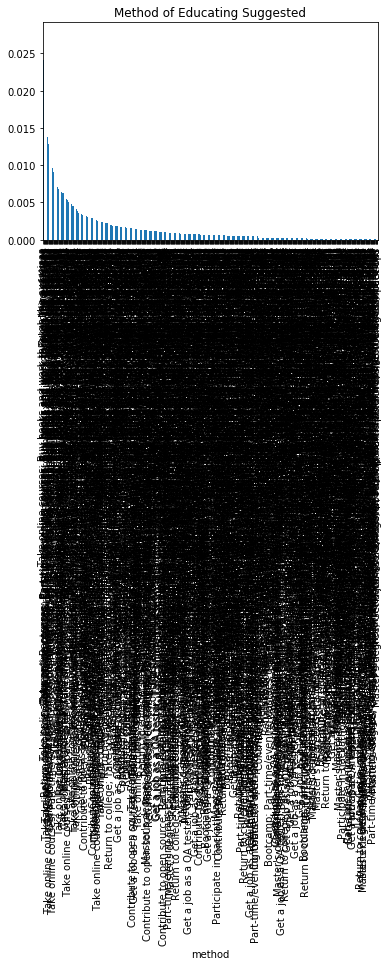

In [58]:

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    
#     study_df = t.total_count(study, 'method', 'count', possible_vals)

    study.set_index('method', inplace=True)
    if plot:
        (study/study.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
        
    props_study_df = study/study.sum()
    return props_study_df
    
props_df = clean_and_plot(df)